In [4]:
from environments.cleanup_env import CleanupEnv

2023-09-25 21:14:09,741	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [5]:
num_agents_cleanup = 10
env = CleanupEnv(num_agents_cleanup)

In [6]:
discount_factor = 0.99
eps = 0.2
eps_decay_factor = 0.999
num_episodes = 20
alpha = 0.1
batch_size = 10

In [7]:
from models.decentralized import DecentralizedModel
models = {}
for i in range(num_agents_cleanup):
    models[str(i)] = DecentralizedModel(env.observation_space, env.action_space, 1, None, 'decentralized' + '-' + str(i))
    models[str(i)].compile(loss='mse', optimizer='adam', metrics=['mae'])
    models[str(i)].summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
pos_input (InputLayer)          [(None, 10, 2)]      0                                            
__________________________________________________________________________________________________
state_input (InputLayer)        [(None, 25, 18)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 20)           0           pos_input[0][0]                  
__________________________________________________________________________________________________
flatten (Flatten)               (None, 450)          0           state_input[0][0]                
______________________________________________________________________________________________

In [8]:
from train import train
from test import test

In [9]:
train(models, env, num_episodes, eps, eps_decay_factor, discount_factor, alpha, batch_size)

/Users/gabeguralnick/git/social_reinforcement_learning/venv/lib/python3.10/site-packages/tensorflow/python/keras/engine/training.py:2456: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1/20 (total reward: 85)
Agent rewards: [7, 6, 7, 5, 10, 12, 8, 2, 15, 13]
[85]
Episode 2/20 (total reward: 192)
Agent rewards: [19, 26, 1, 14, 28, 8, 17, 32, 20, 27]
[85, 192]
Episode 3/20 (total reward: 138)
Agent rewards: [1, 18, 9, 2, 10, 23, 14, 15, 16, 30]
[85, 192, 138]
Episode 4/20 (total reward: 296)
Agent rewards: [40, 22, 8, 23, 9, 51, 43, 61, 13, 26]
[85, 192, 138, 296]
Episode 5/20 (total reward: 207)
Agent rewards: [14, 32, 10, 23, 14, 20, 13, 46, 28, 7]
[85, 192, 138, 296, 207]
Episode 6/20 (total reward: 96)
Agent rewards: [5, 9, 2, 12, 3, 10, 14, 9, 11, 21]
[85, 192, 138, 296, 207, 96]
Episode 7/20 (total reward: 278)
Agent rewards: [39, 25, 6, 16, 19, 30, 43, 42, 26, 32]
[85, 192, 138, 296, 207, 96, 278]
Episode 8/20 (total reward: 524)
Agent rewards: [33, 51, 26, 85, 28, 71, 96, 27, 41, 66]
[85, 192, 138, 296, 207, 96, 278, 524]
Episode 9/20 (total reward: 455)
Agent rewards: [30, 40, 42, 41, 32, 56, 44, 40, 70, 60]
[85, 192, 138, 296, 207, 96, 278, 524, 455]


({'0': <models.decentralized.DecentralizedModel at 0x29ed17e80>,
  '1': <models.decentralized.DecentralizedModel at 0x29ed15720>,
  '2': <models.decentralized.DecentralizedModel at 0x29ee08e80>,
  '3': <models.decentralized.DecentralizedModel at 0x29ee7e590>,
  '4': <models.decentralized.DecentralizedModel at 0x29eeaf7c0>,
  '5': <models.decentralized.DecentralizedModel at 0x29f108a30>,
  '6': <models.decentralized.DecentralizedModel at 0x29f139c60>,
  '7': <models.decentralized.DecentralizedModel at 0x29f17ee90>,
  '8': <models.decentralized.DecentralizedModel at 0x29f1b3e50>,
  '9': <models.decentralized.DecentralizedModel at 0x29f315300>},
 [85,
  192,
  138,
  296,
  207,
  96,
  278,
  524,
  455,
  434,
  496,
  823,
  826,
  839,
  719,
  469,
  693,
  581,
  796,
  722])

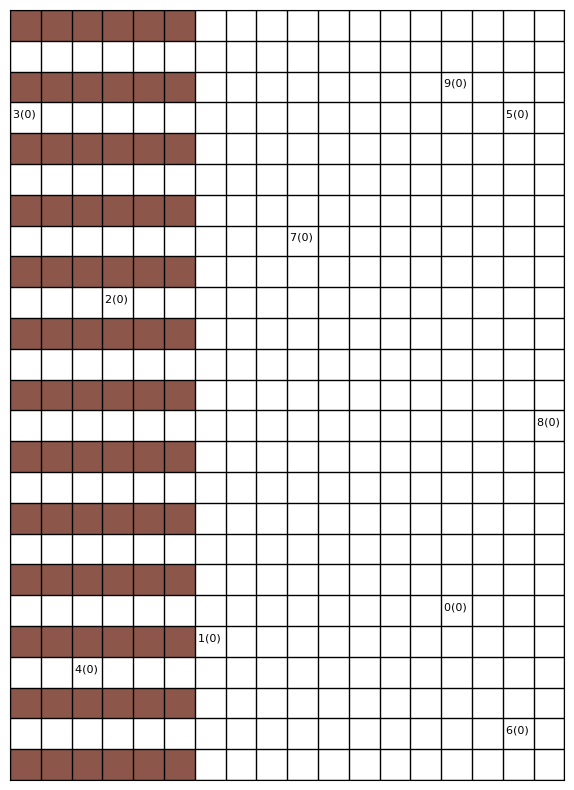

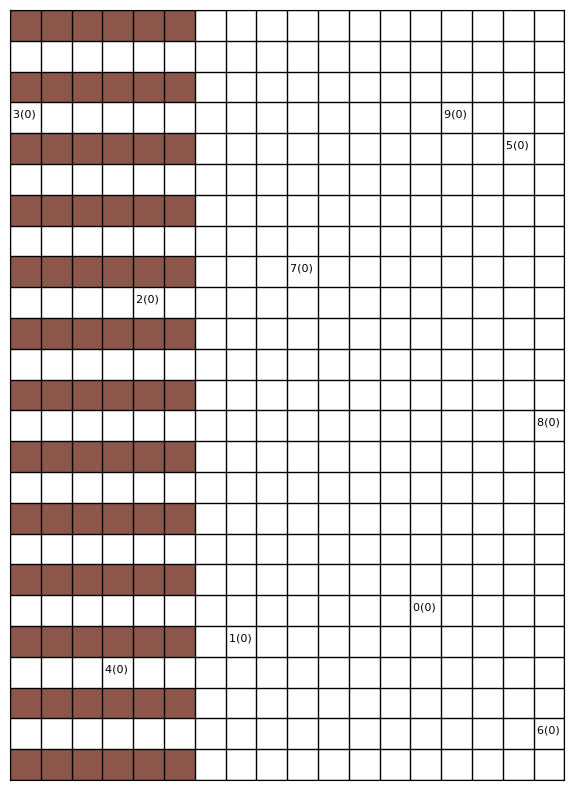

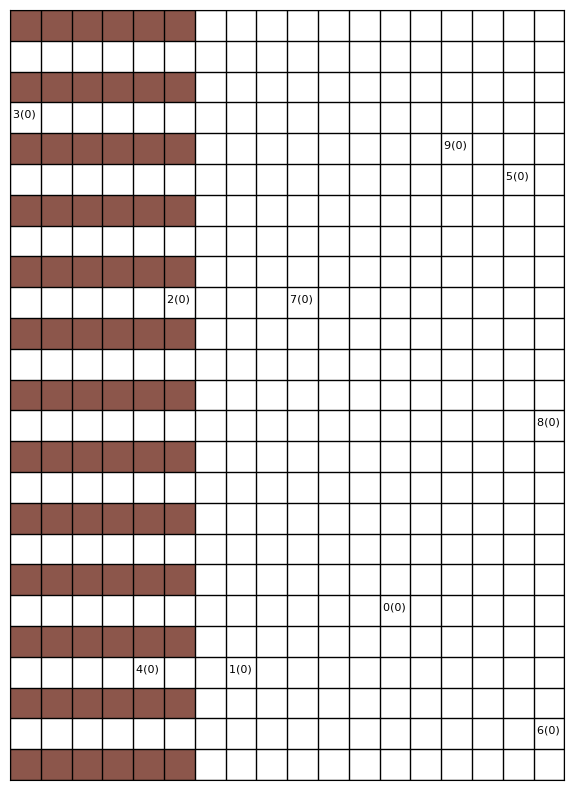

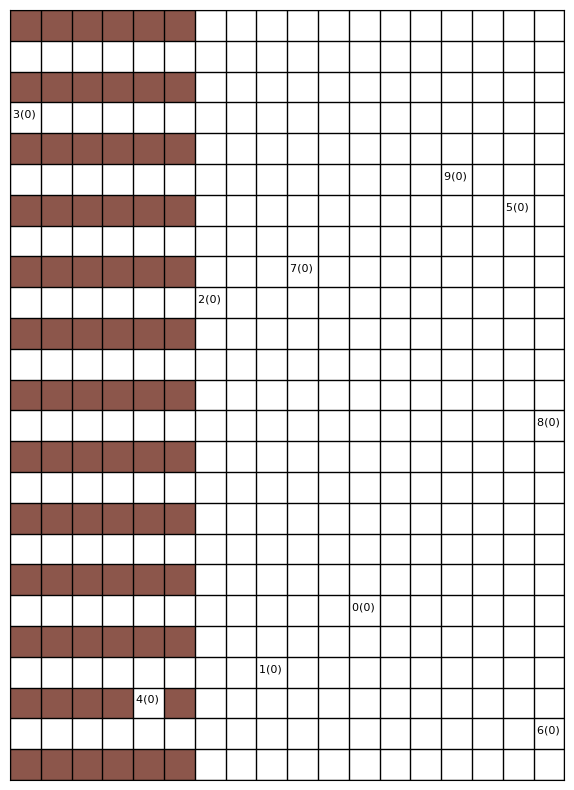

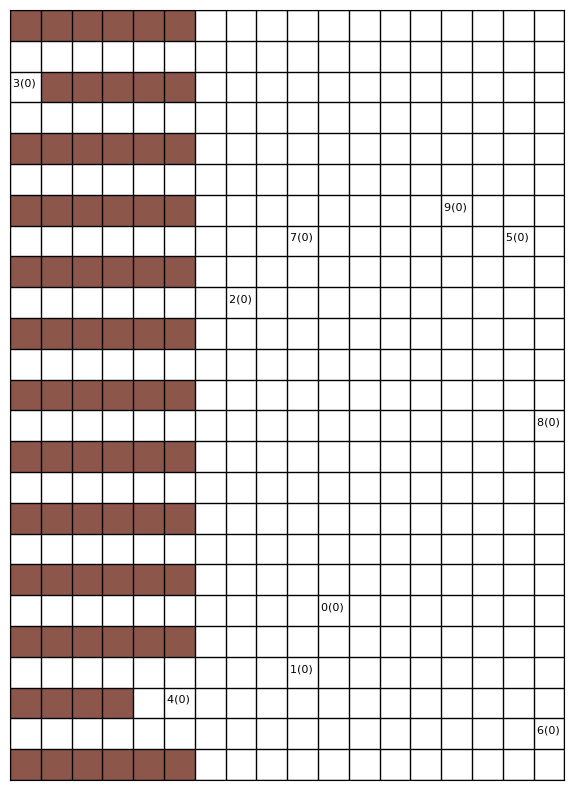

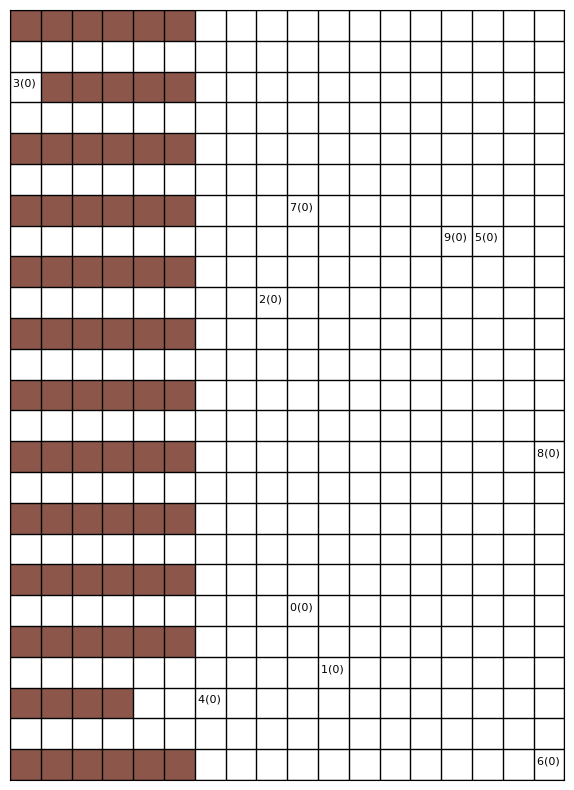

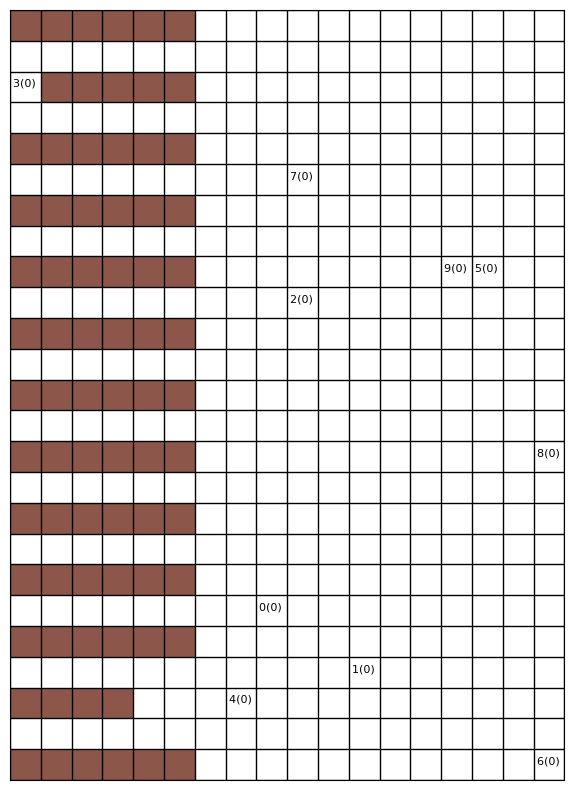

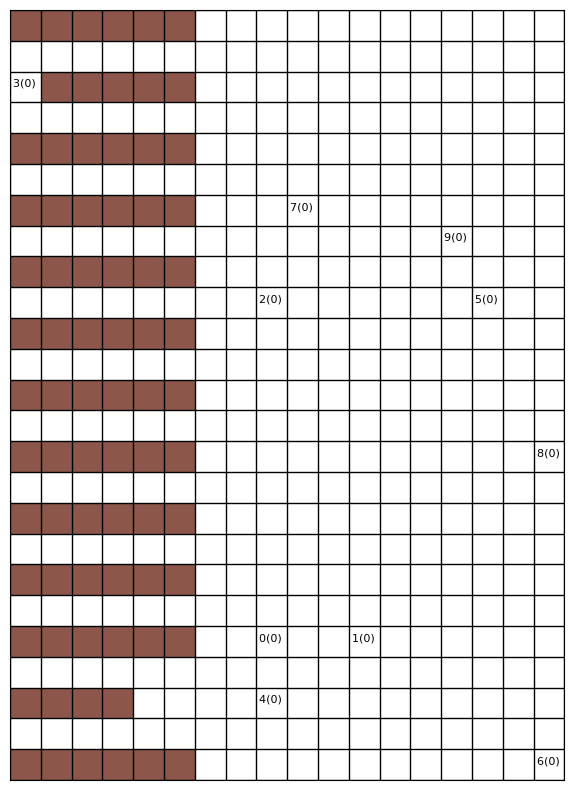

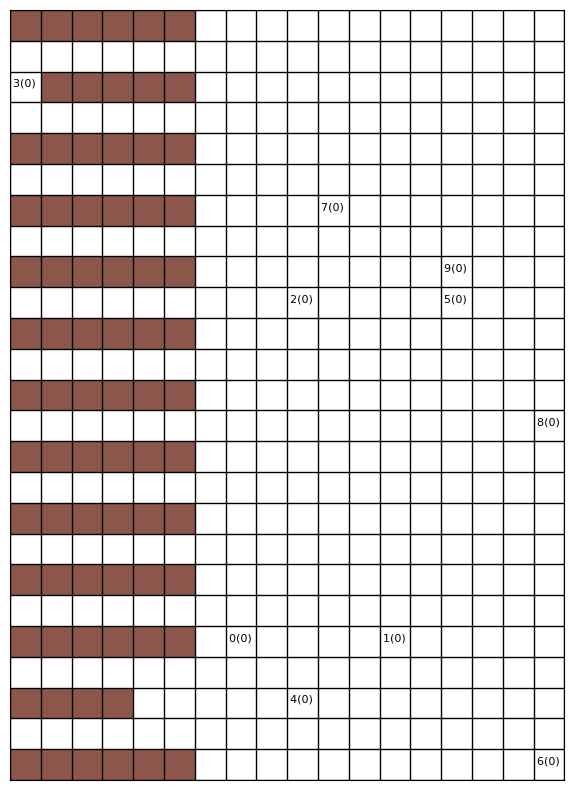

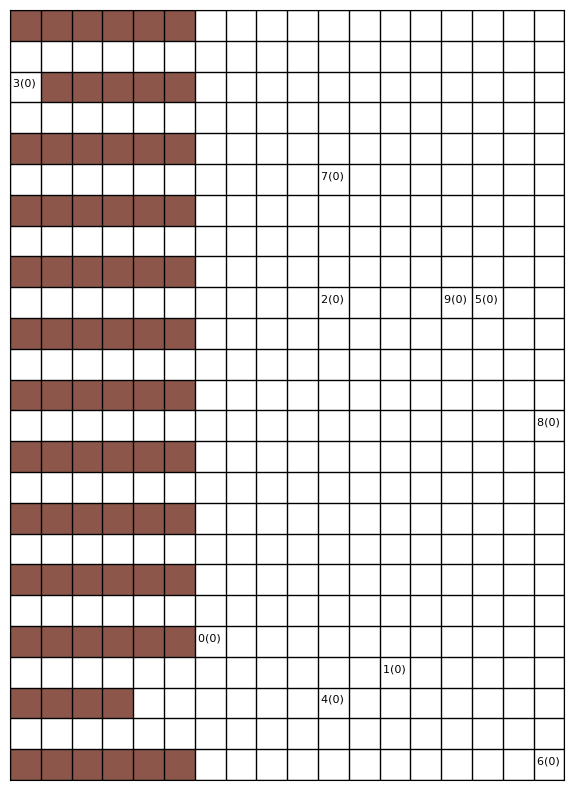

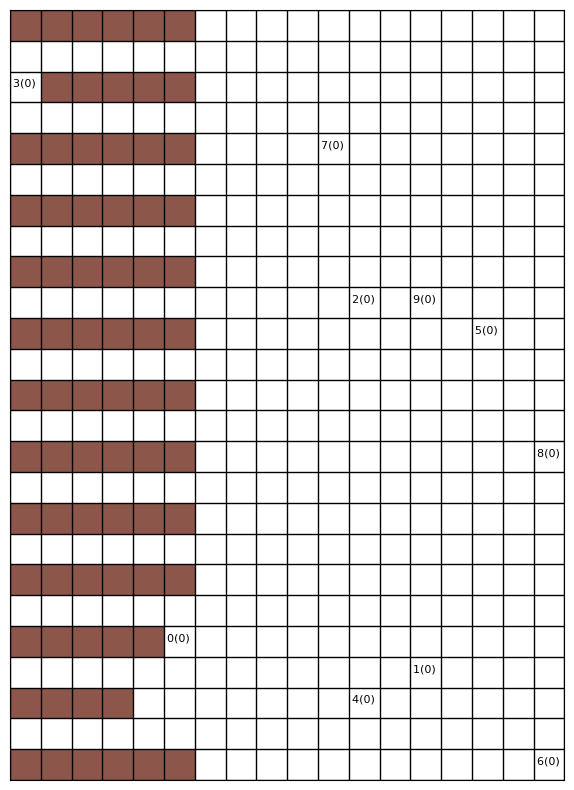

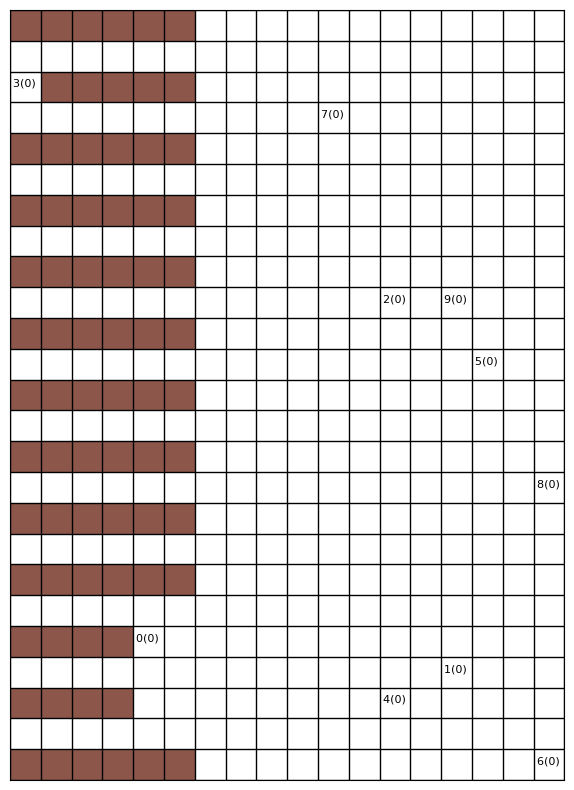

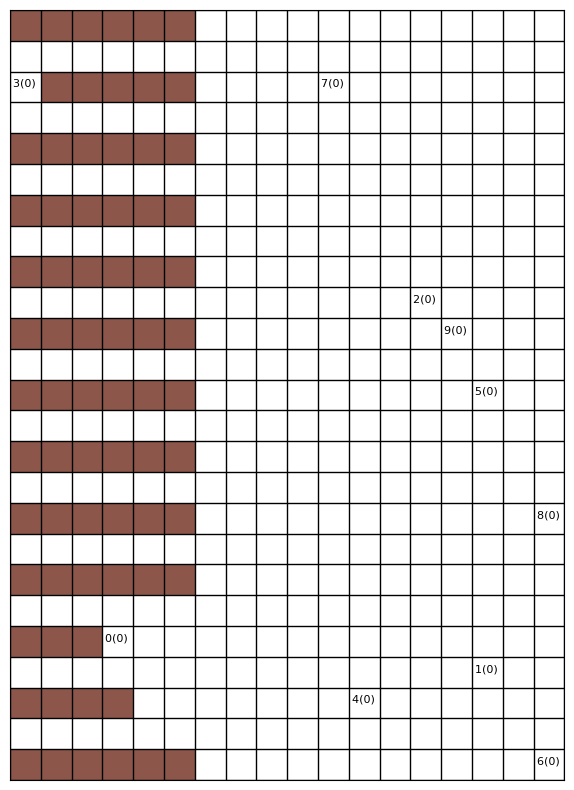

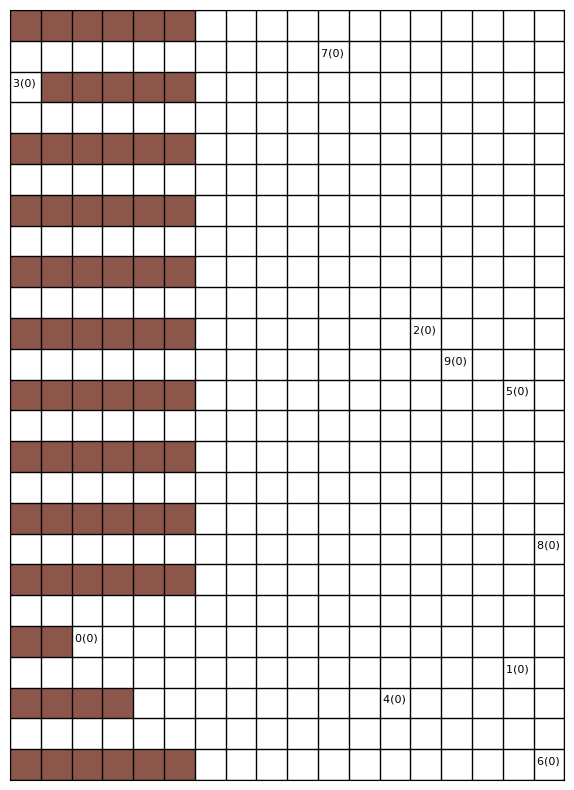

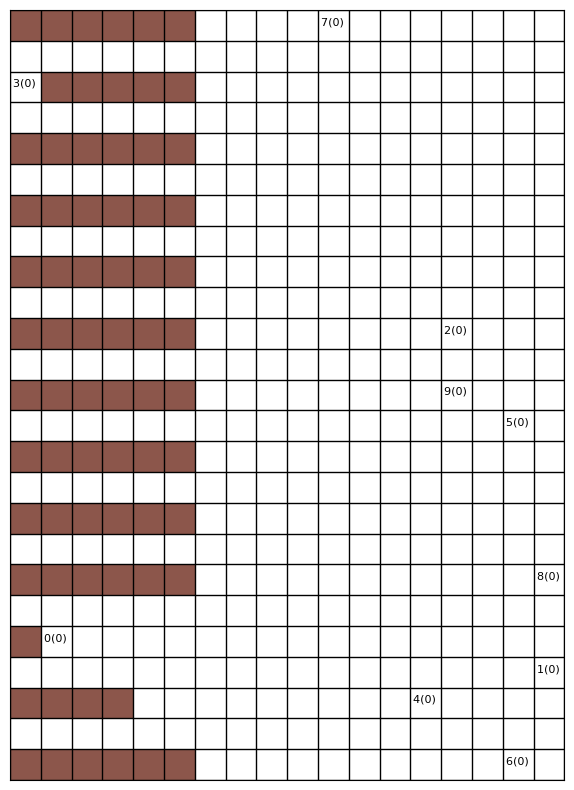

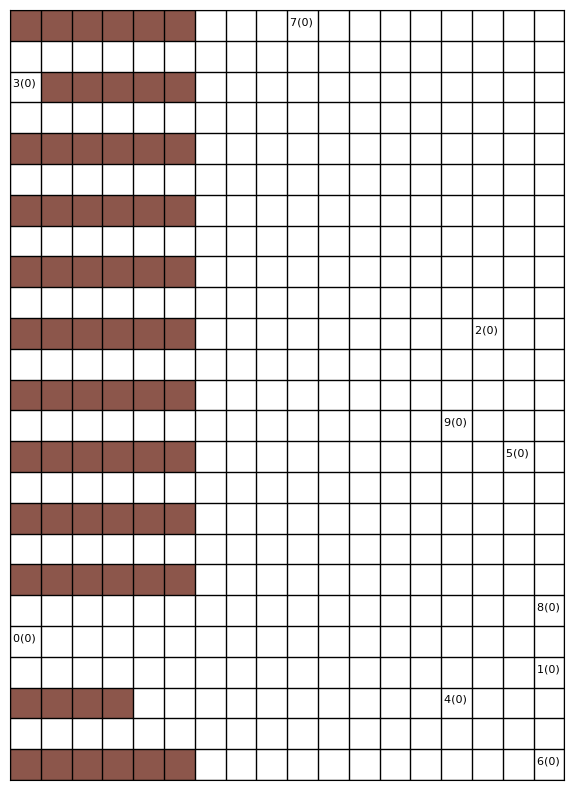

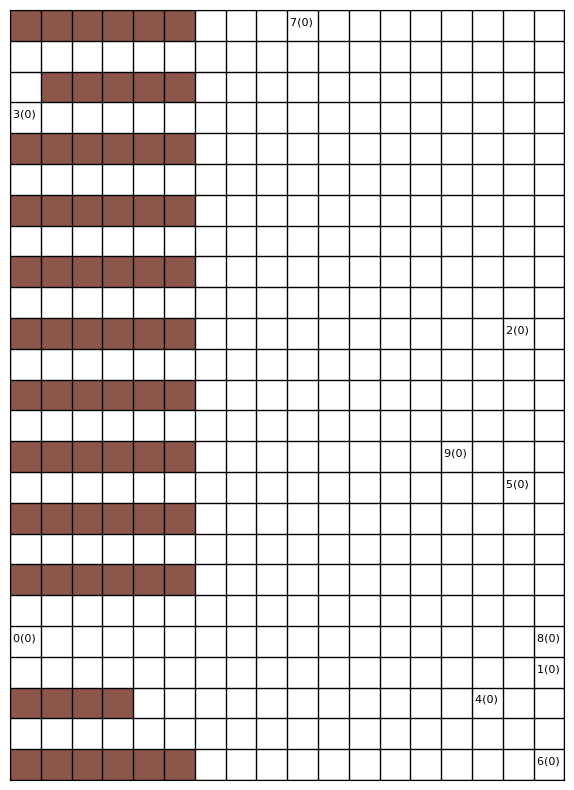

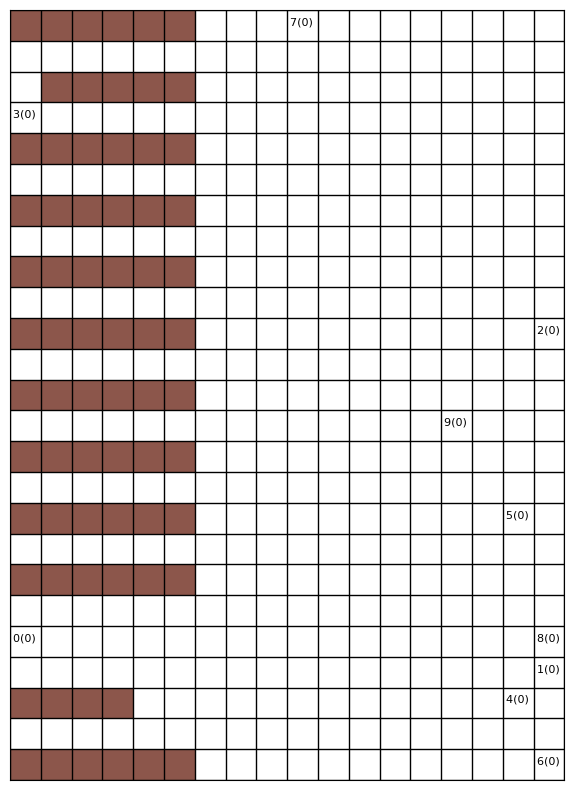

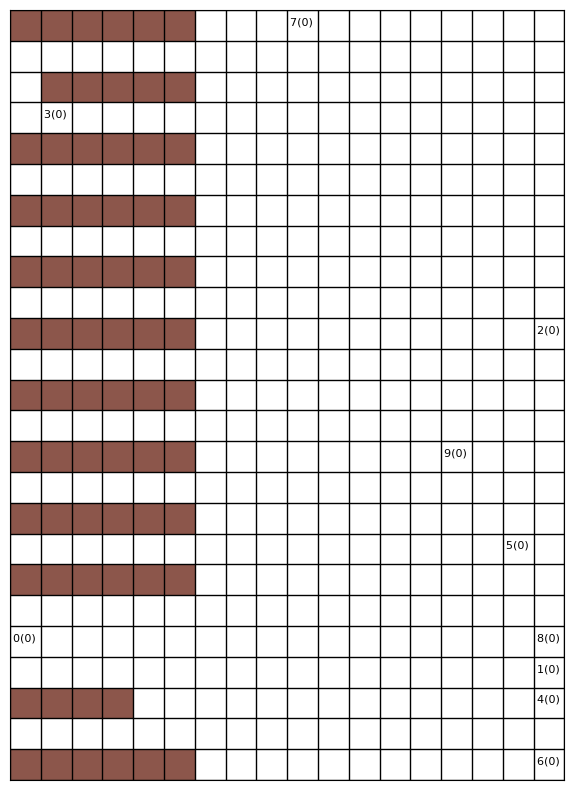

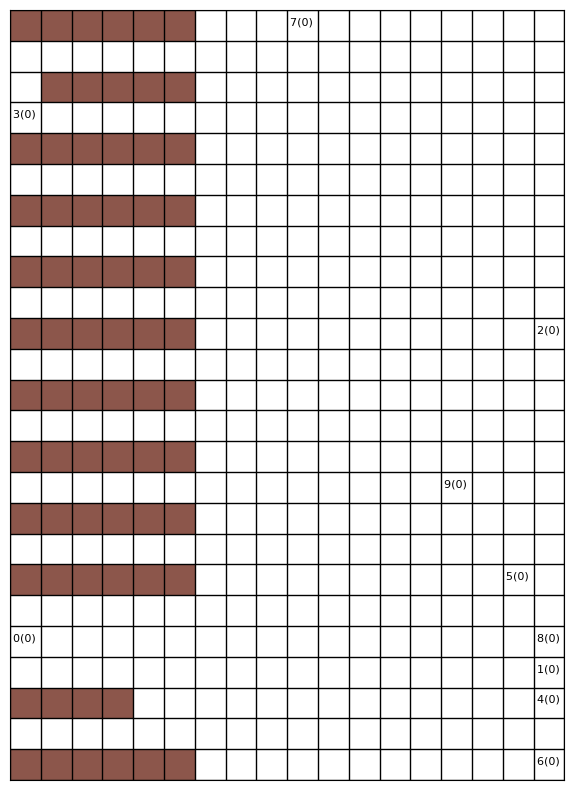

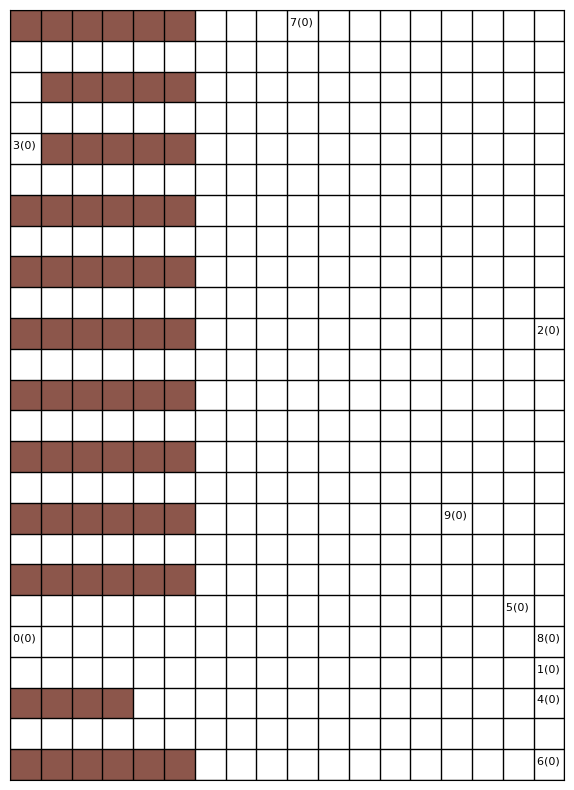

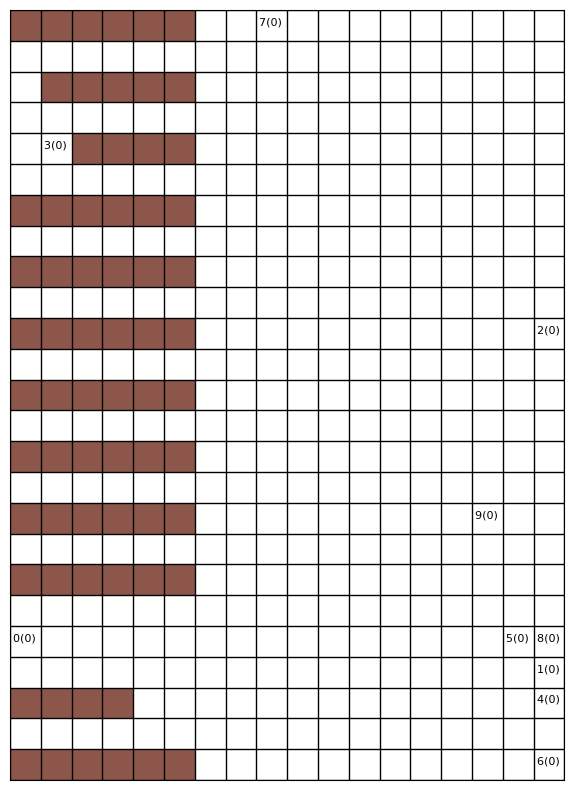

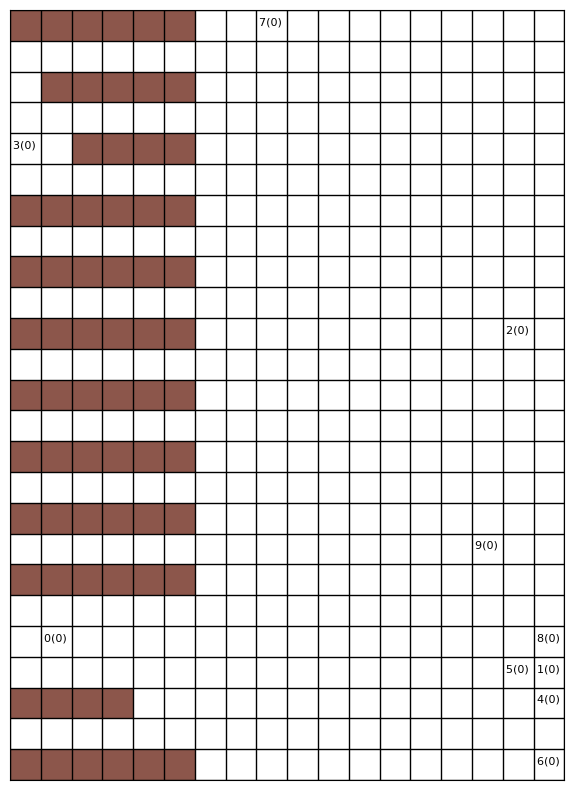

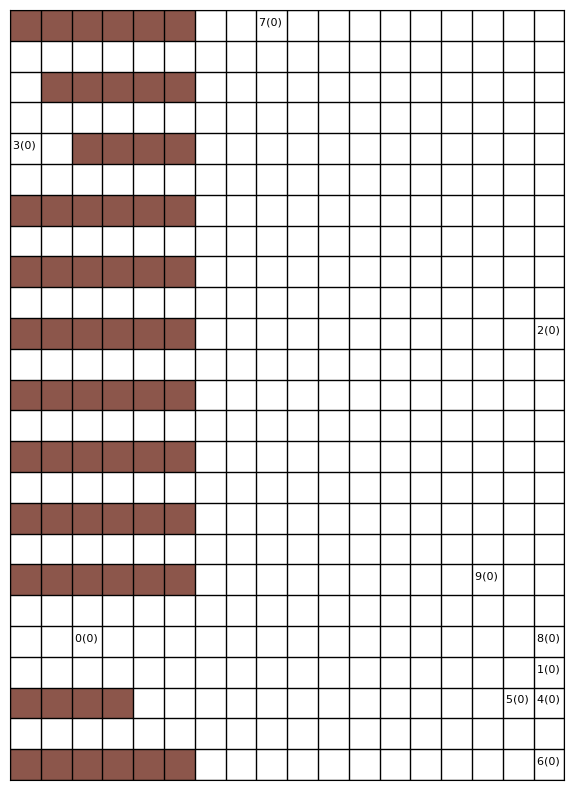

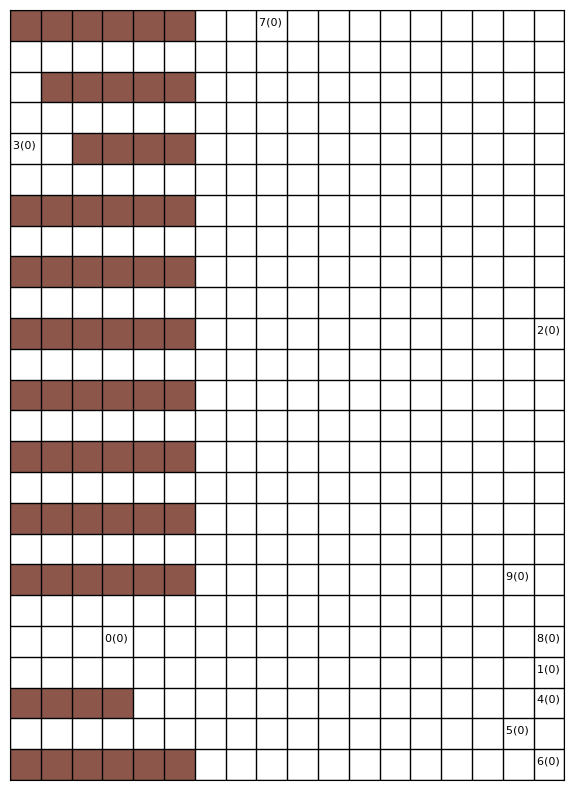

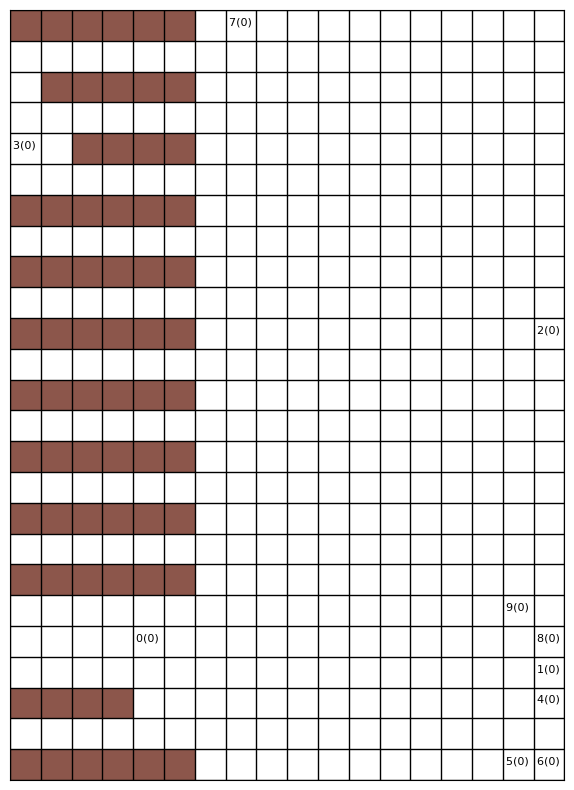

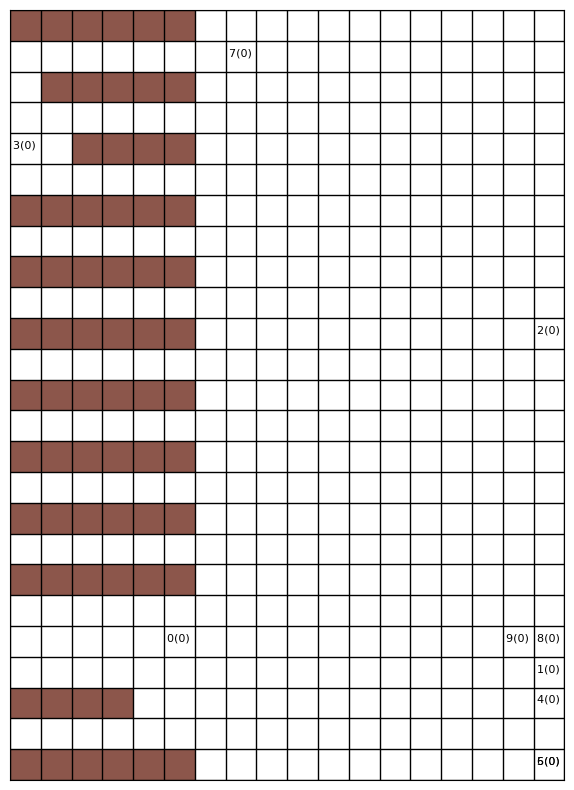

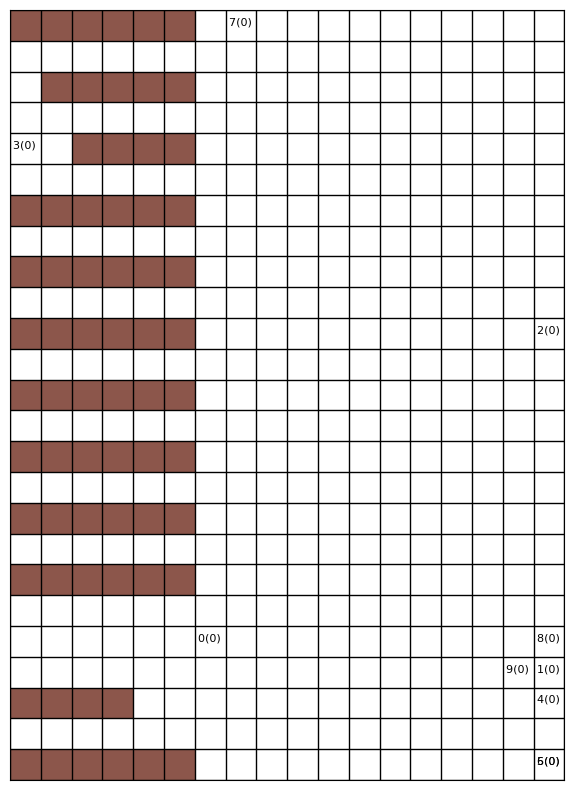

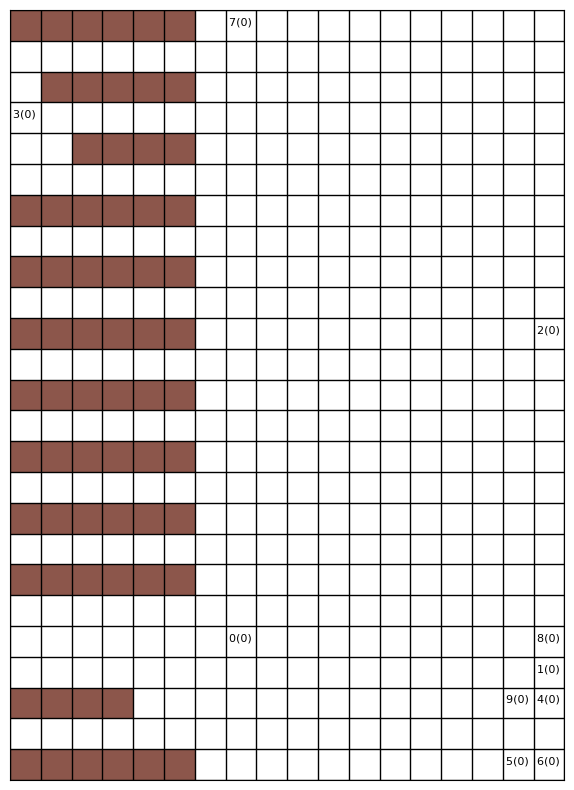

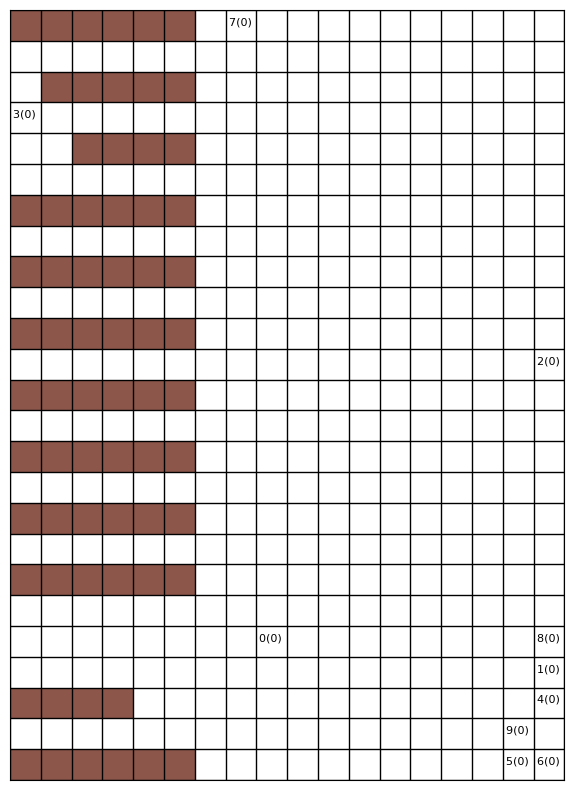

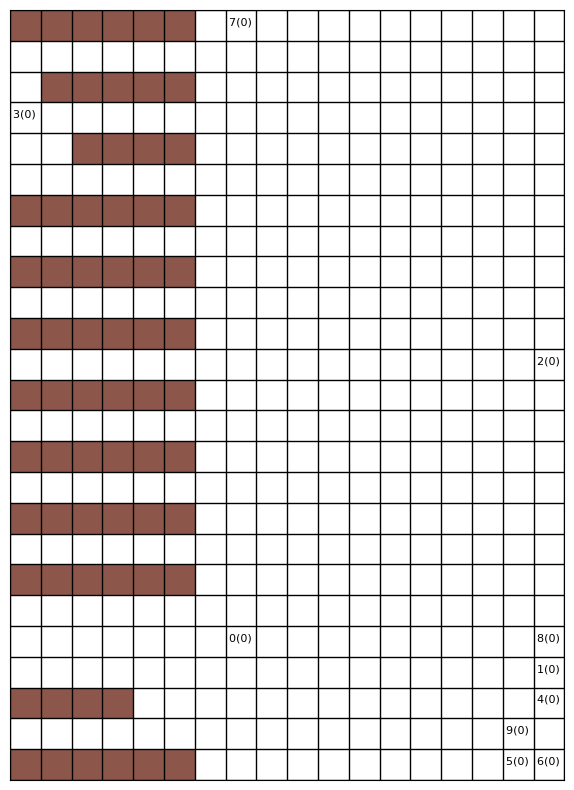

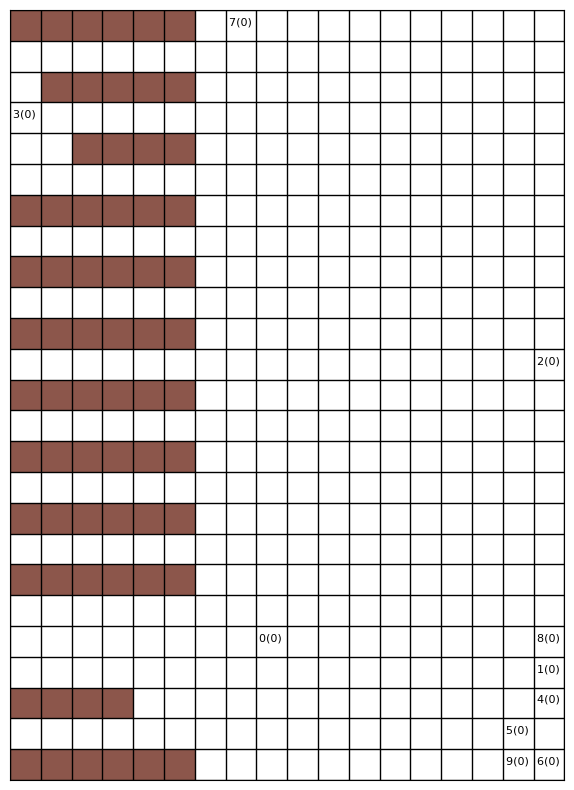

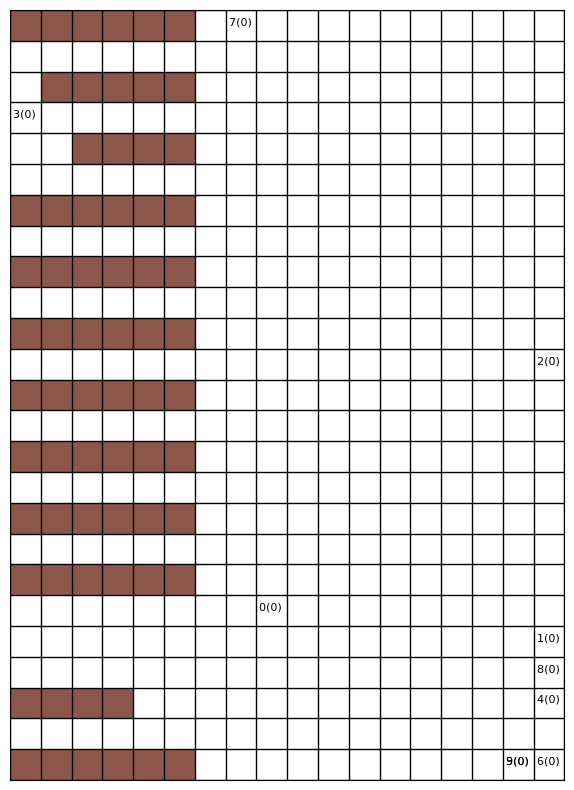

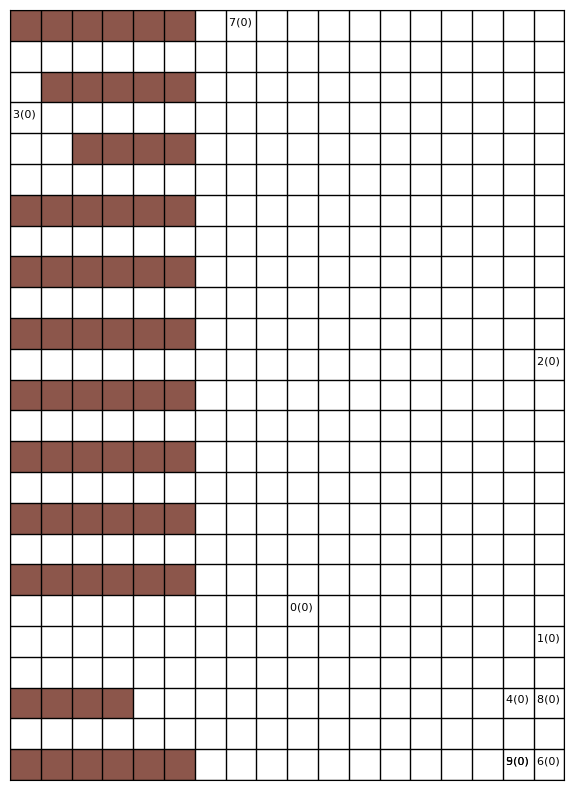

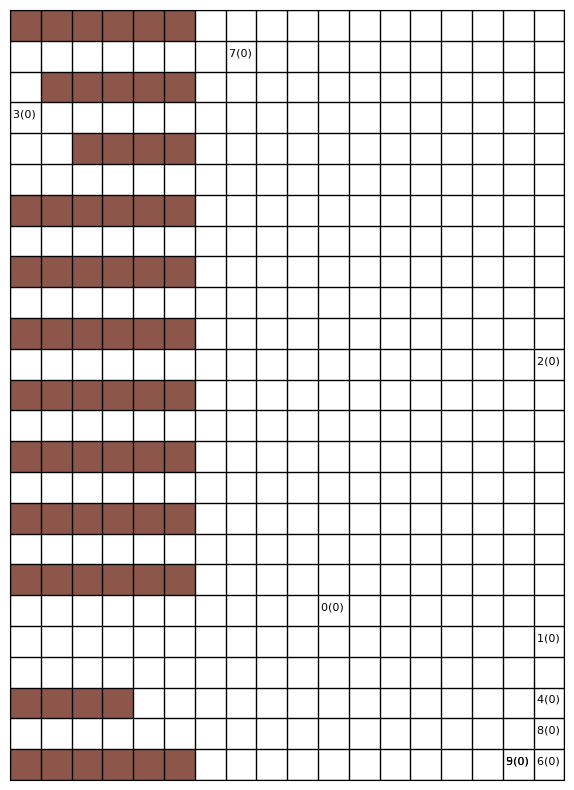

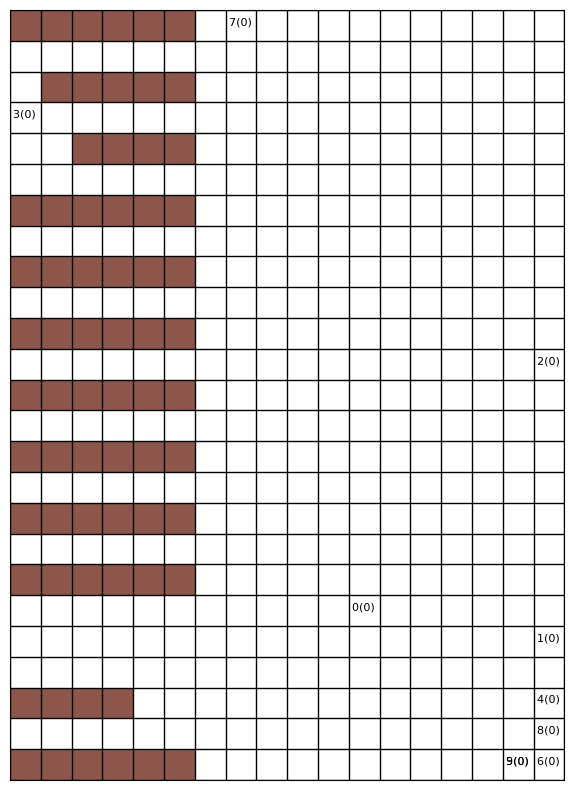

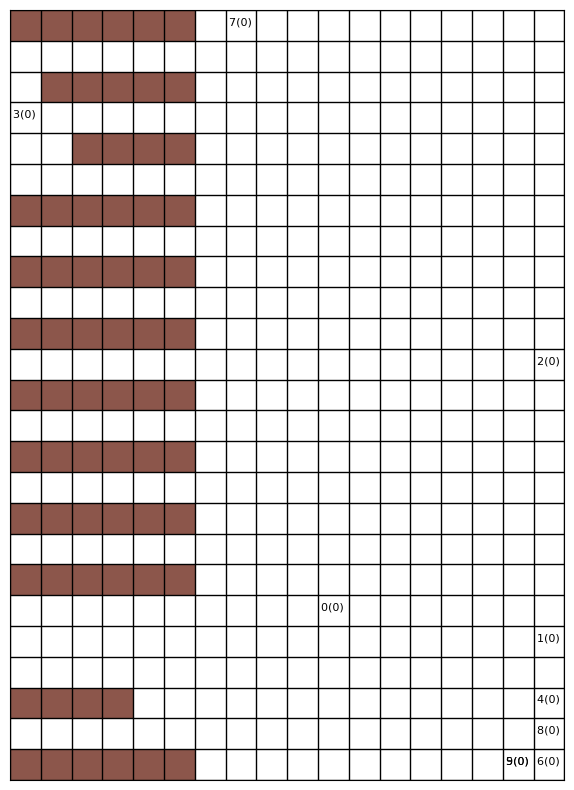

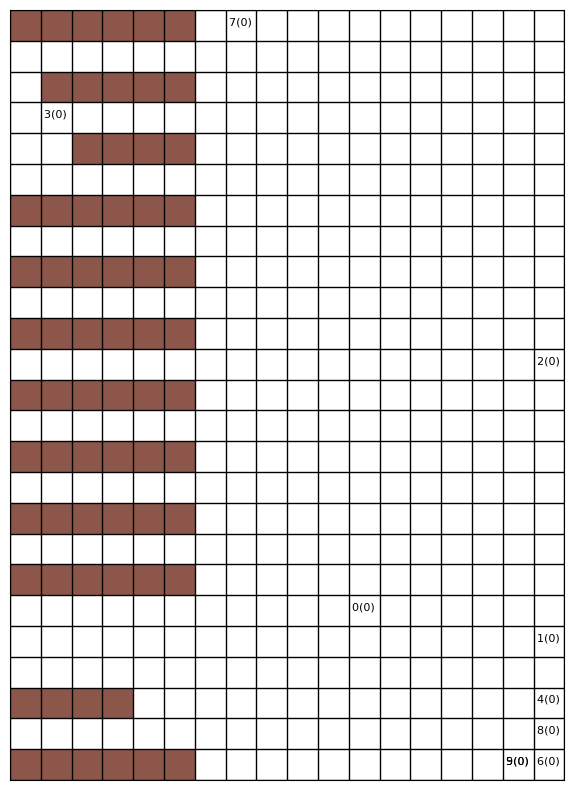

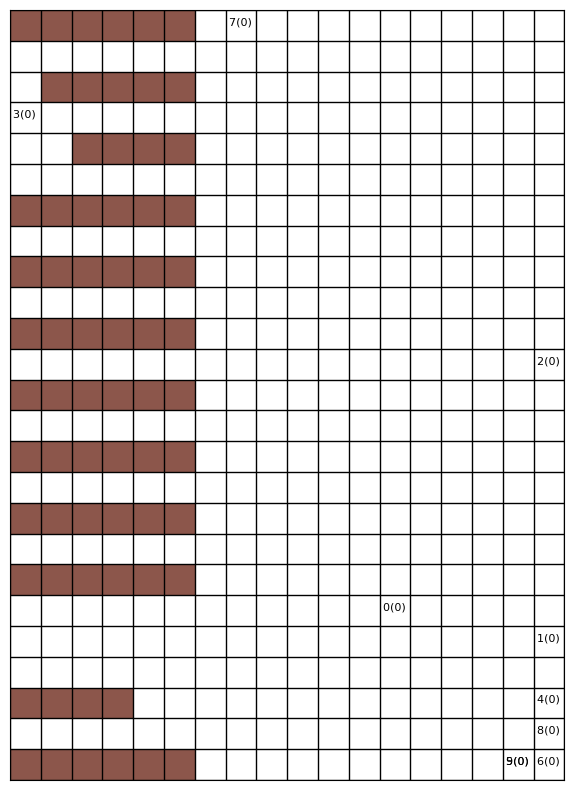

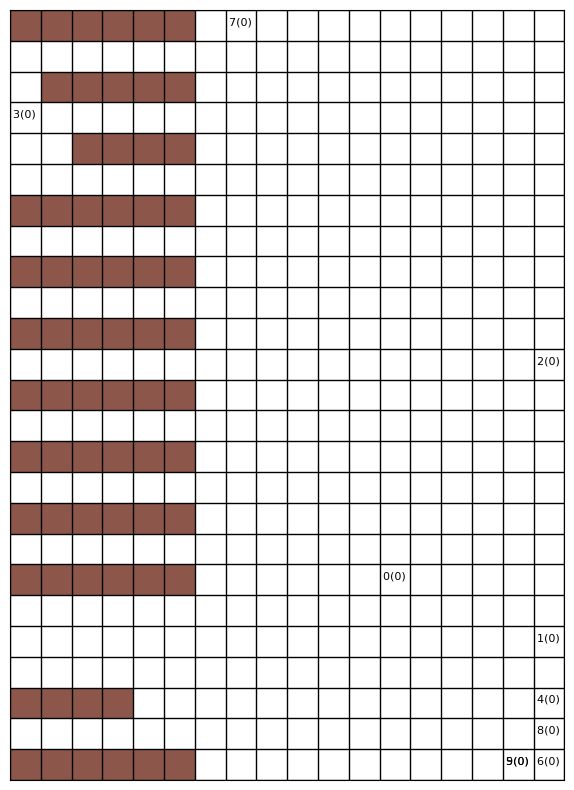

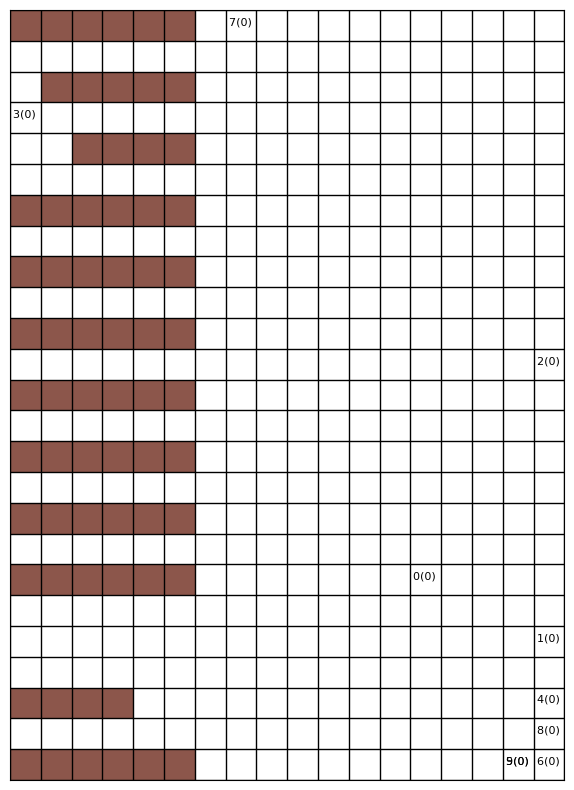

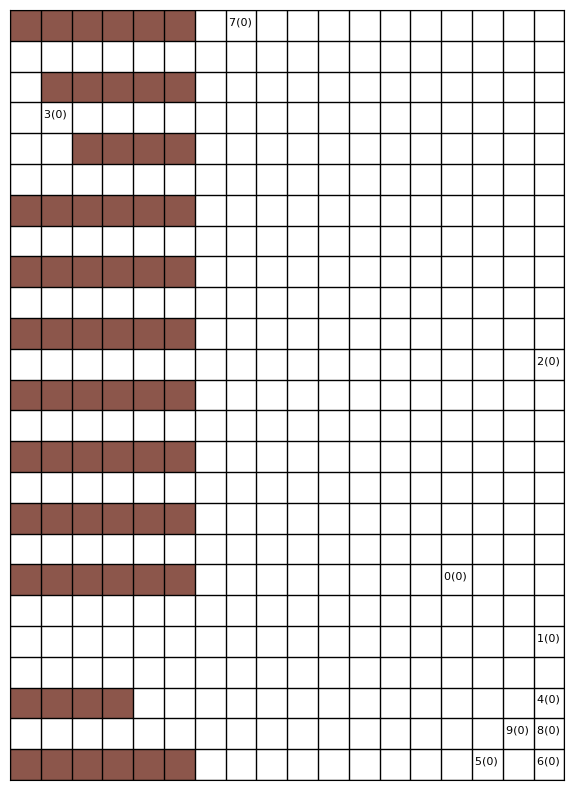

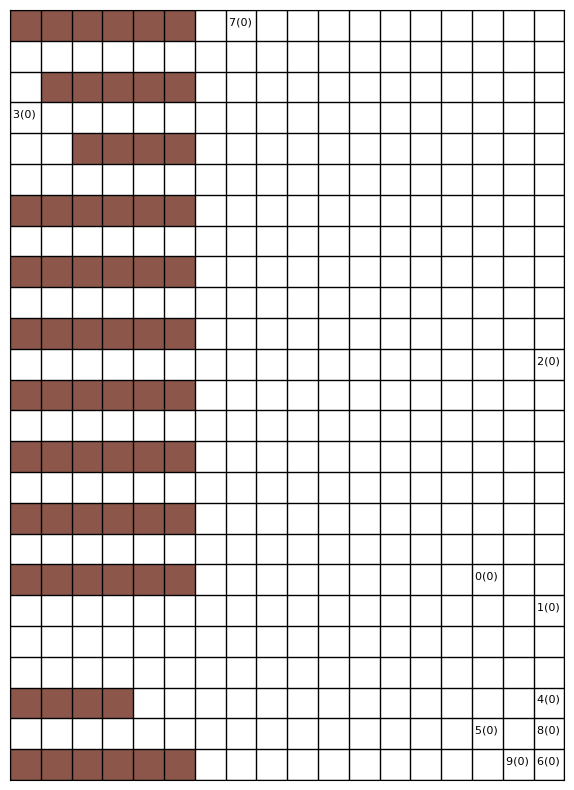

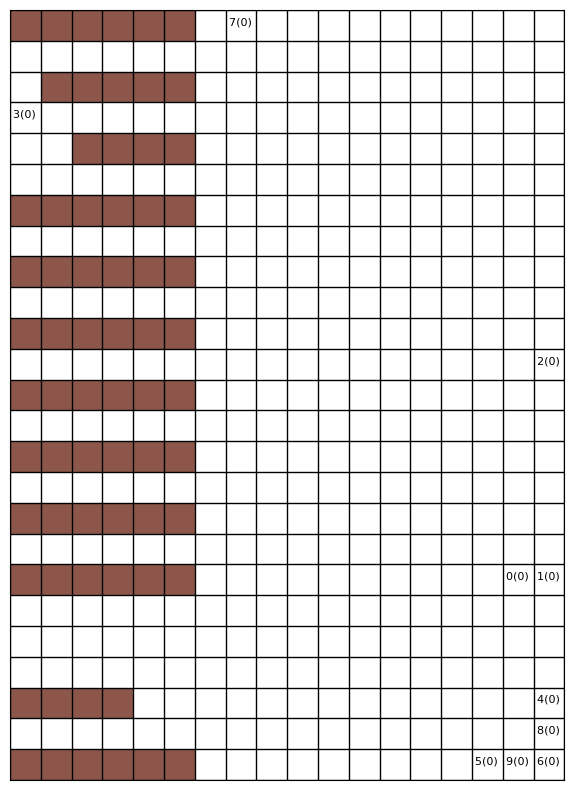

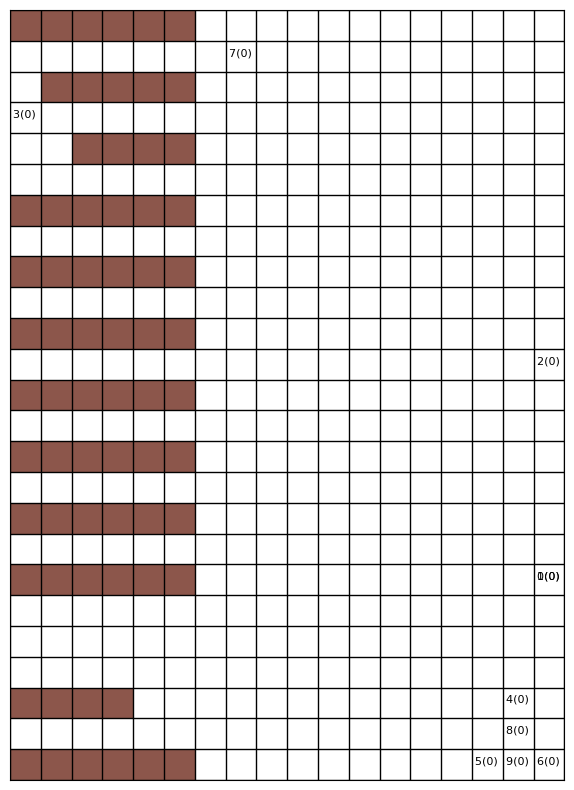

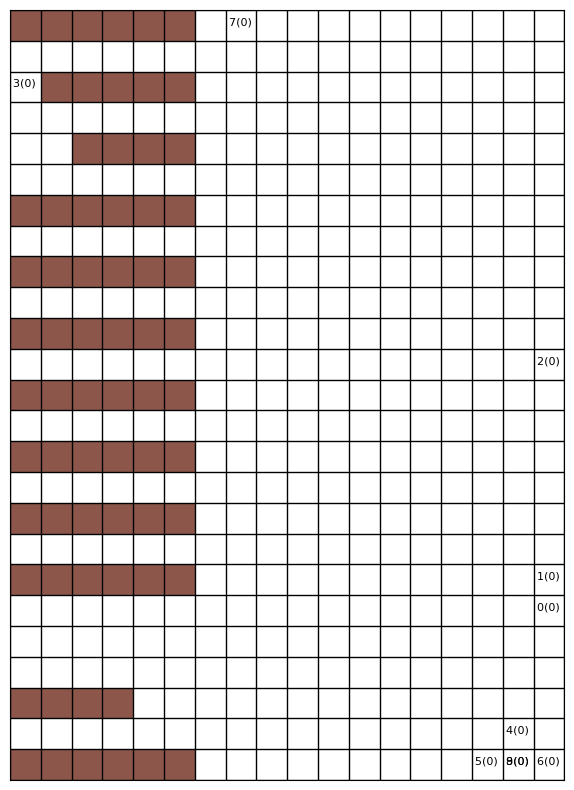

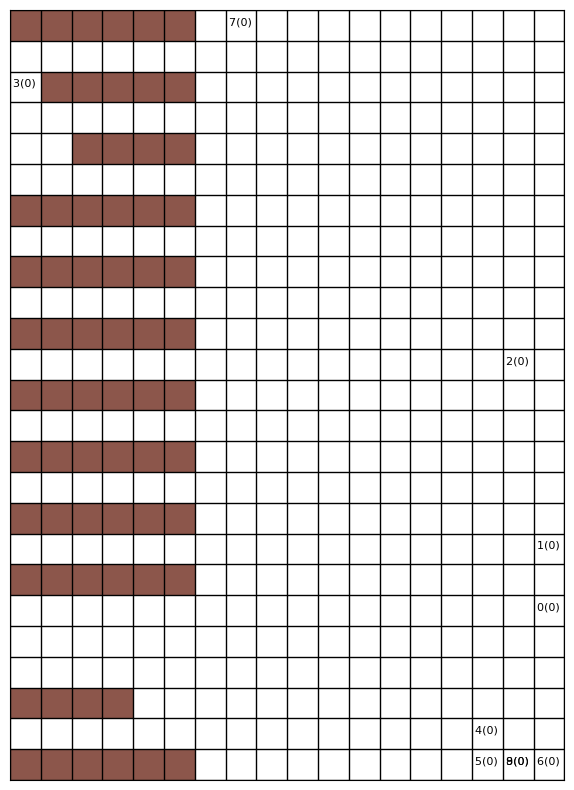

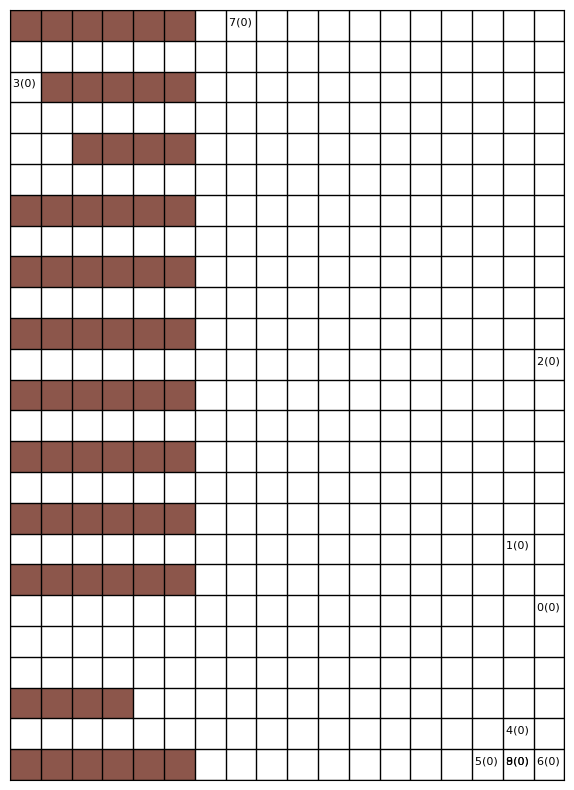

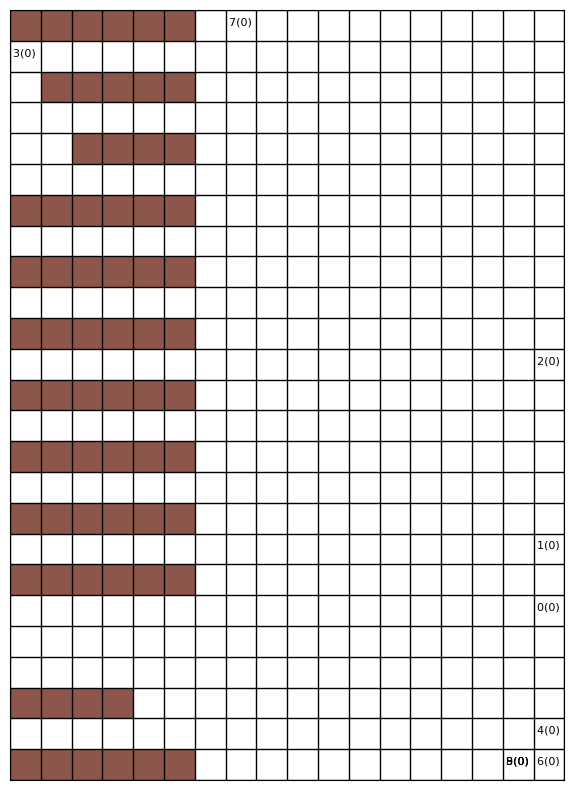

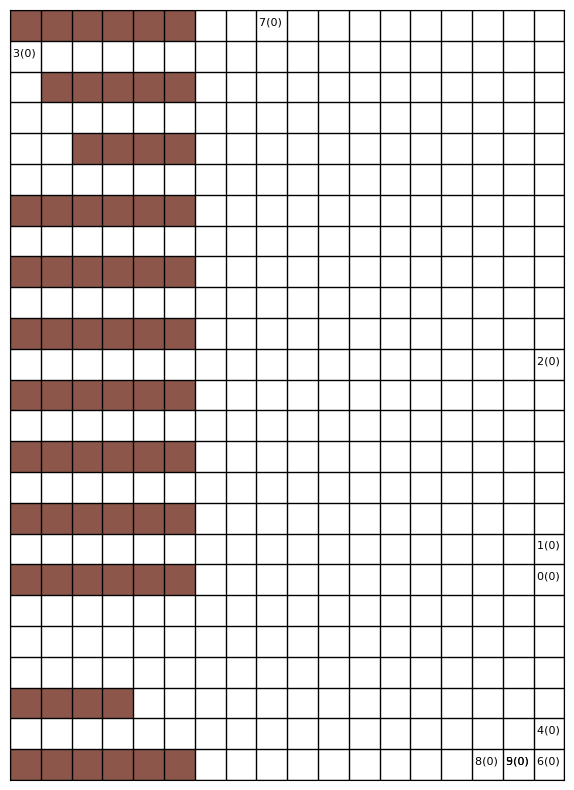

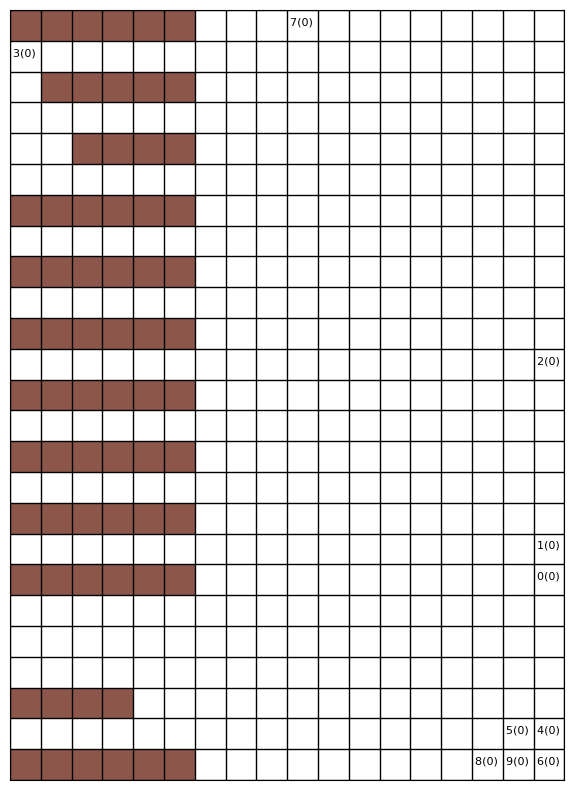

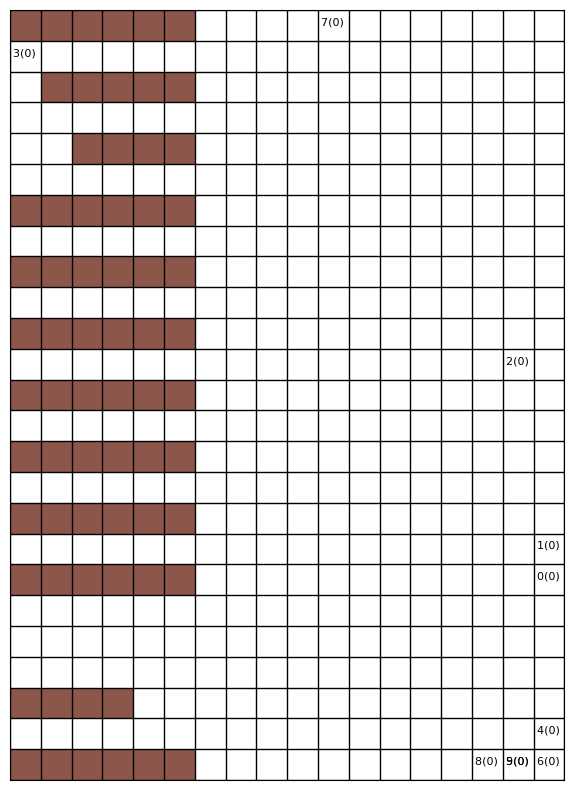

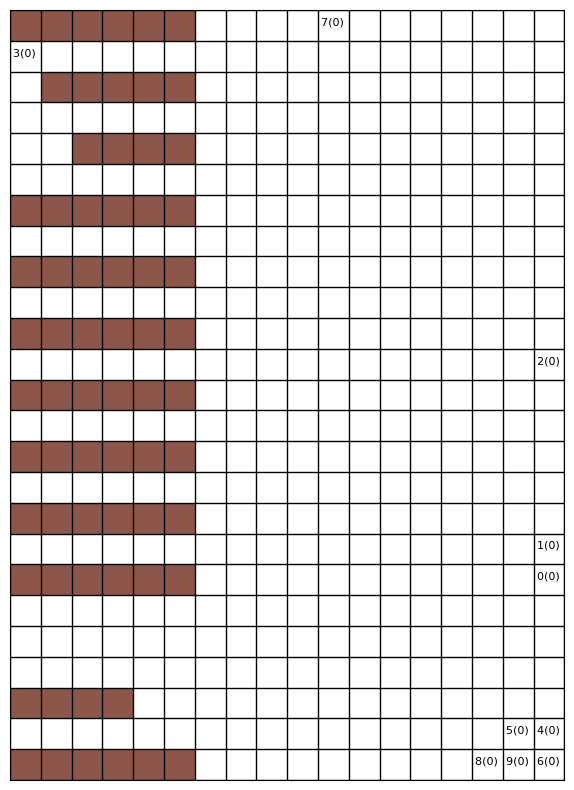

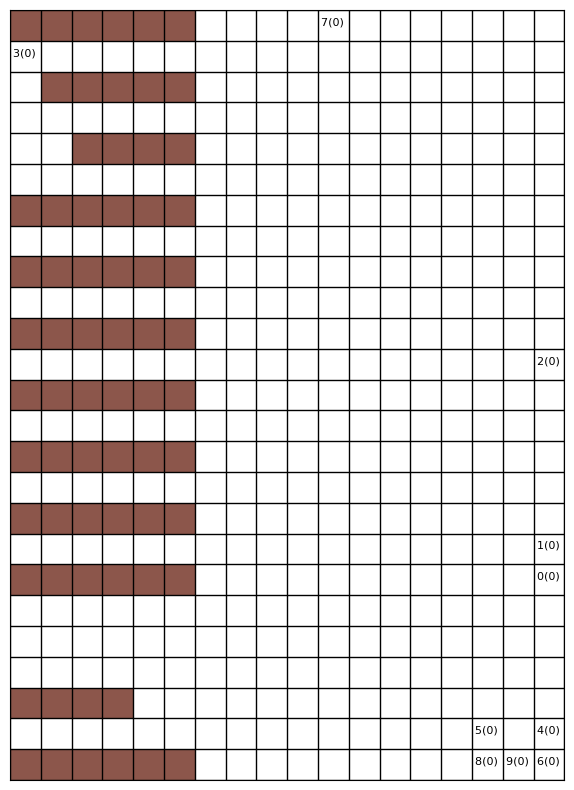

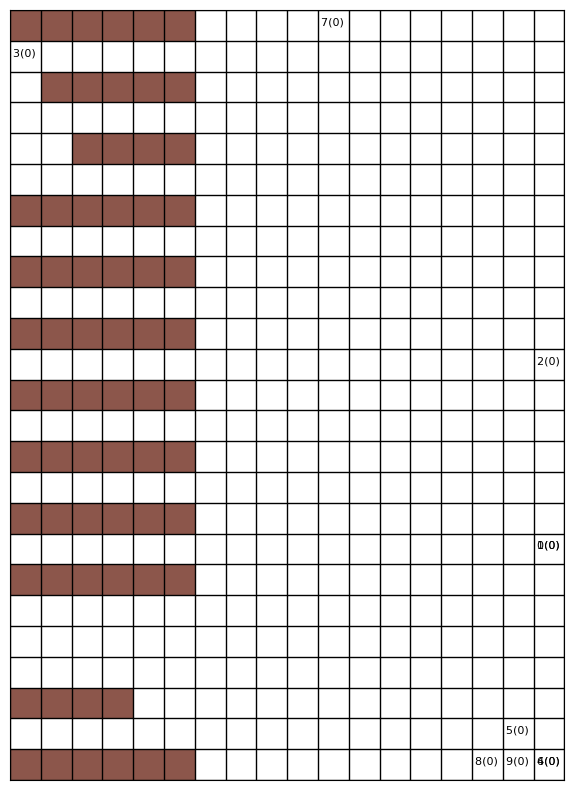

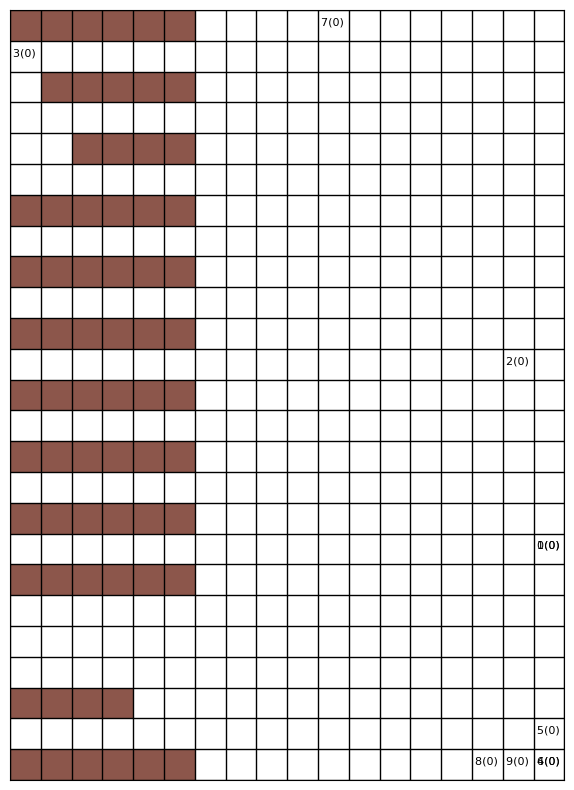

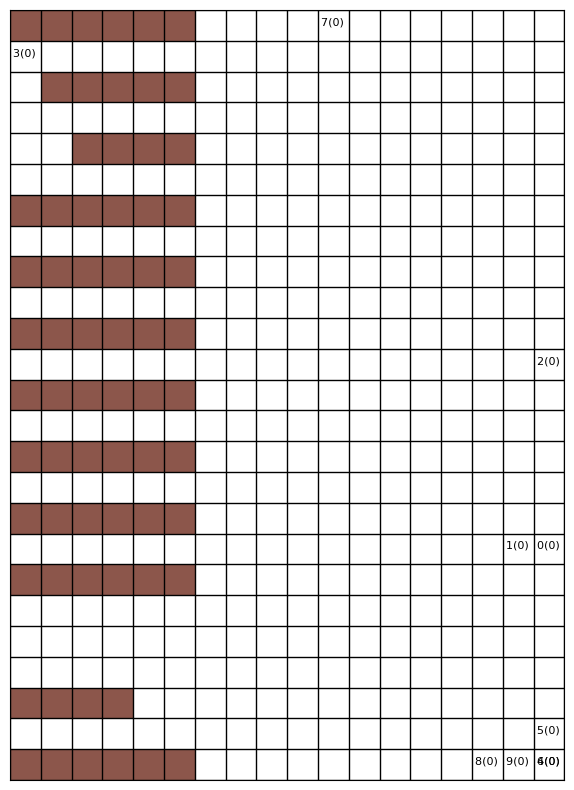

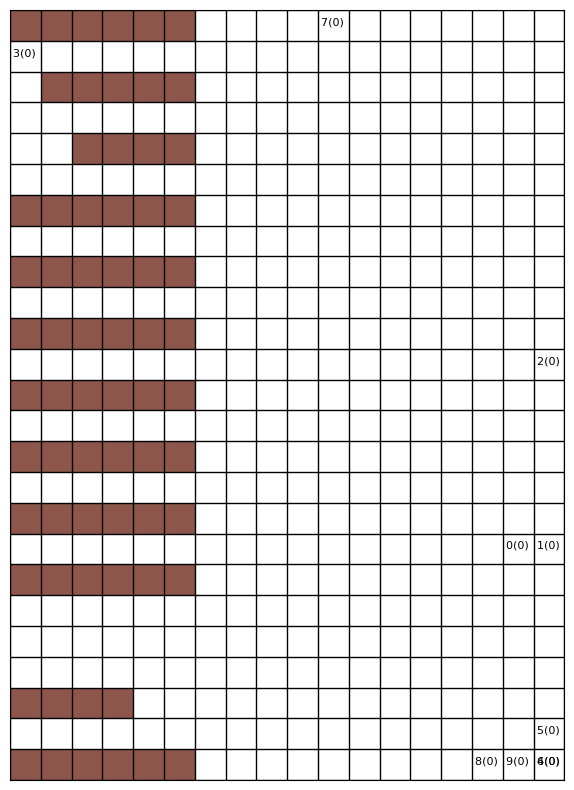

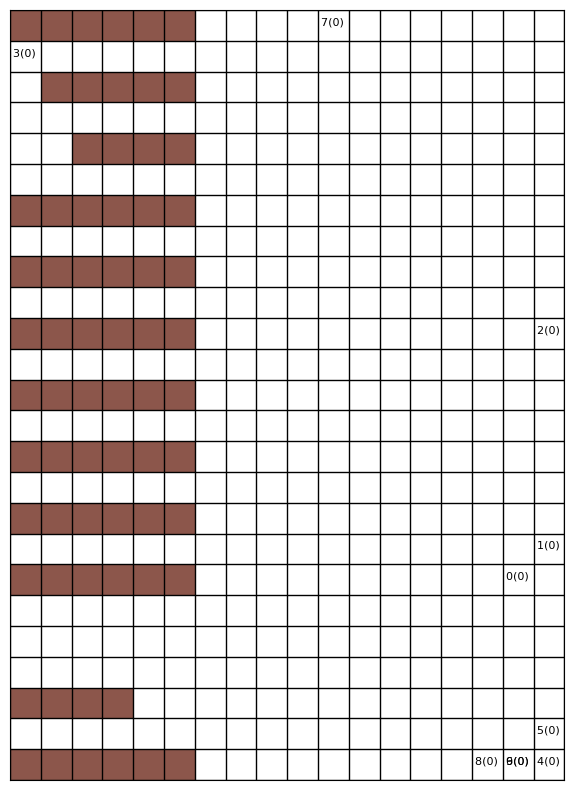

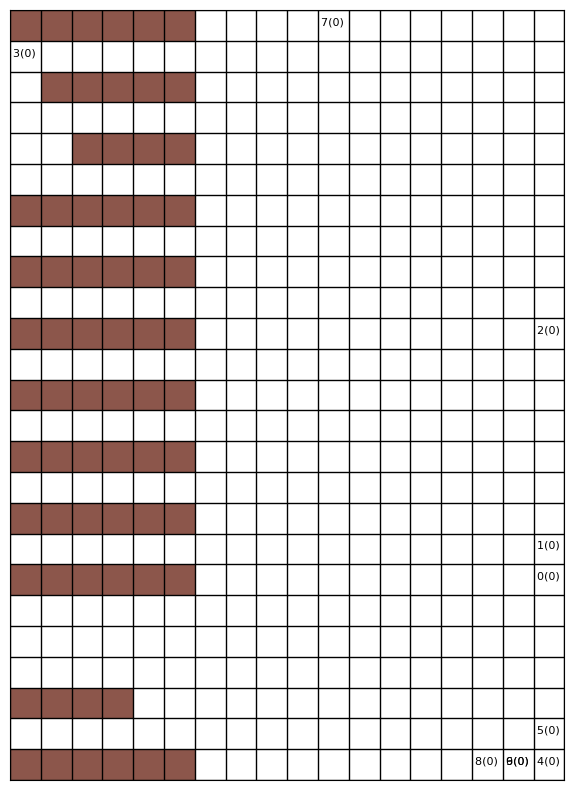

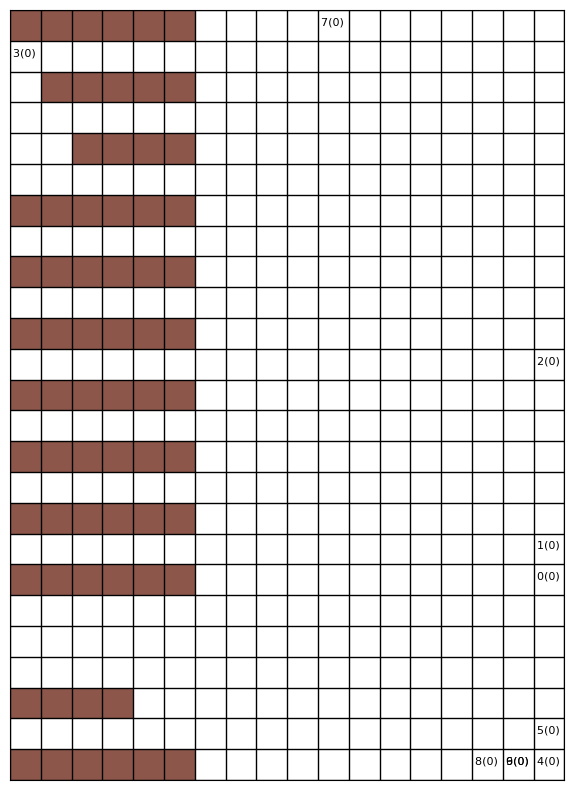

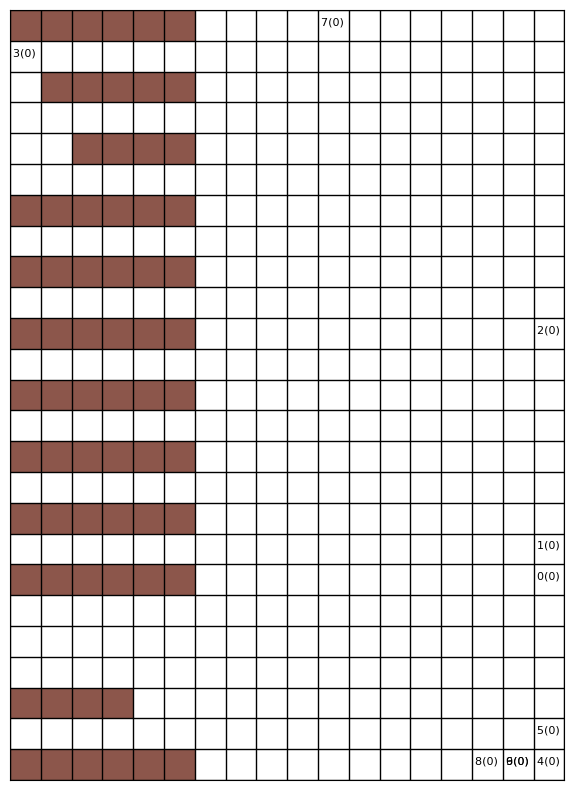

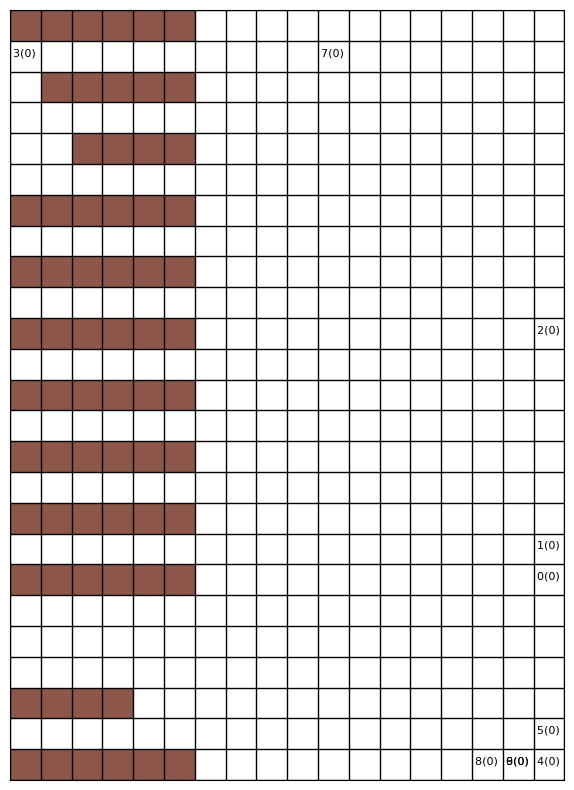

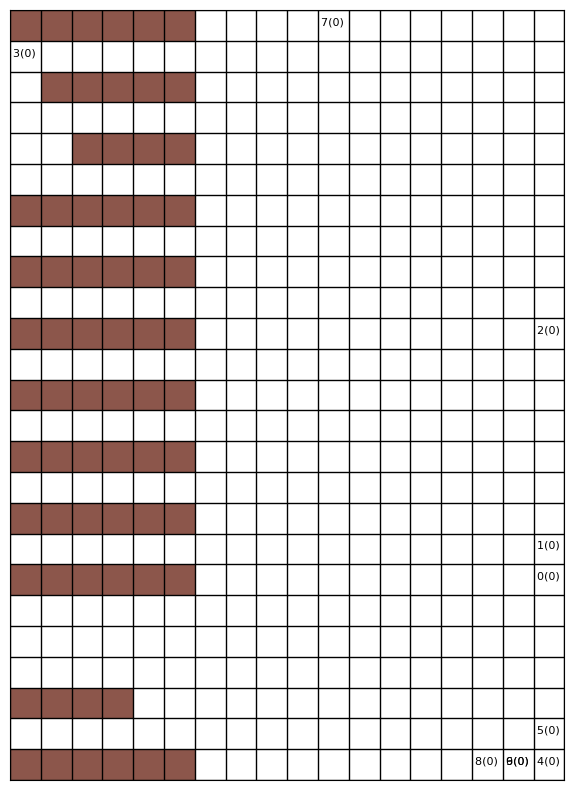

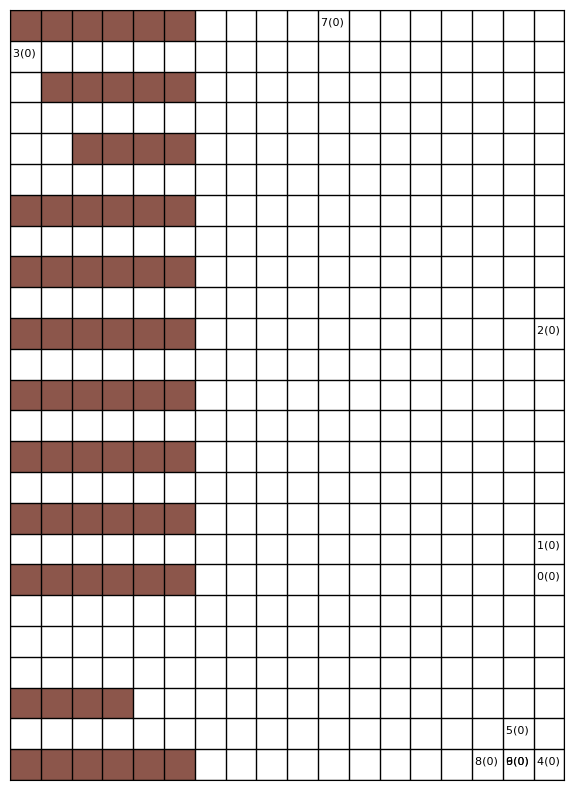

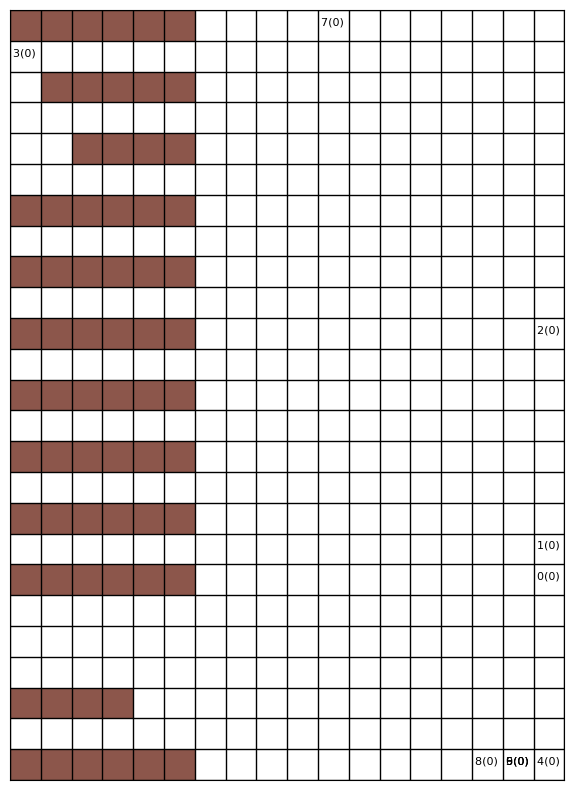

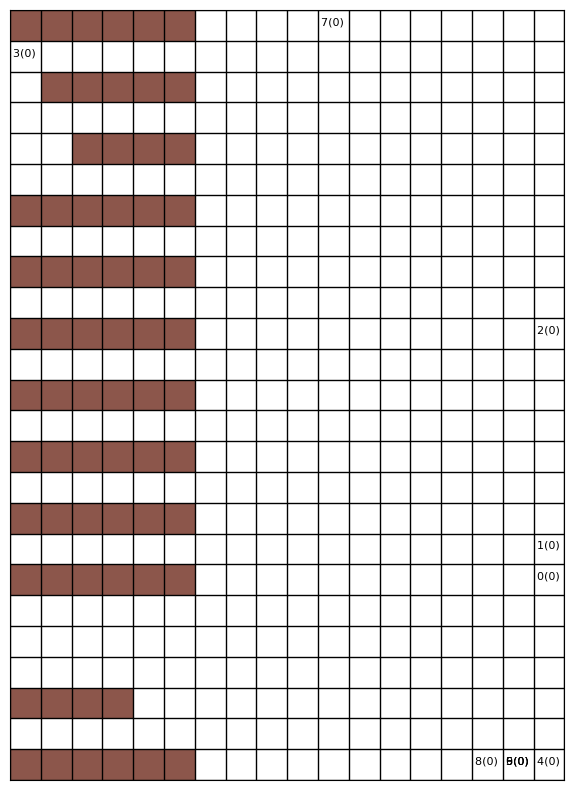

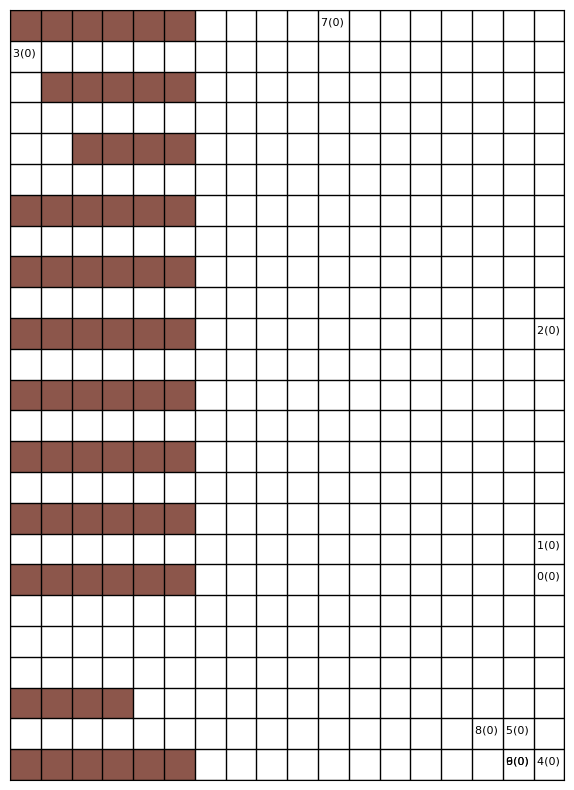

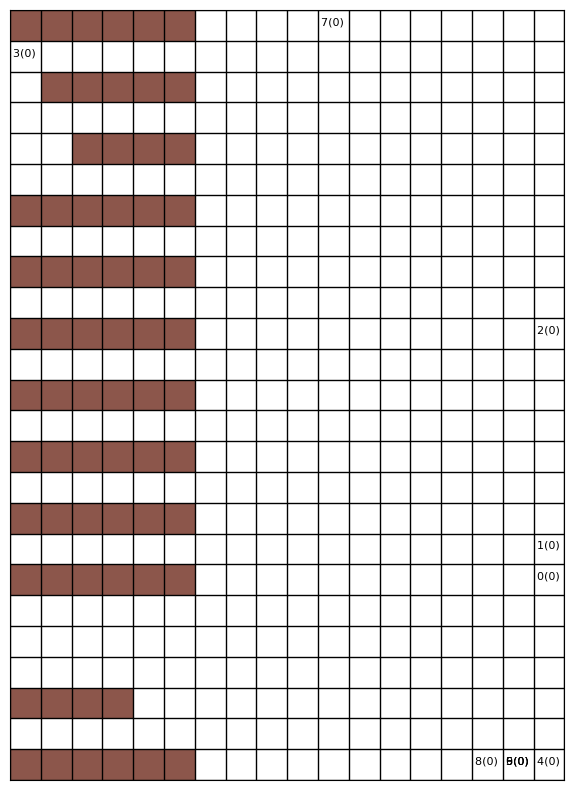

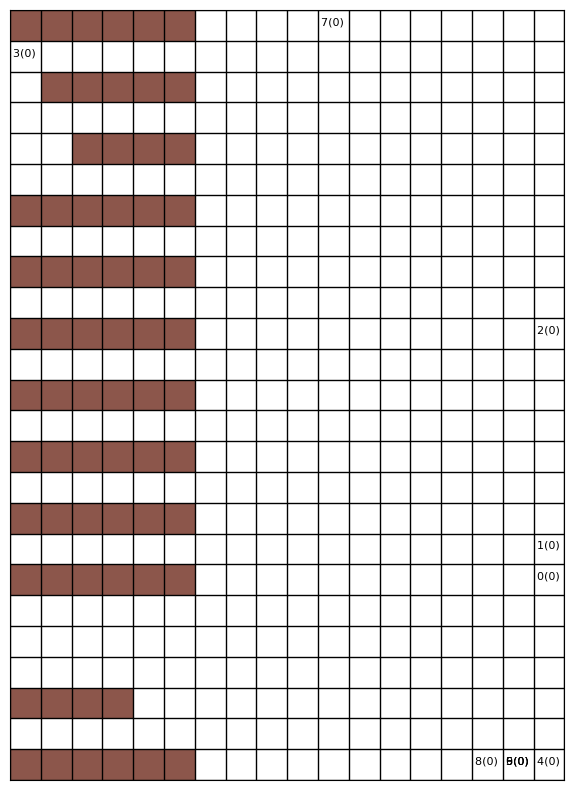

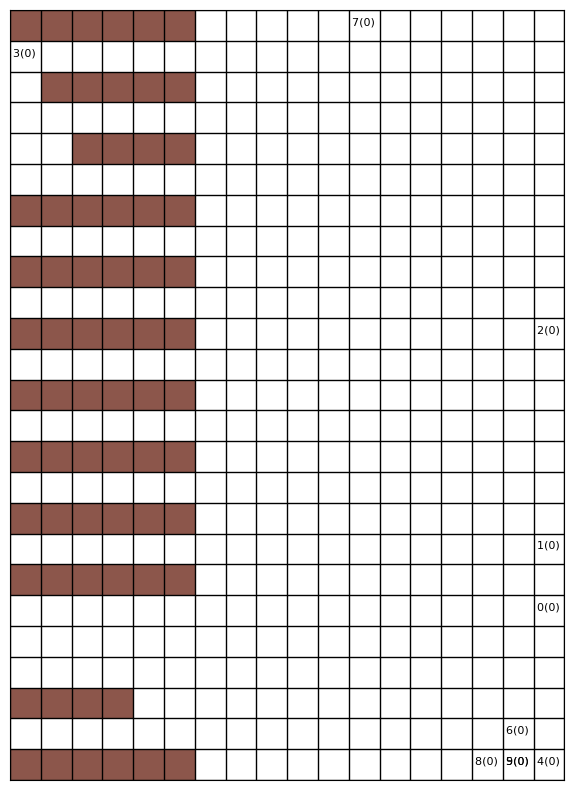

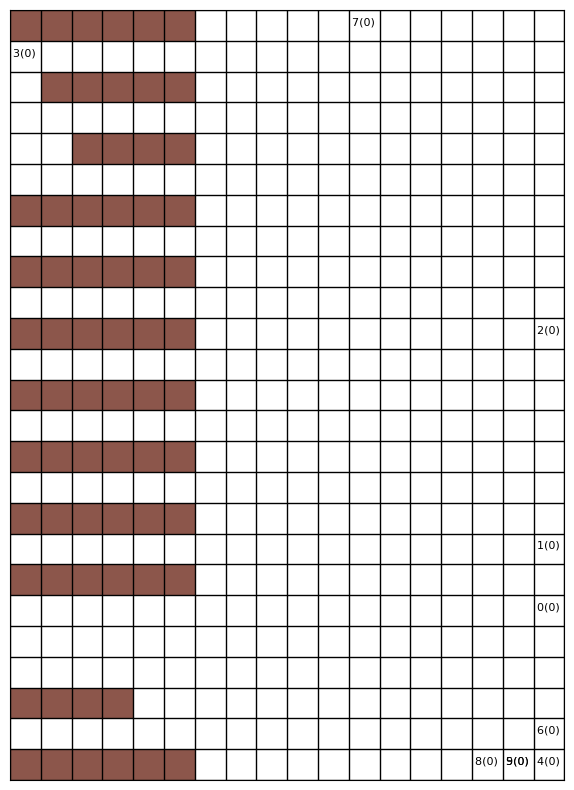

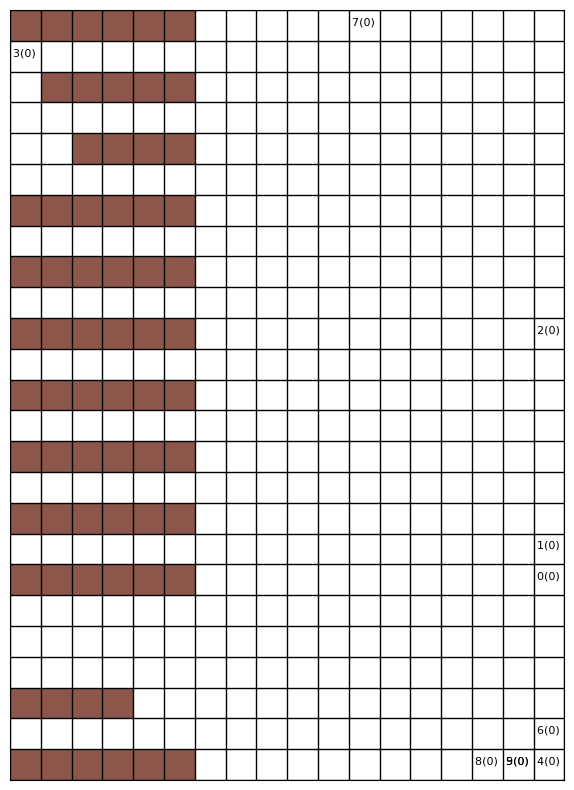

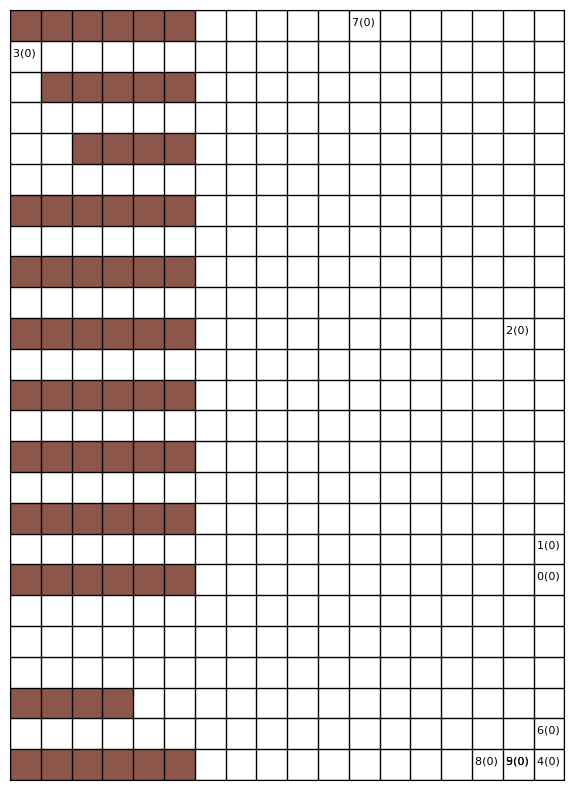

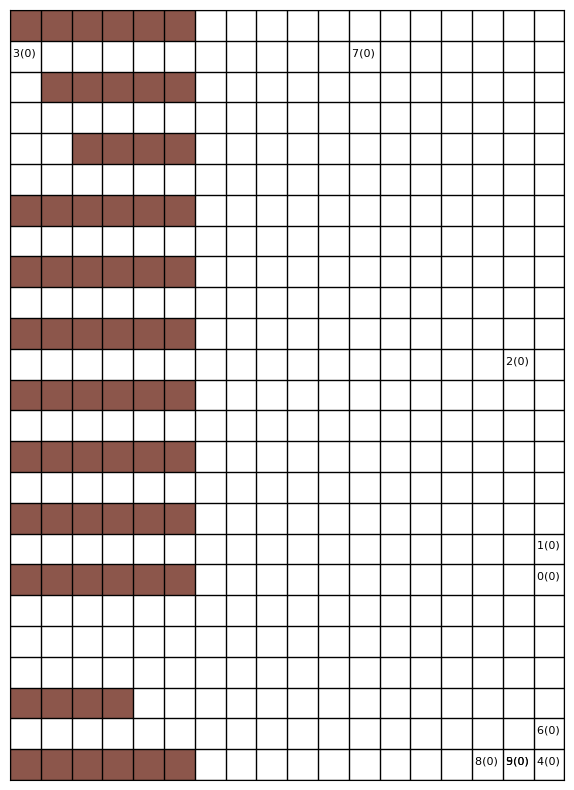

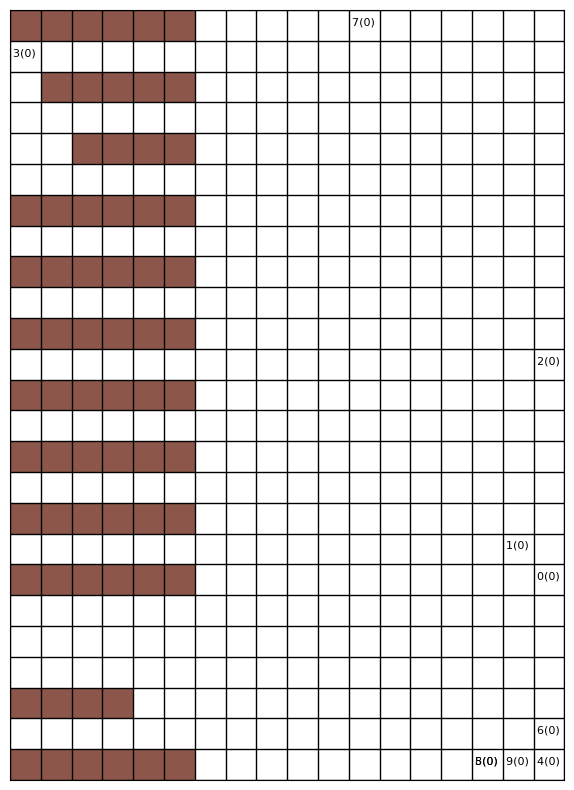

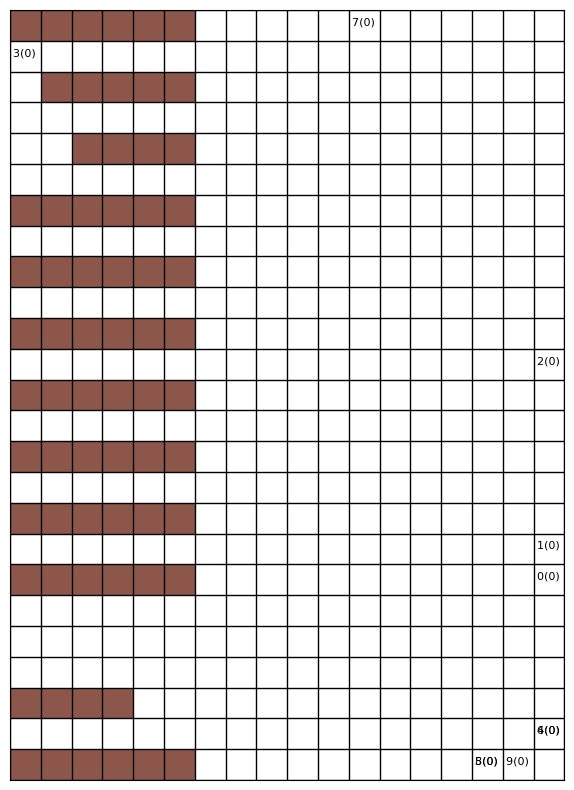

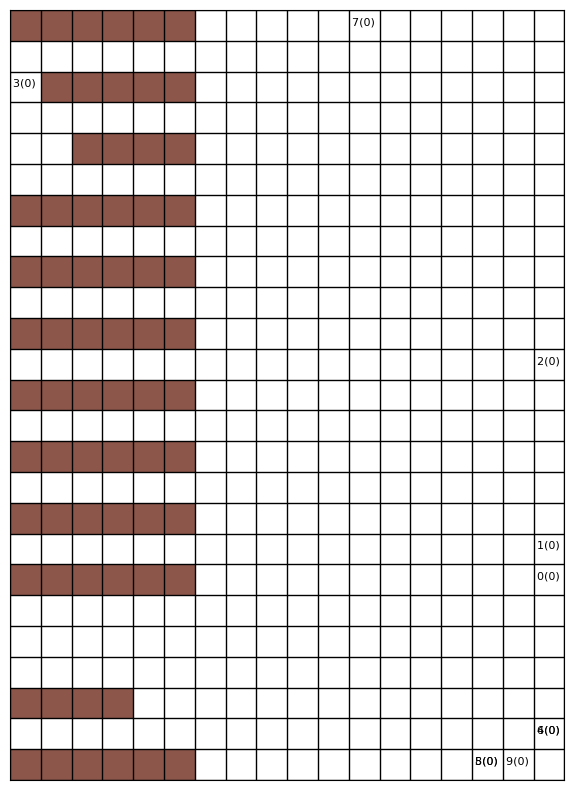

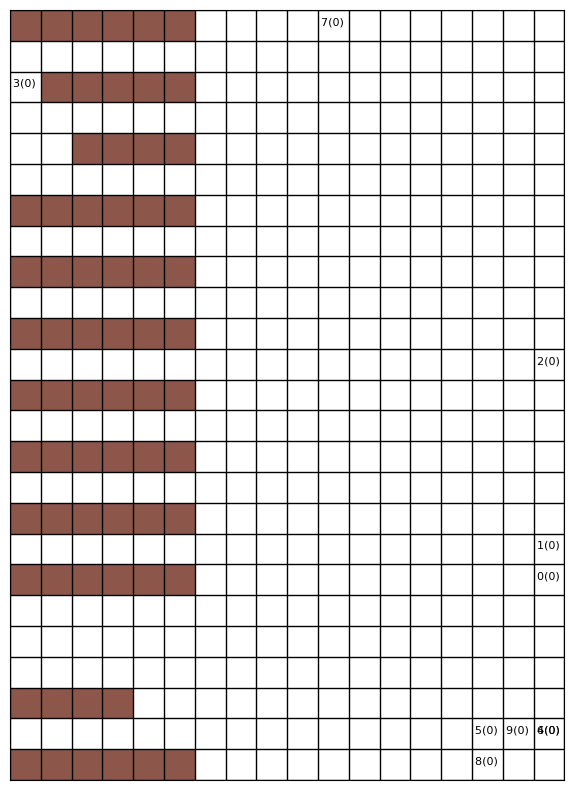

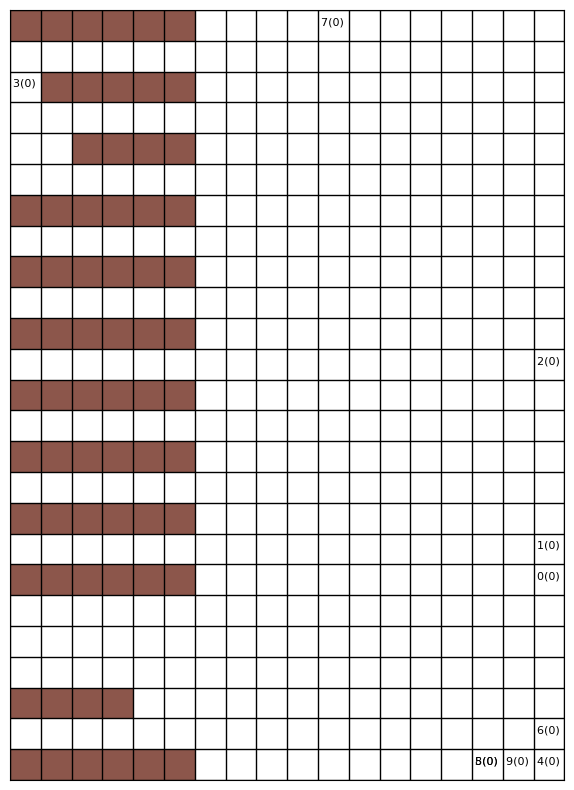

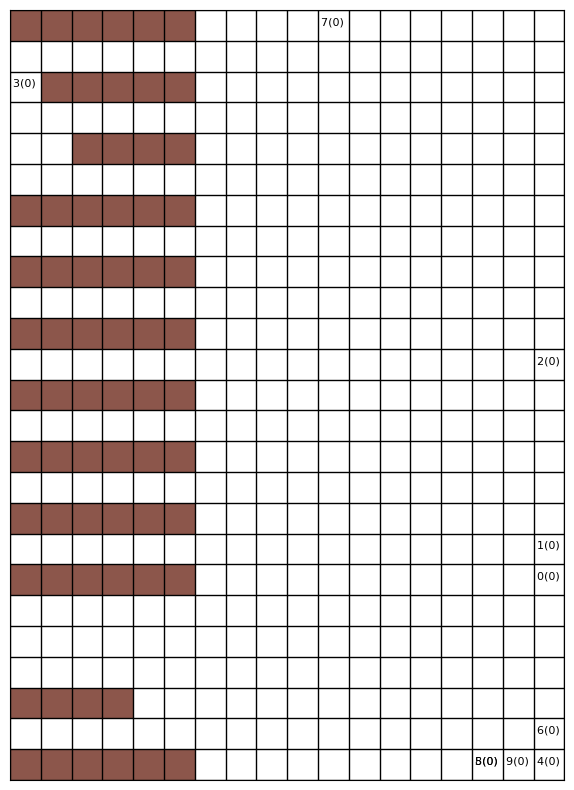

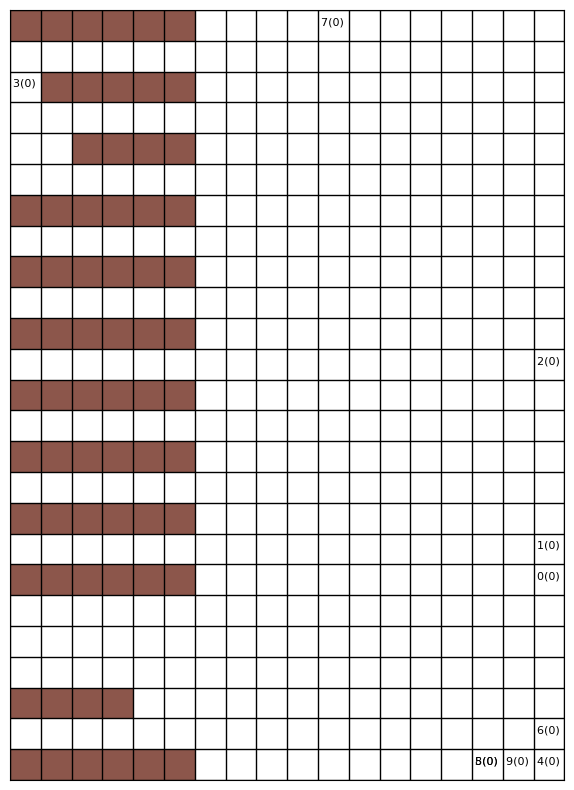

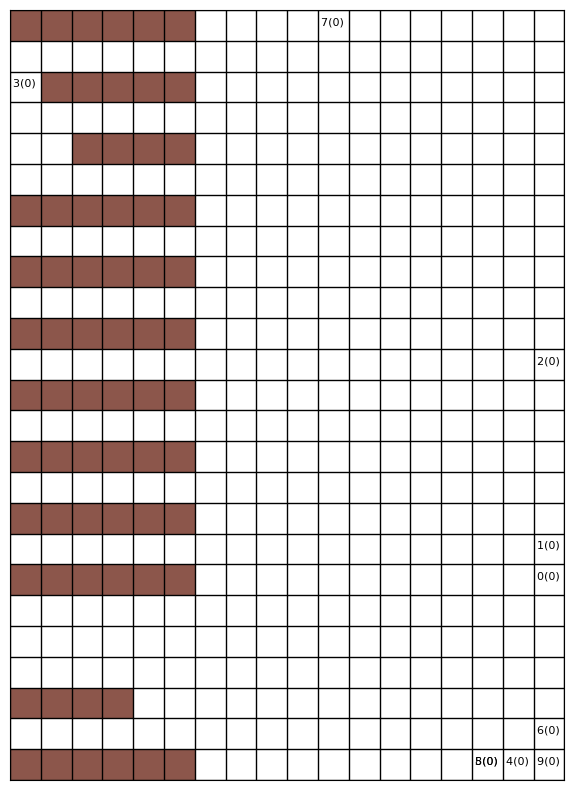

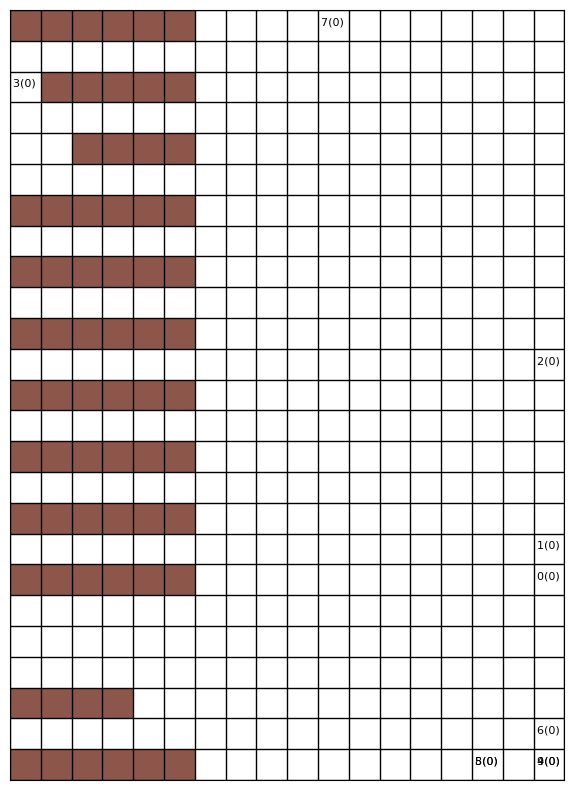

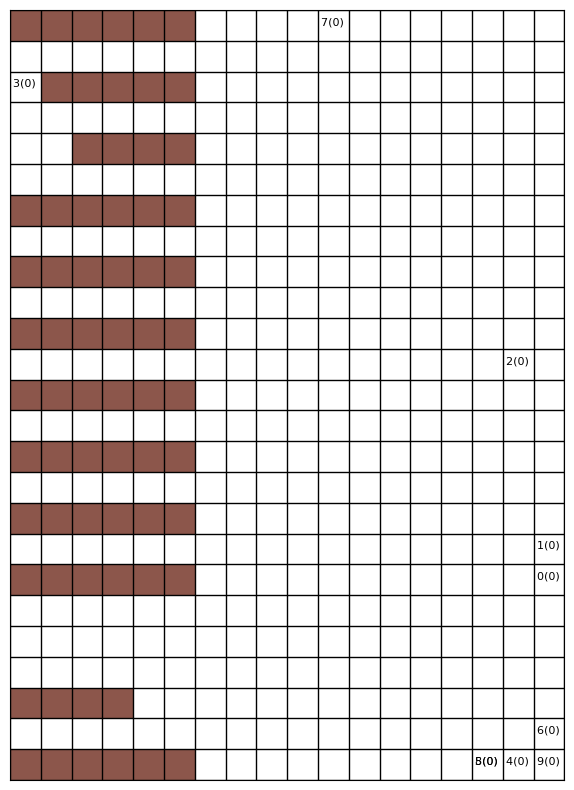

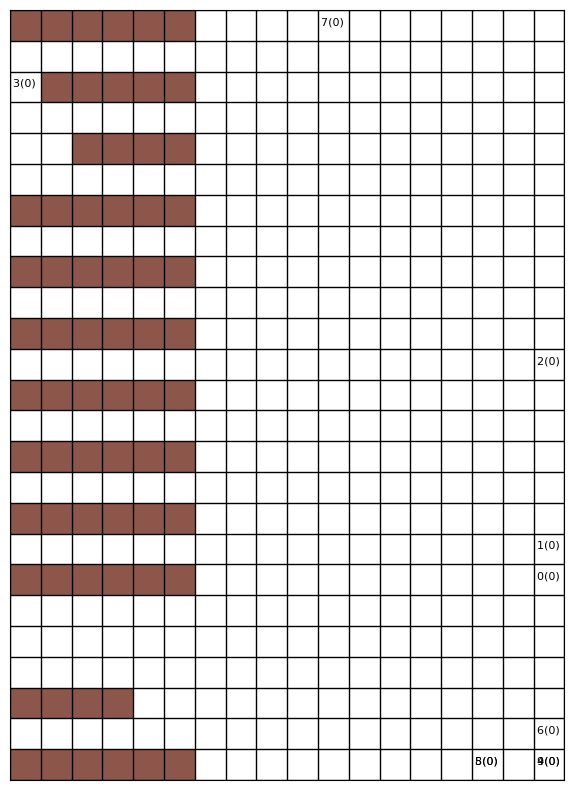

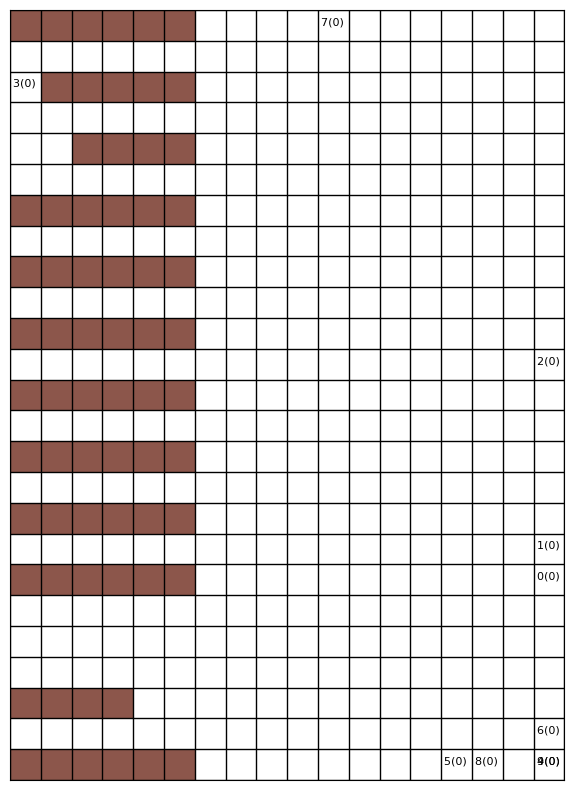

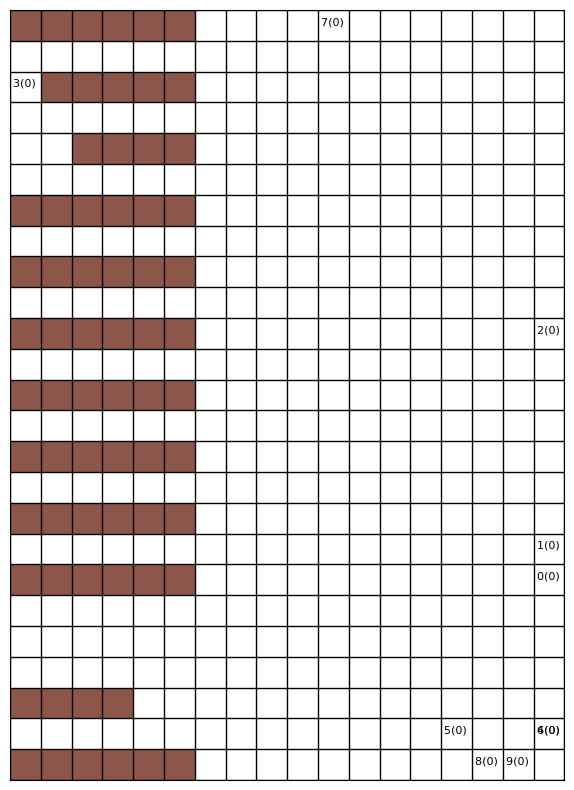

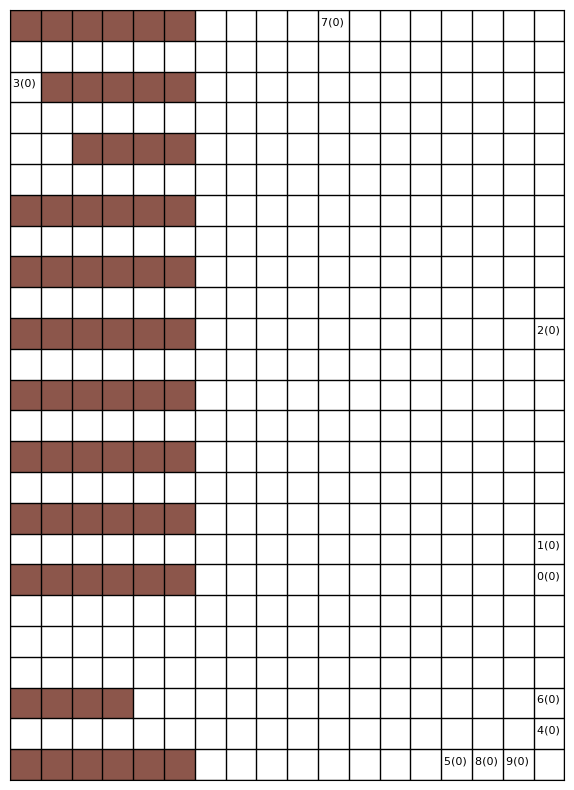

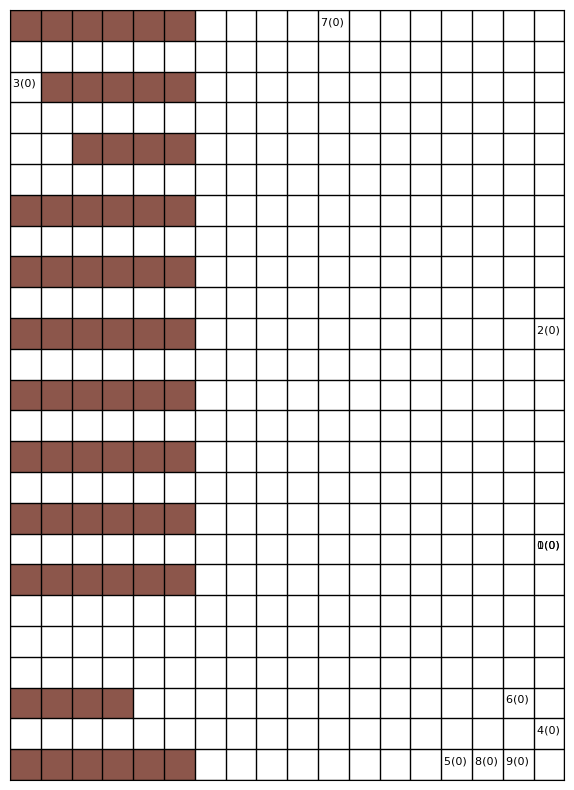

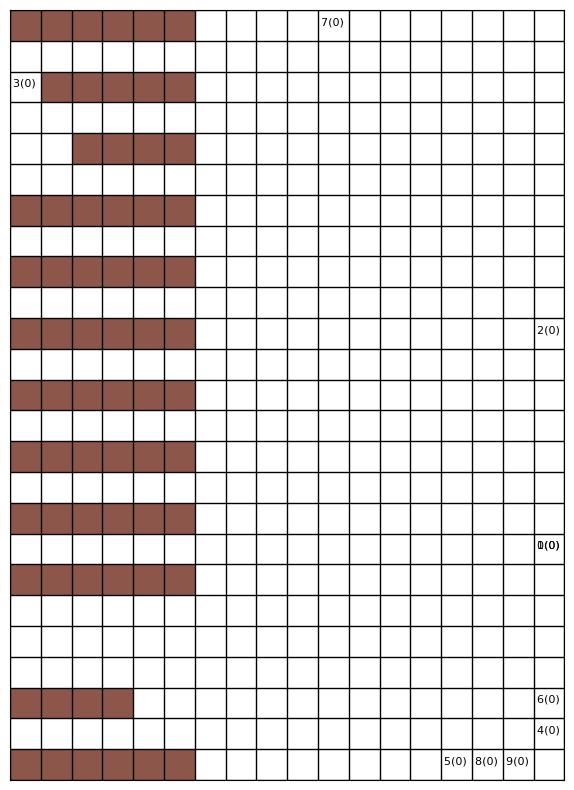

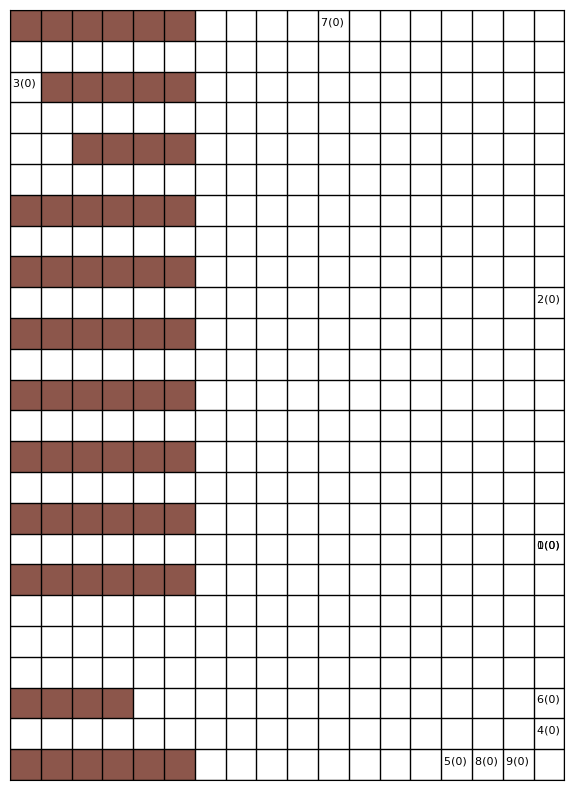

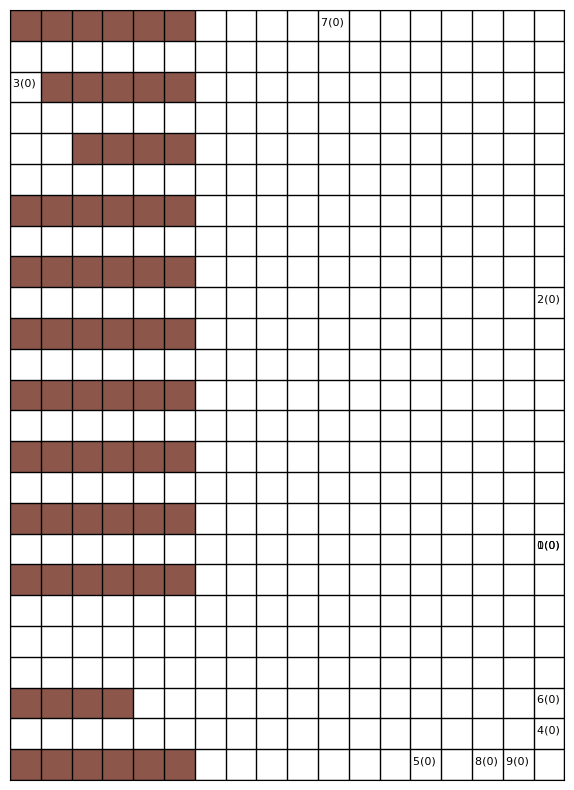

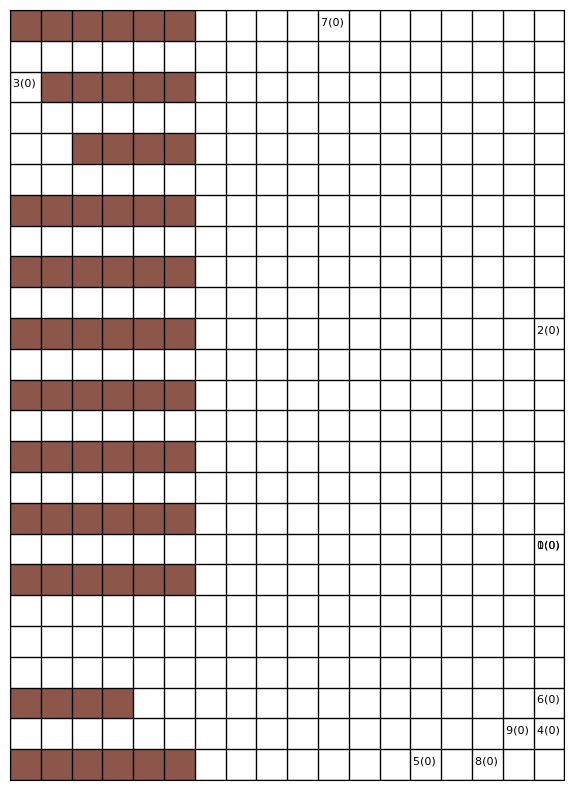

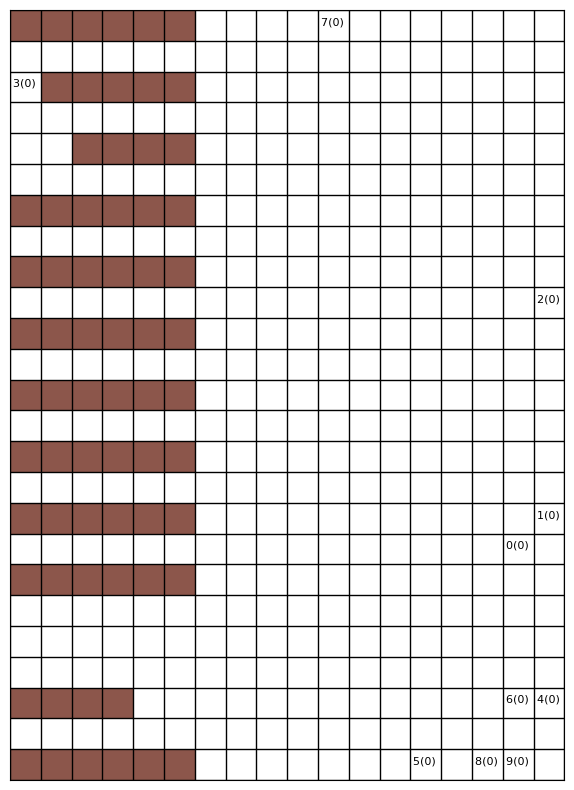

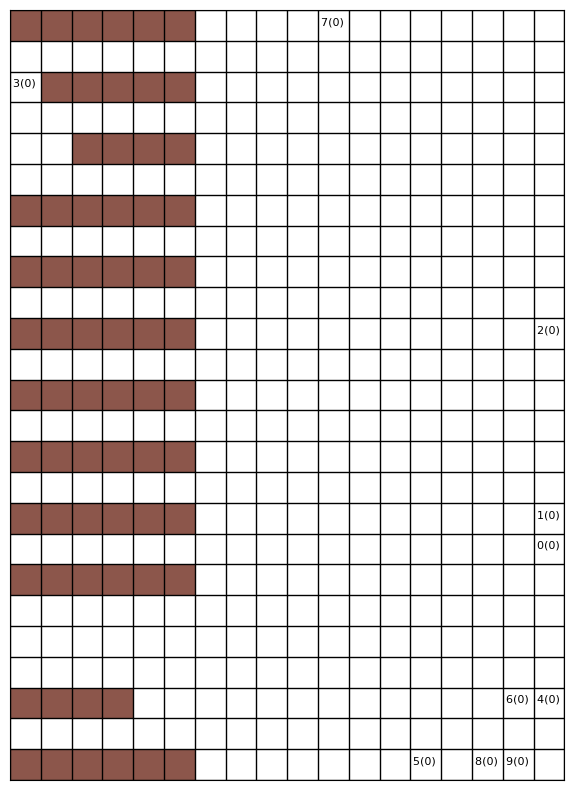

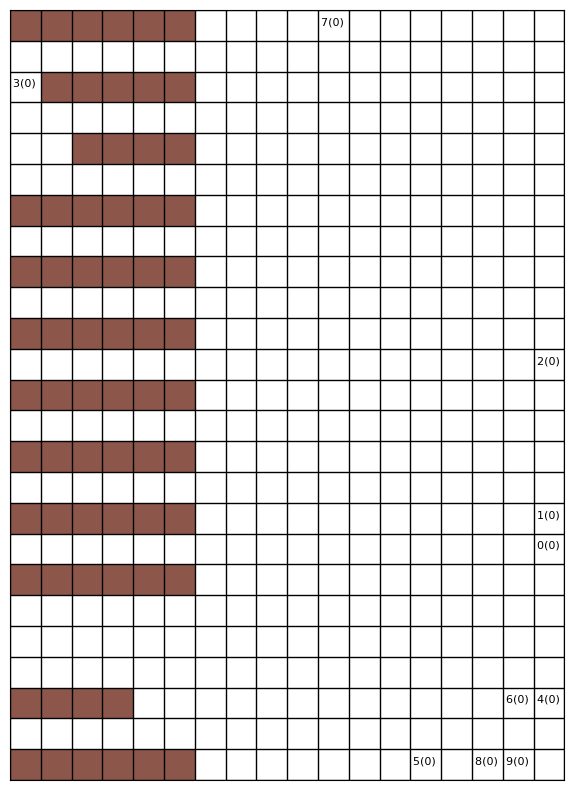

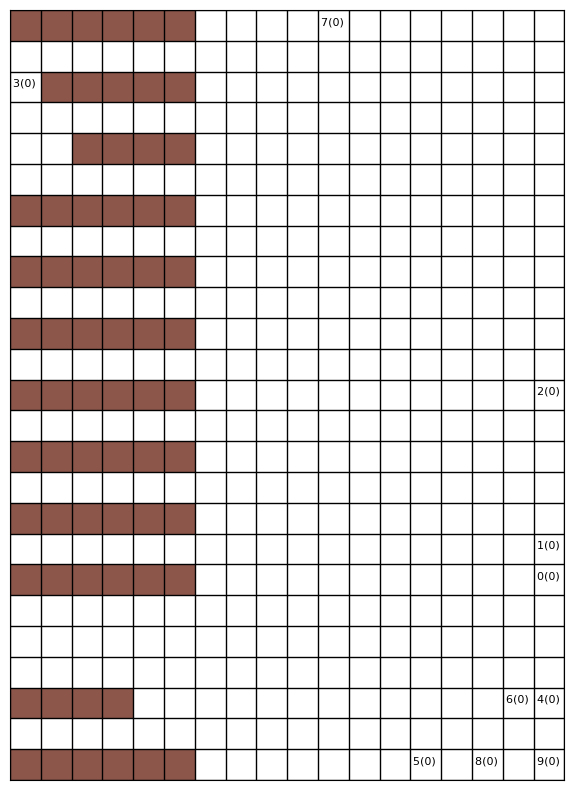

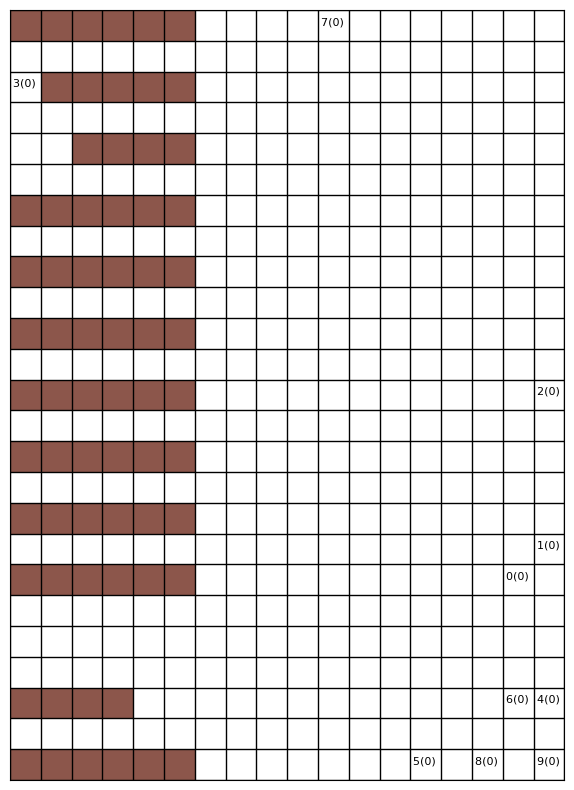

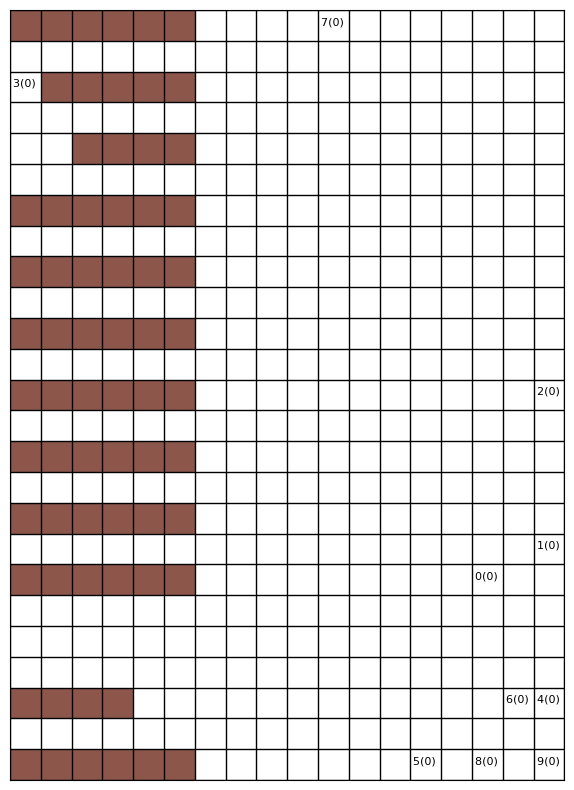

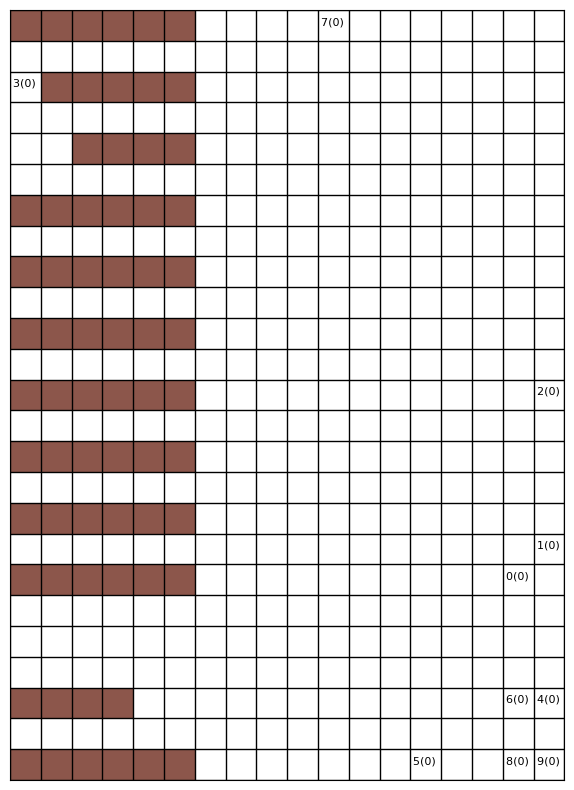

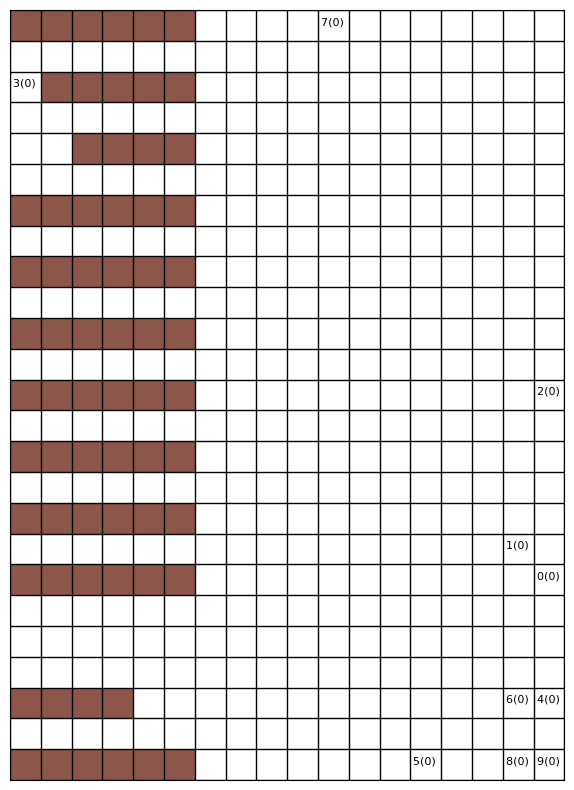

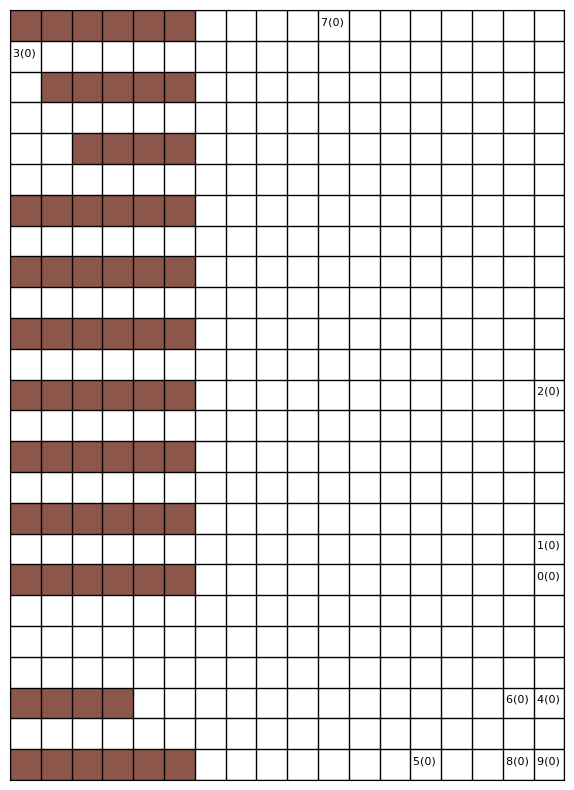

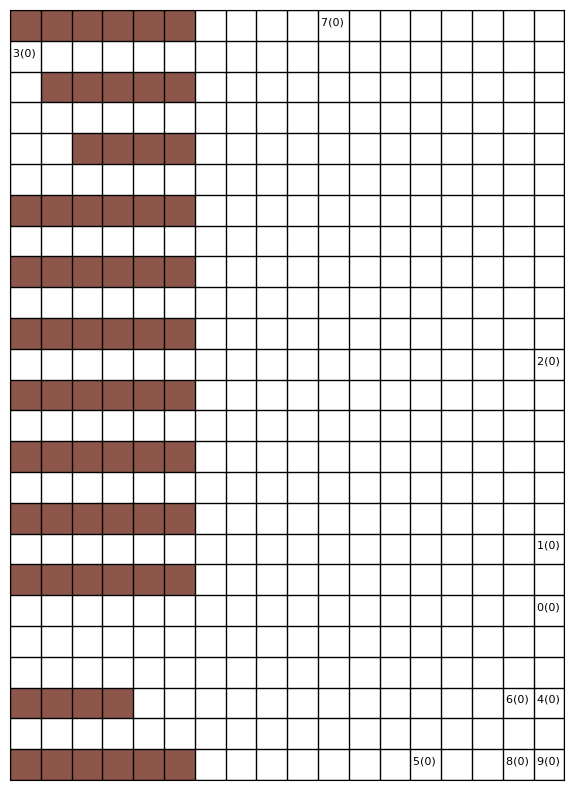

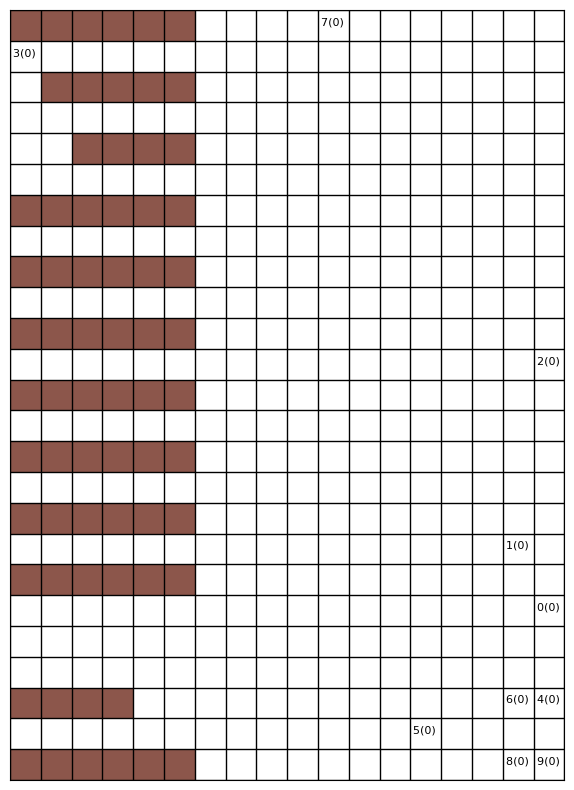

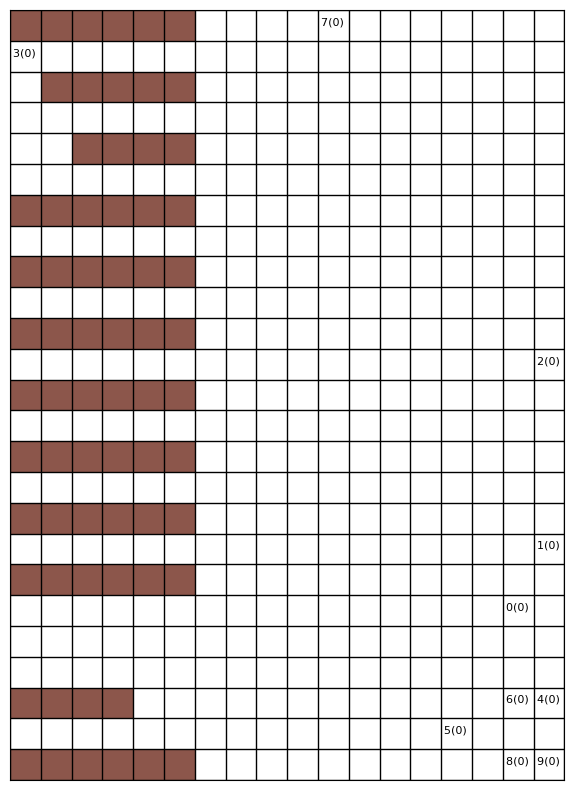

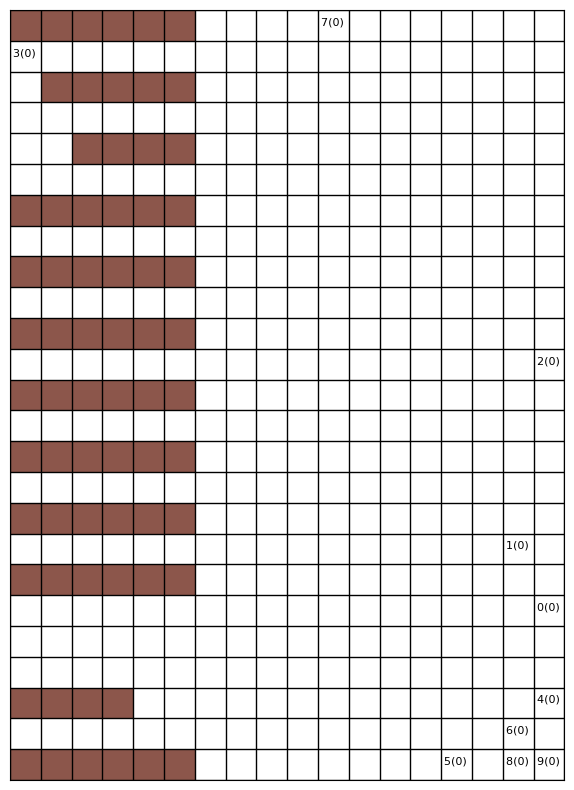

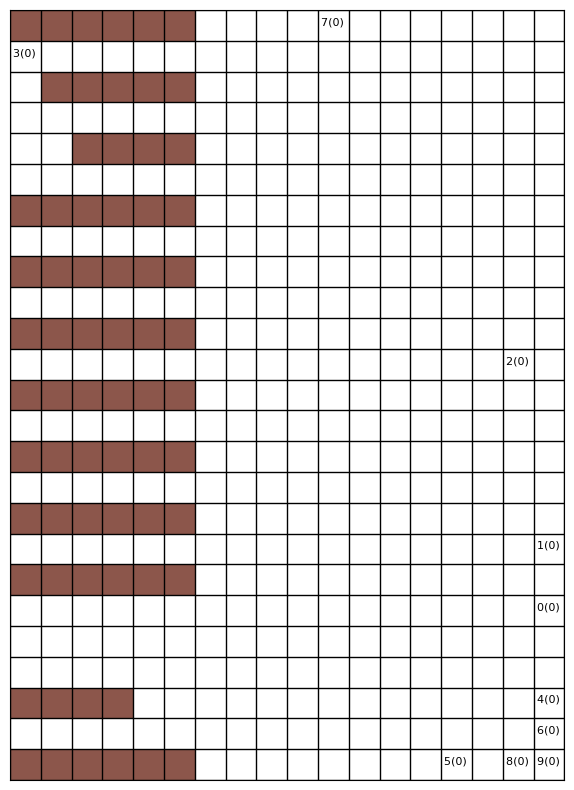

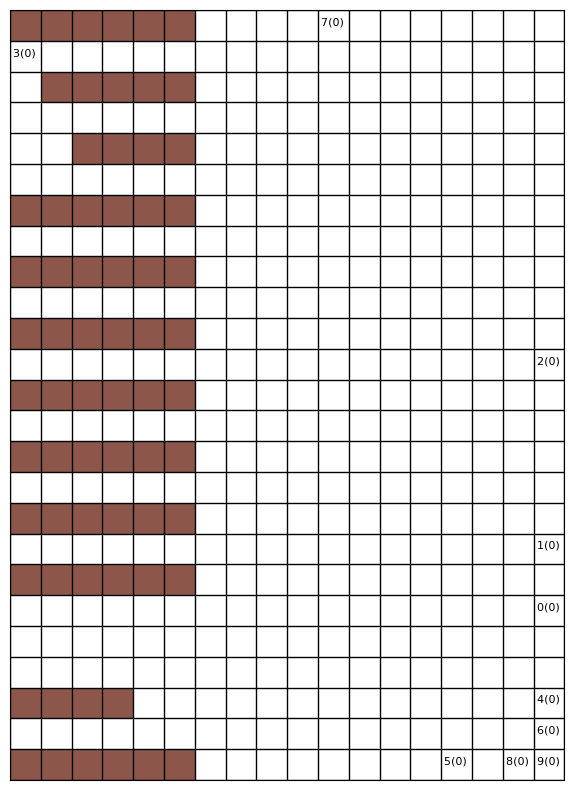

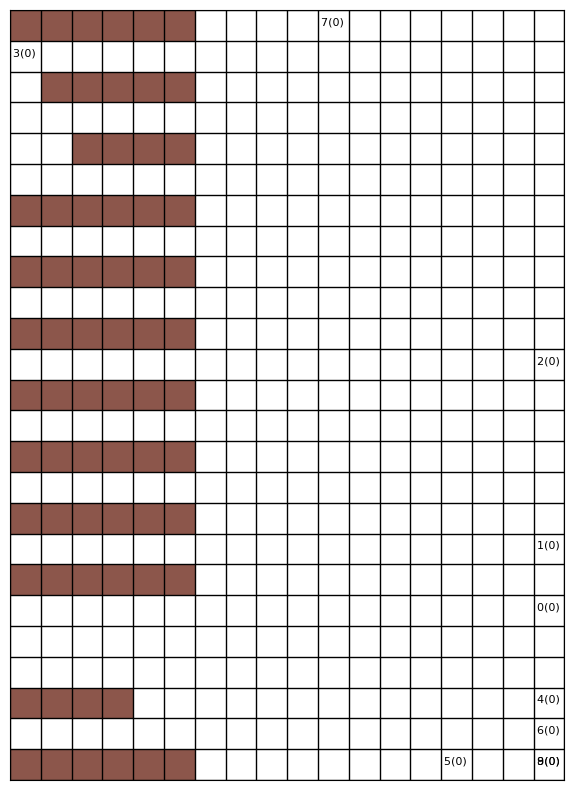

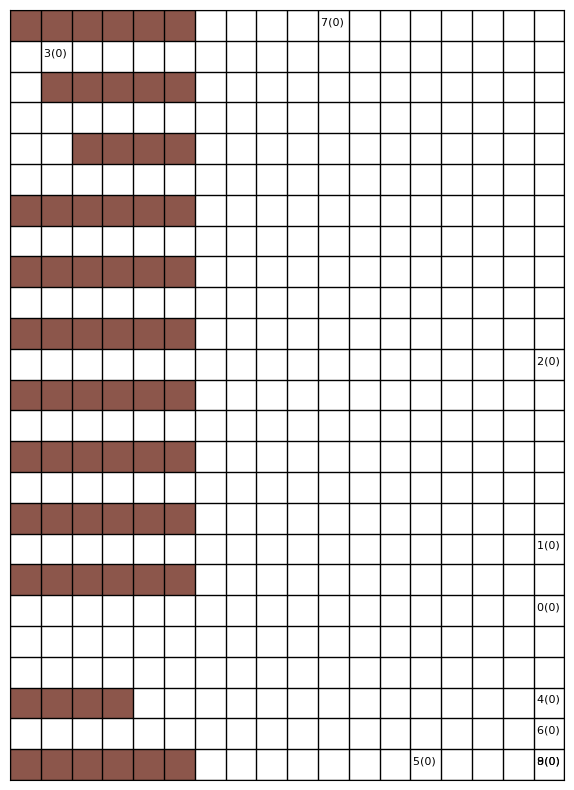

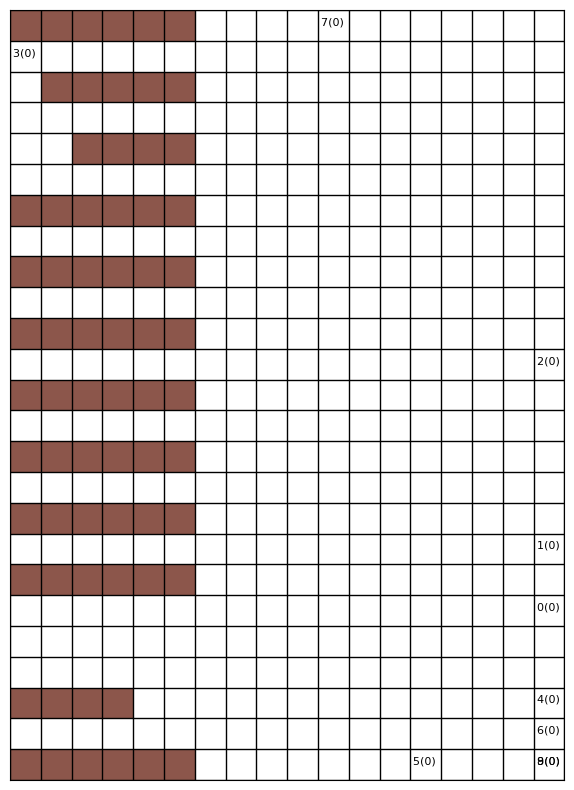

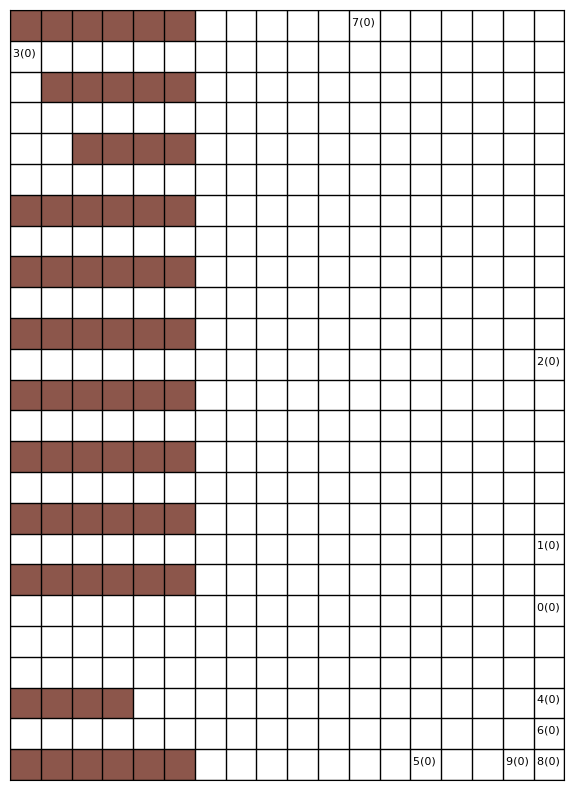

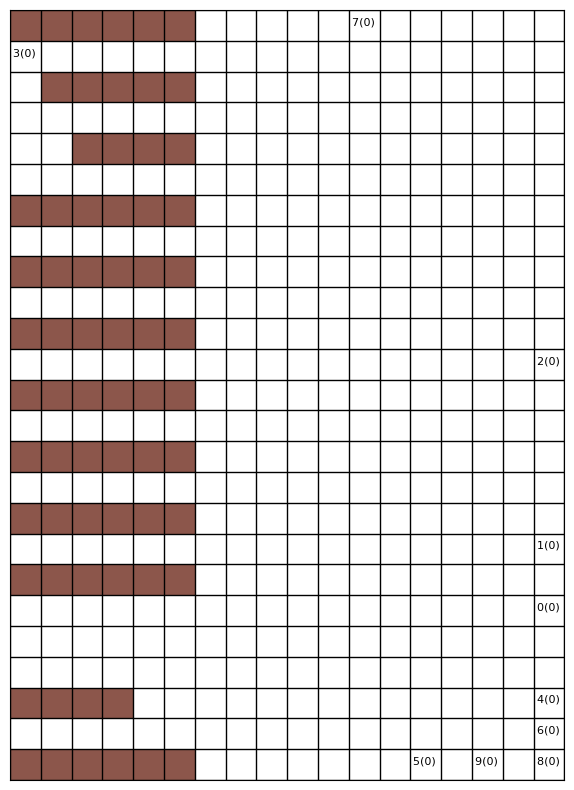

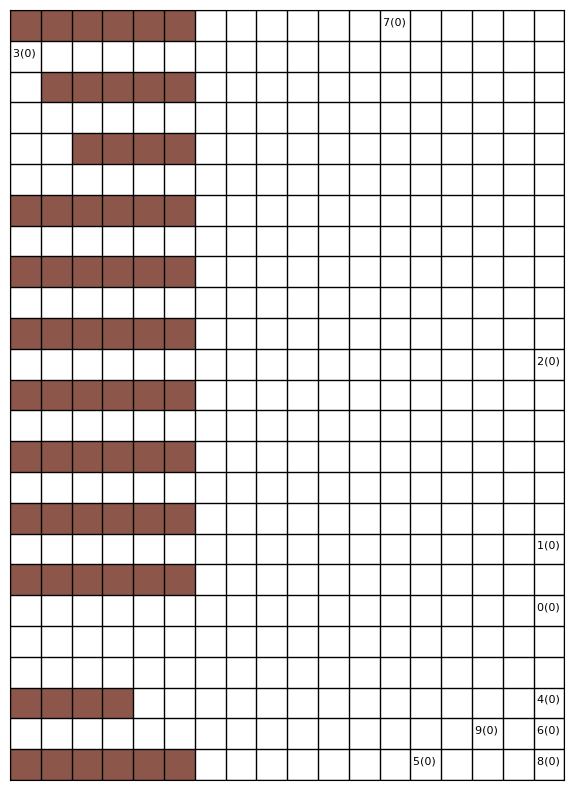

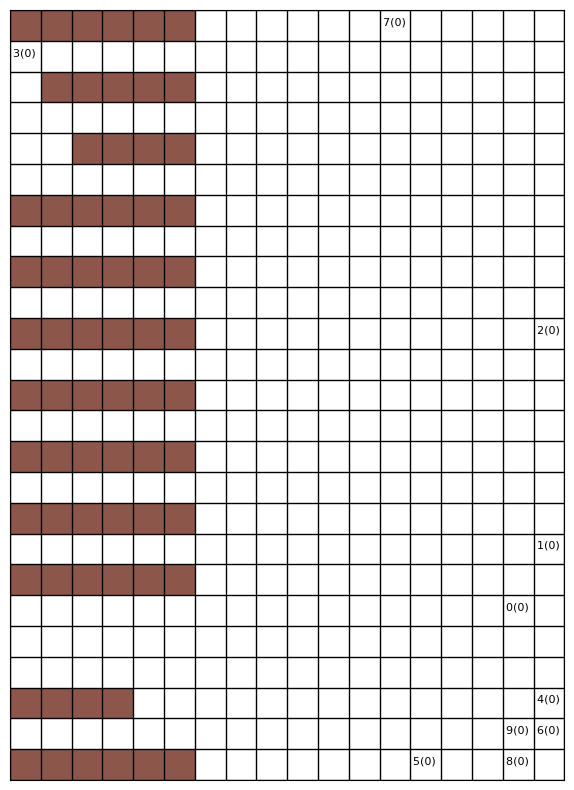

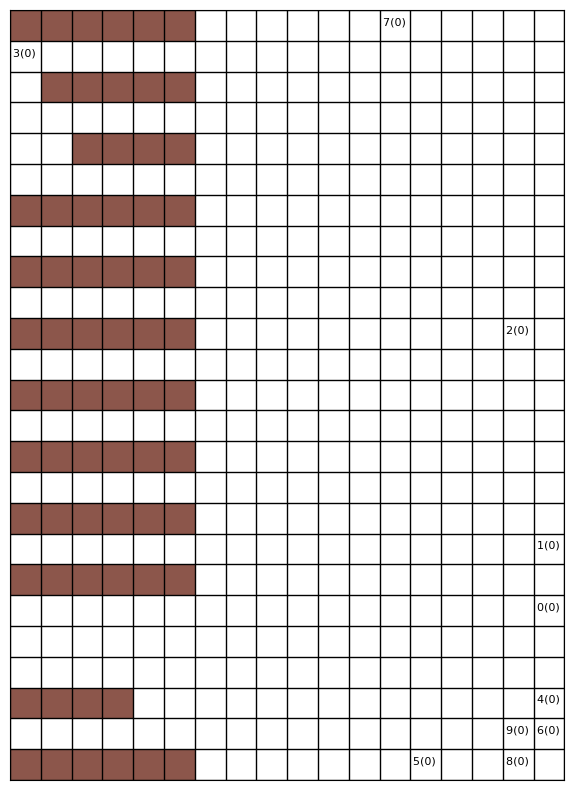

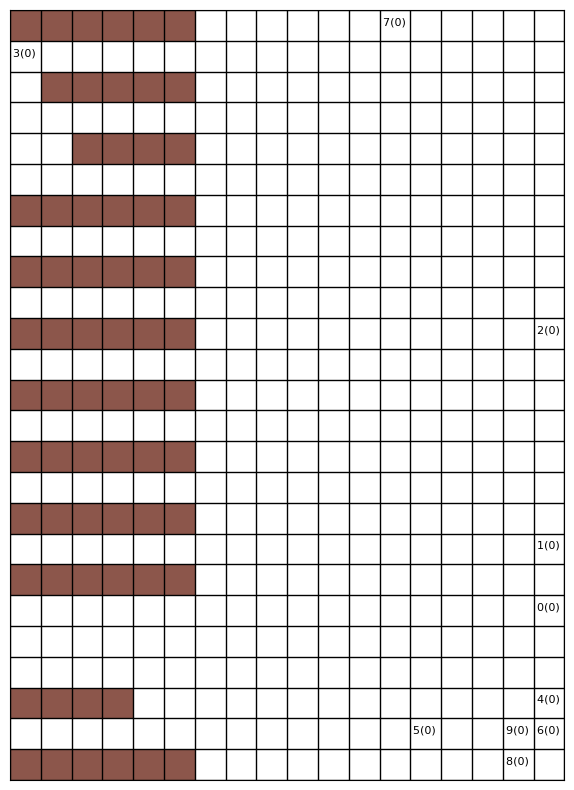

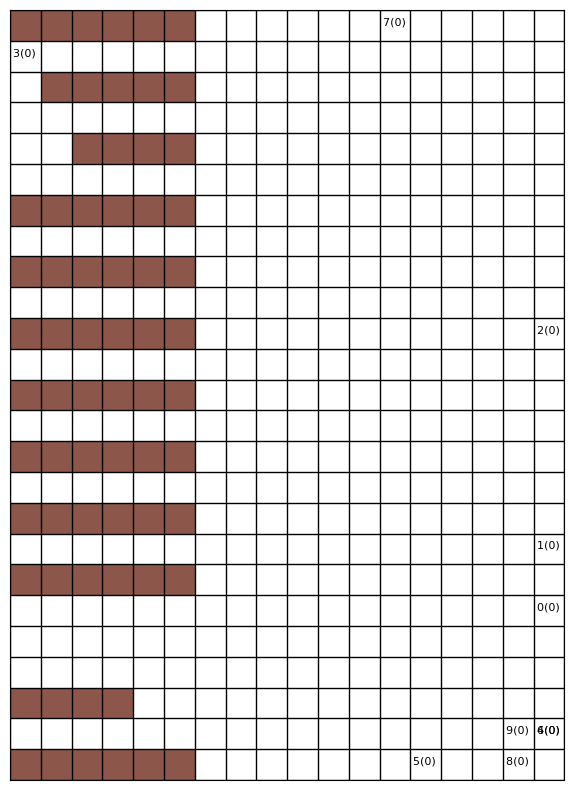

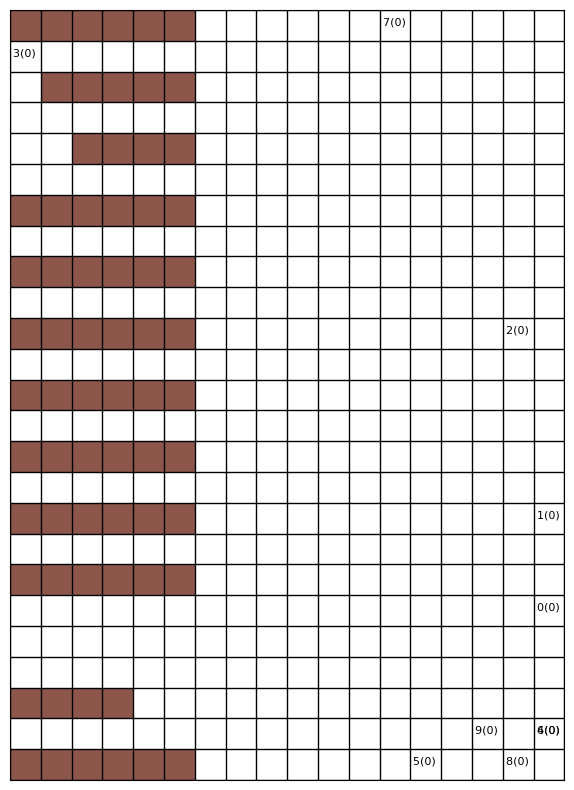

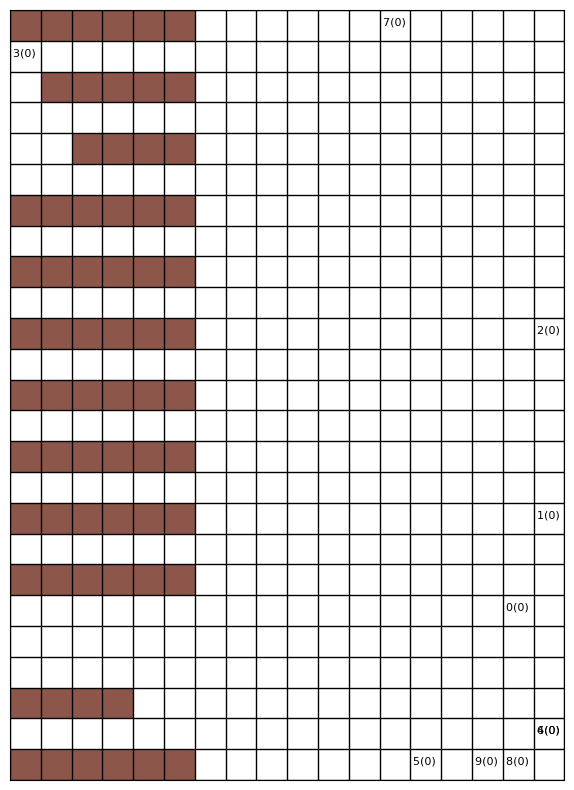

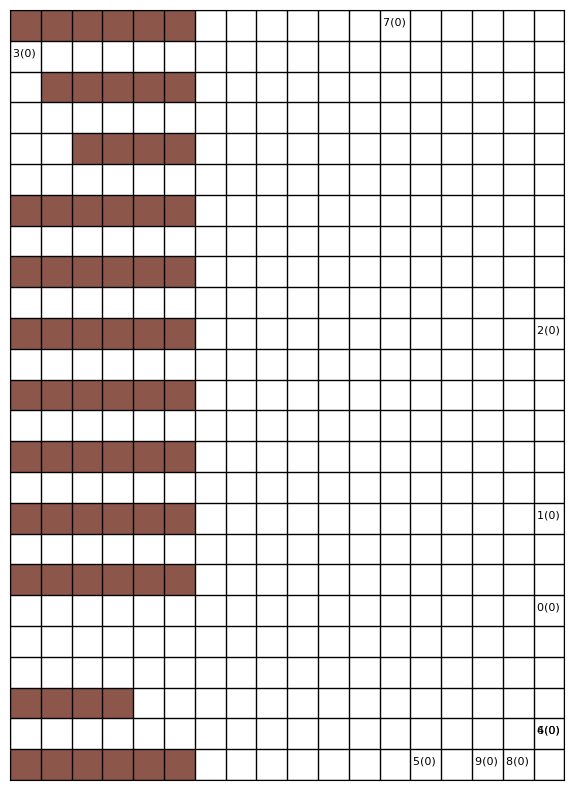

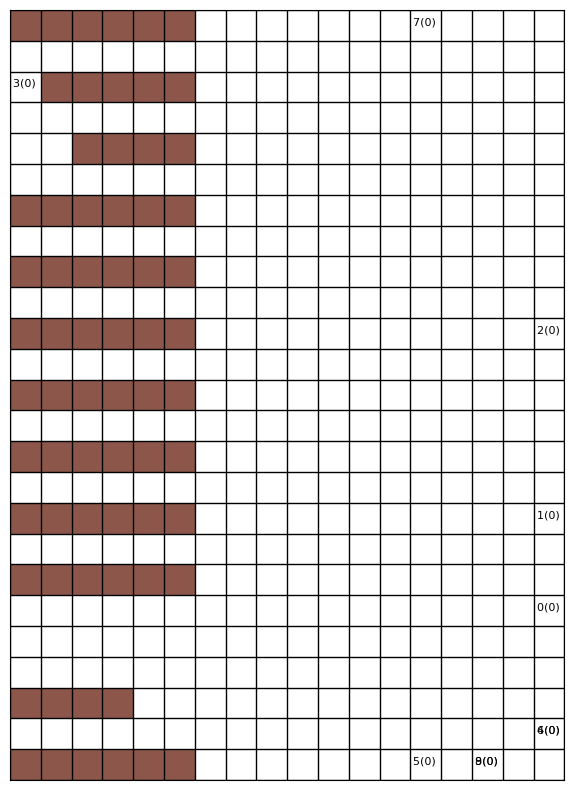

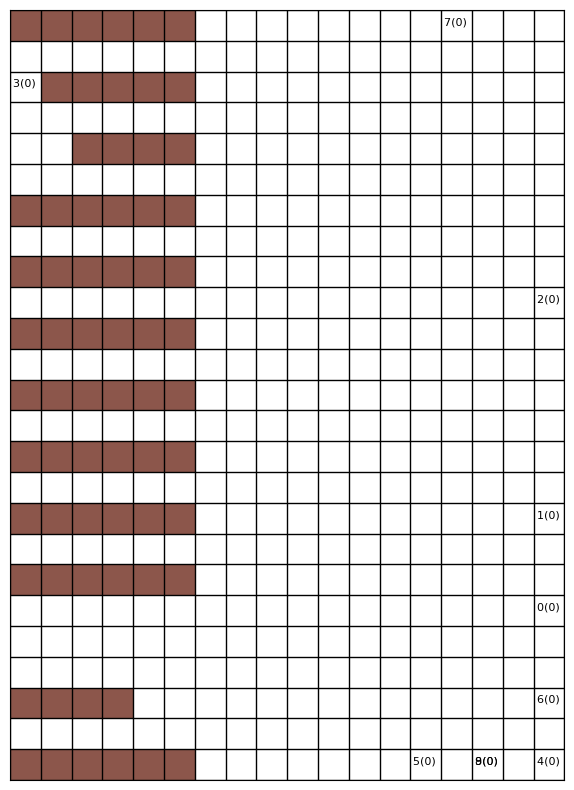

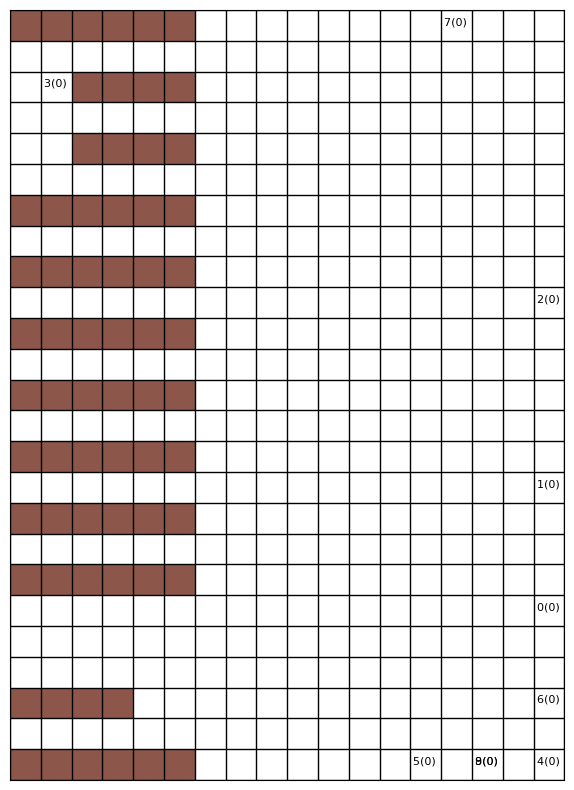

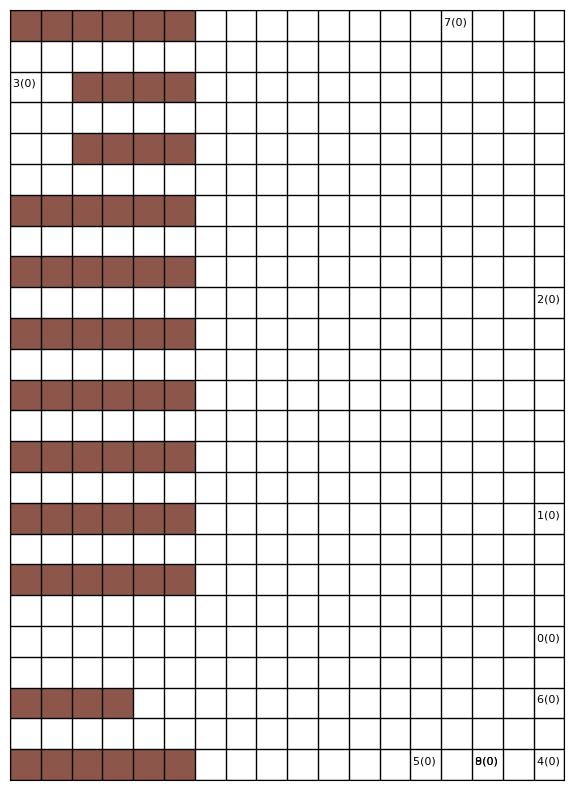

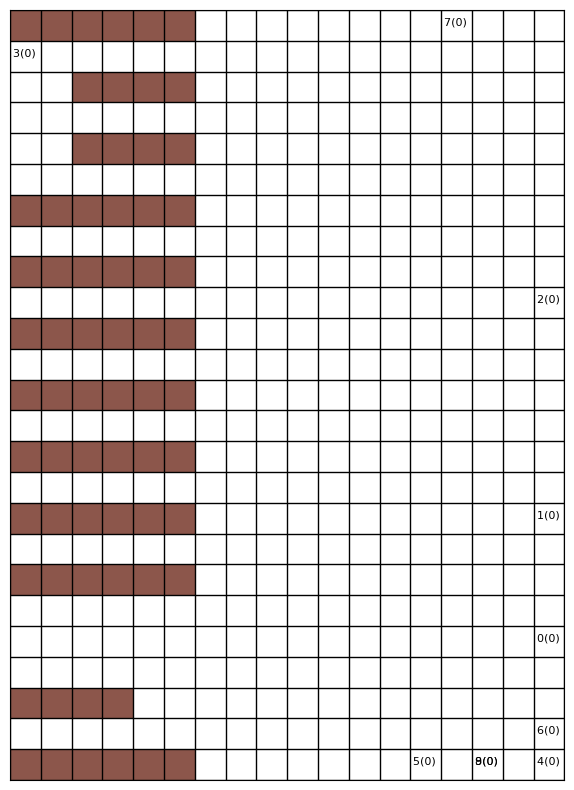

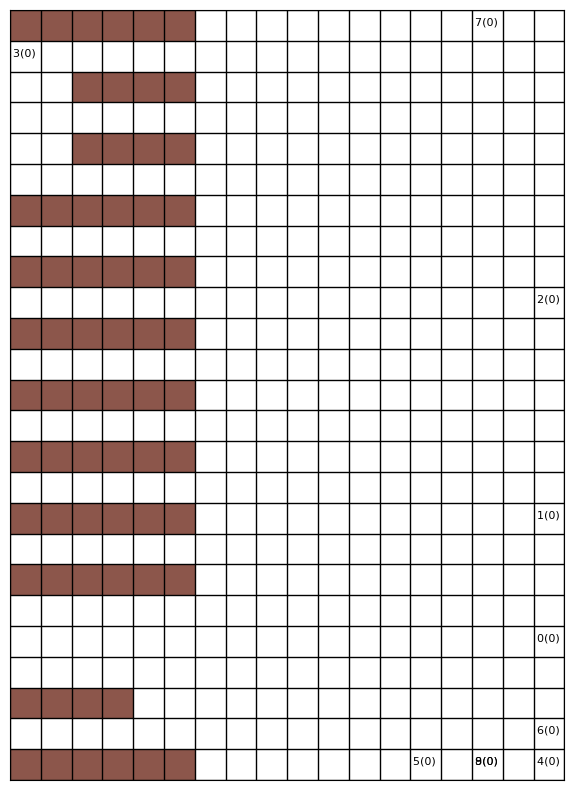

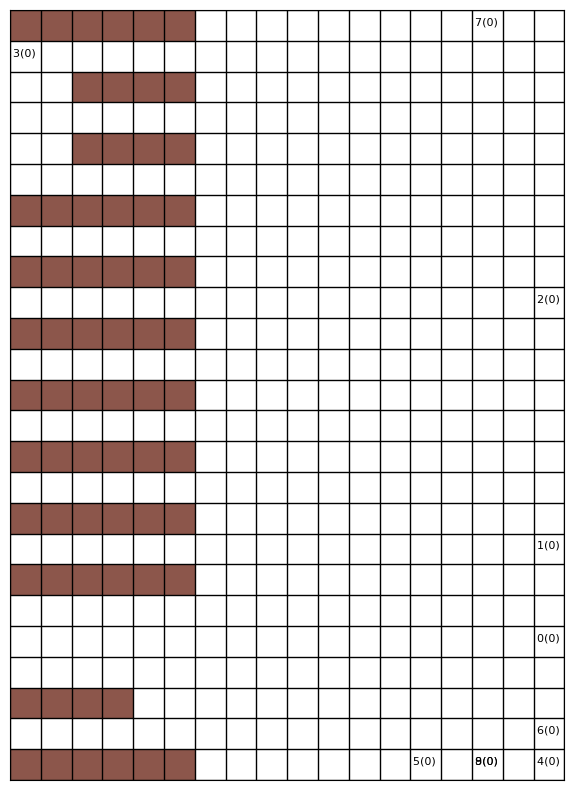

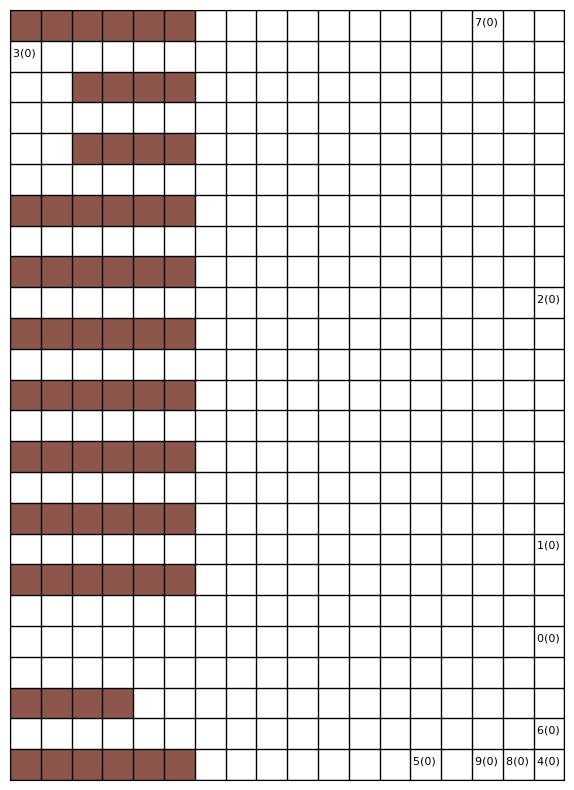

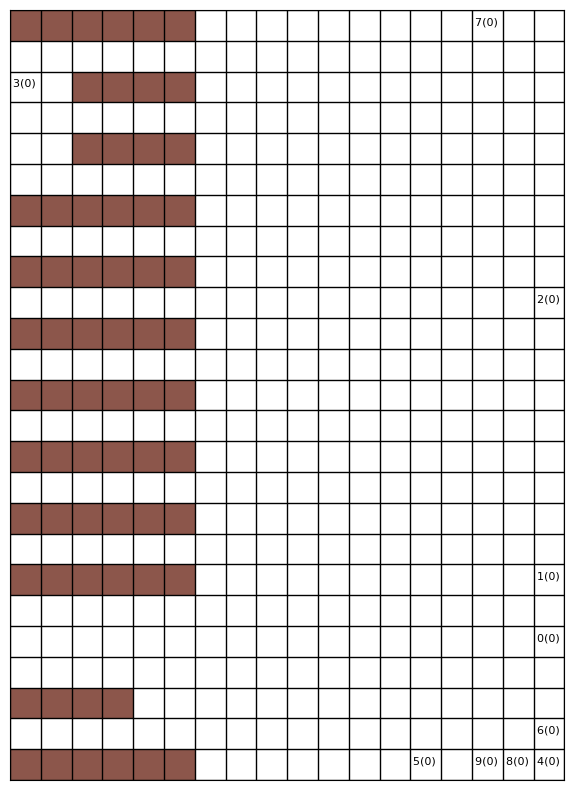

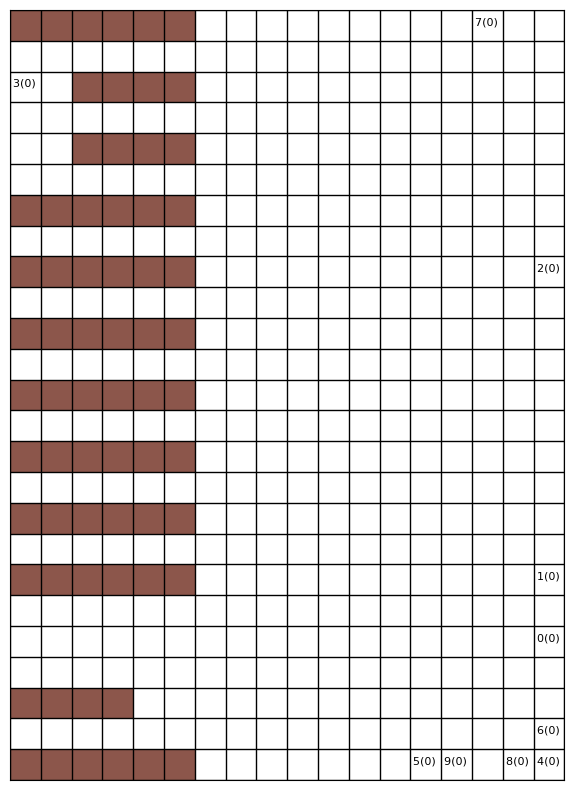

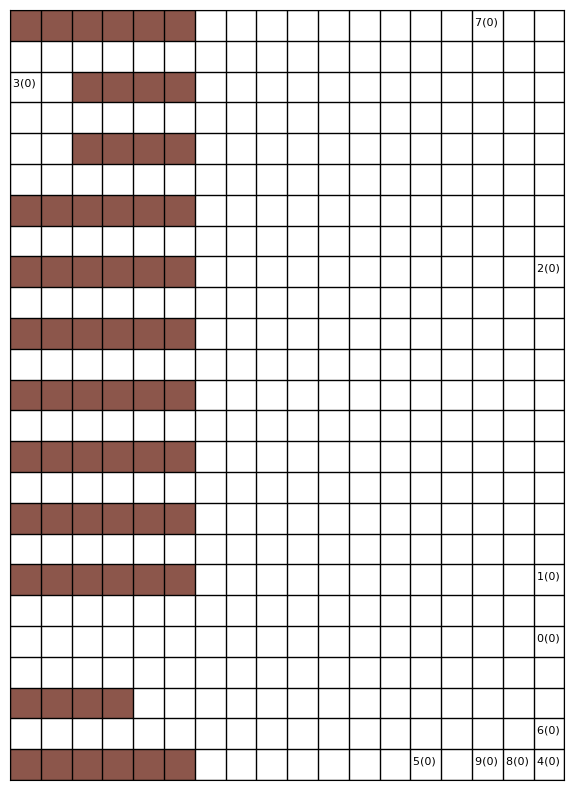

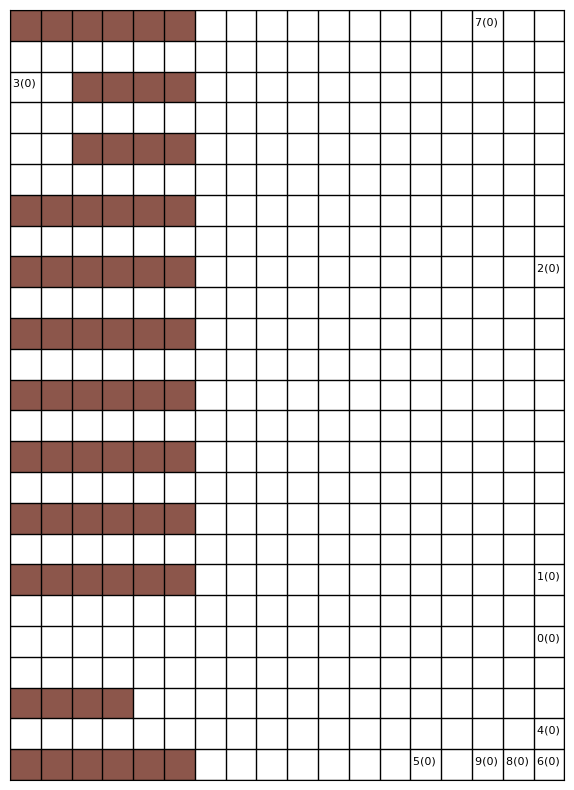

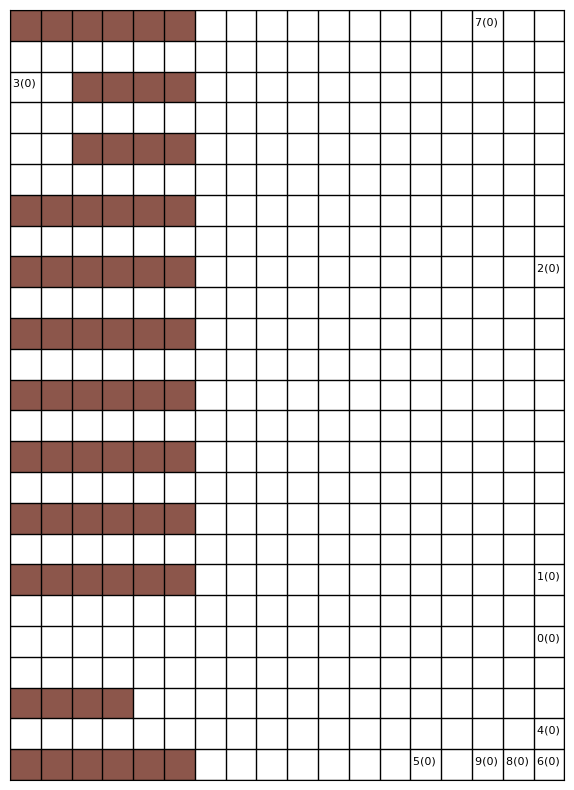

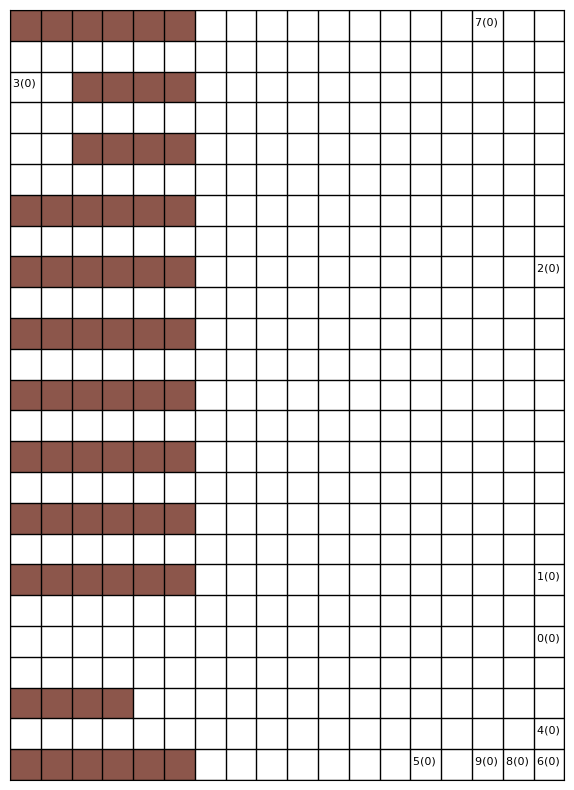

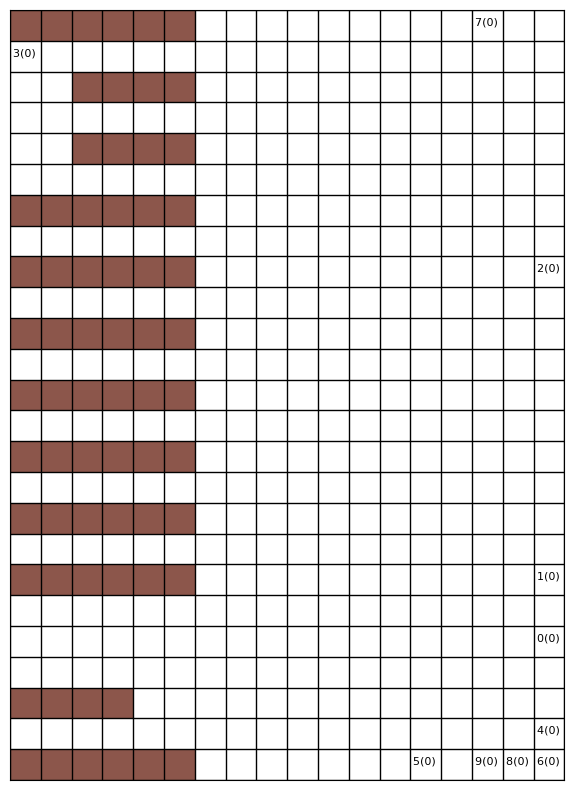

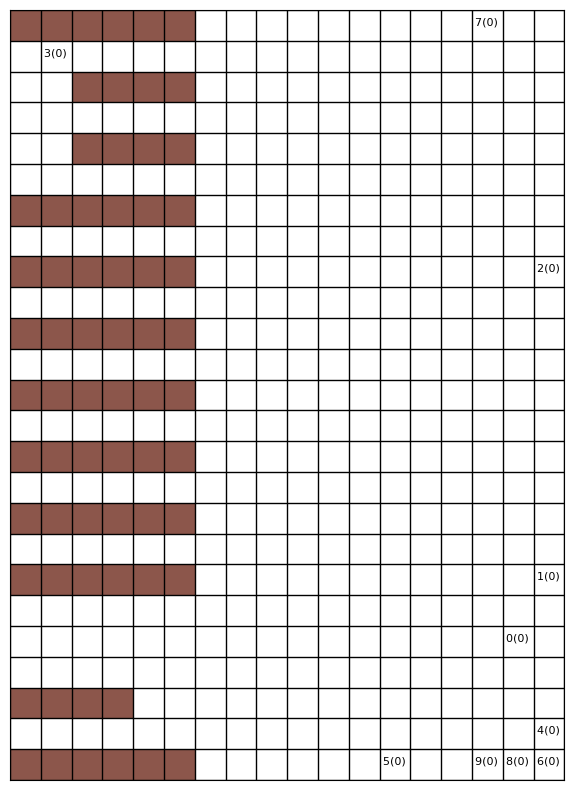

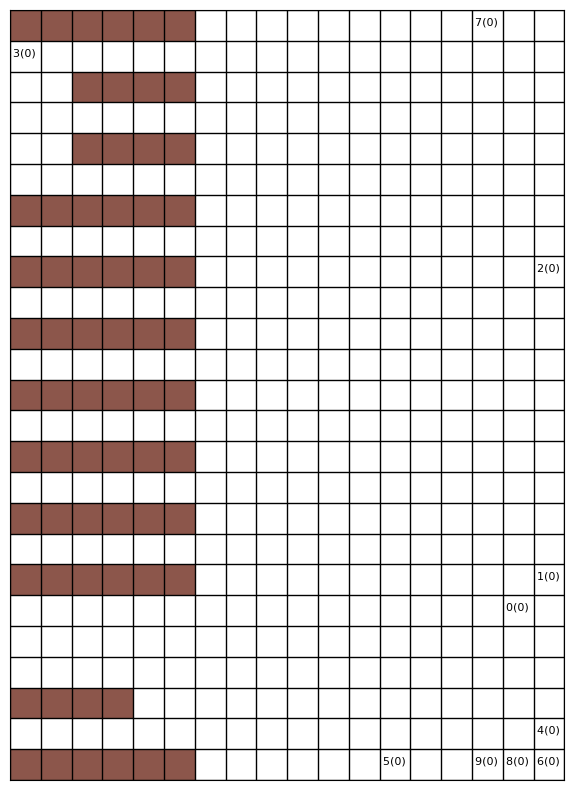

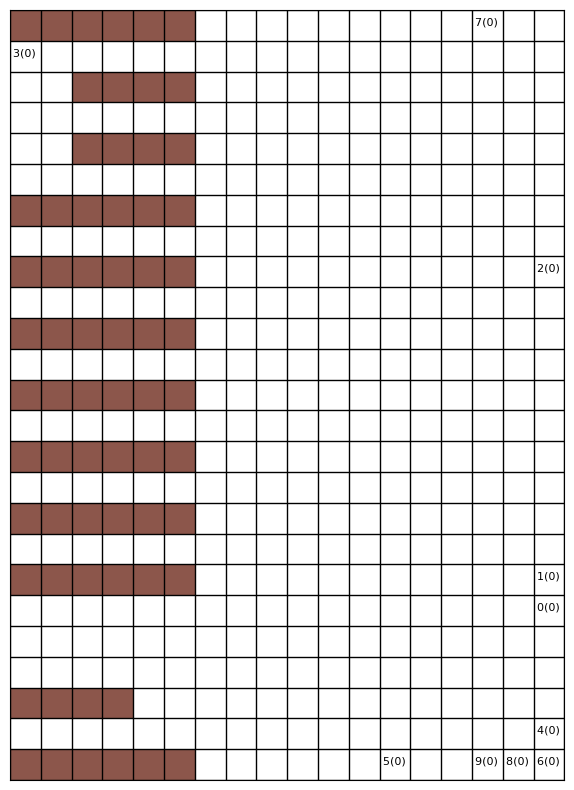

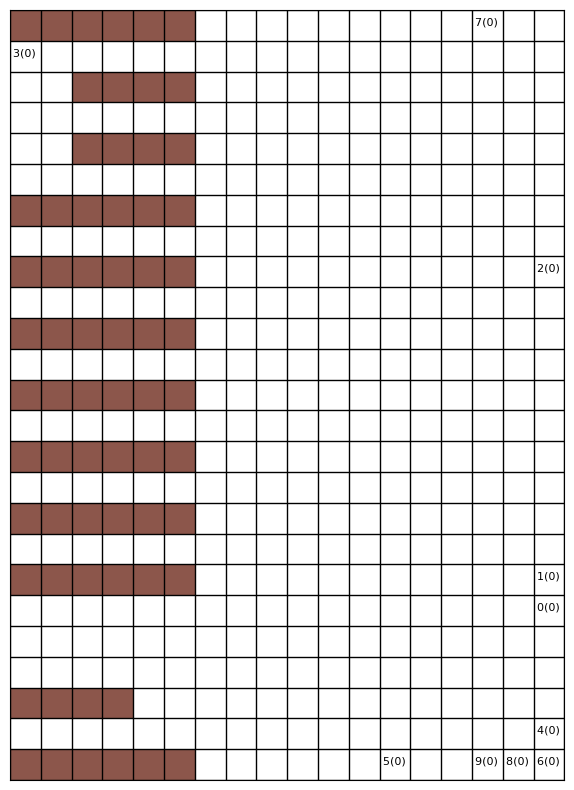

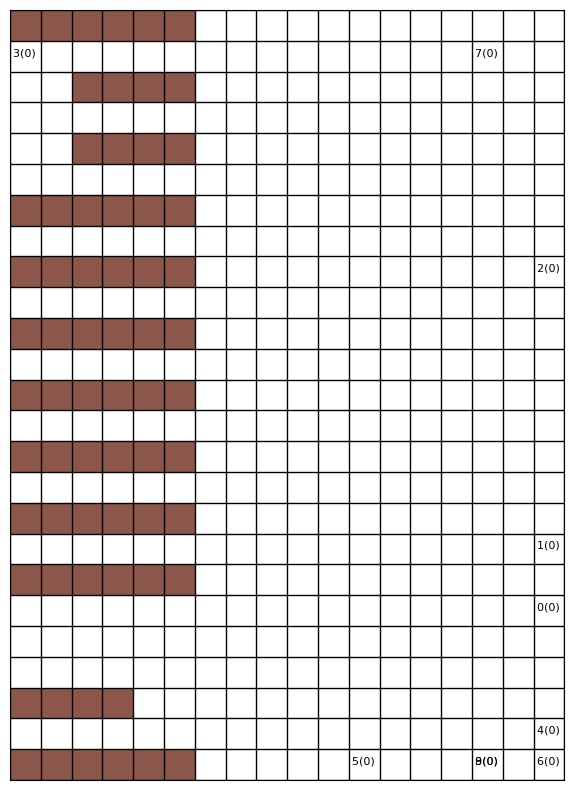

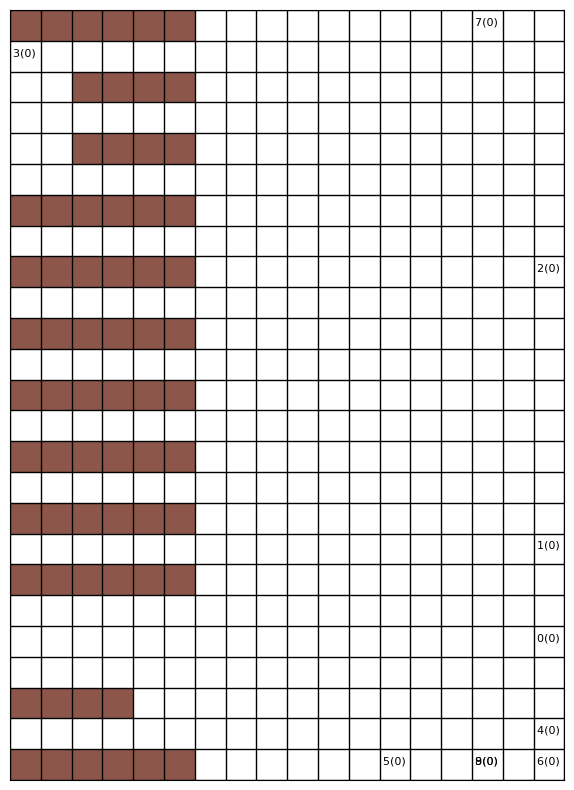

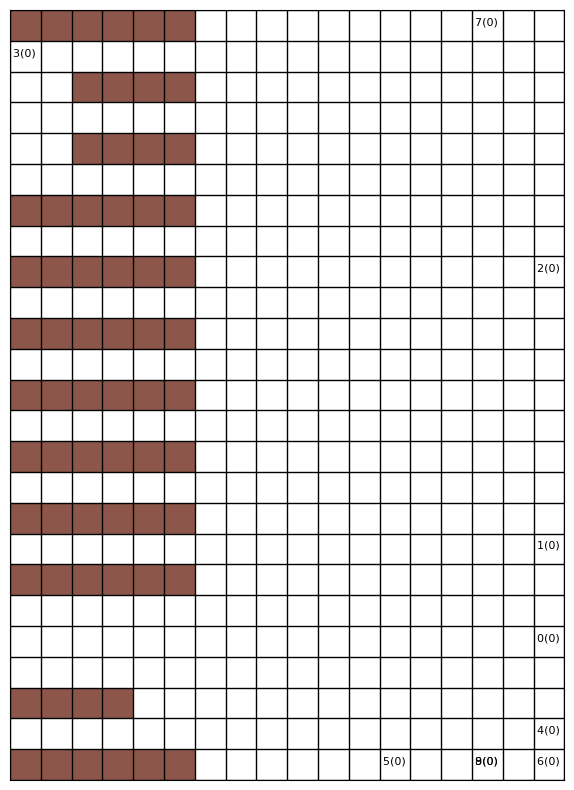

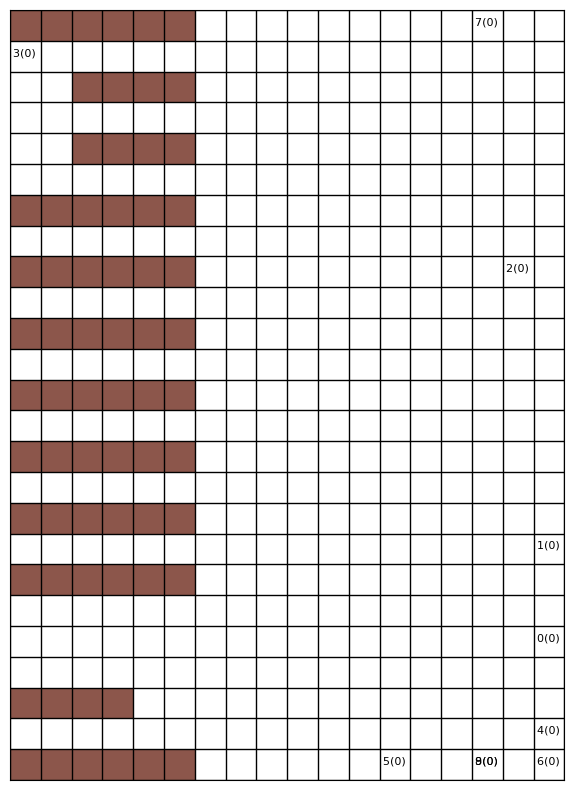

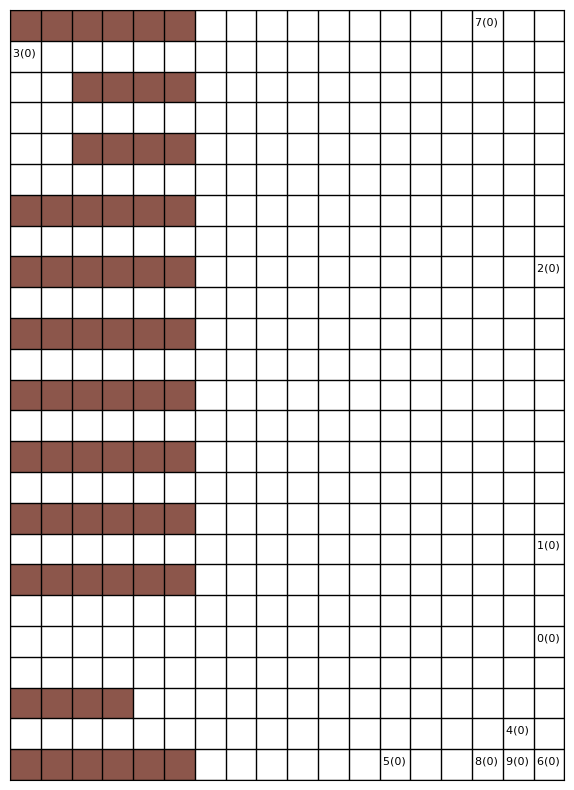

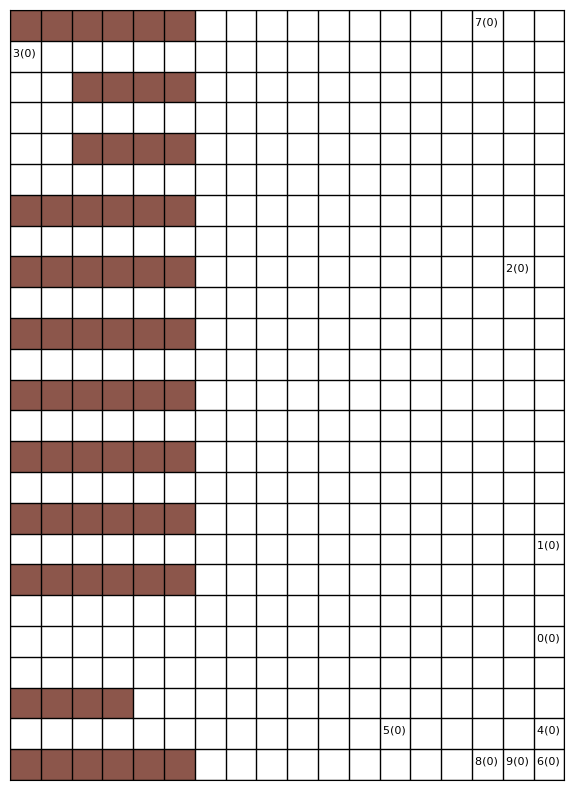

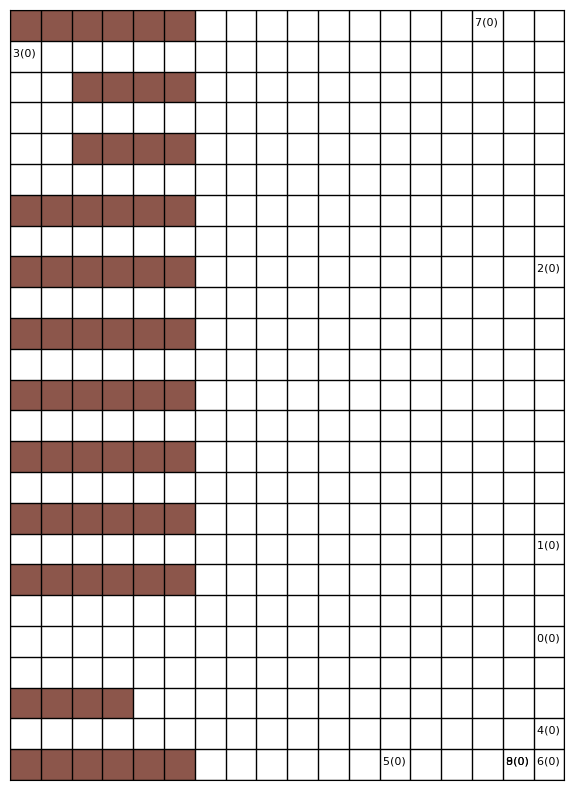

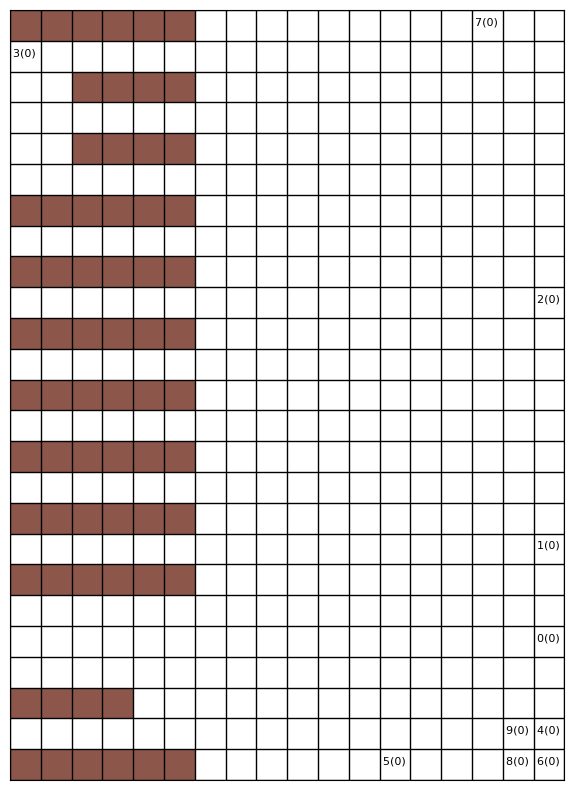

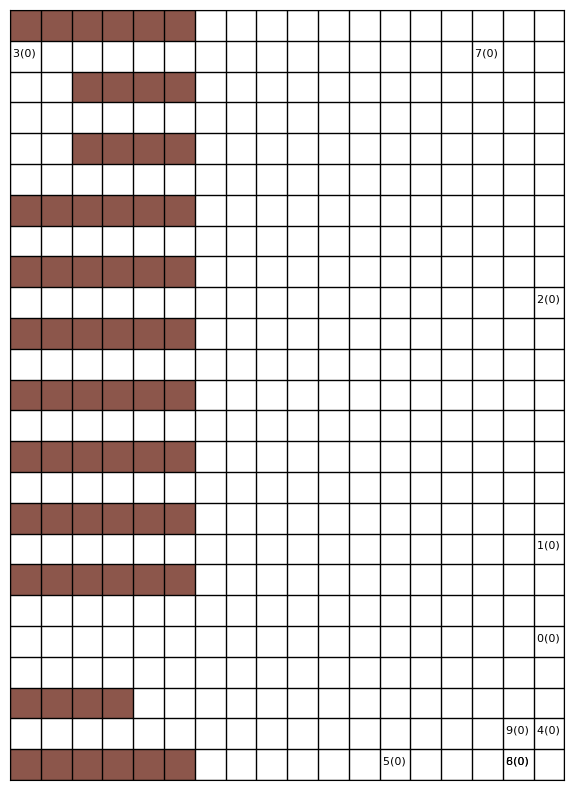

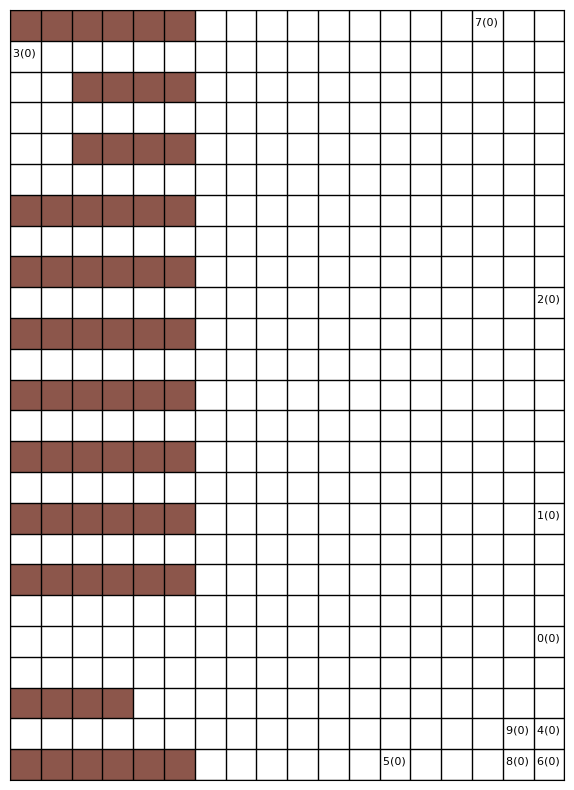

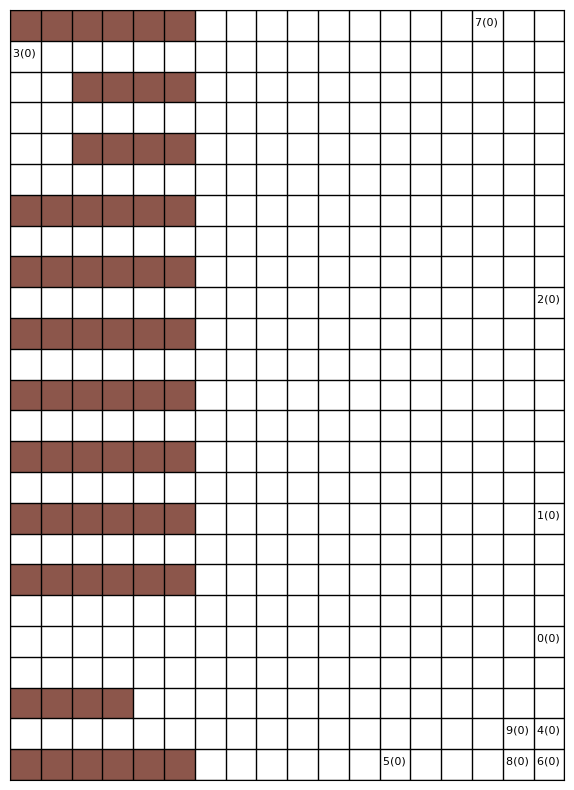

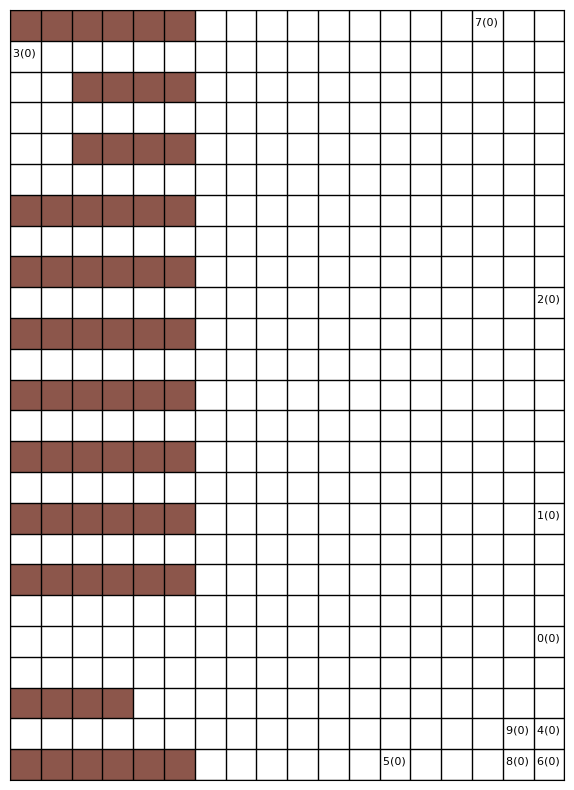

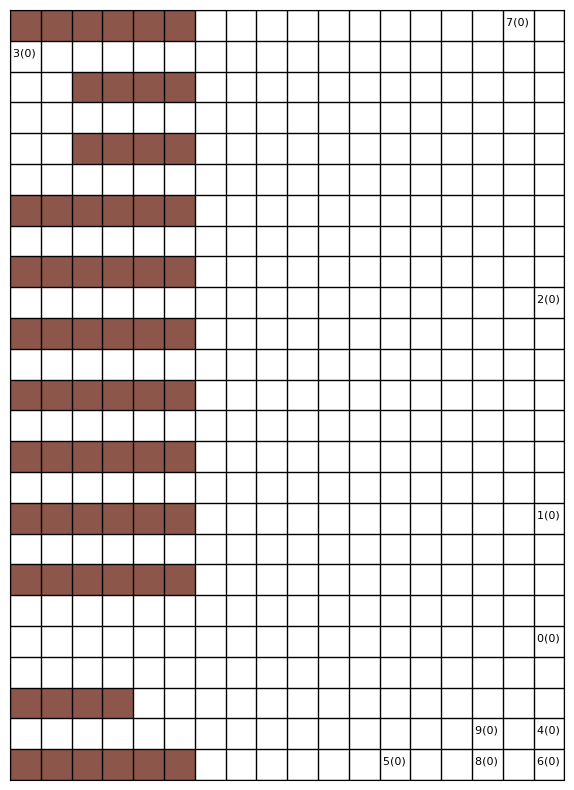

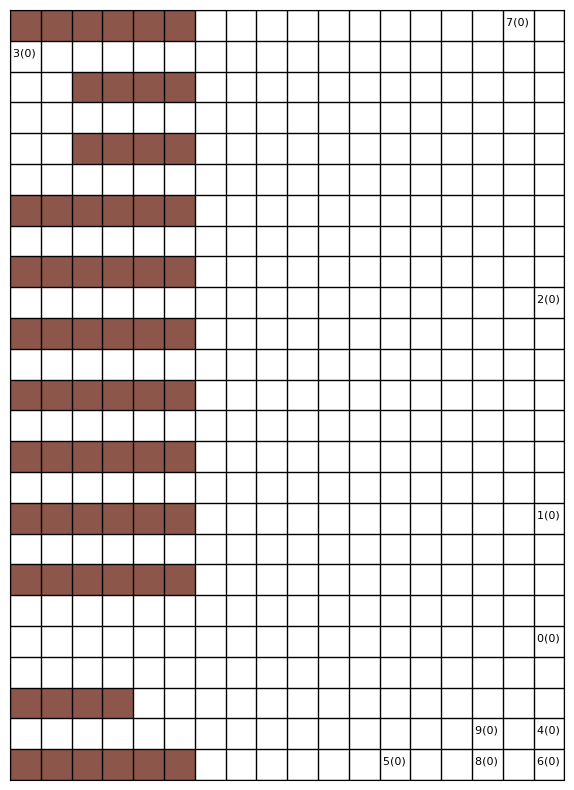

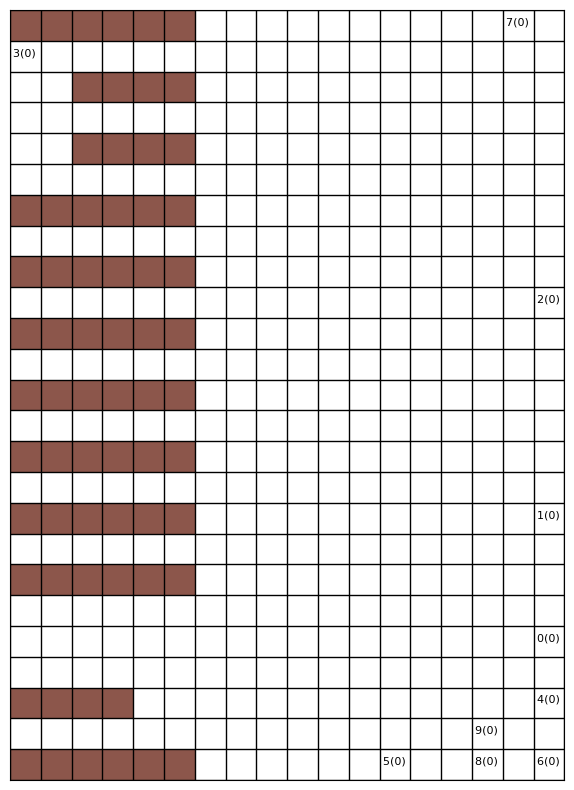

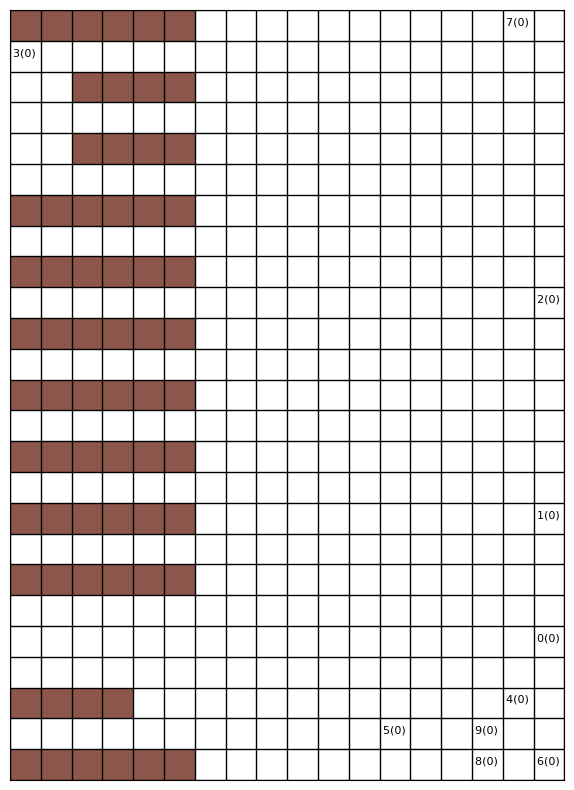

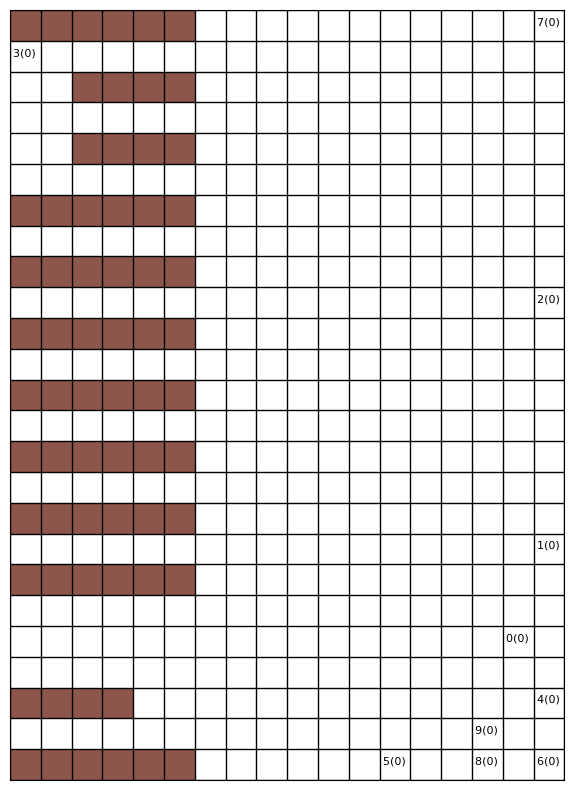

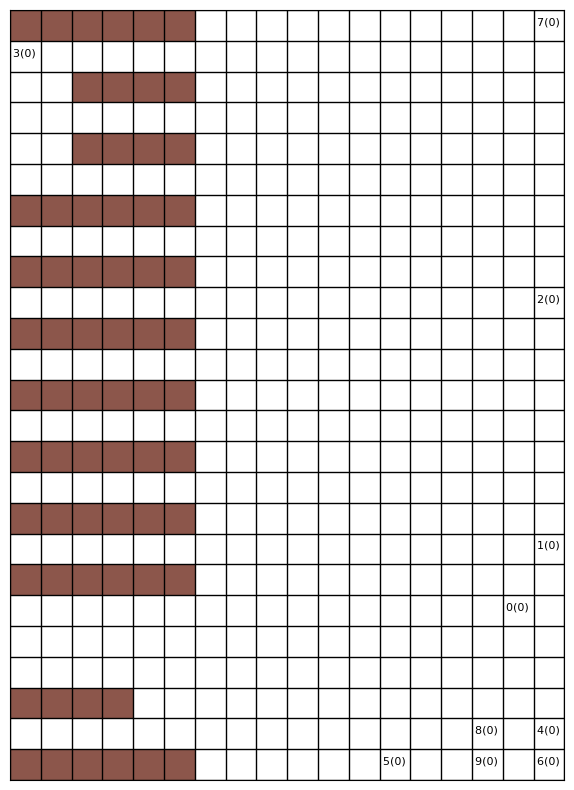

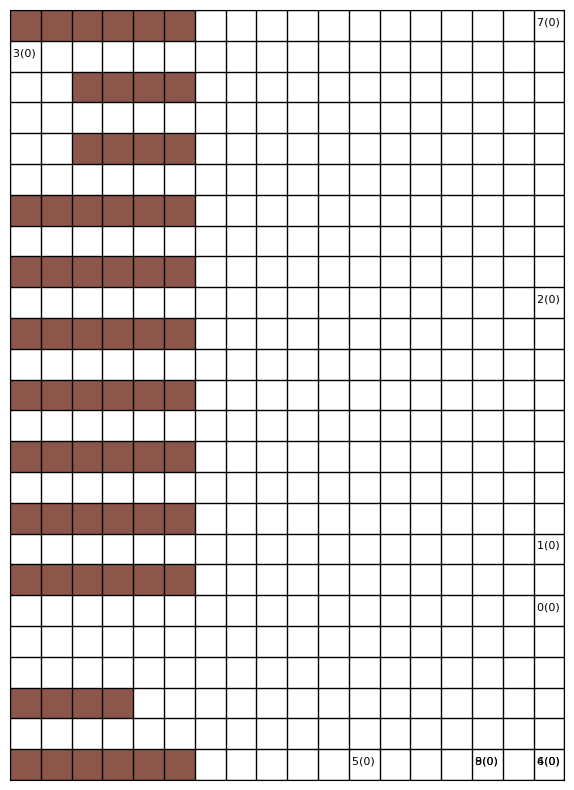

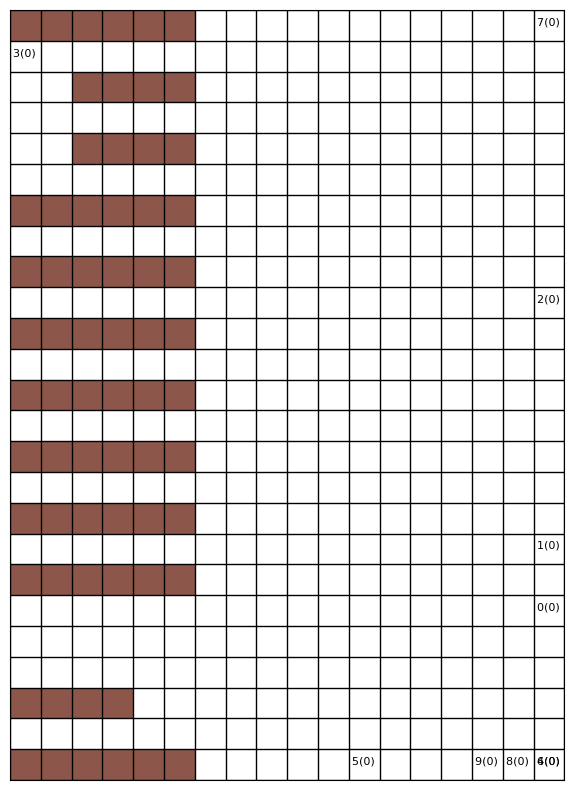

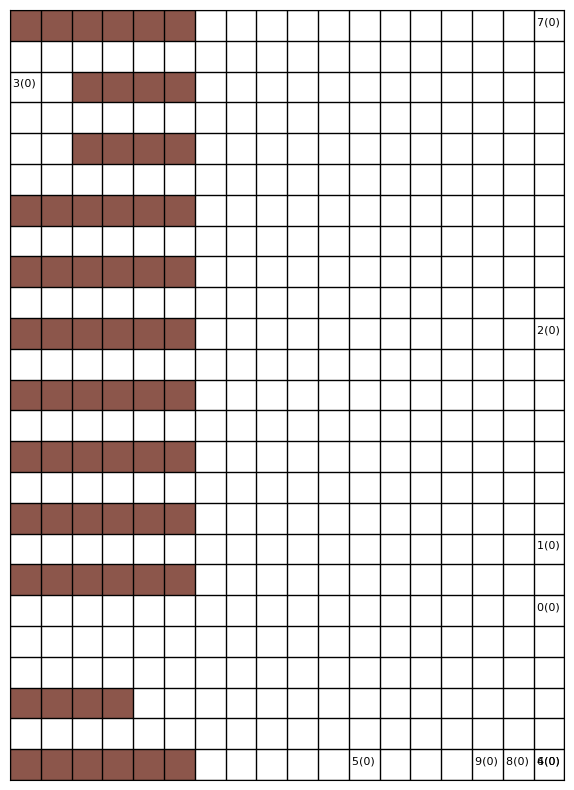

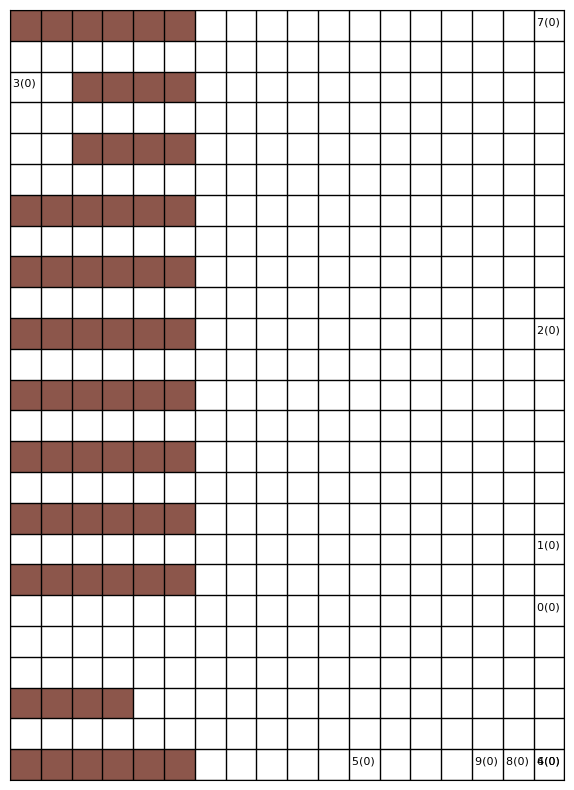

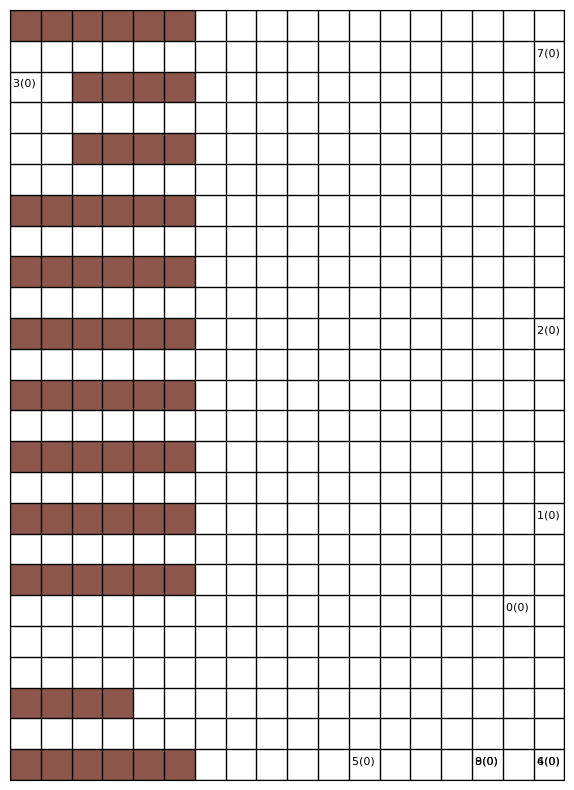

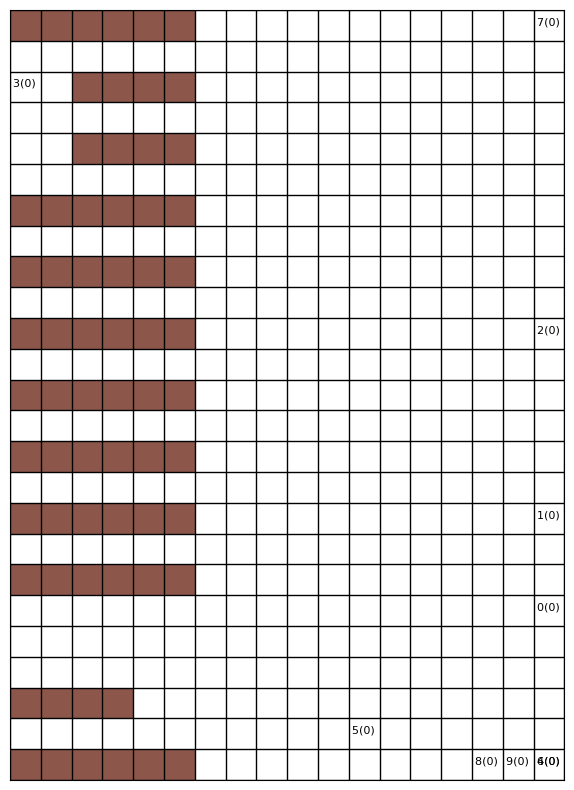

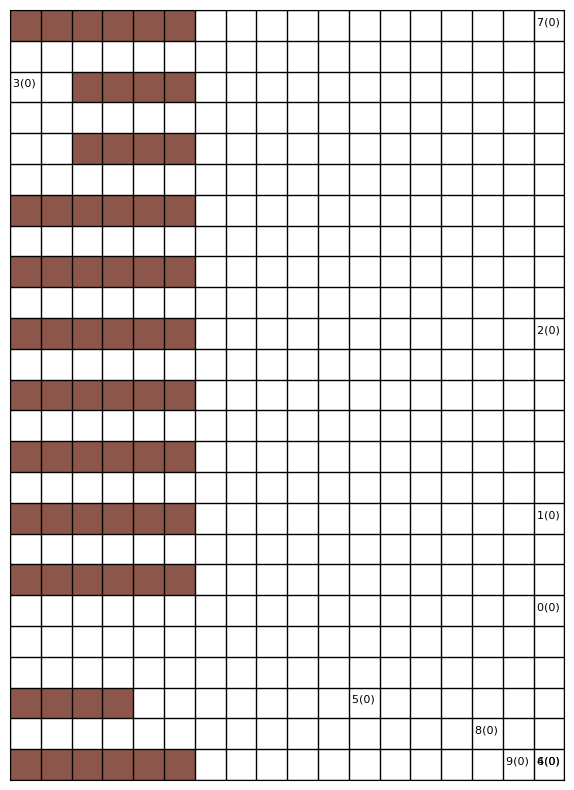

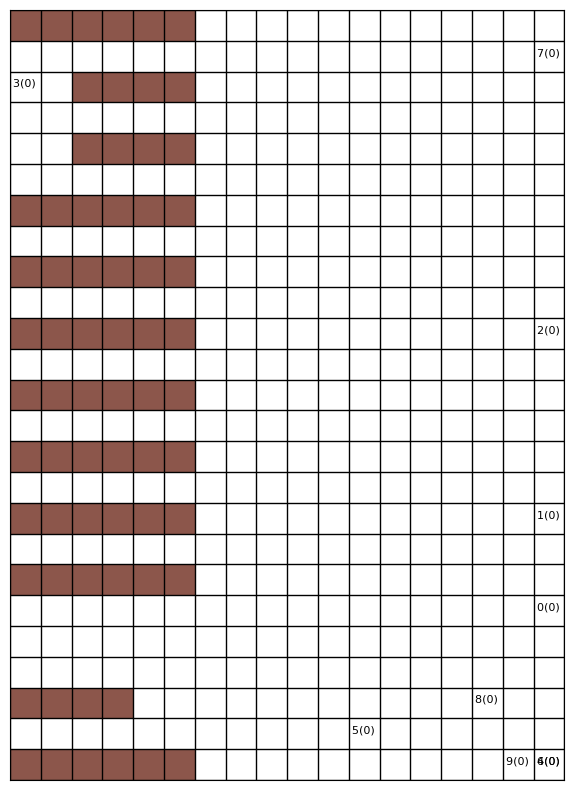

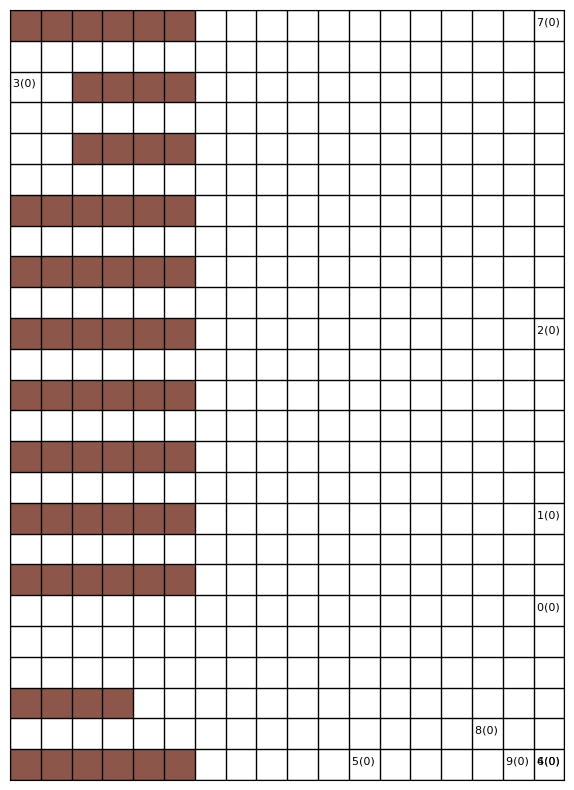

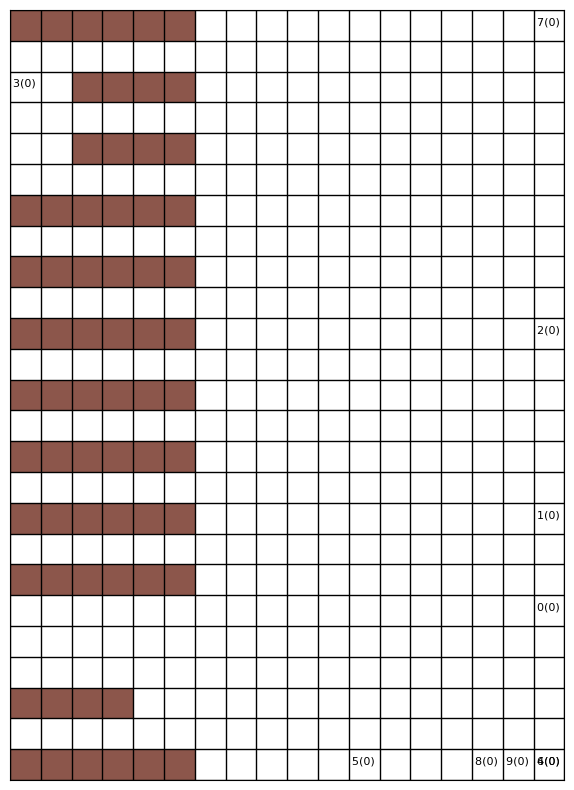

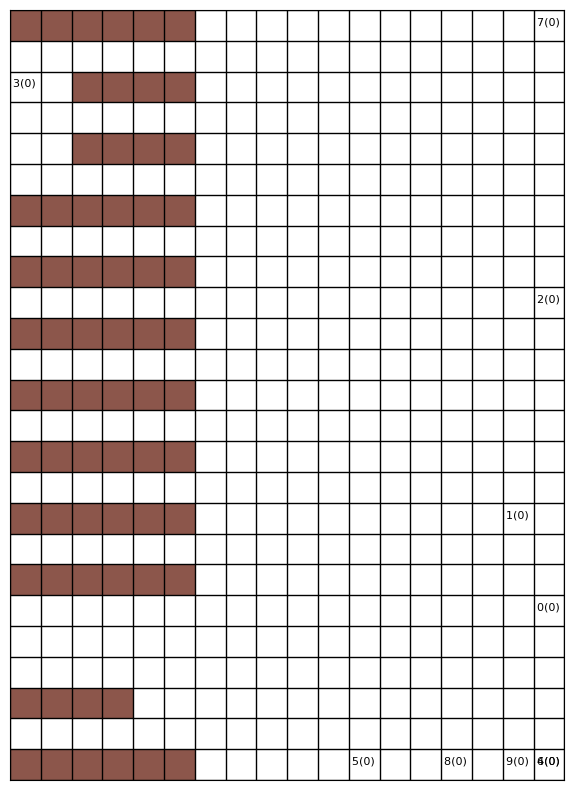

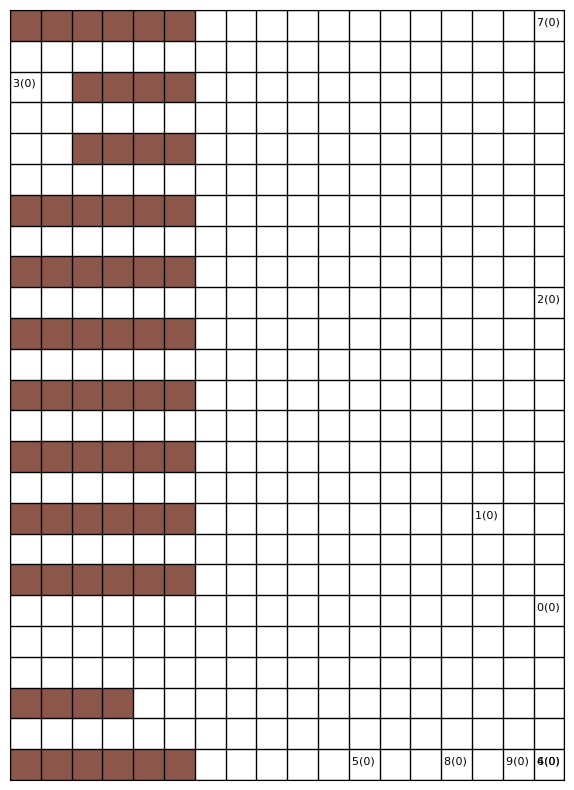

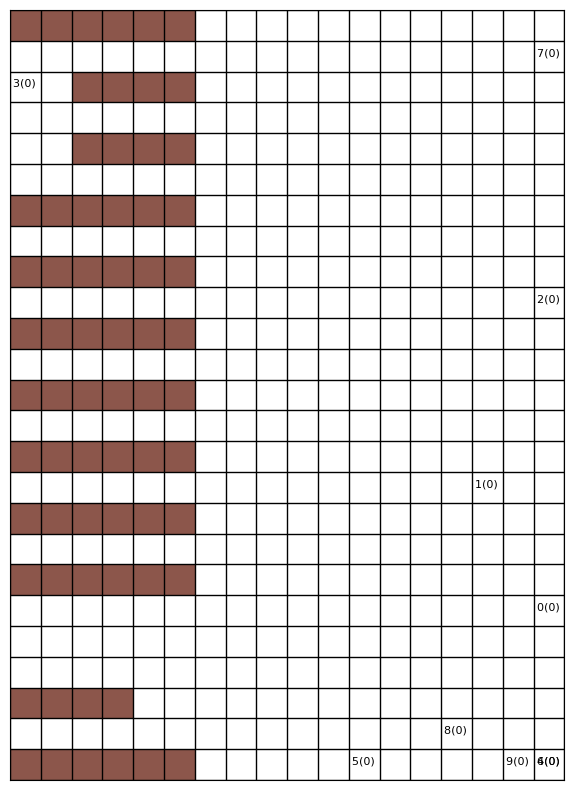

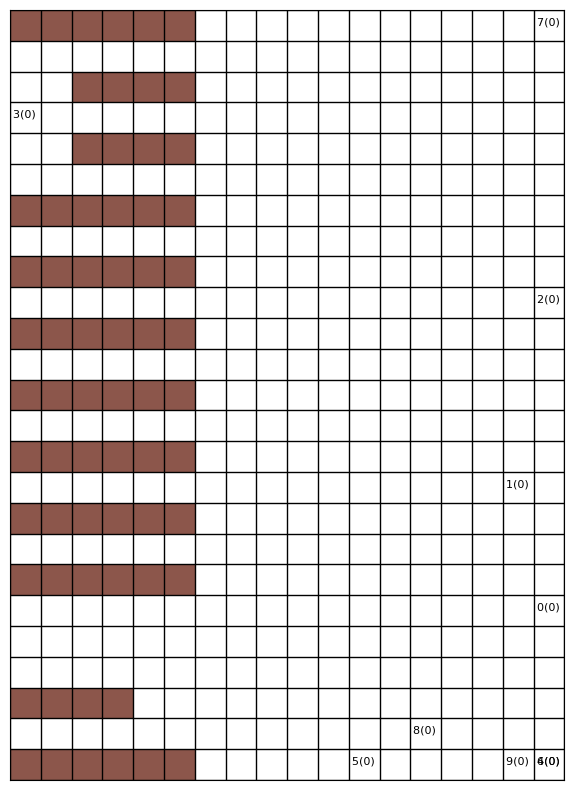

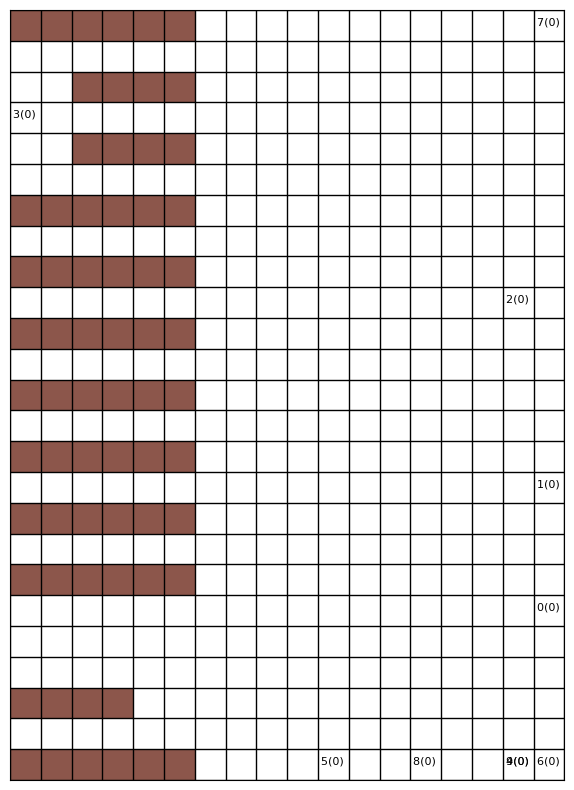

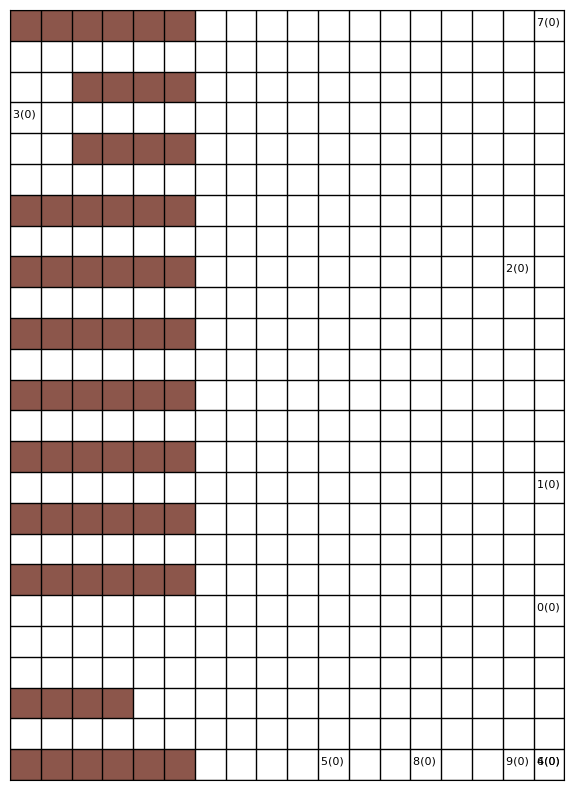

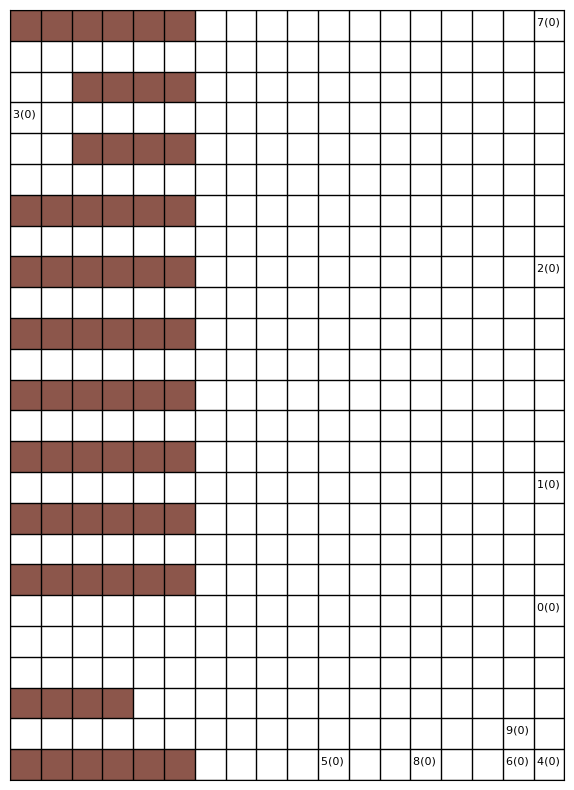

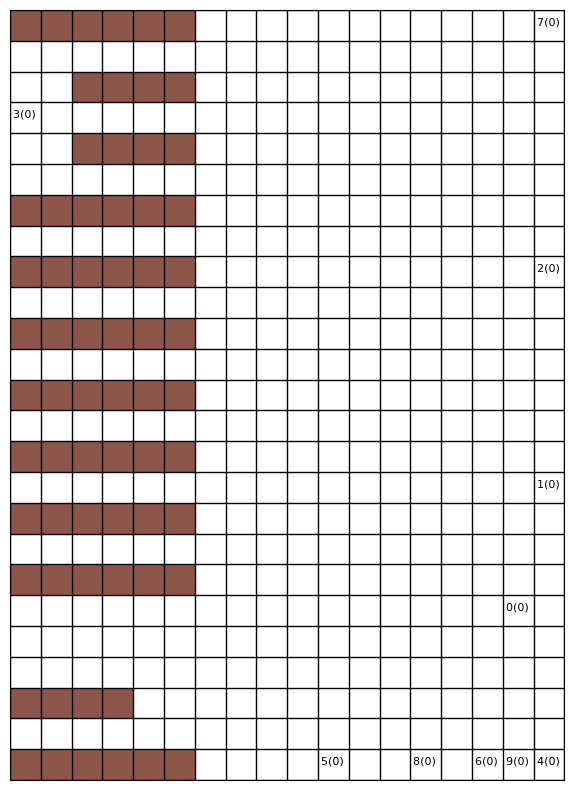

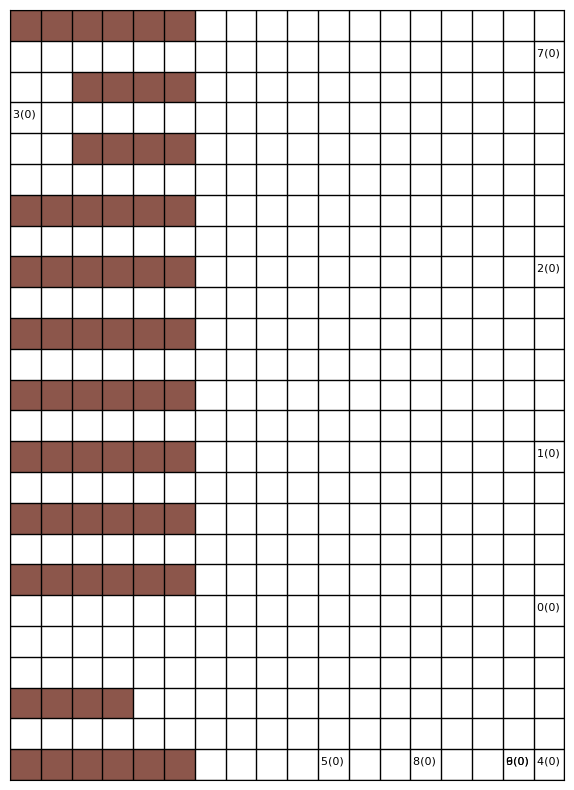

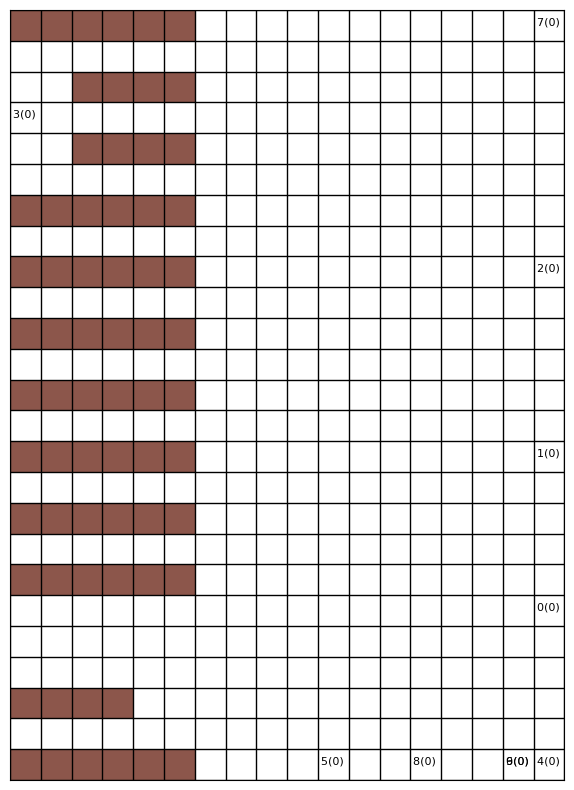

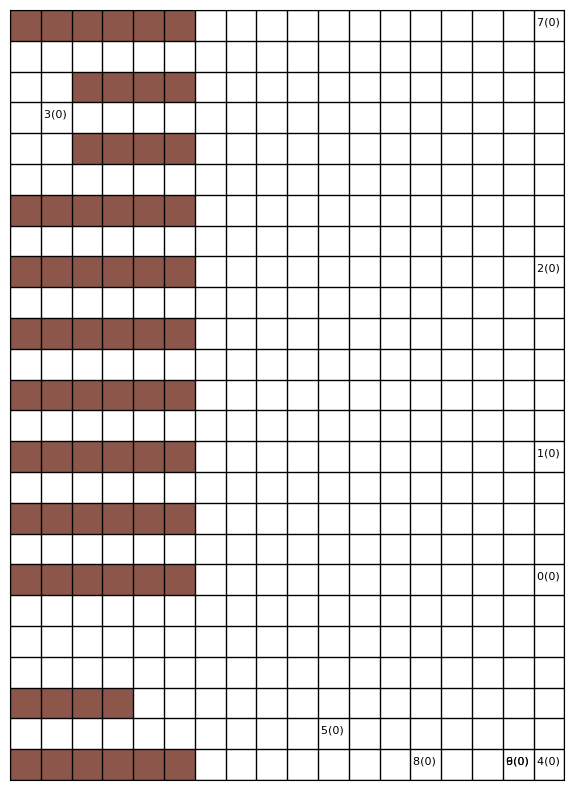

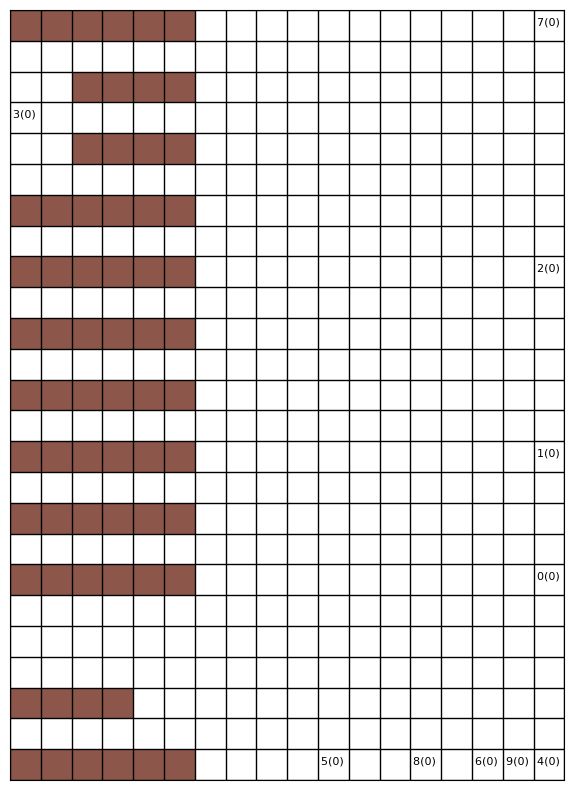

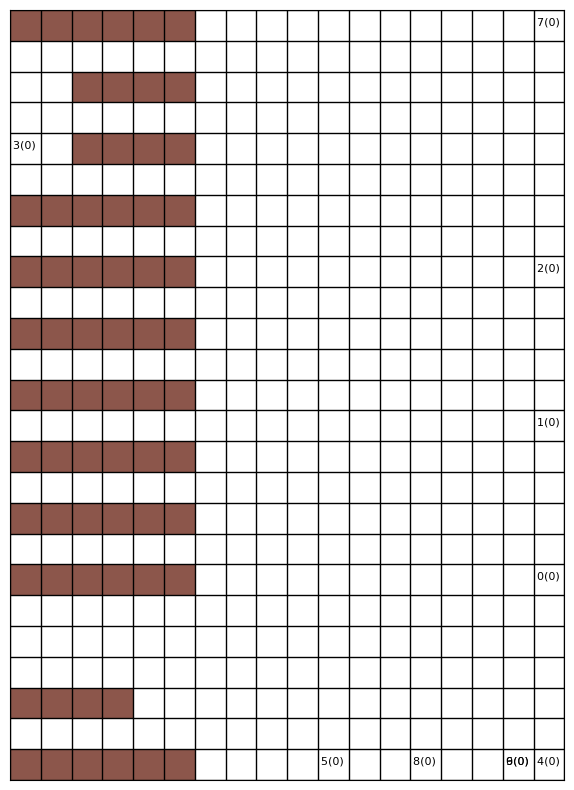

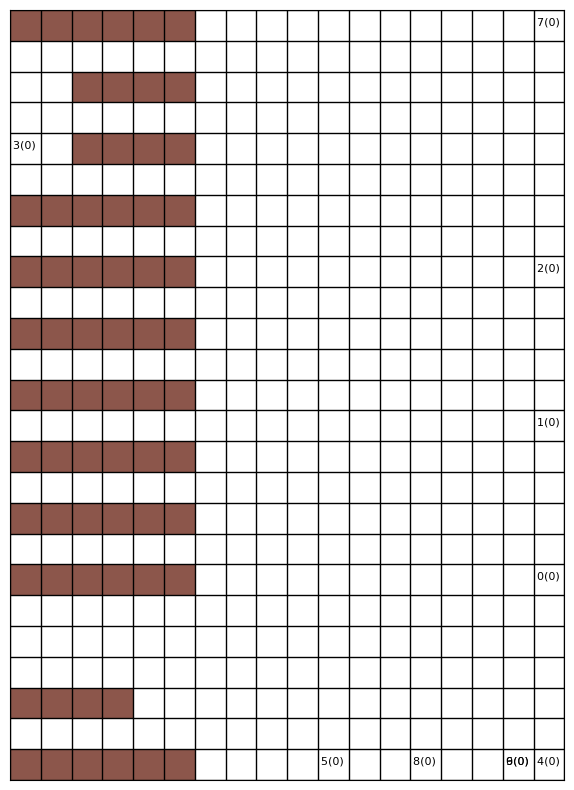

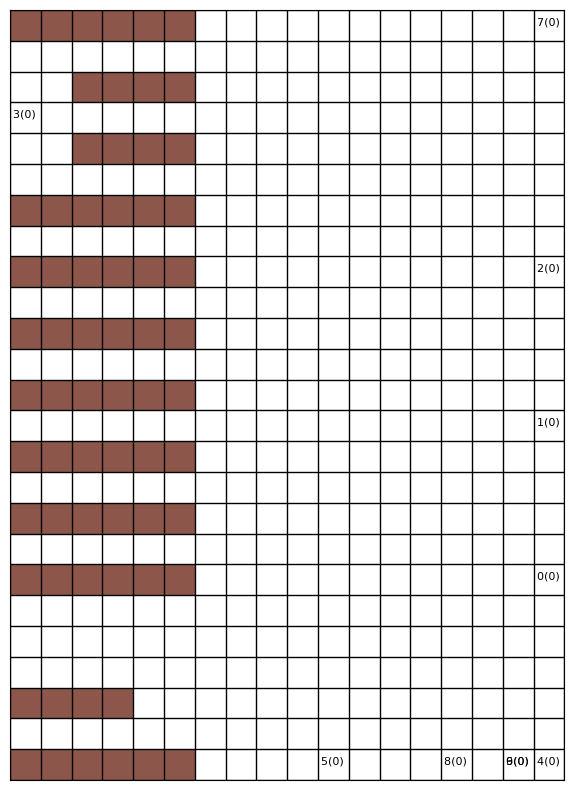

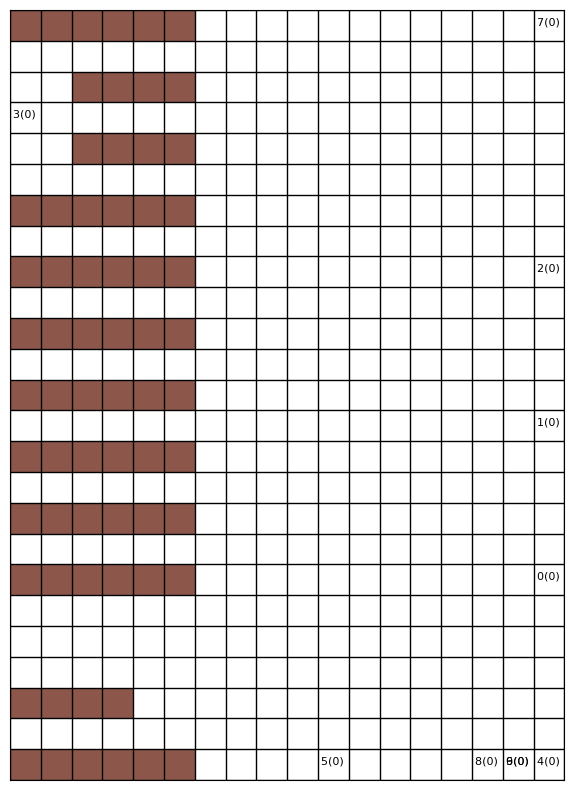

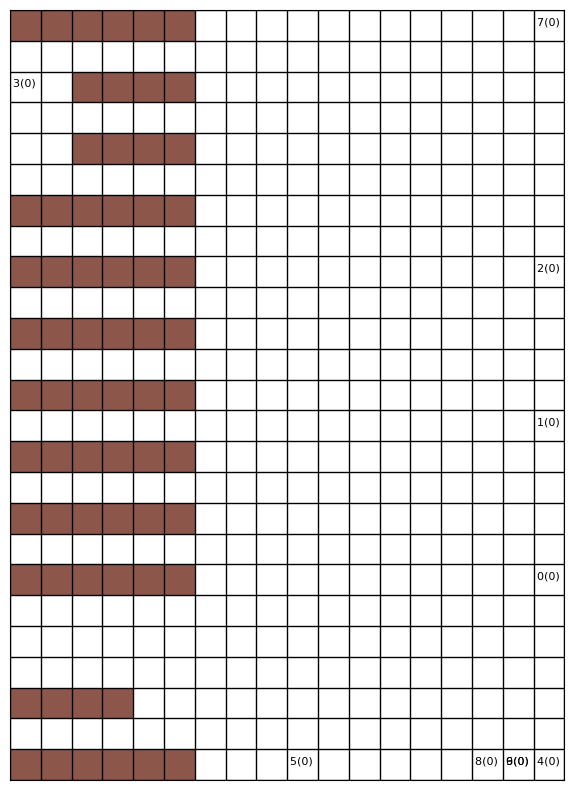

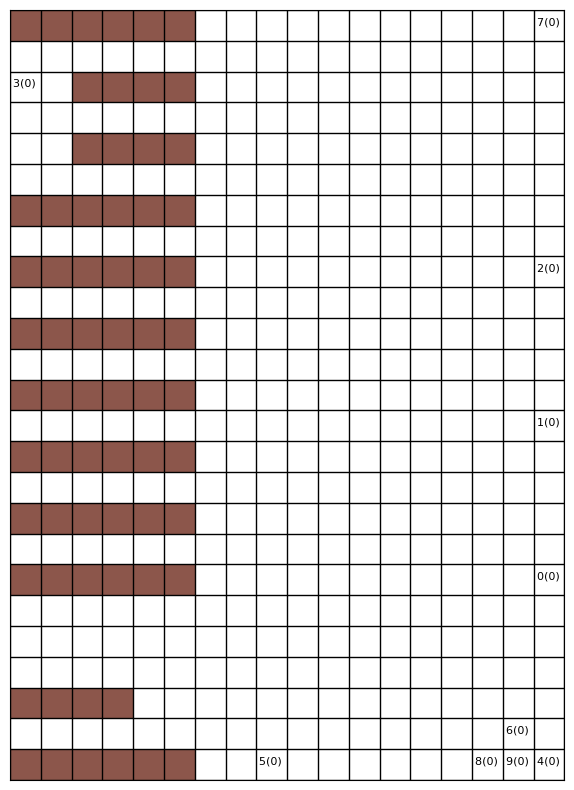

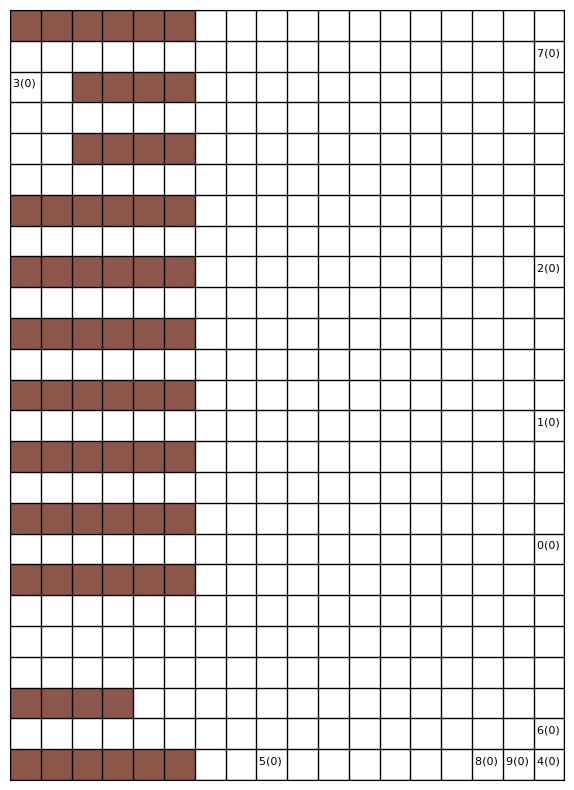

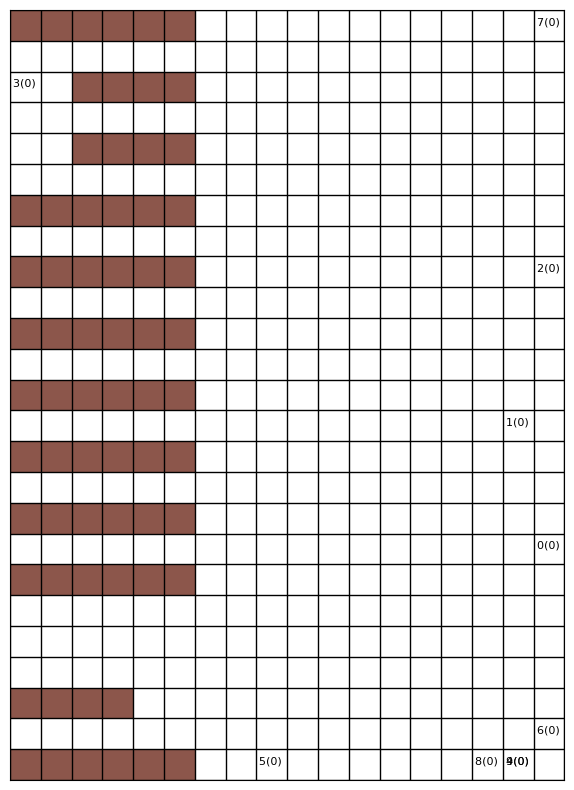

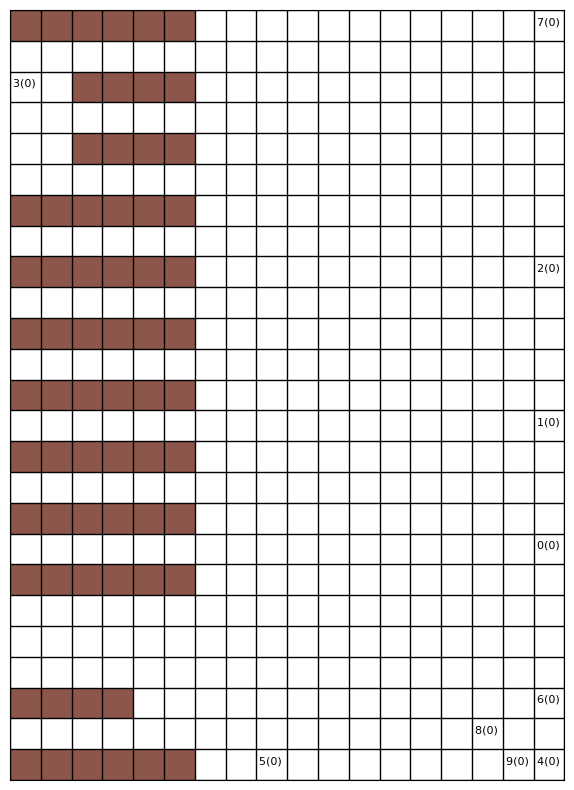

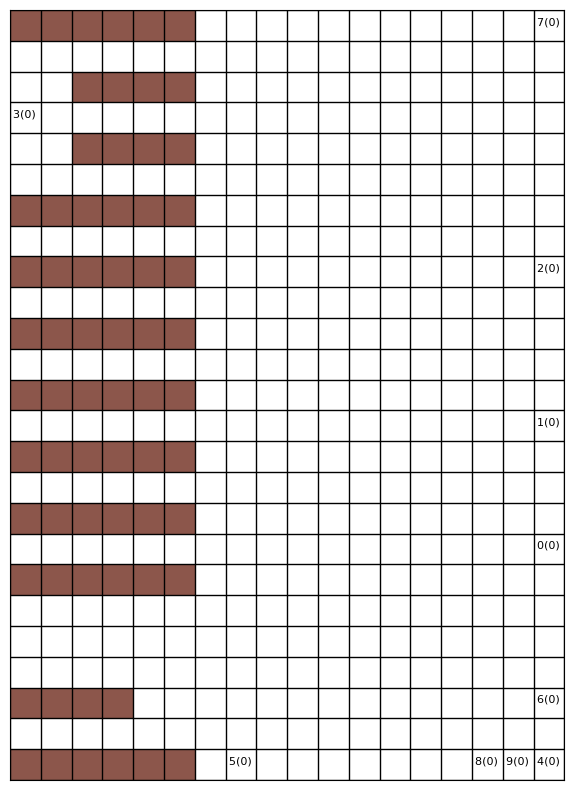

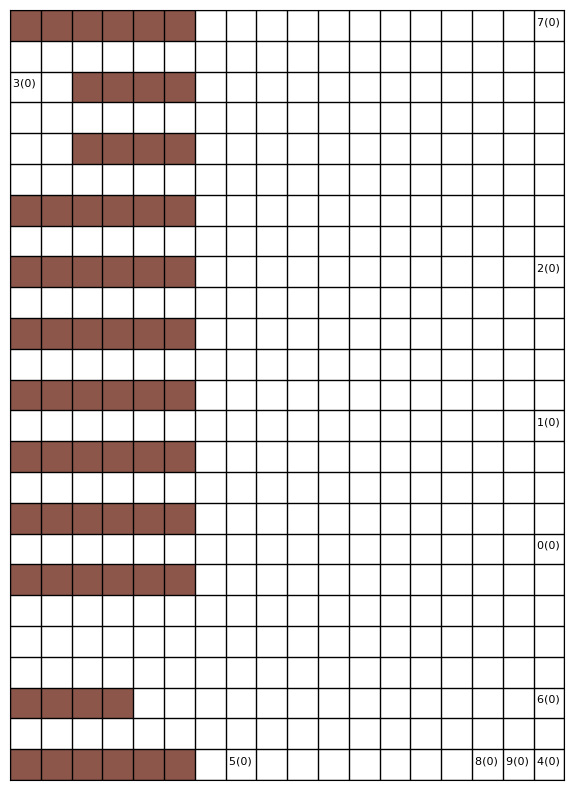

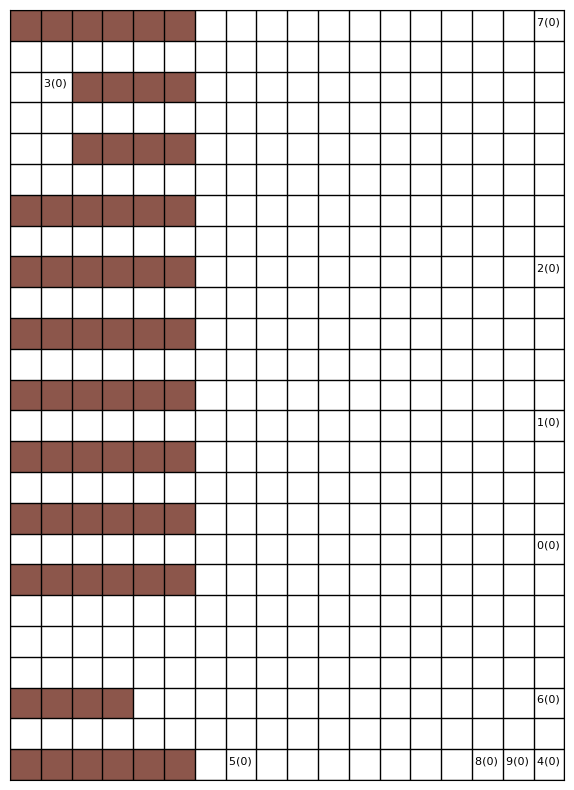

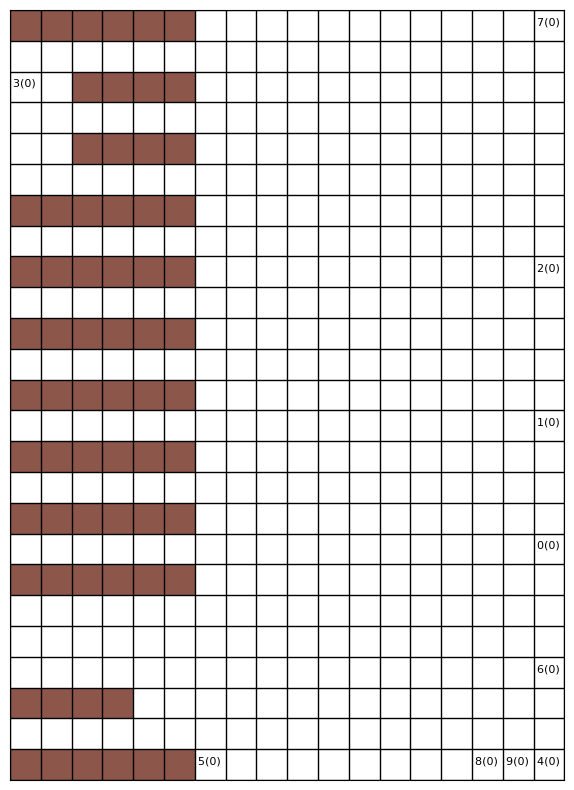

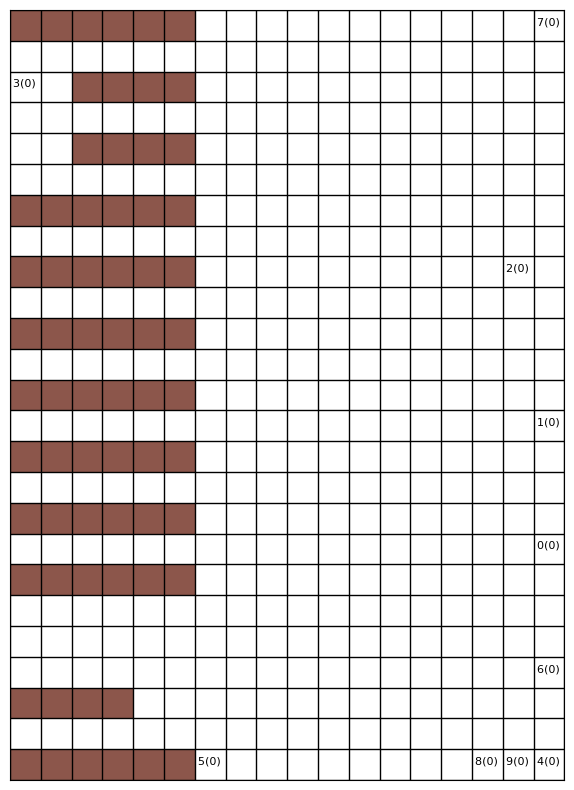

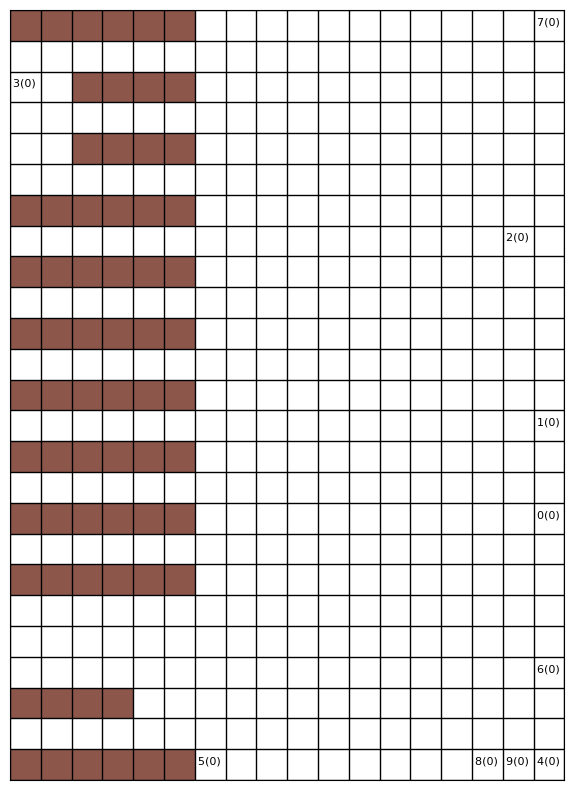

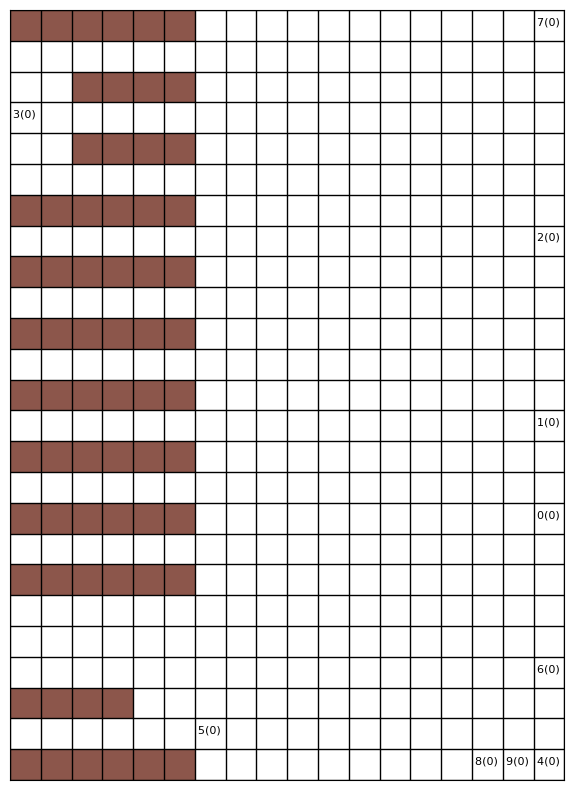

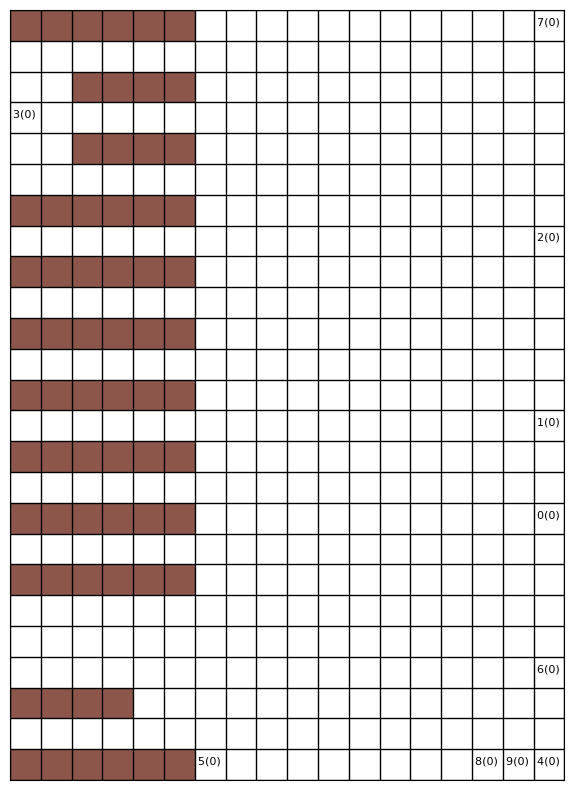

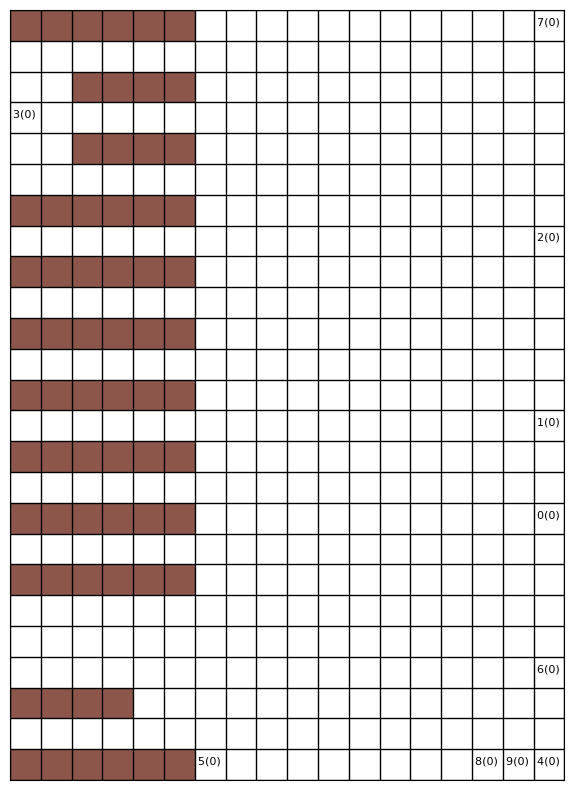

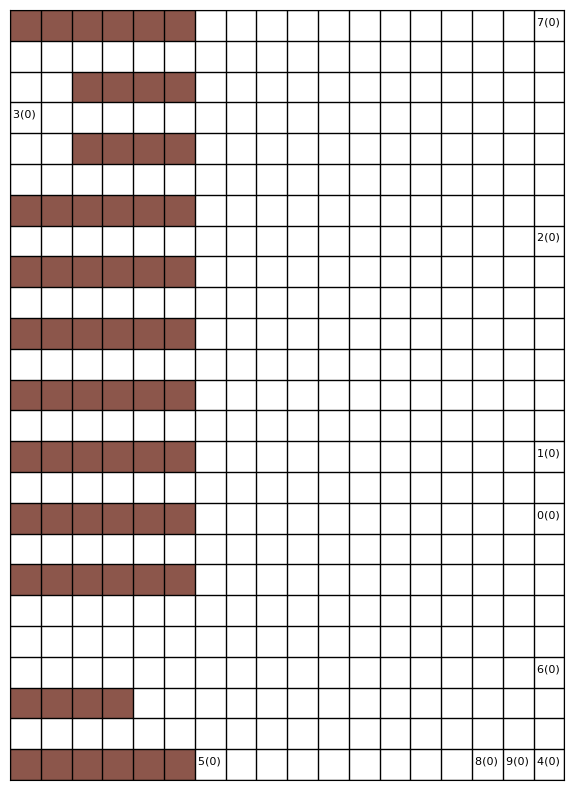

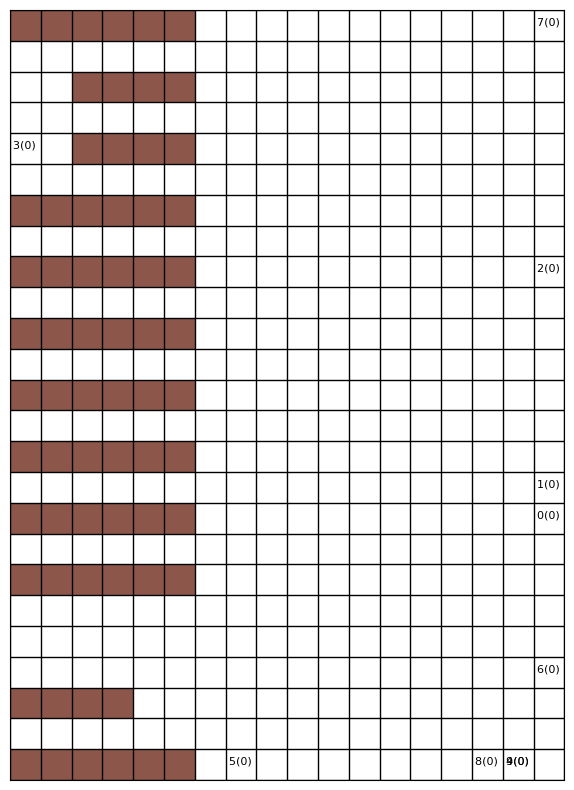

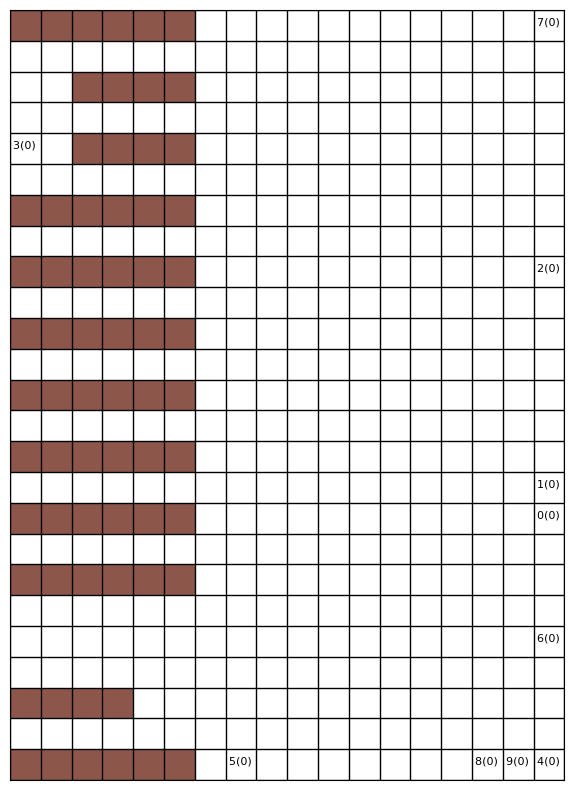

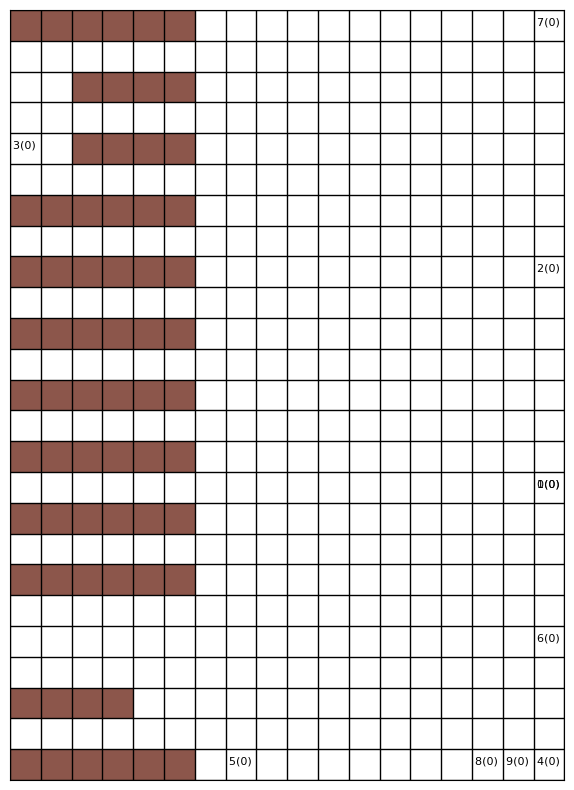

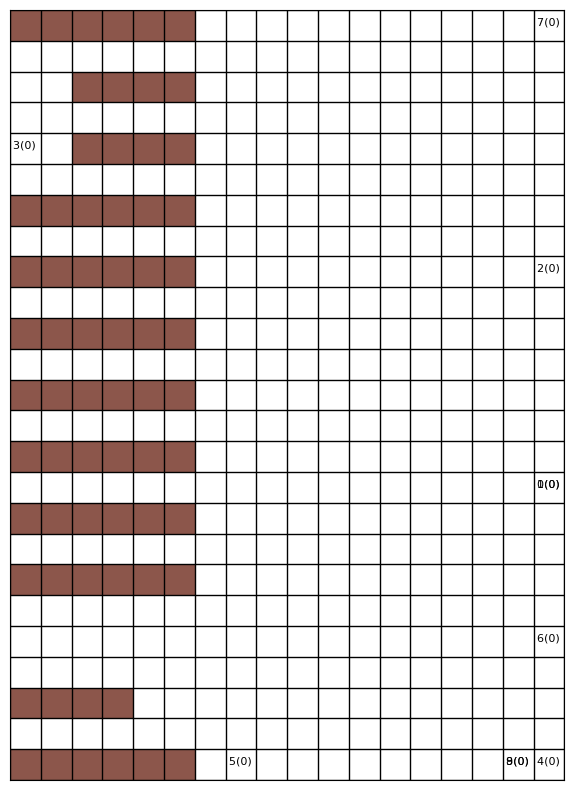

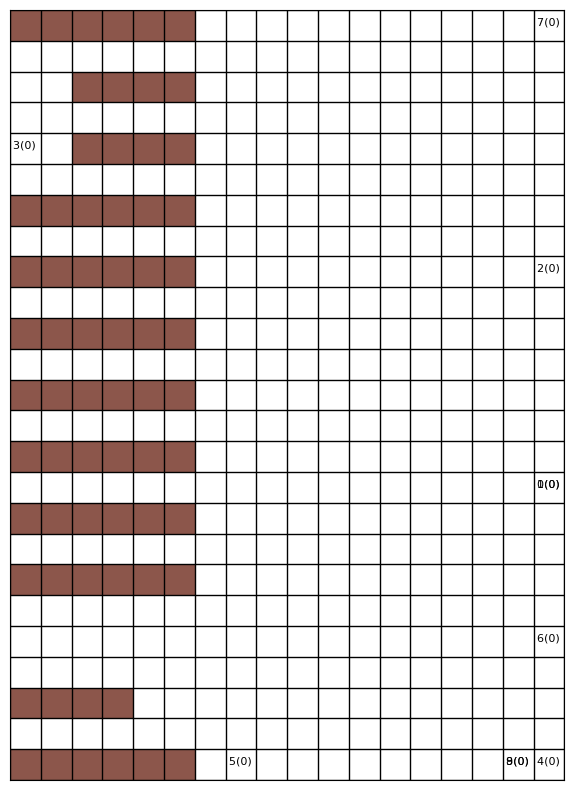

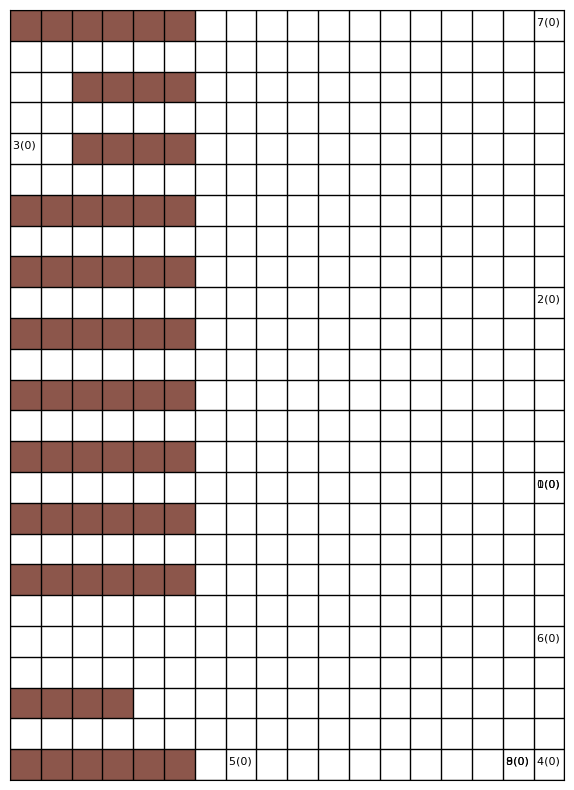

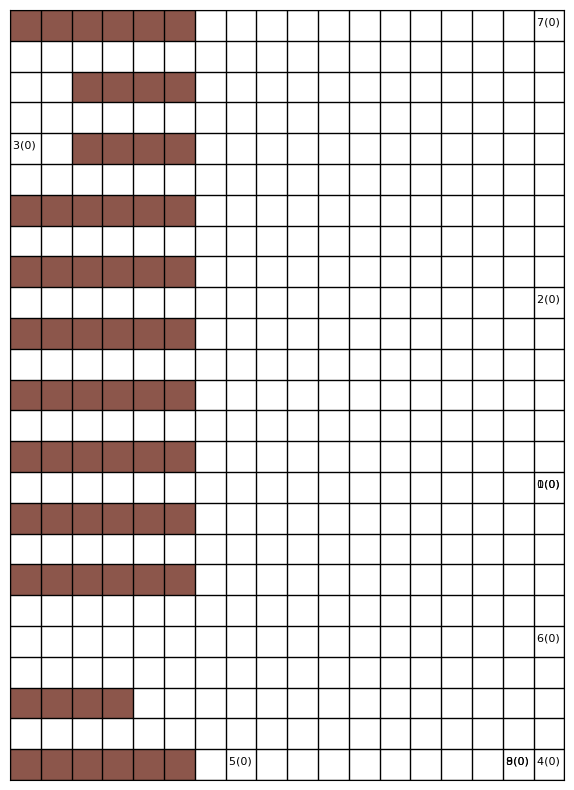

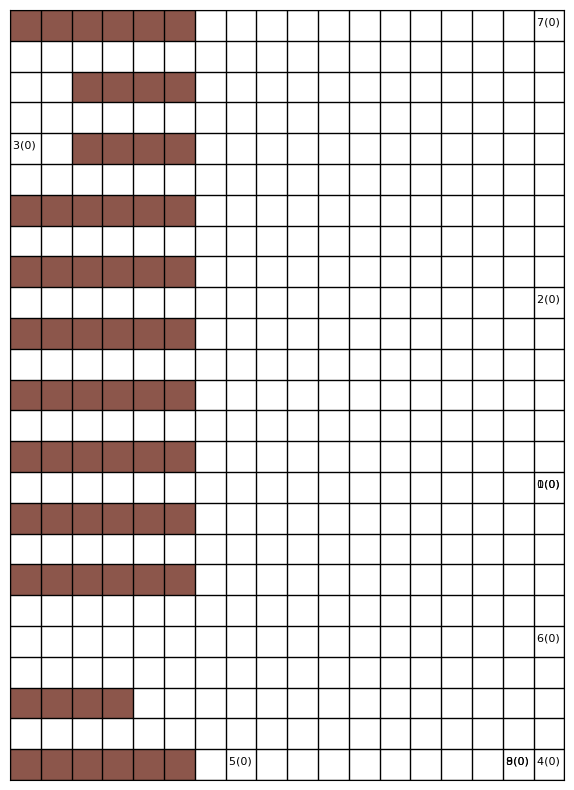

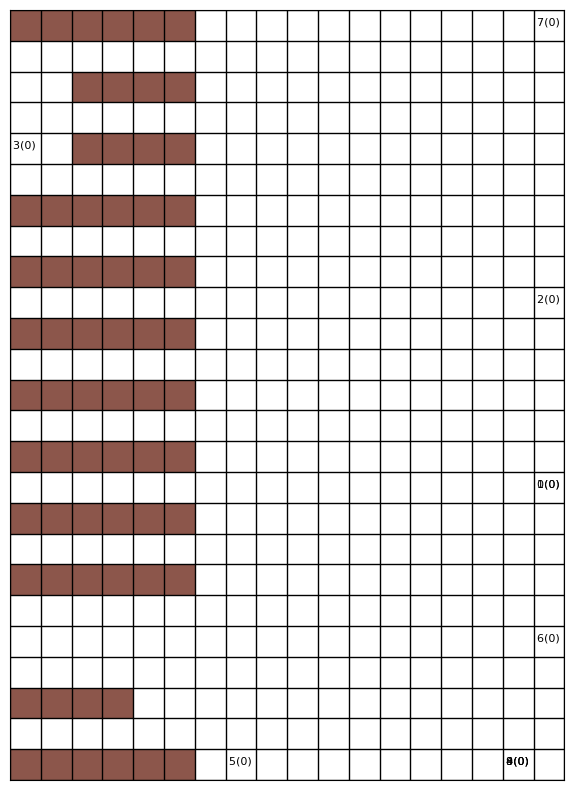

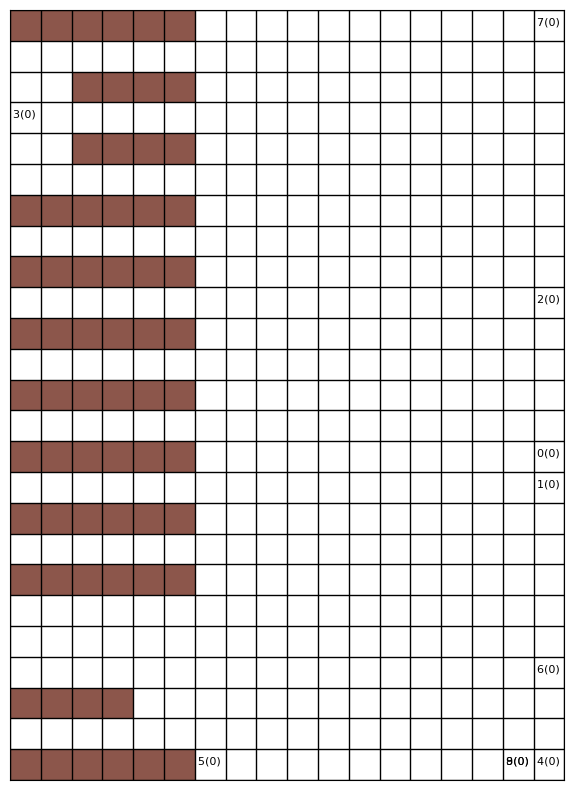

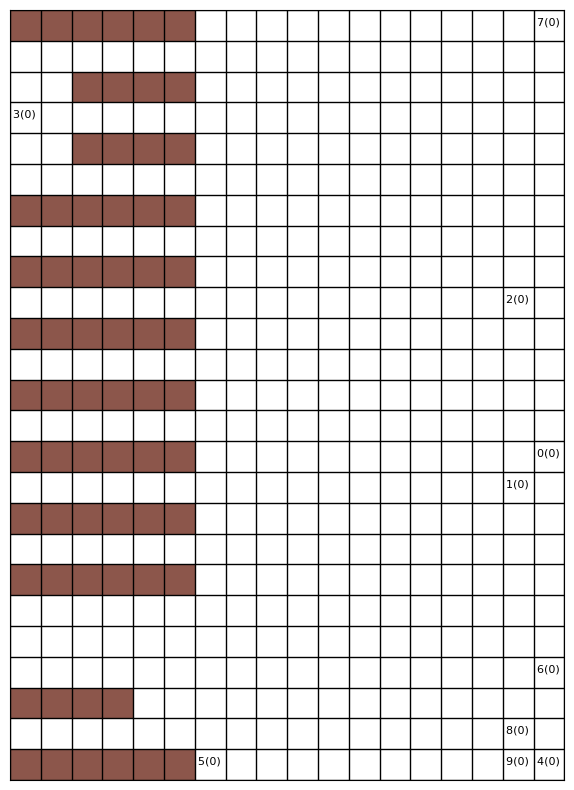

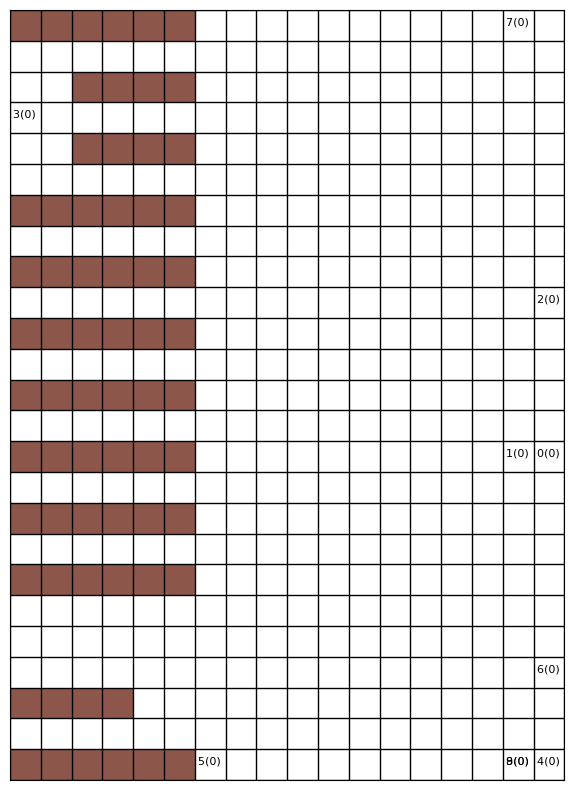

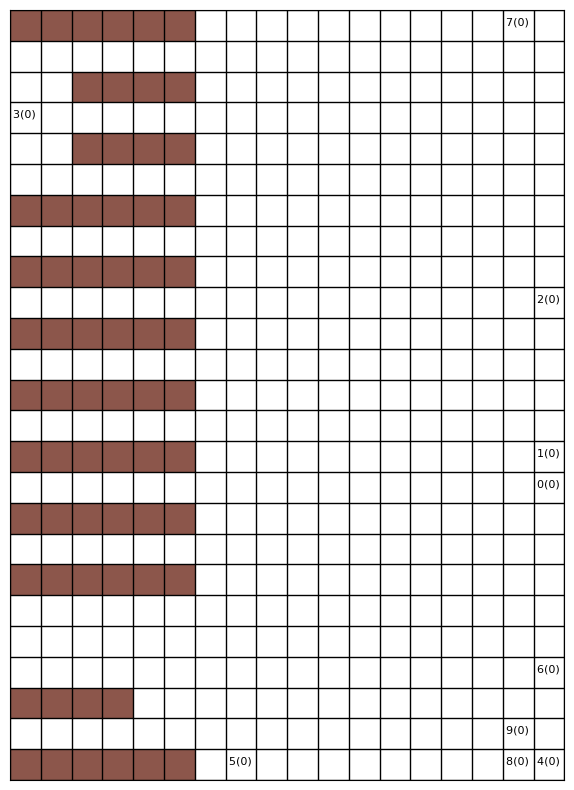

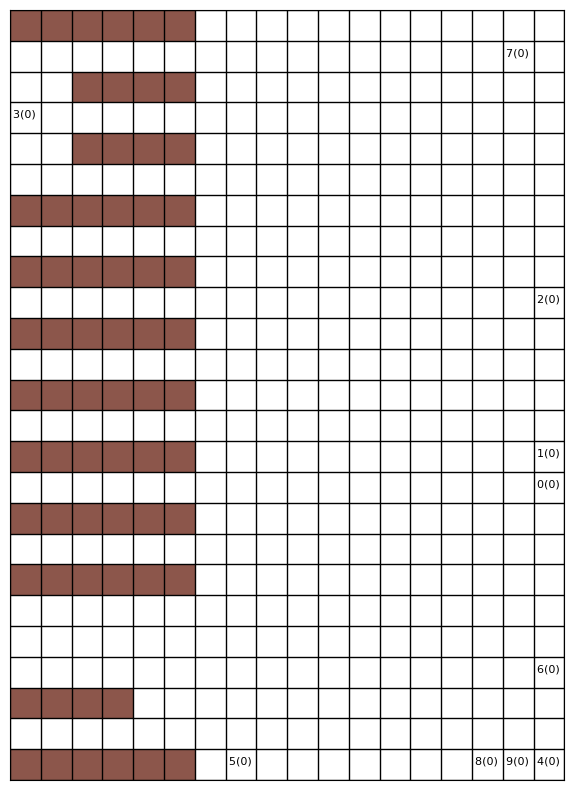

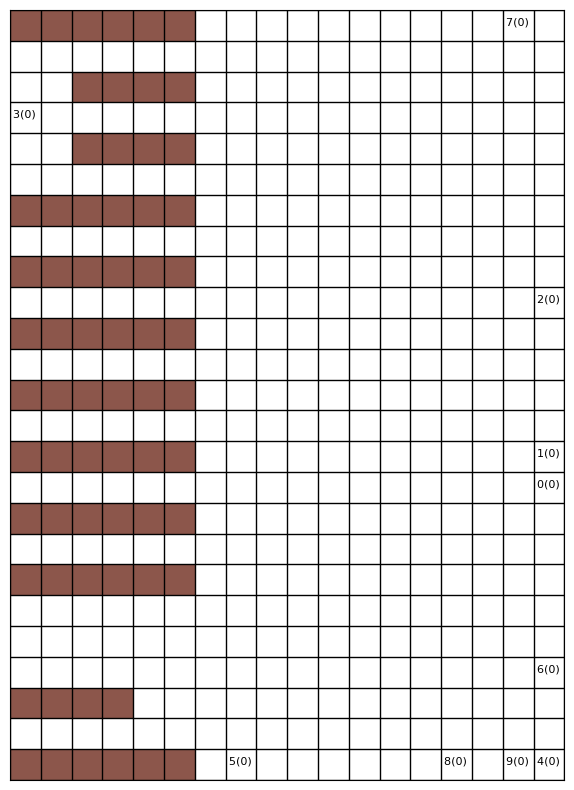

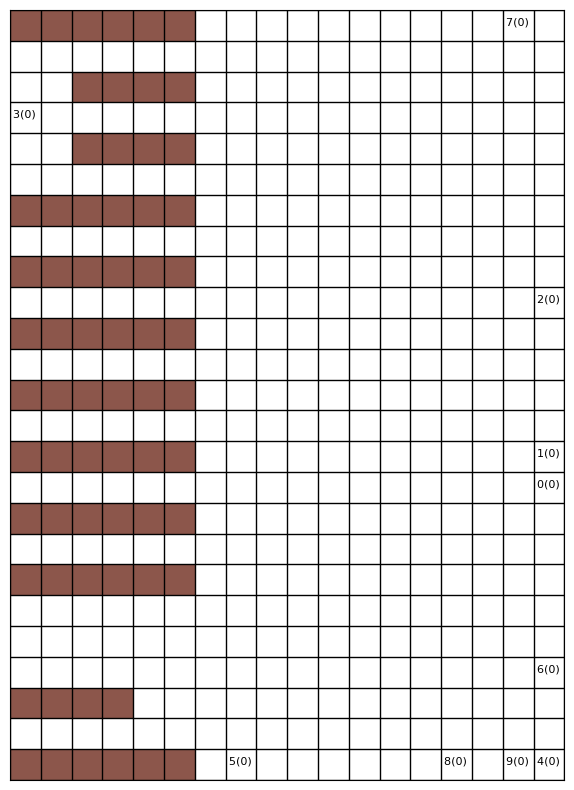

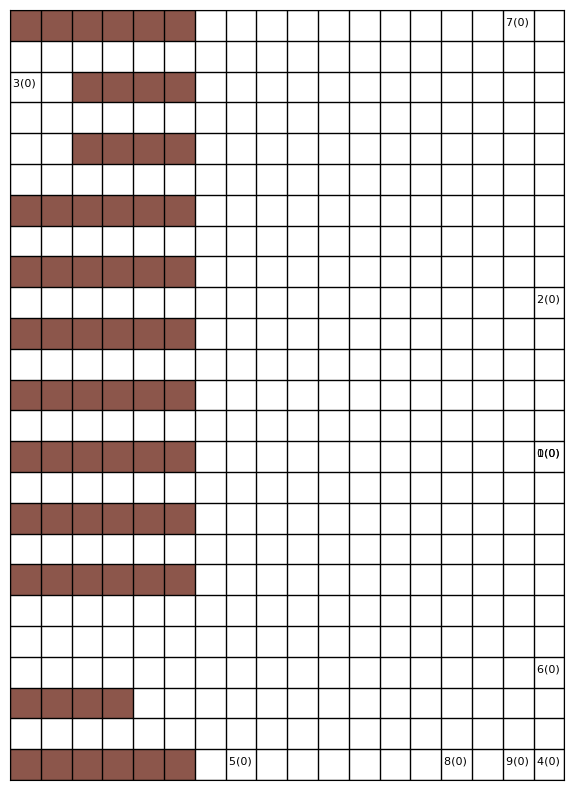

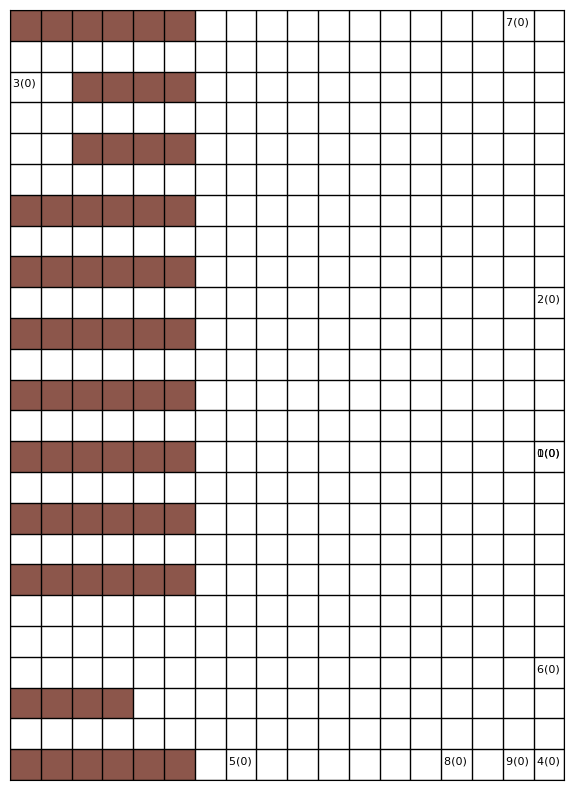

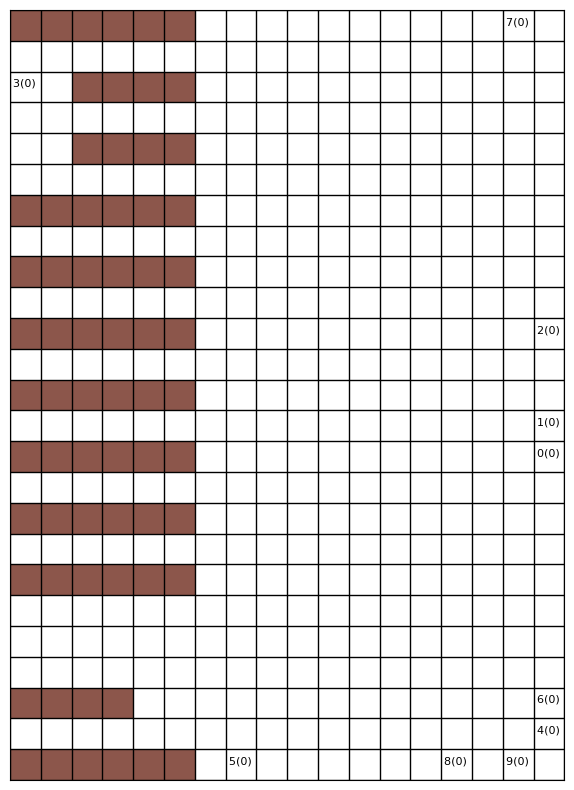

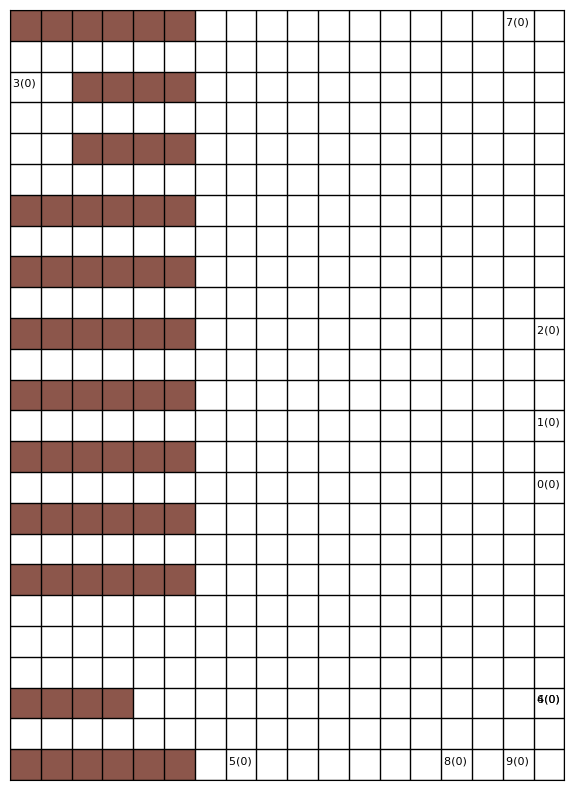

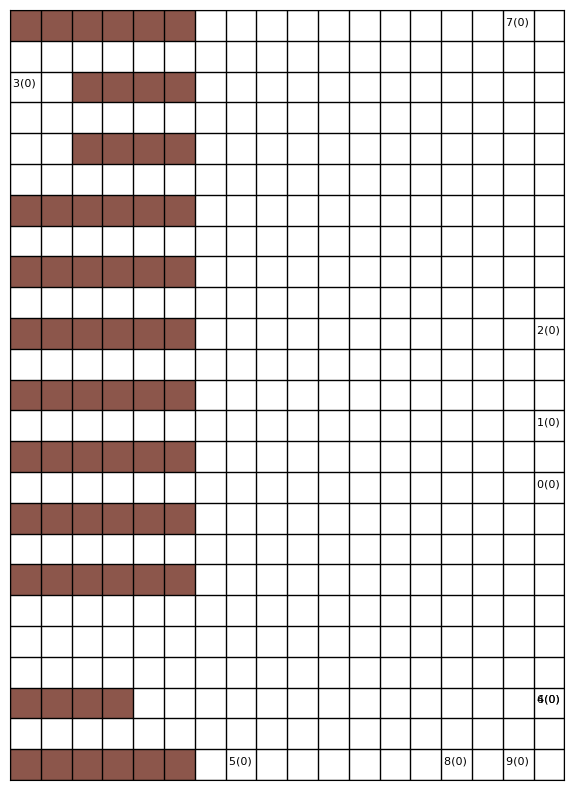

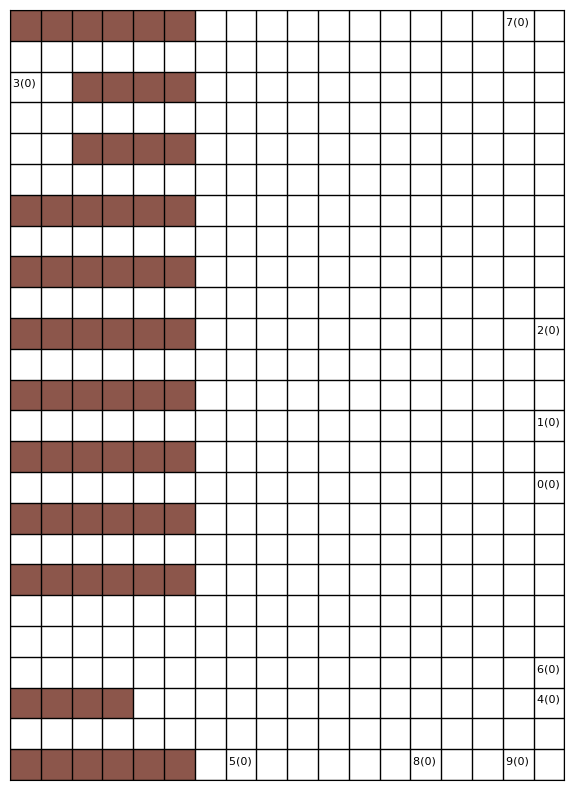

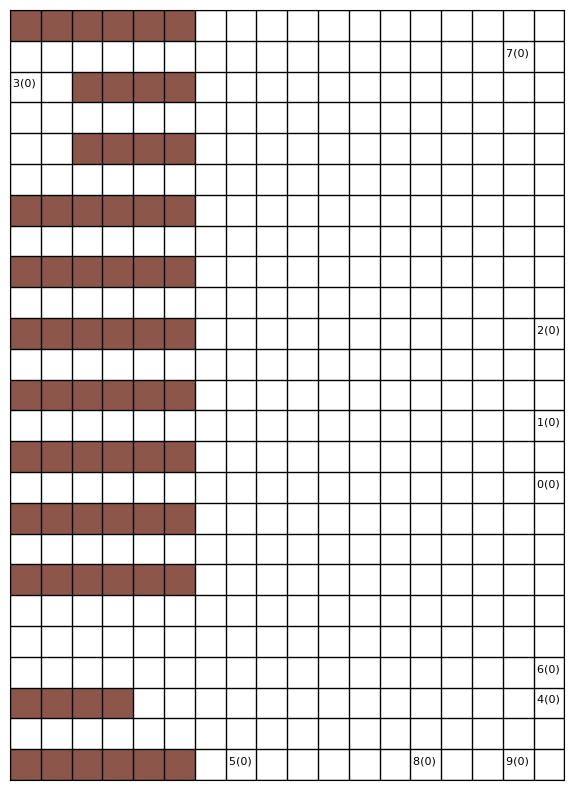

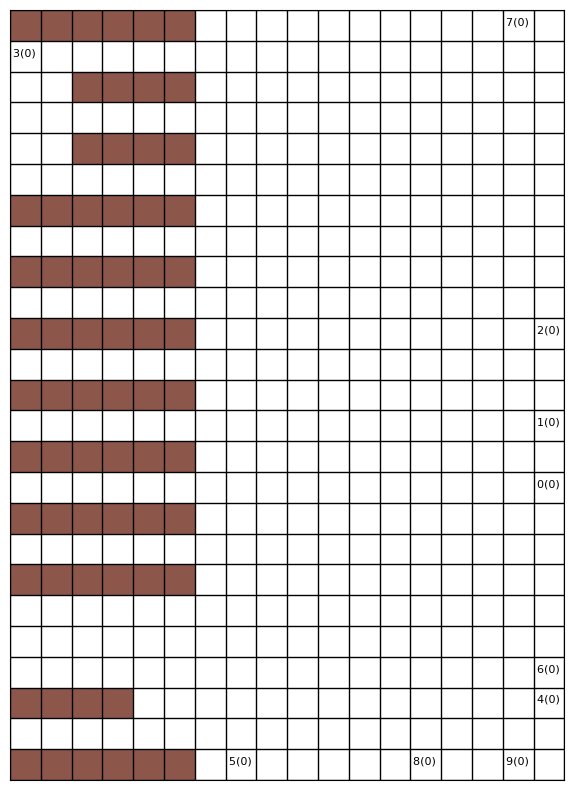

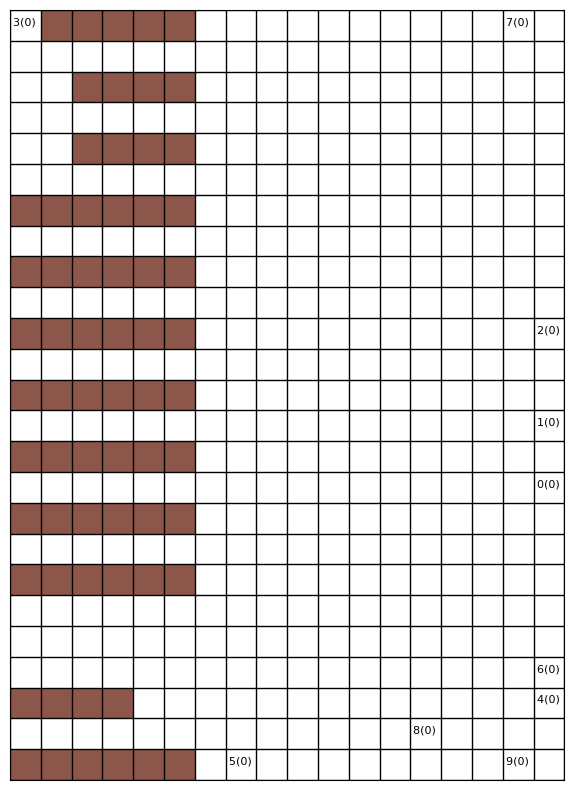

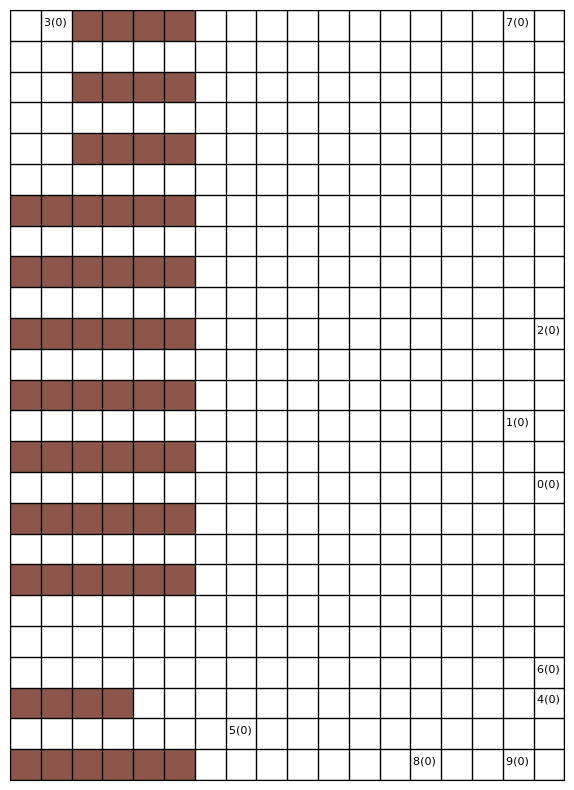

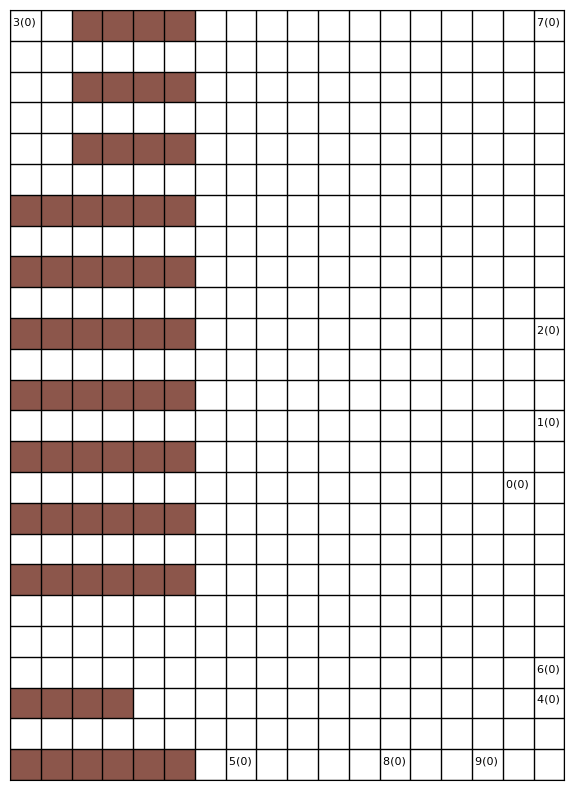

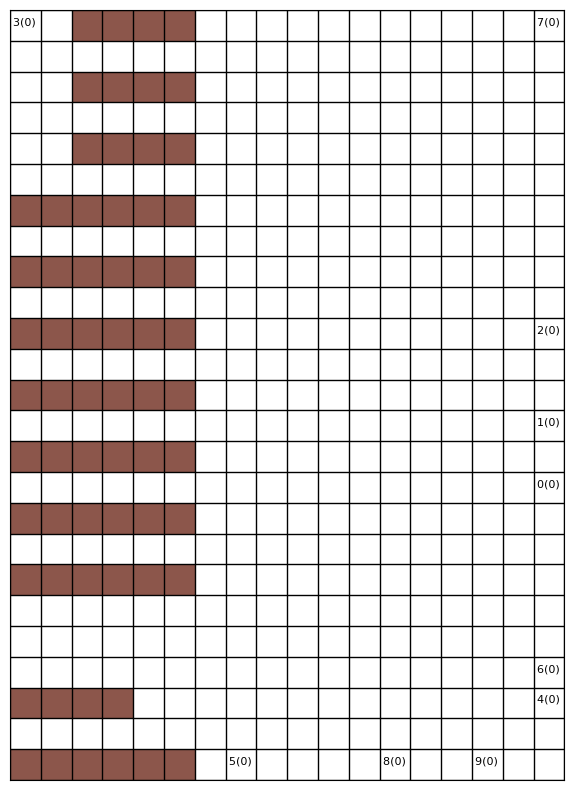

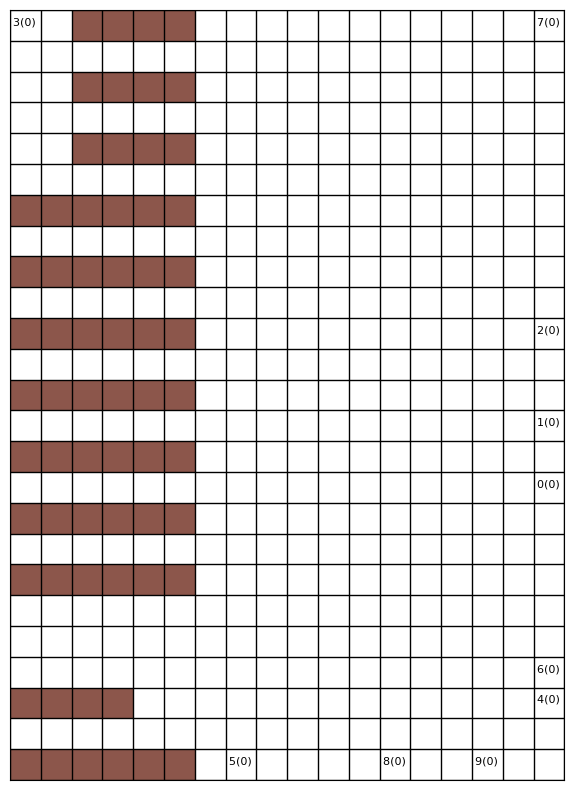

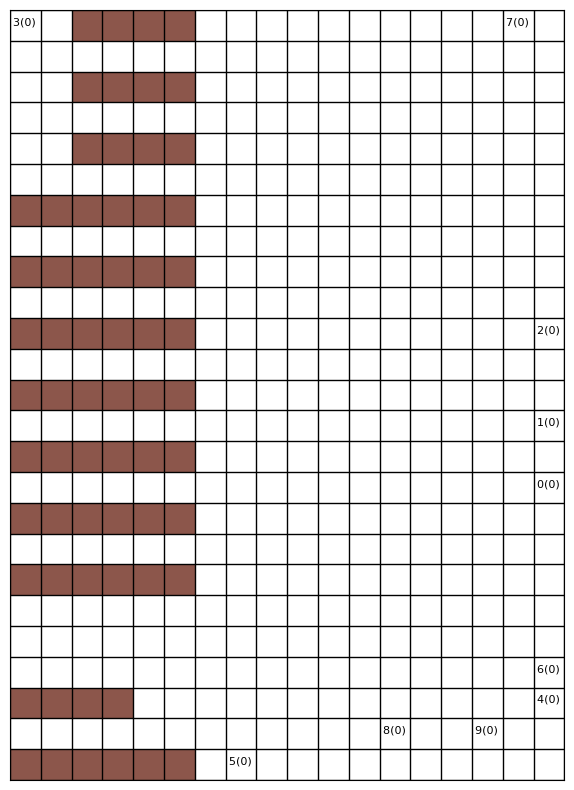

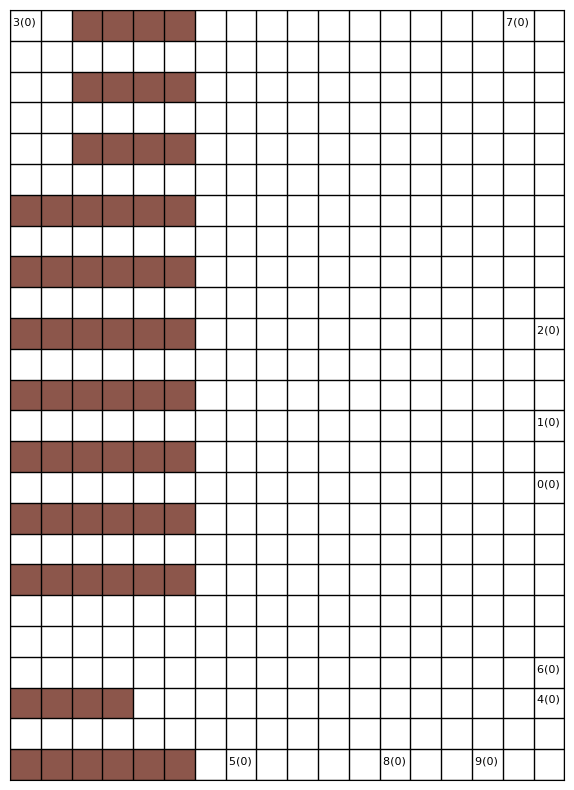

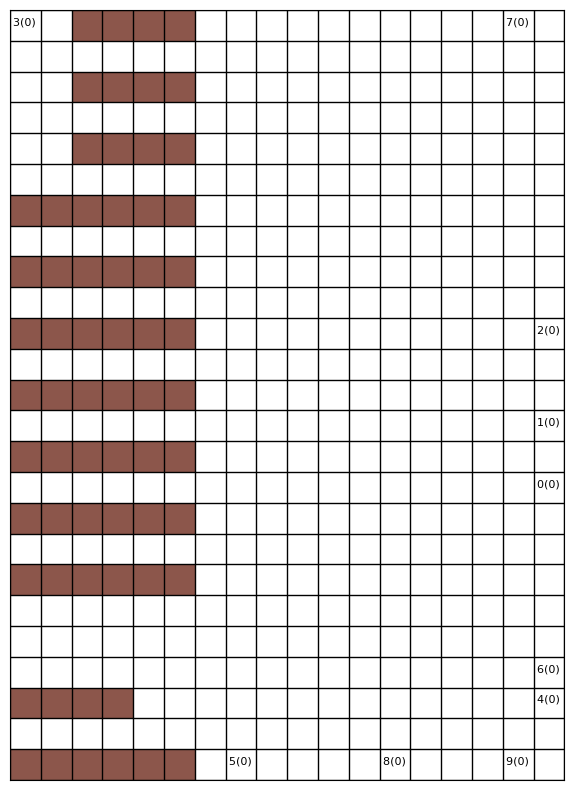

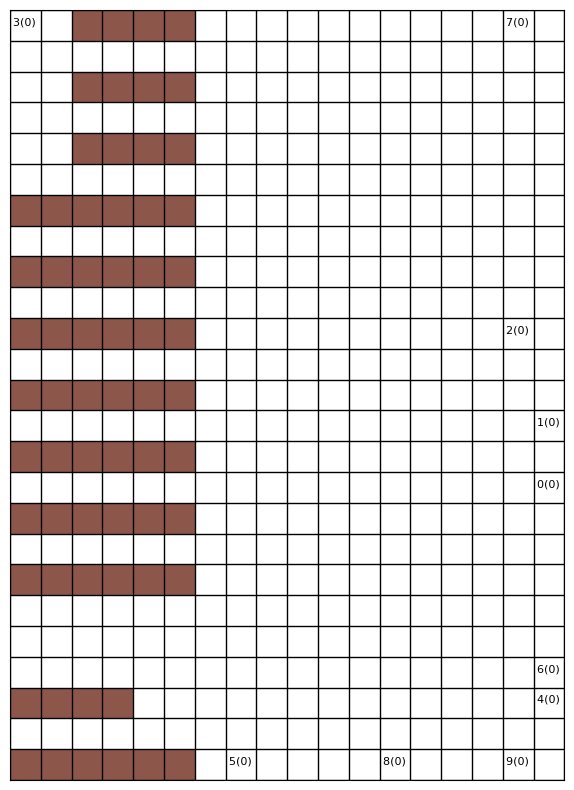

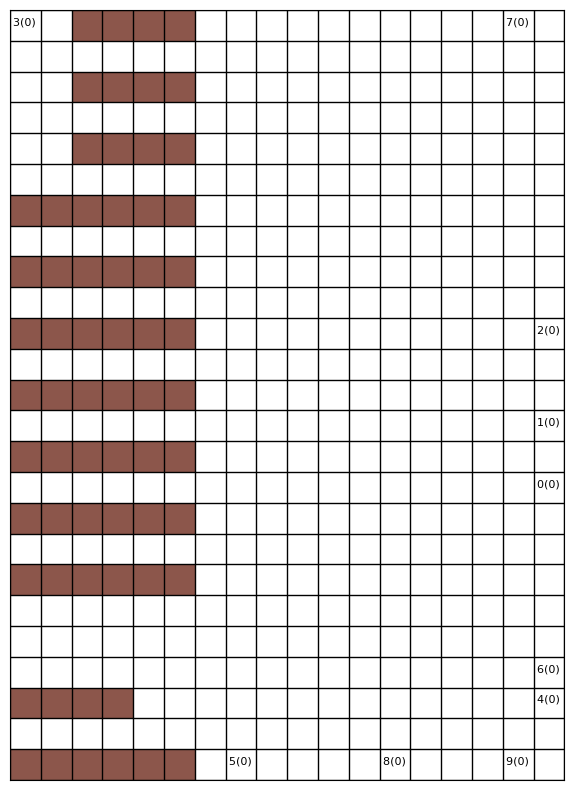

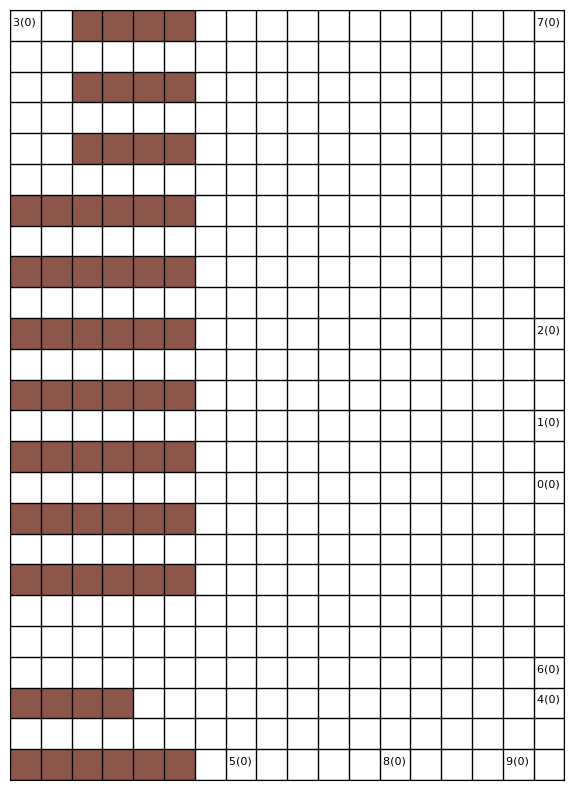

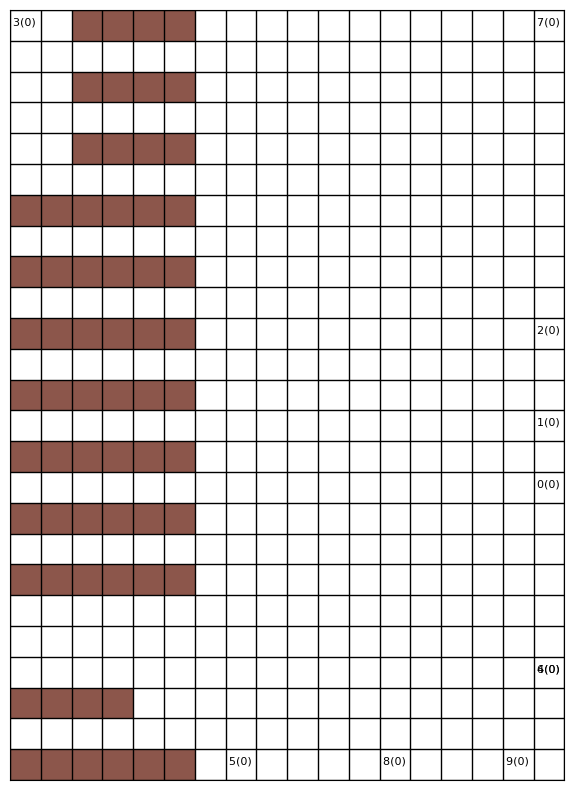

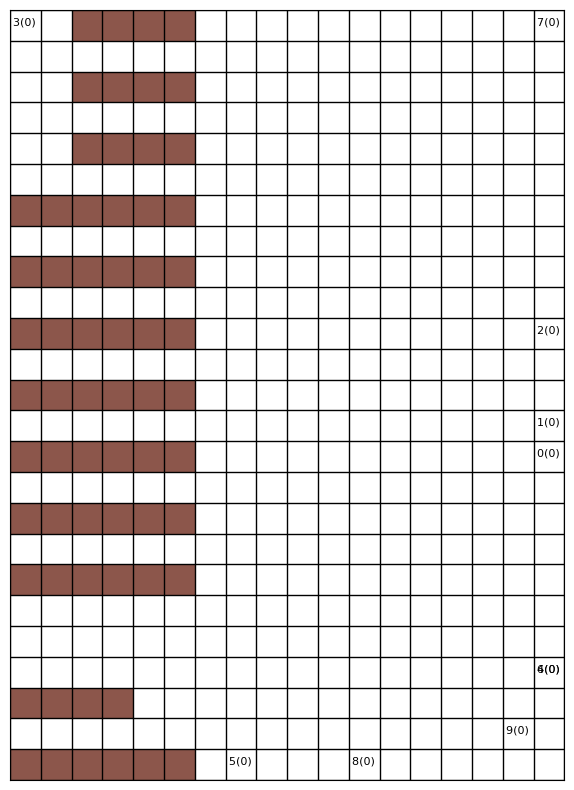

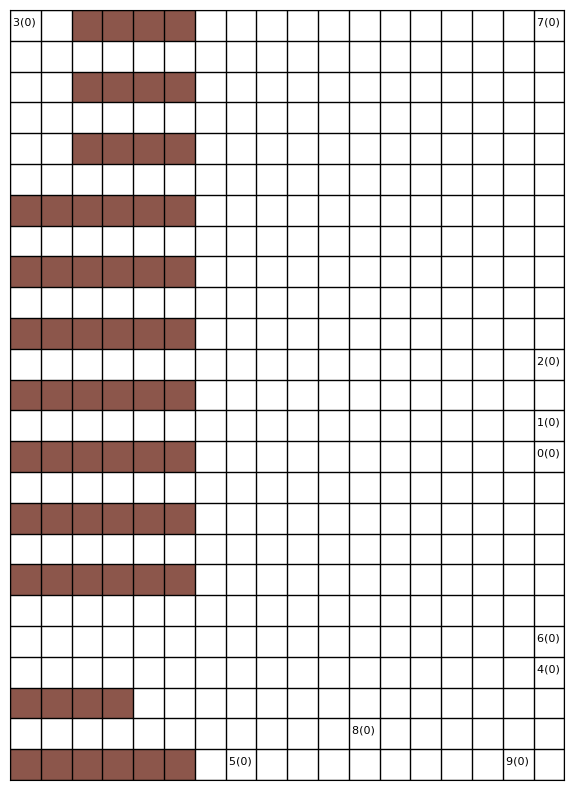

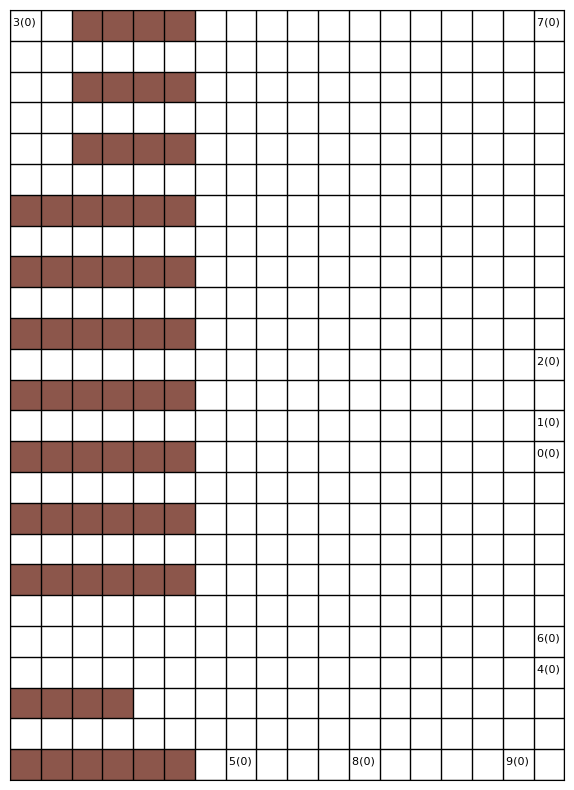

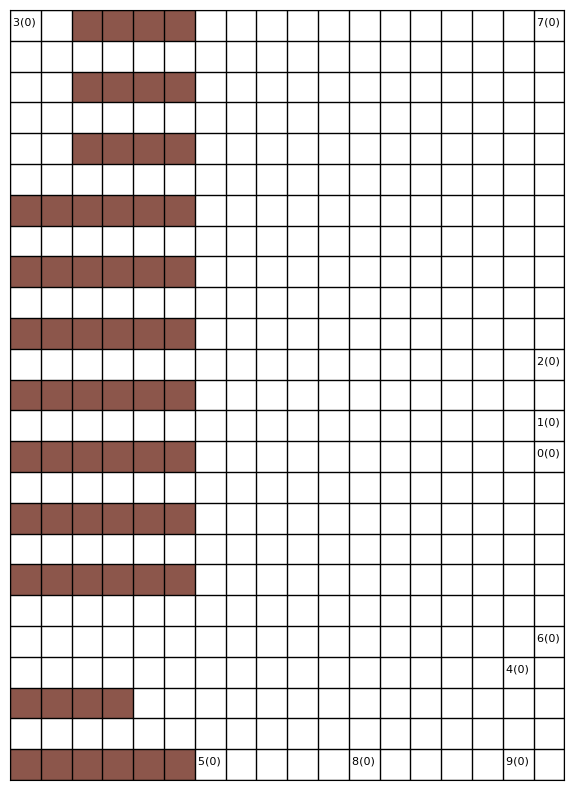

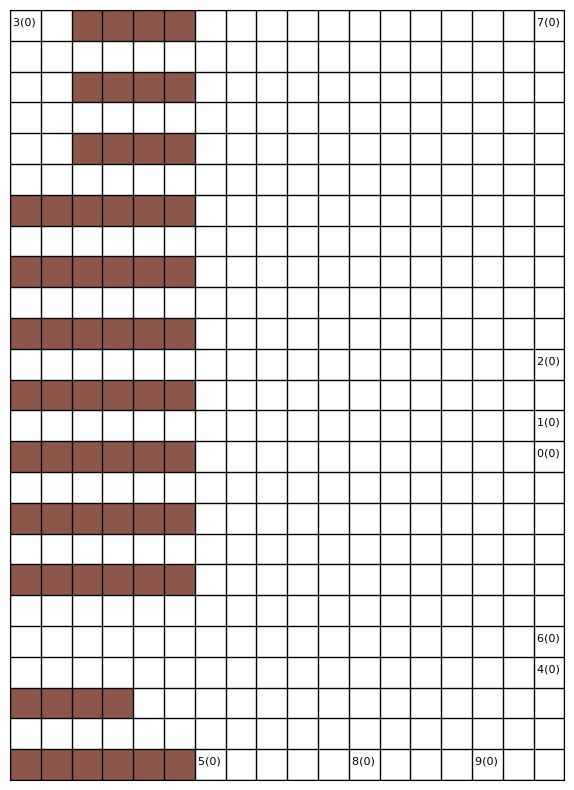

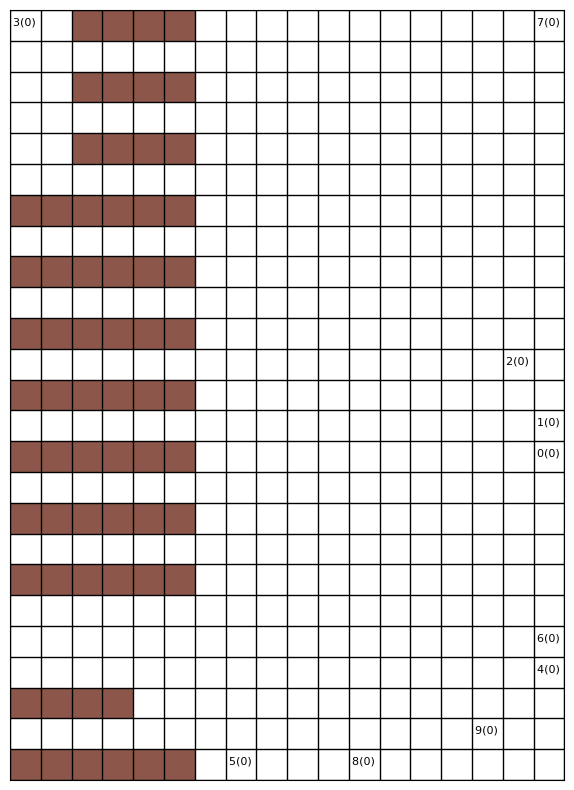

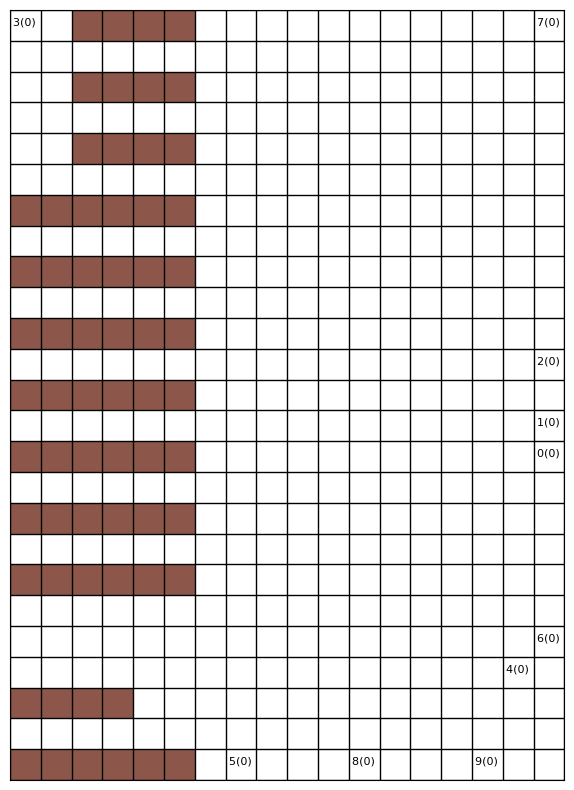

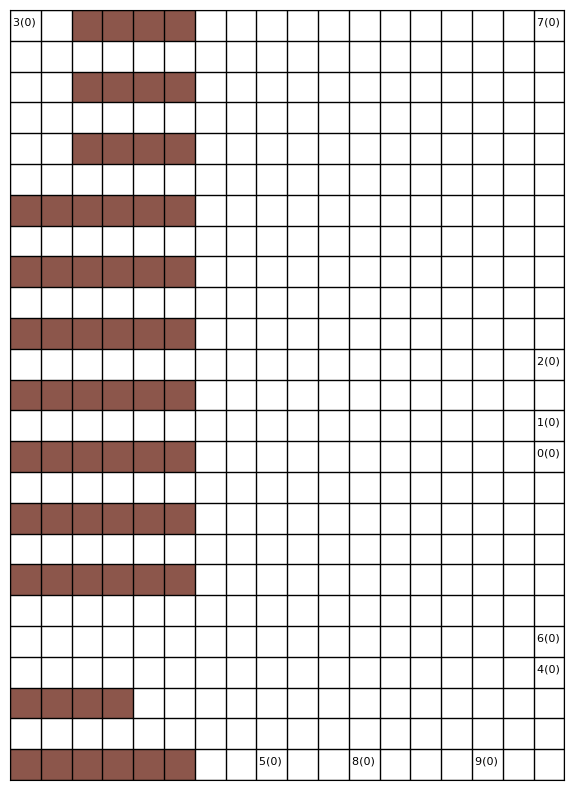

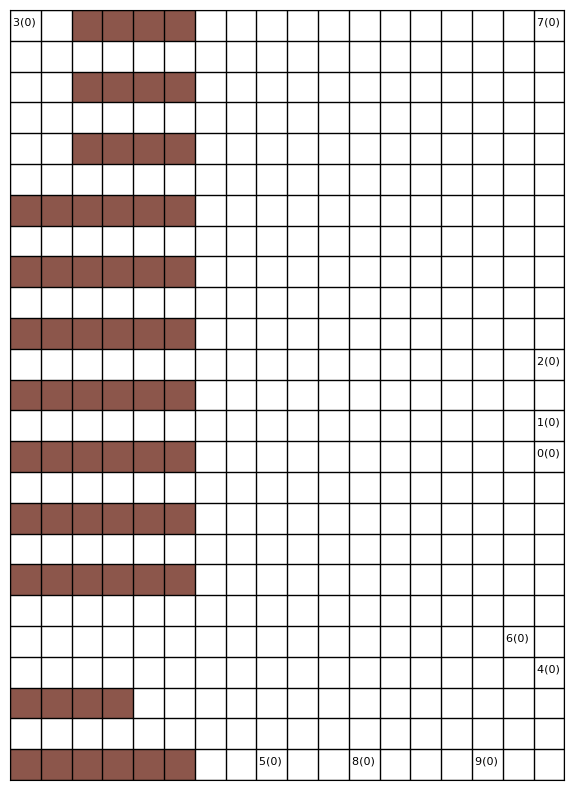

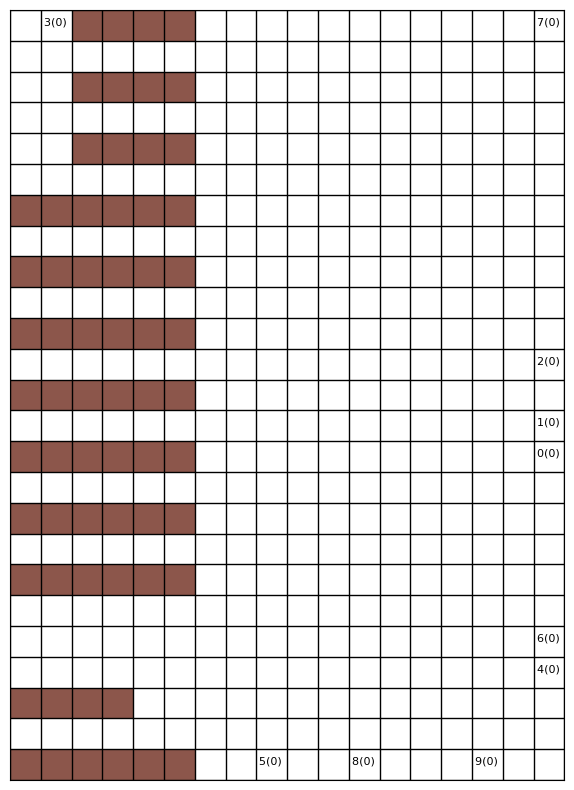

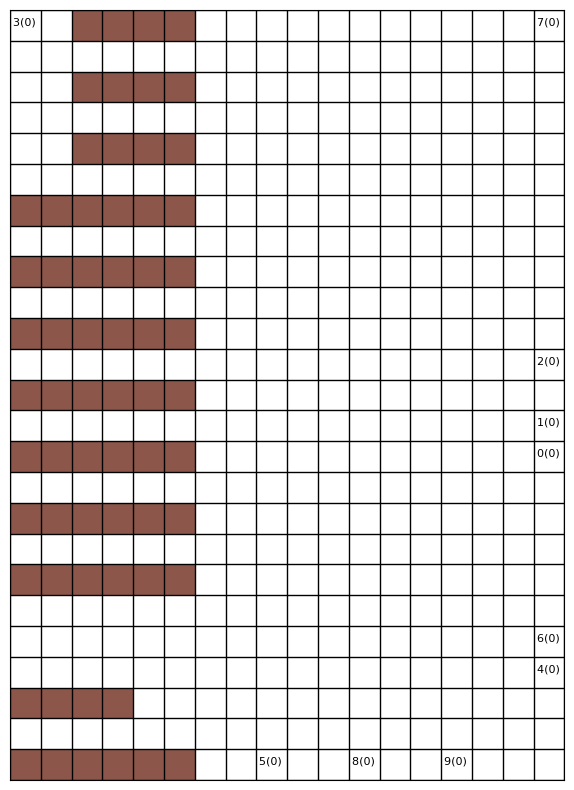

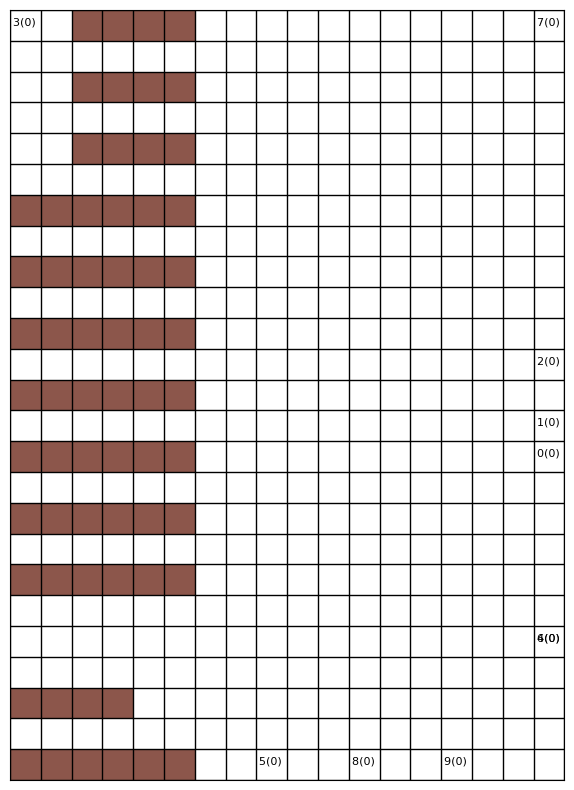

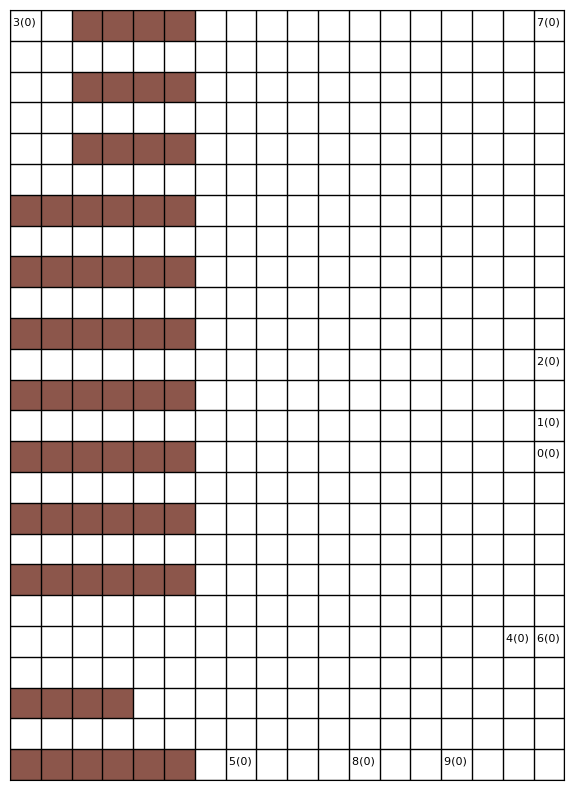

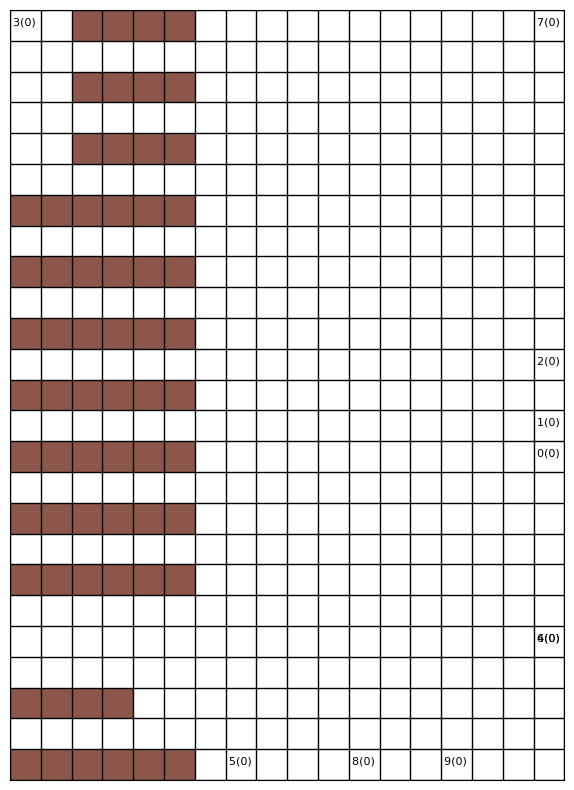

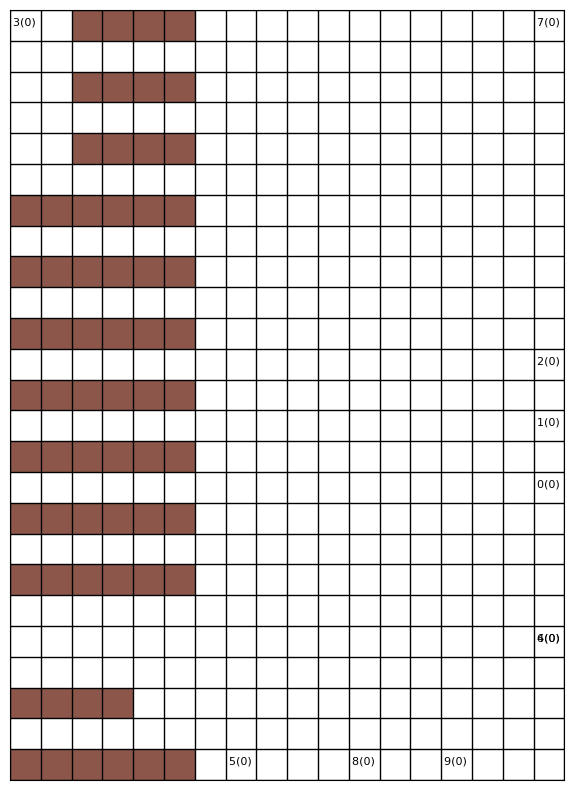

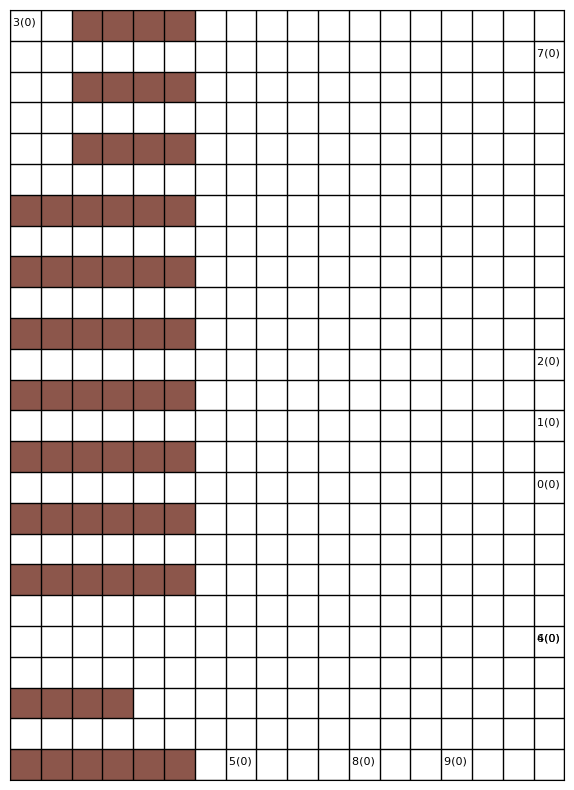

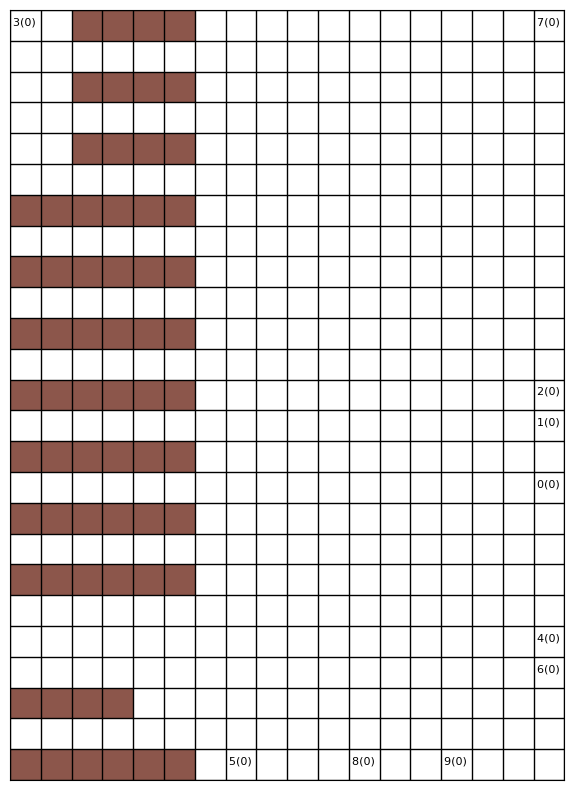

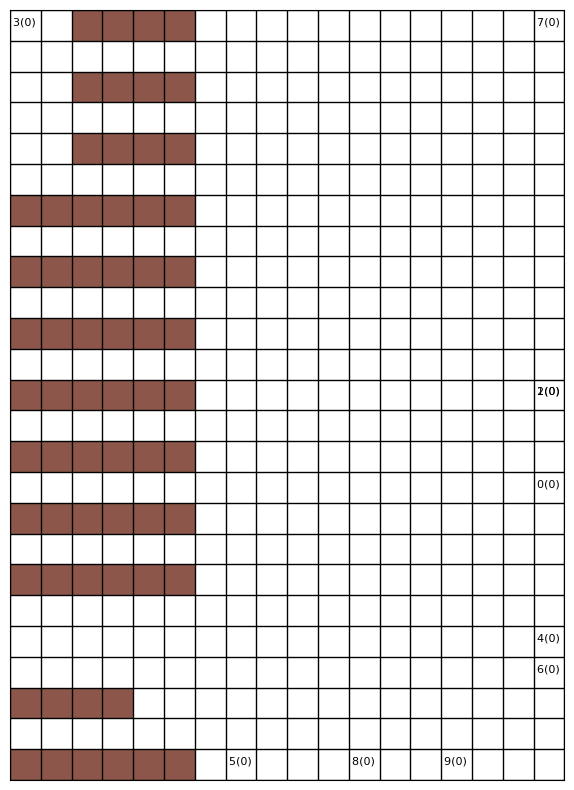

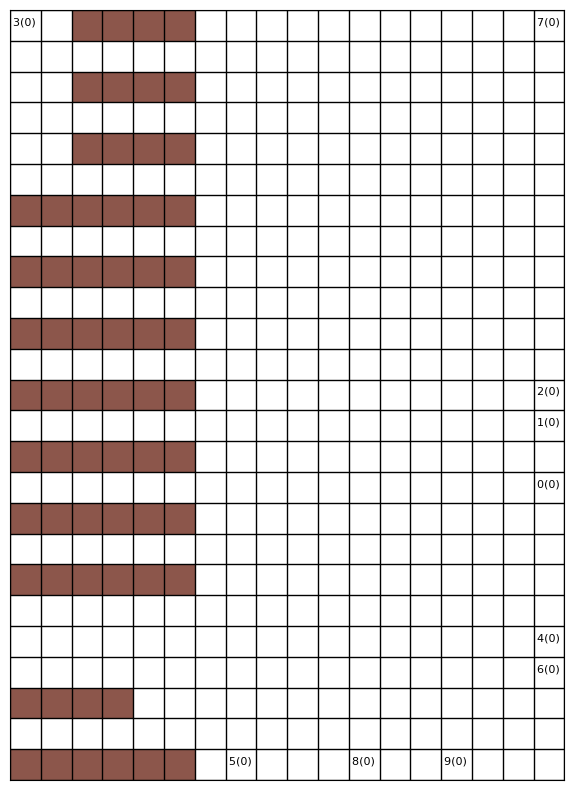

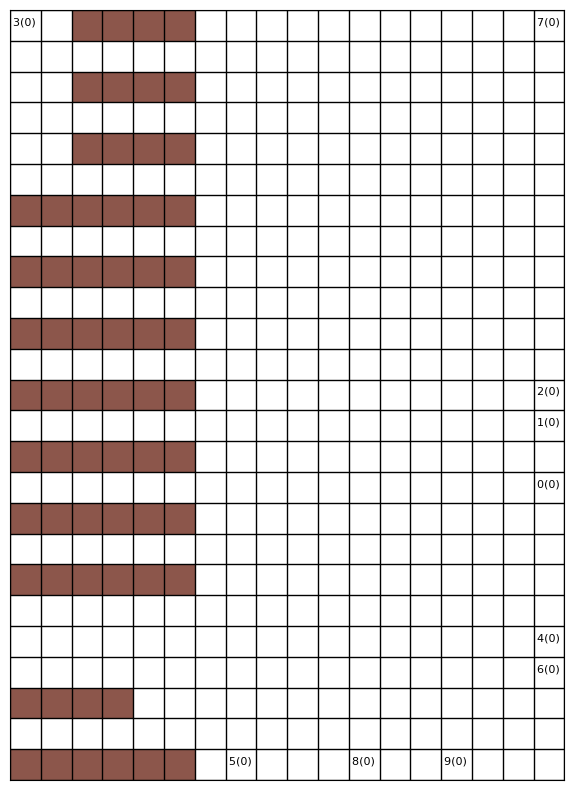

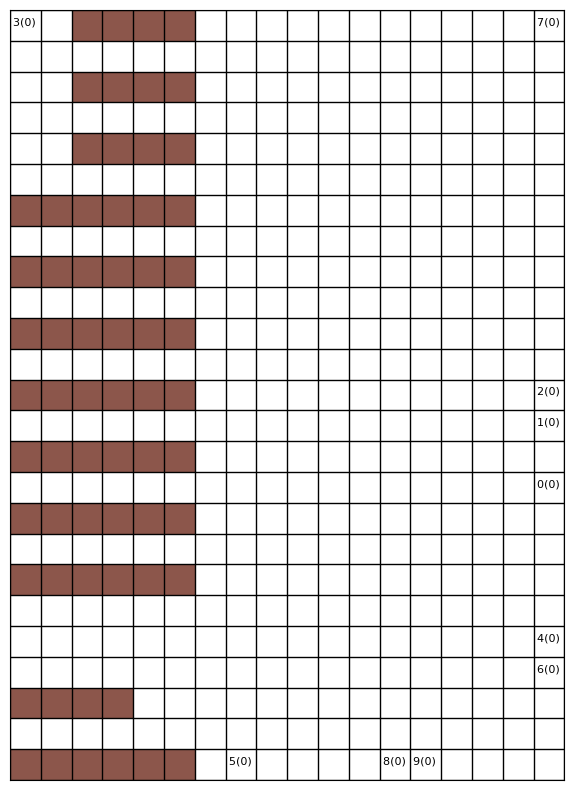

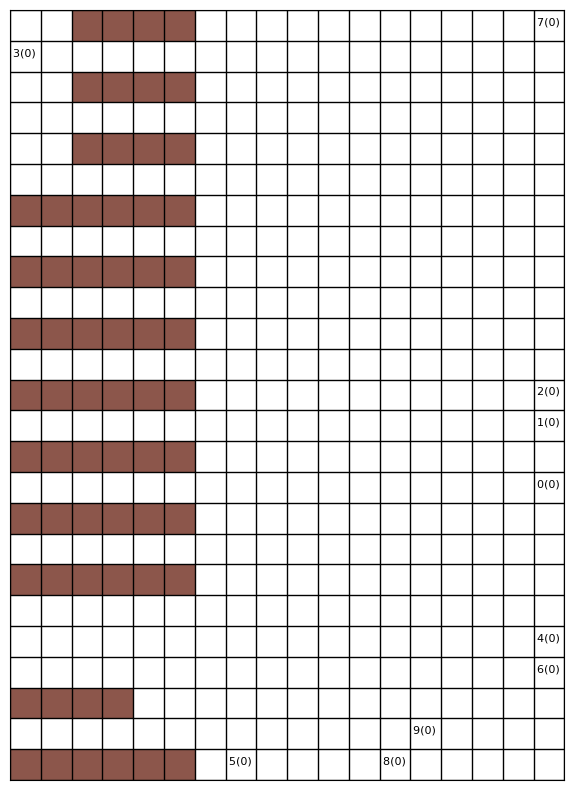

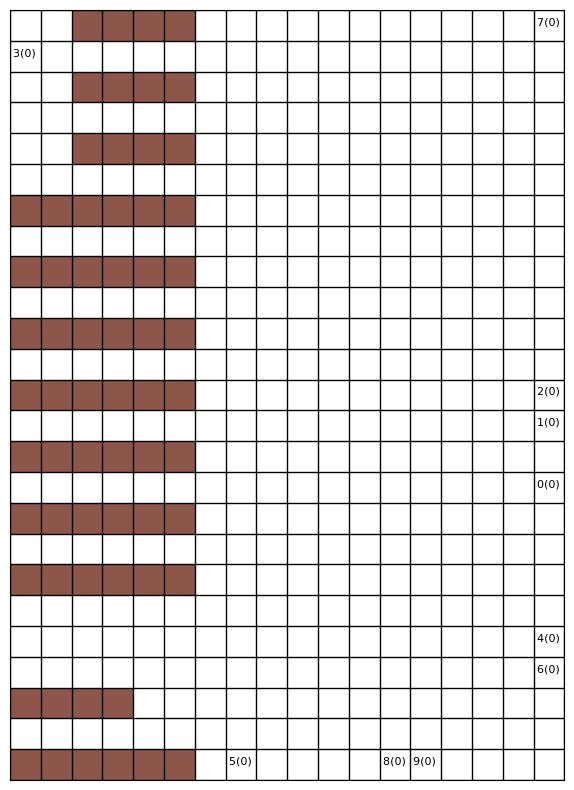

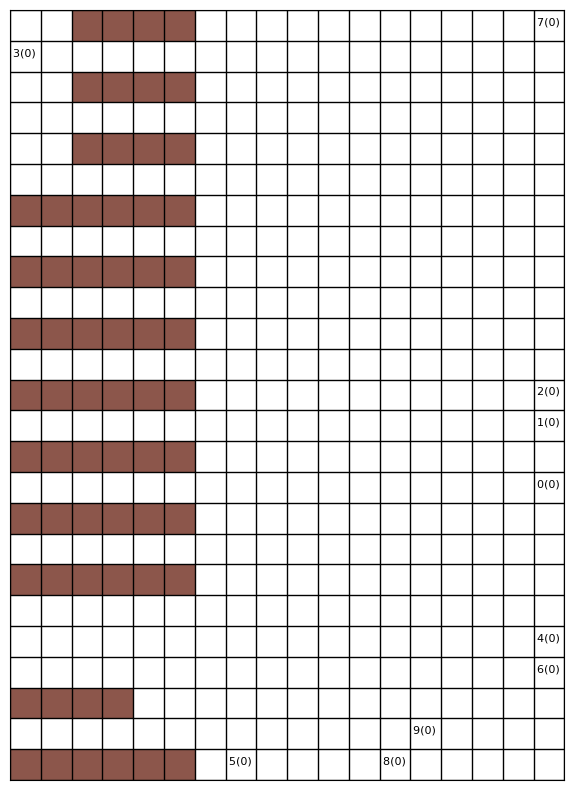

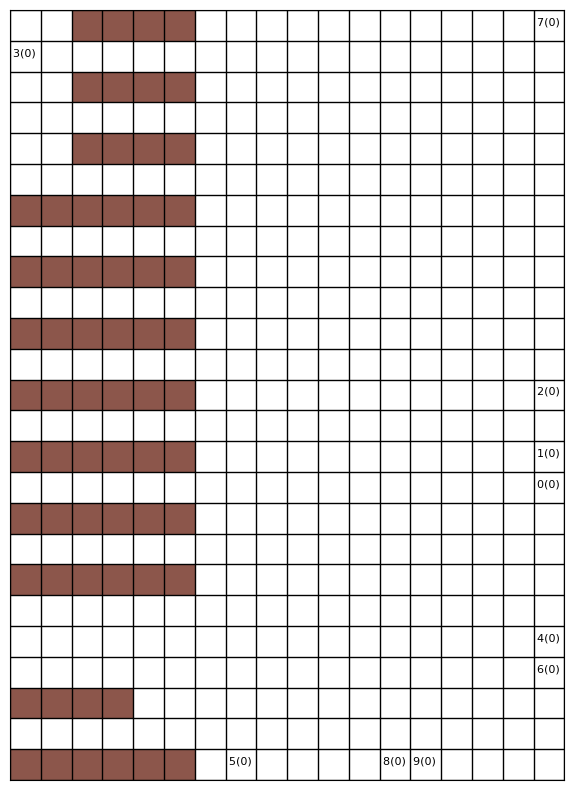

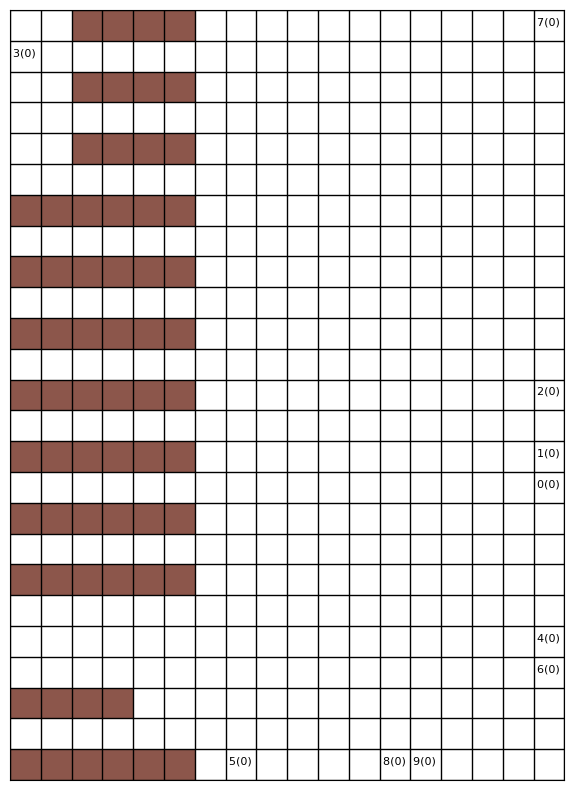

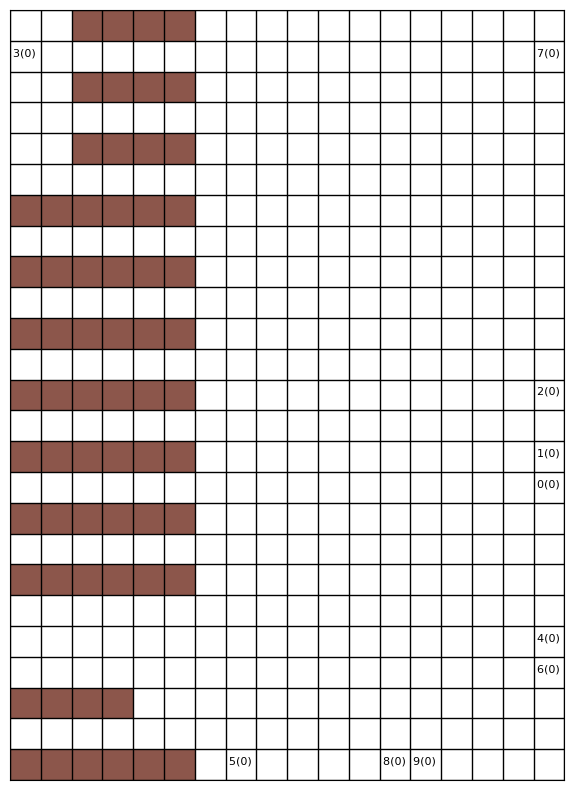

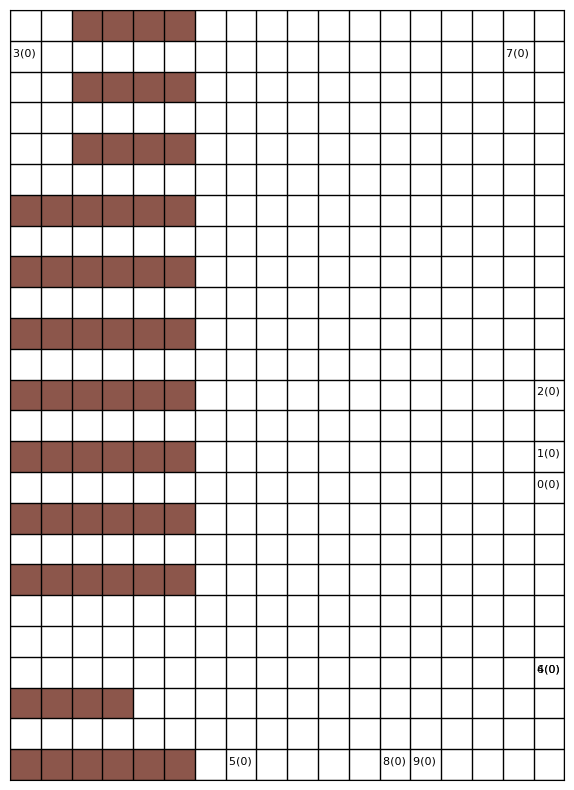

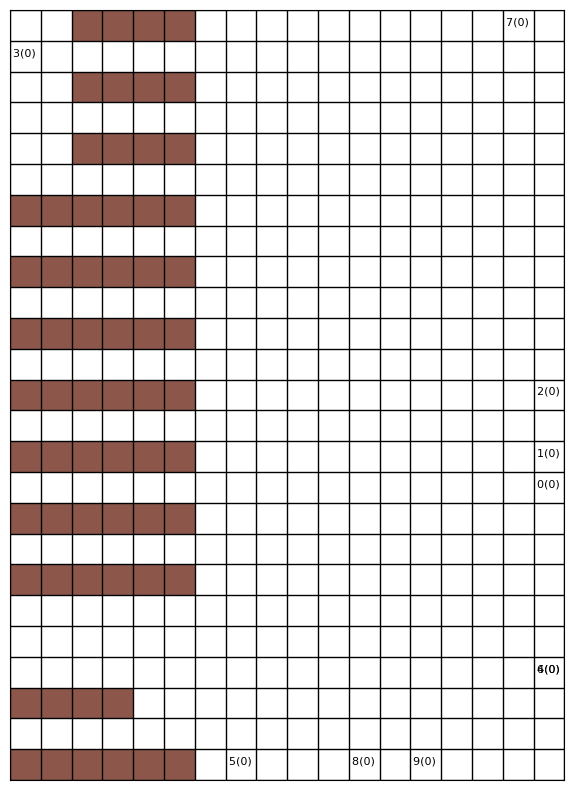

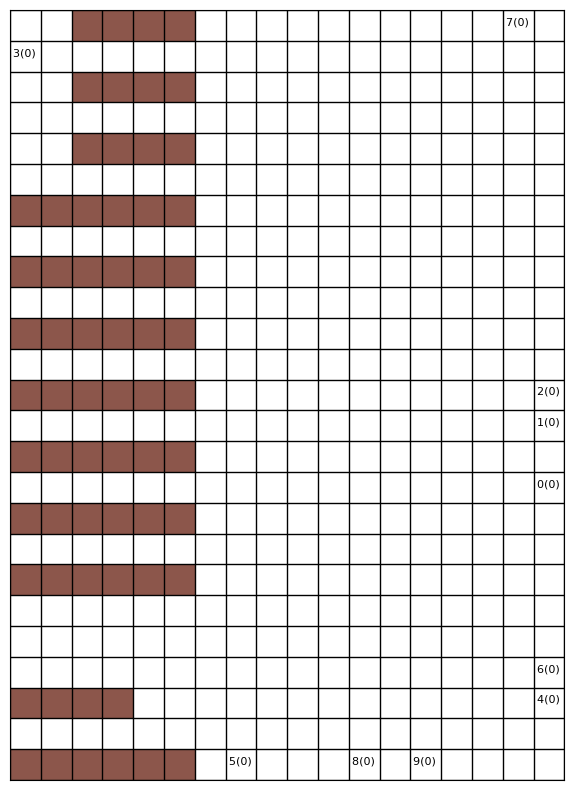

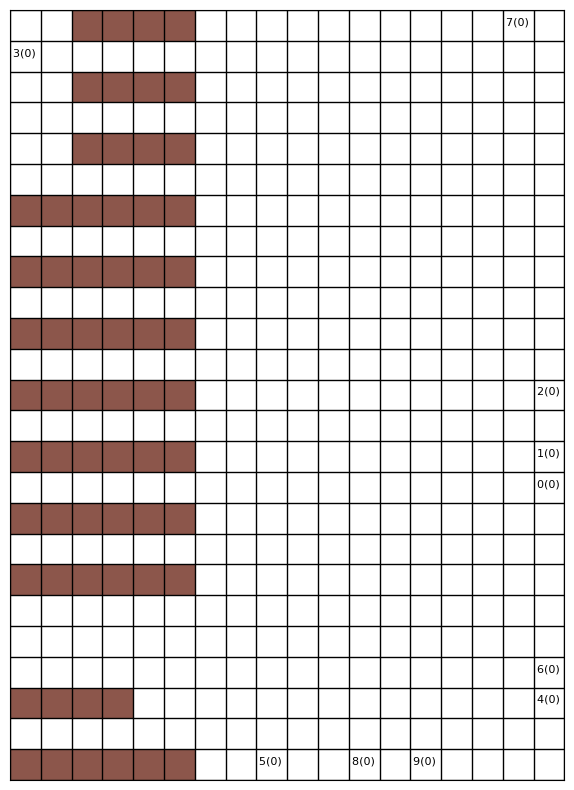

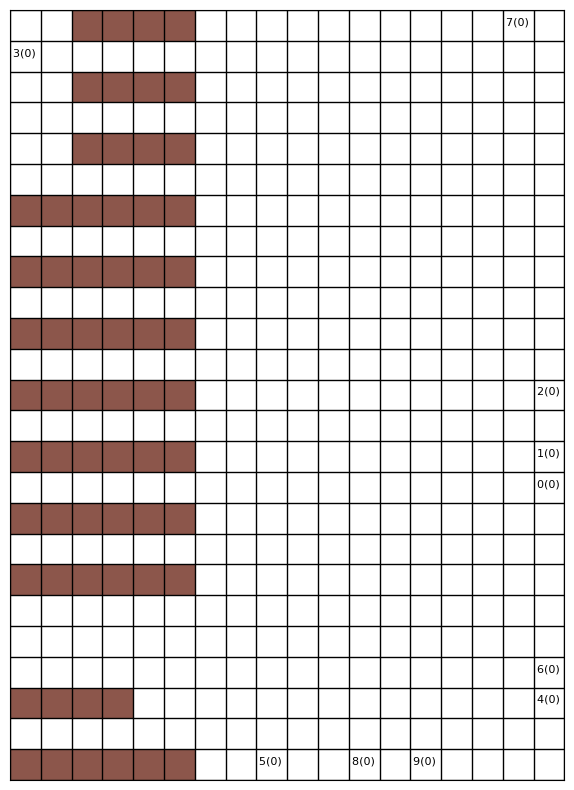

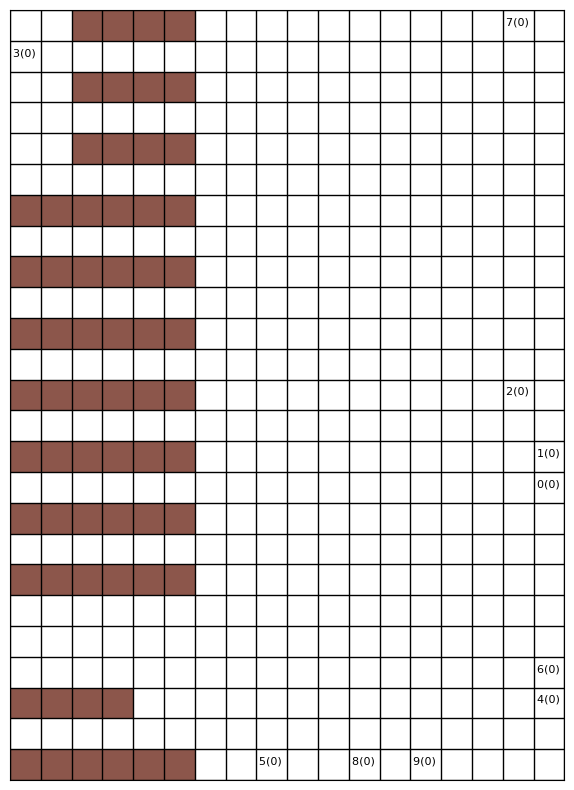

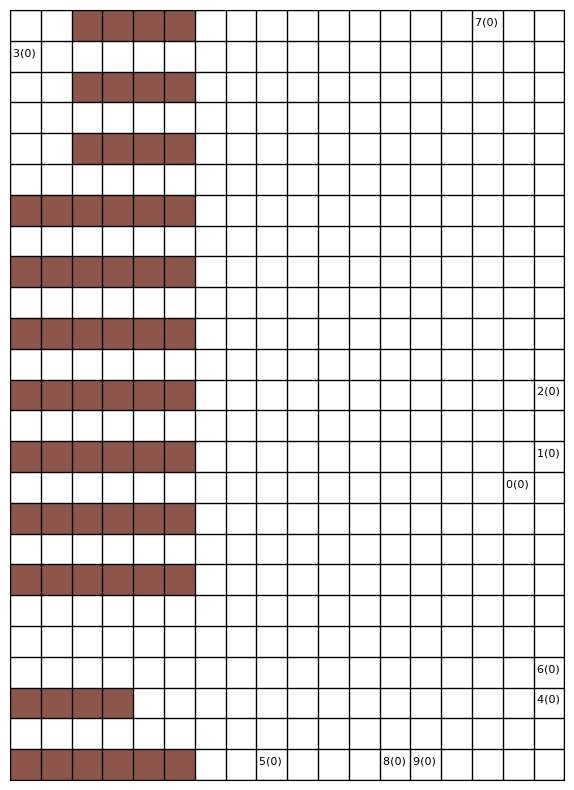

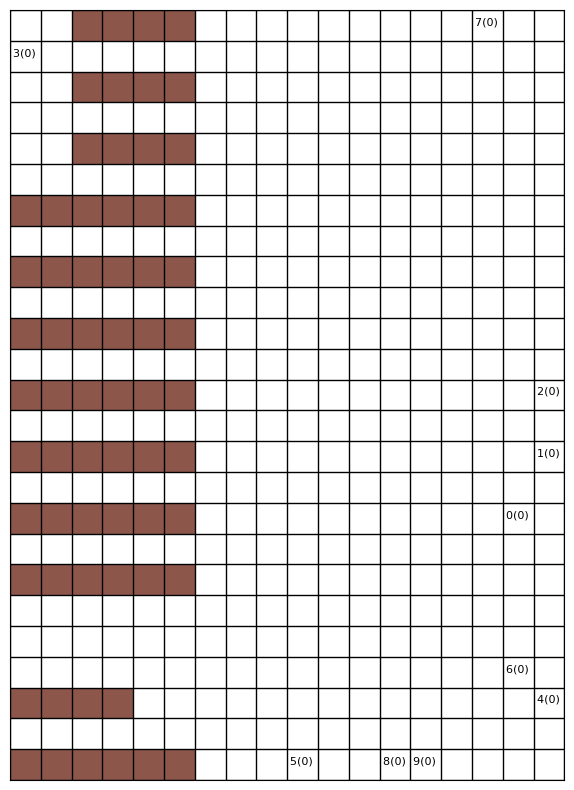

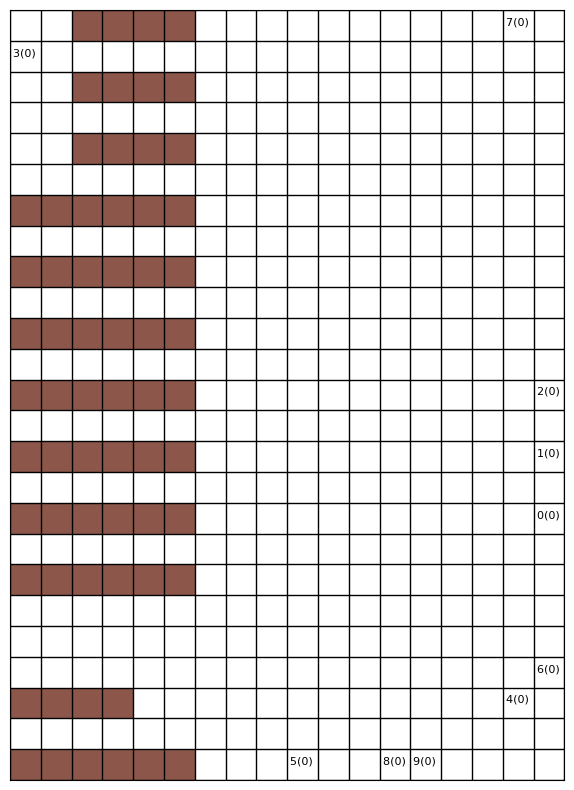

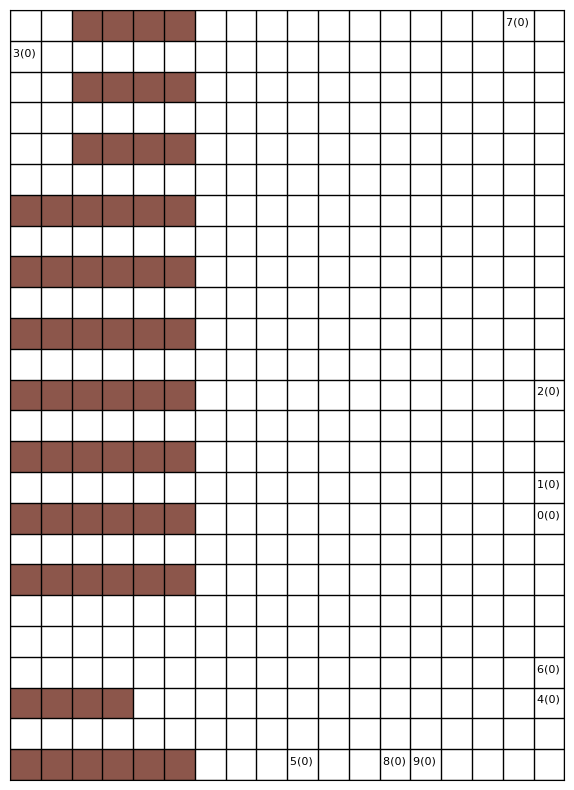

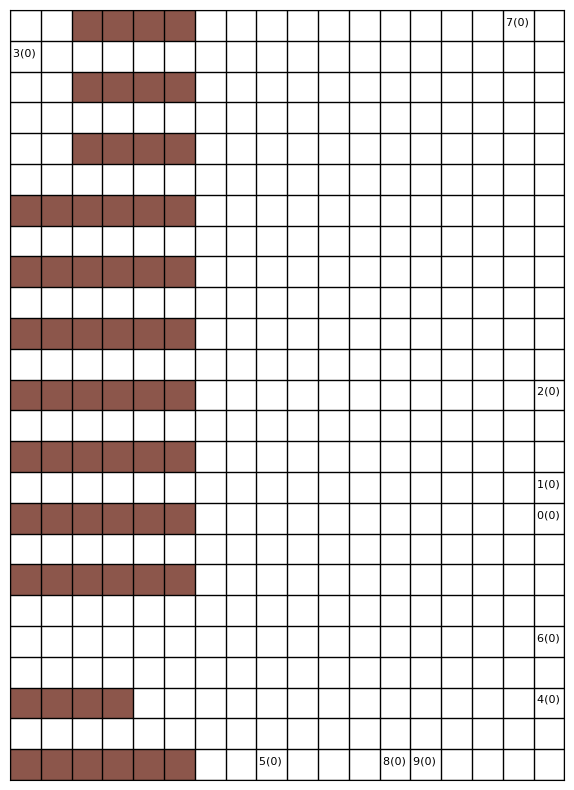

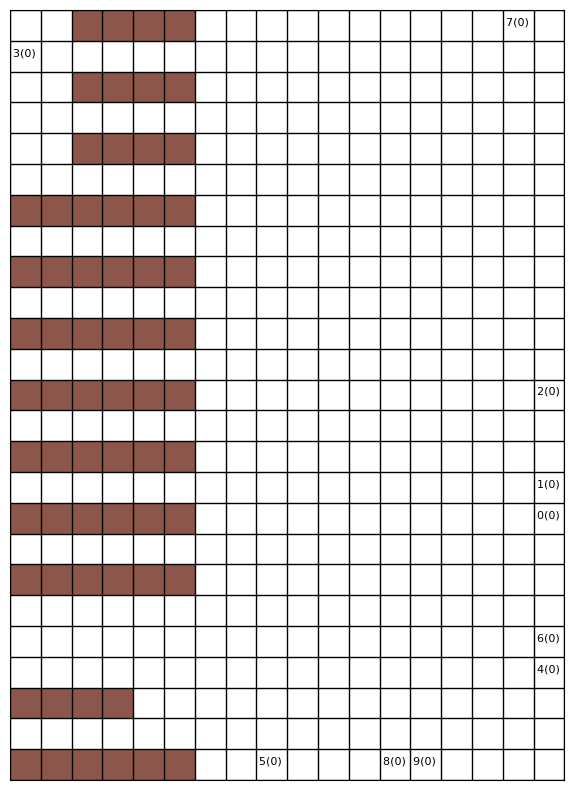

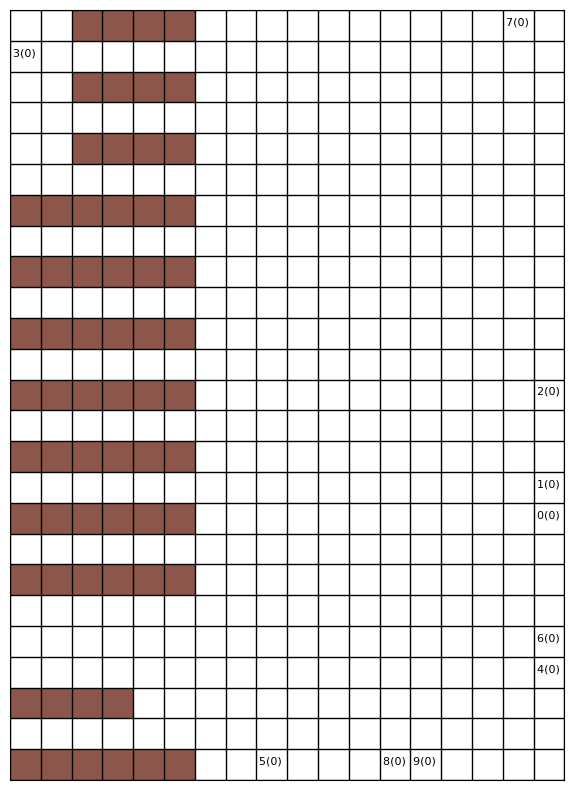

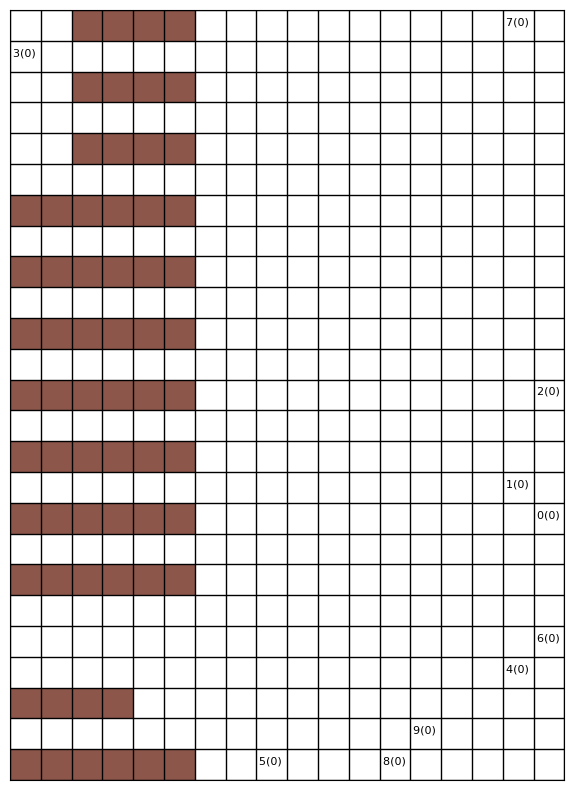

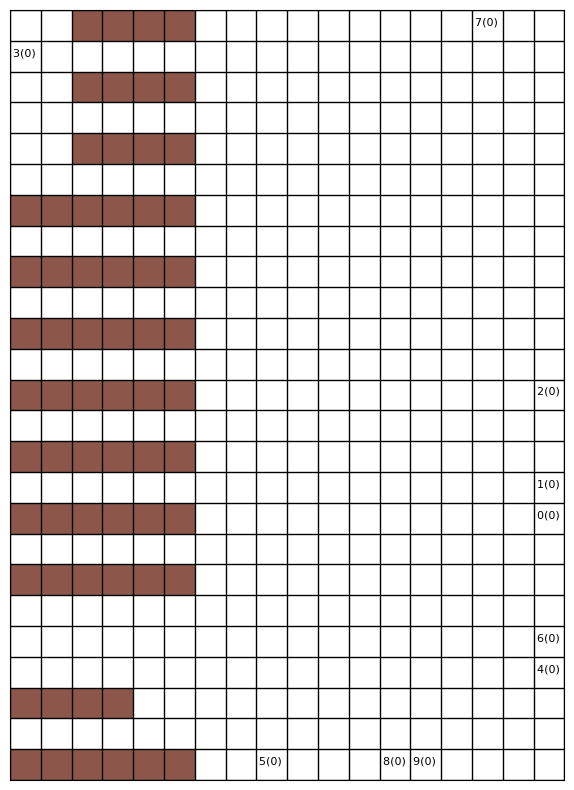

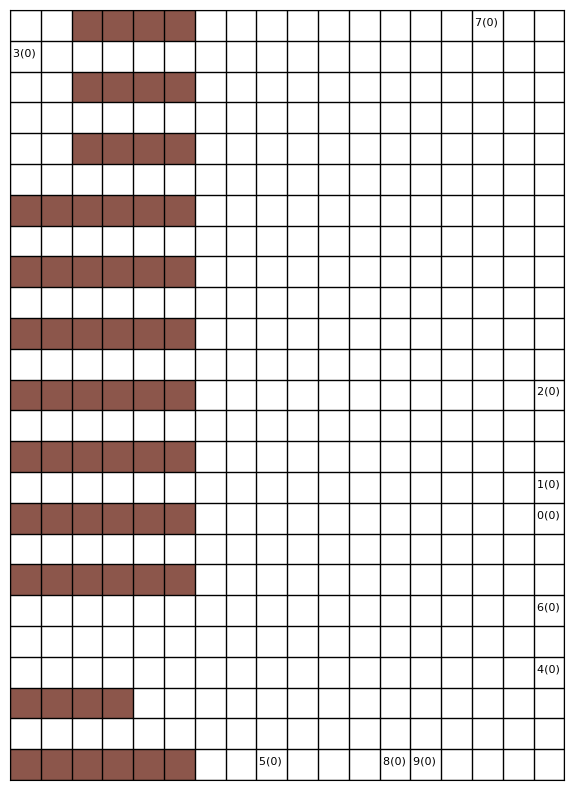

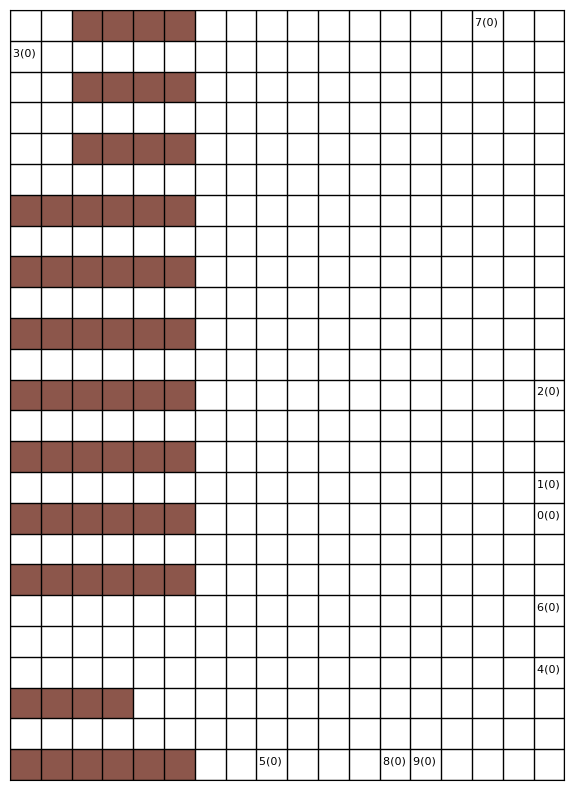

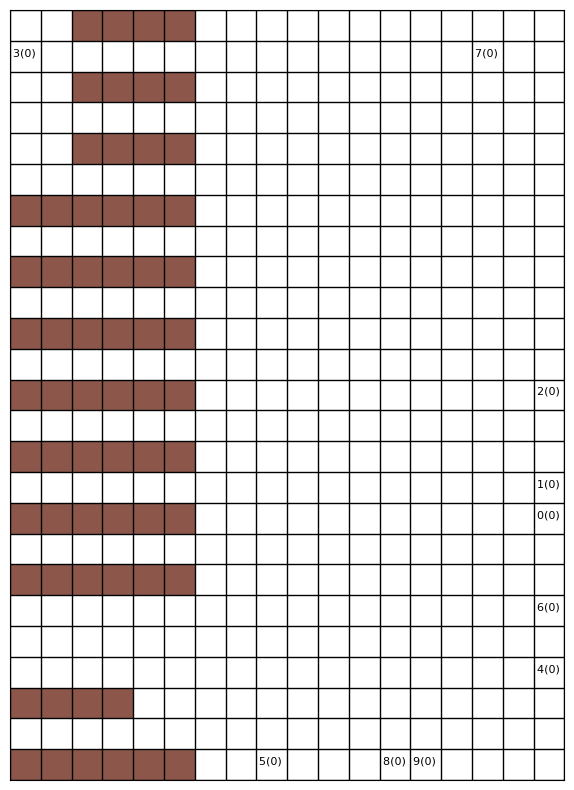

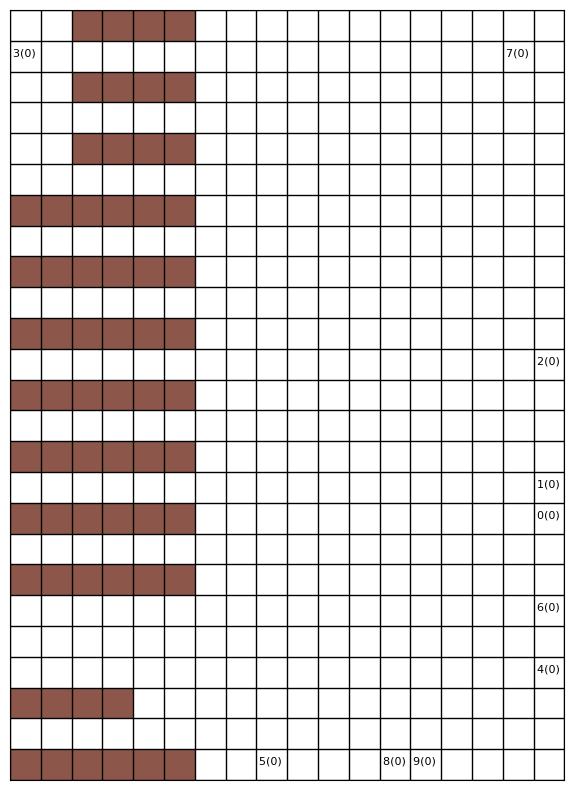

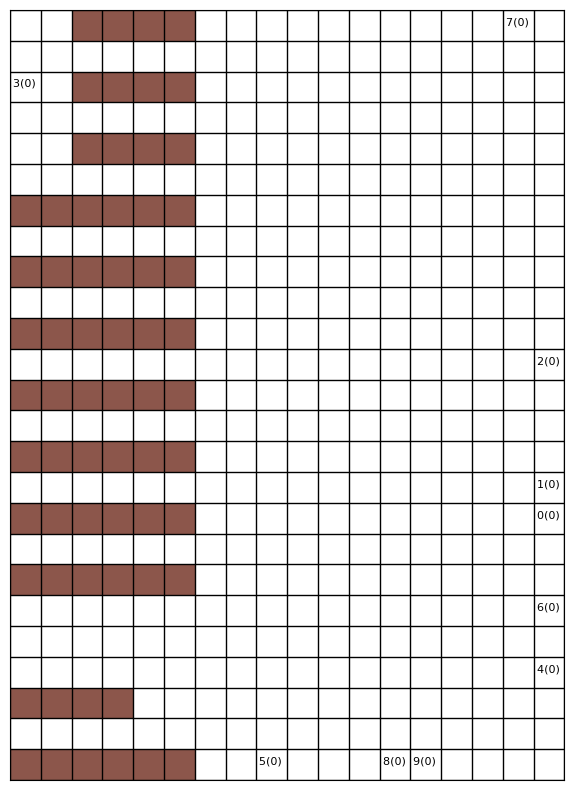

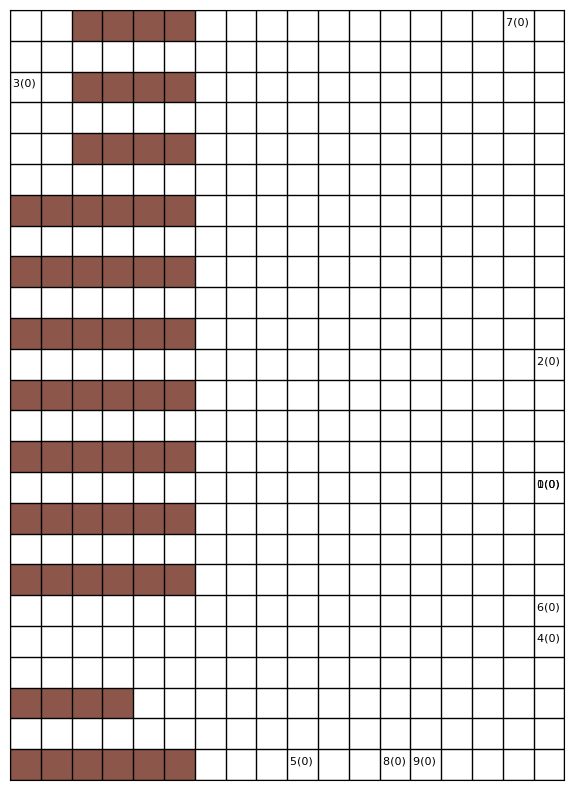

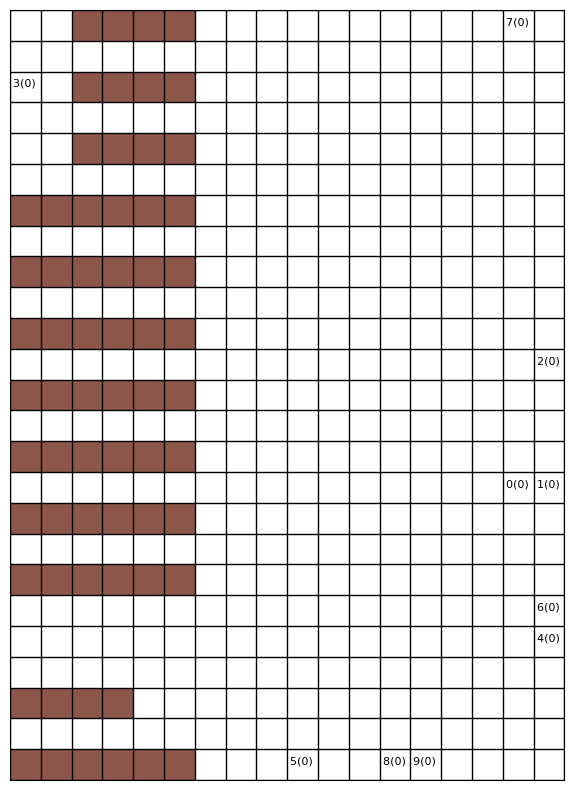

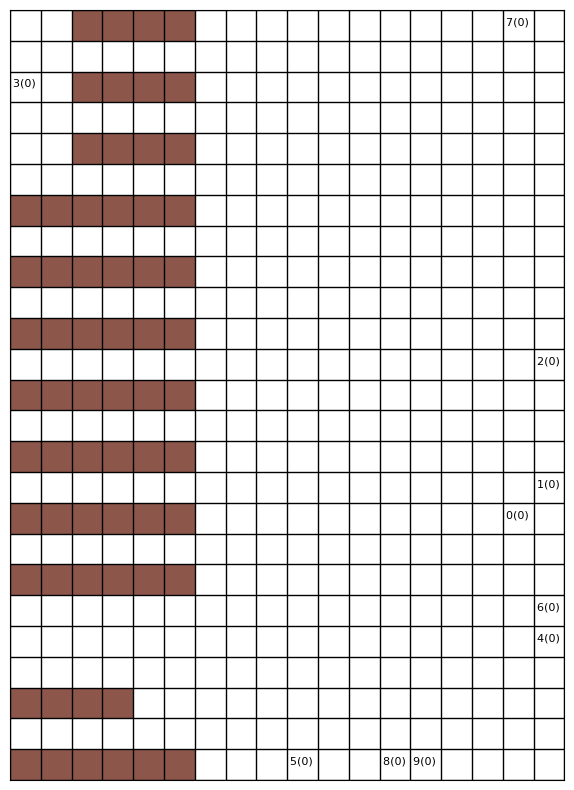

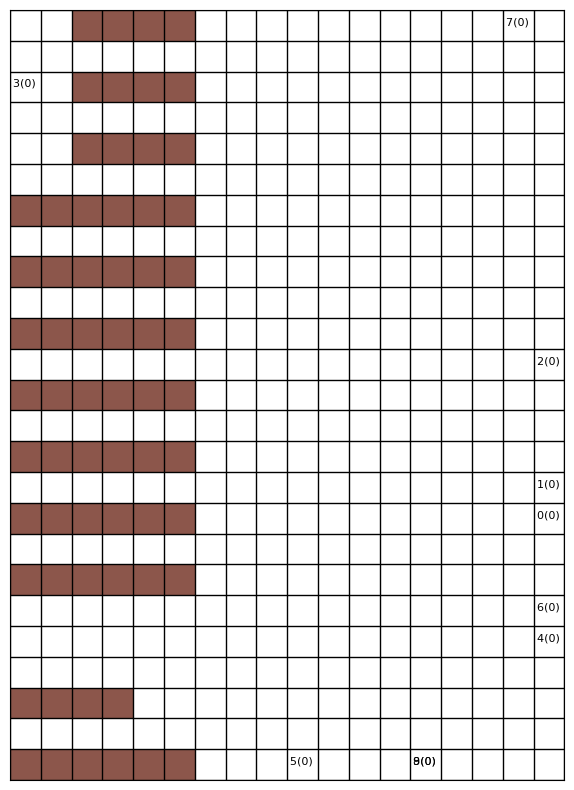

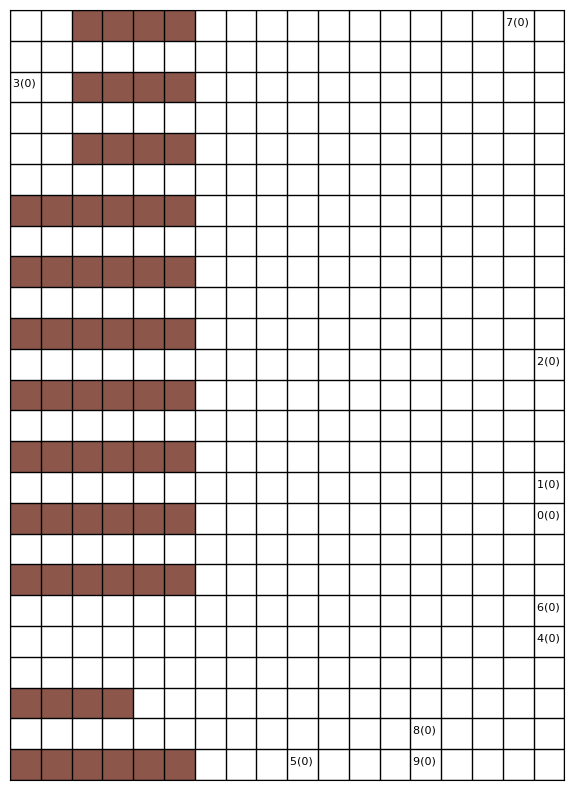

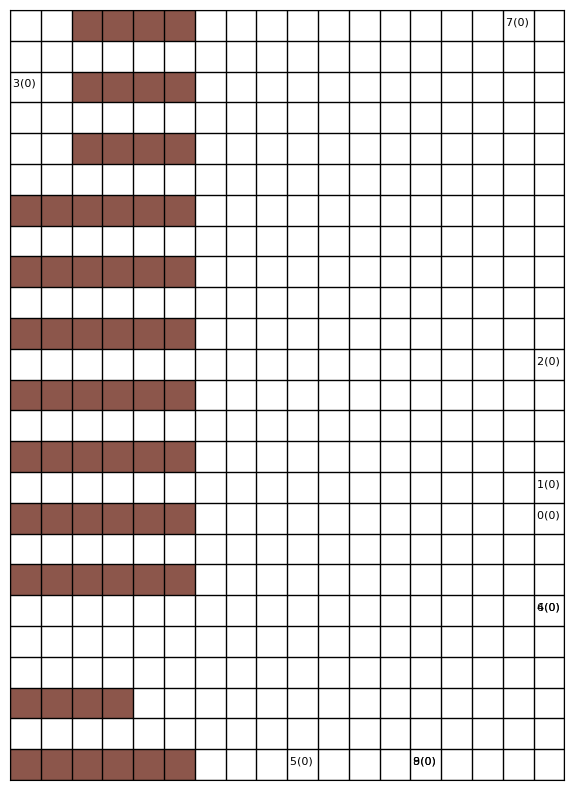

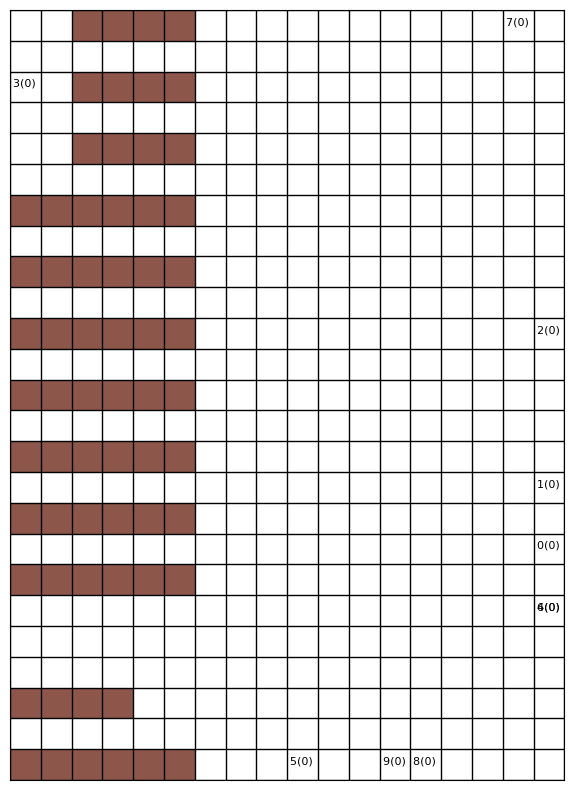

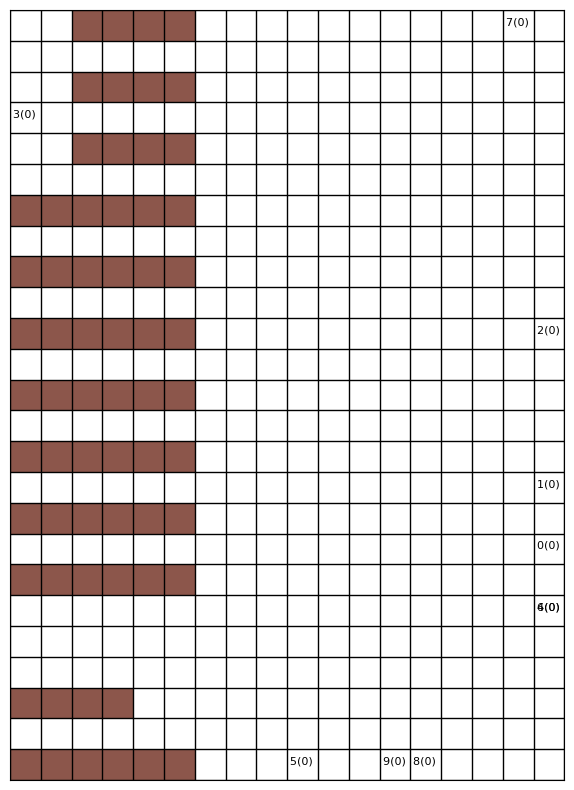

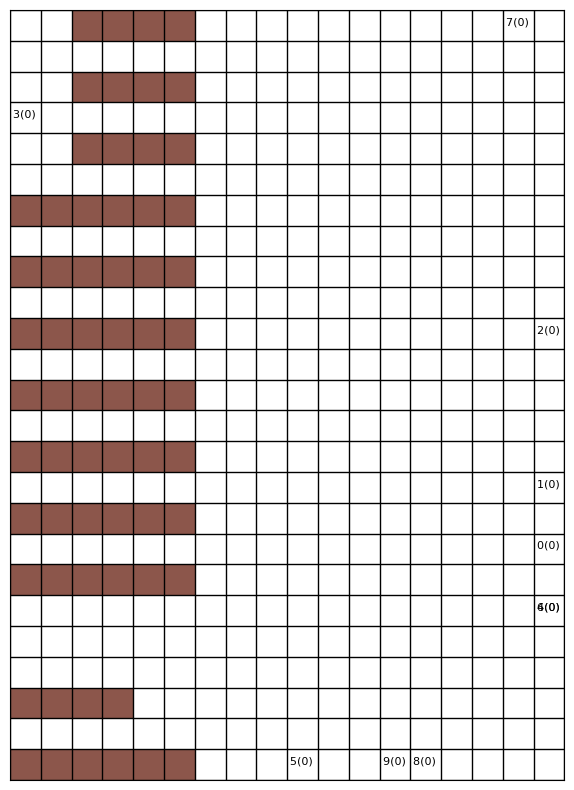

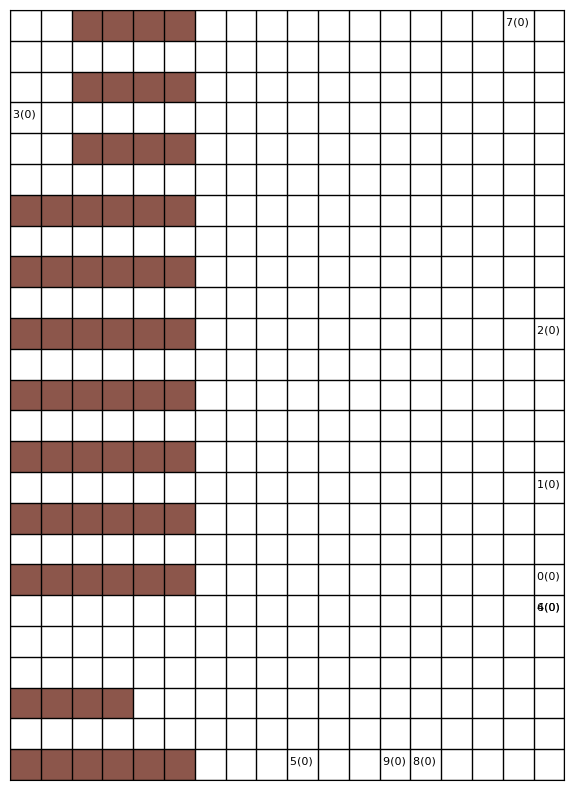

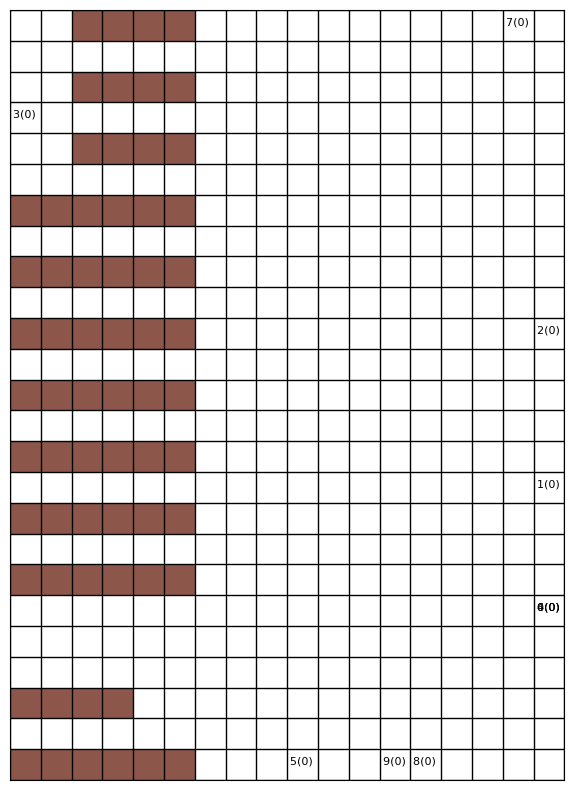

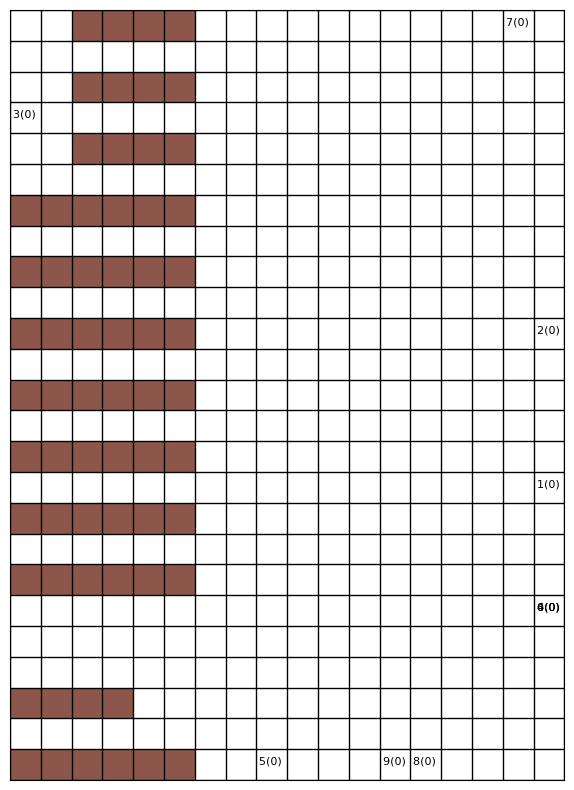

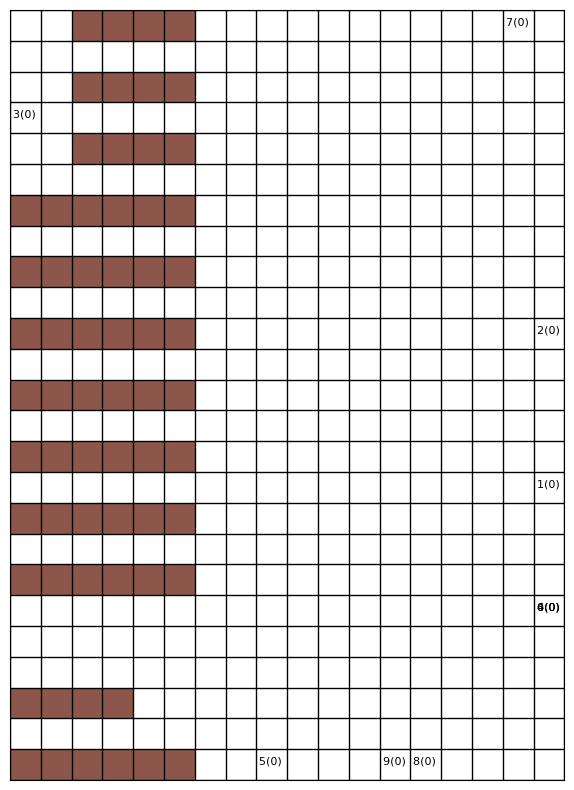

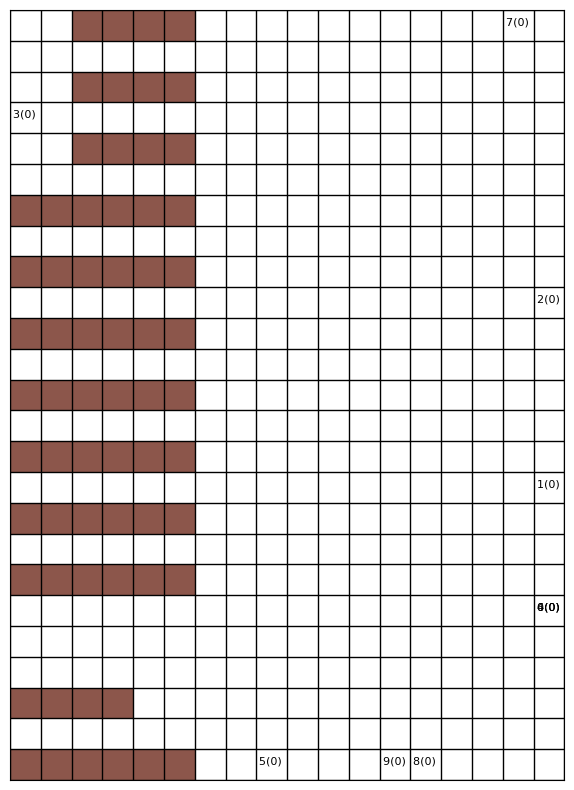

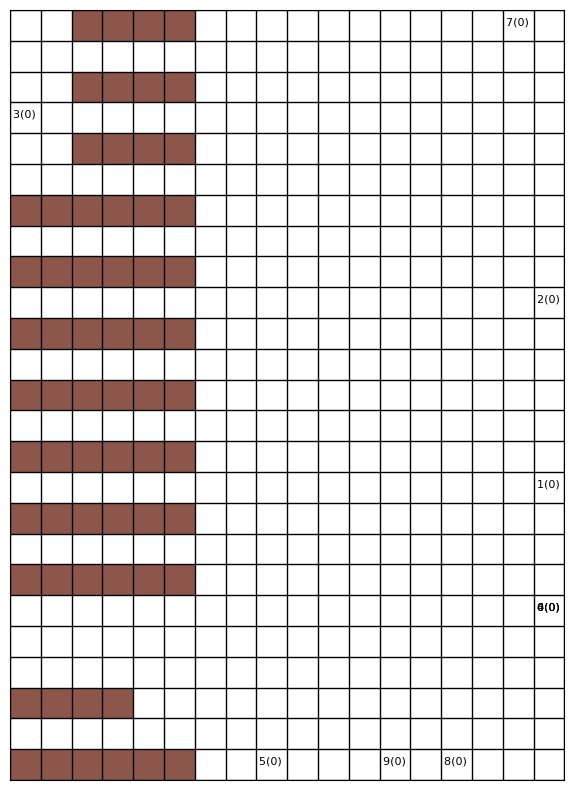

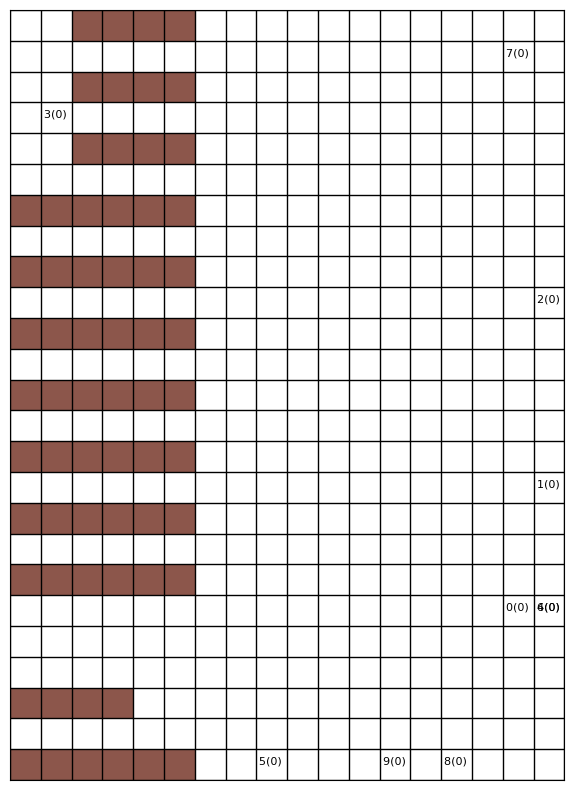

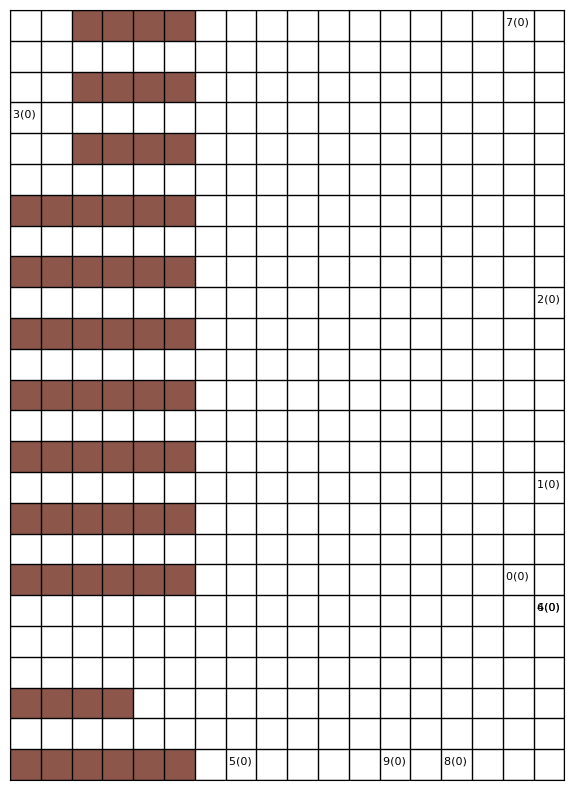

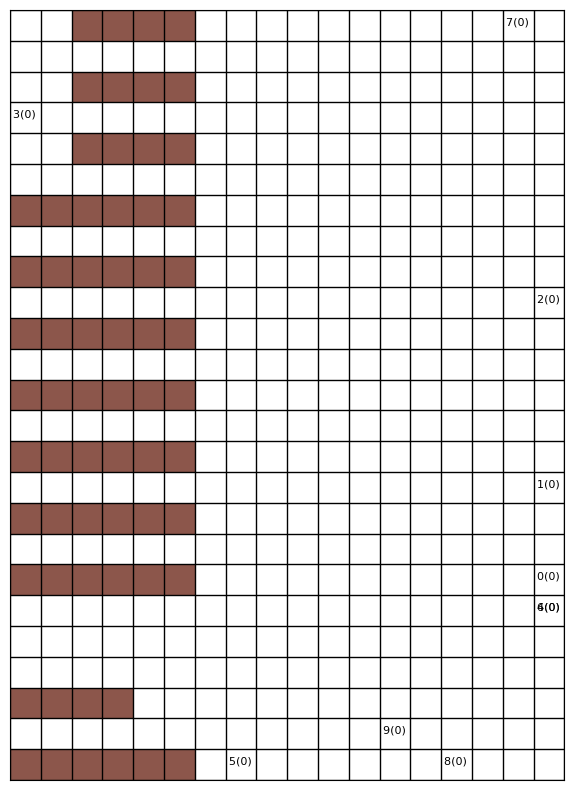

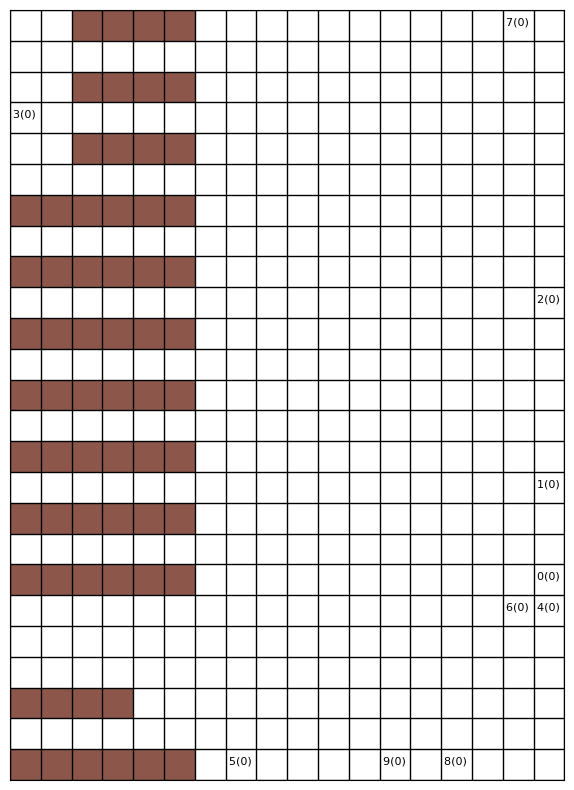

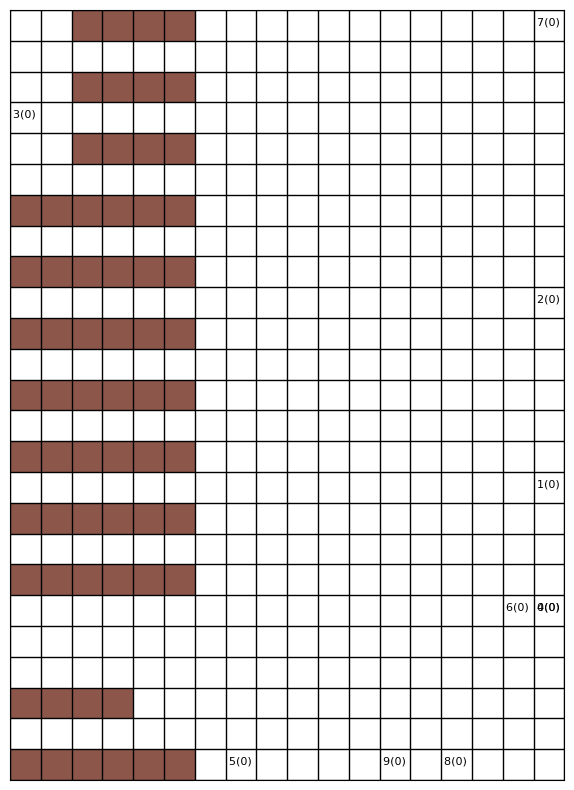

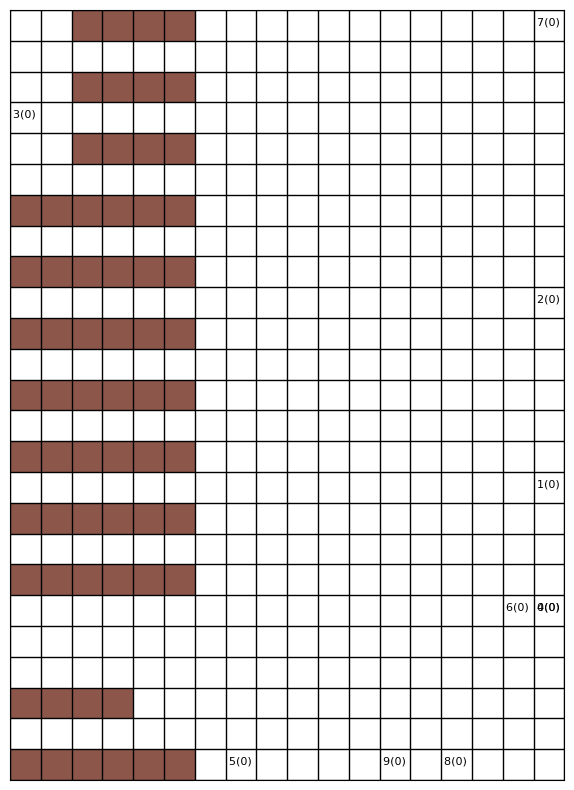

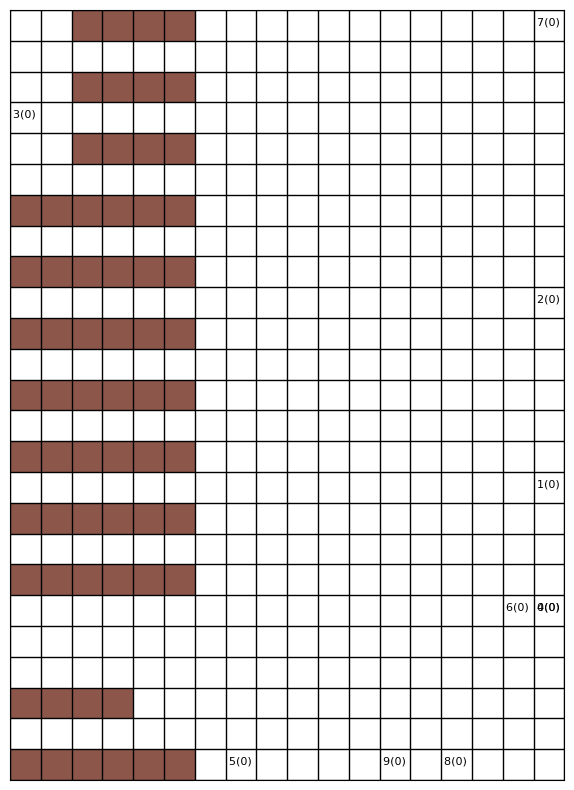

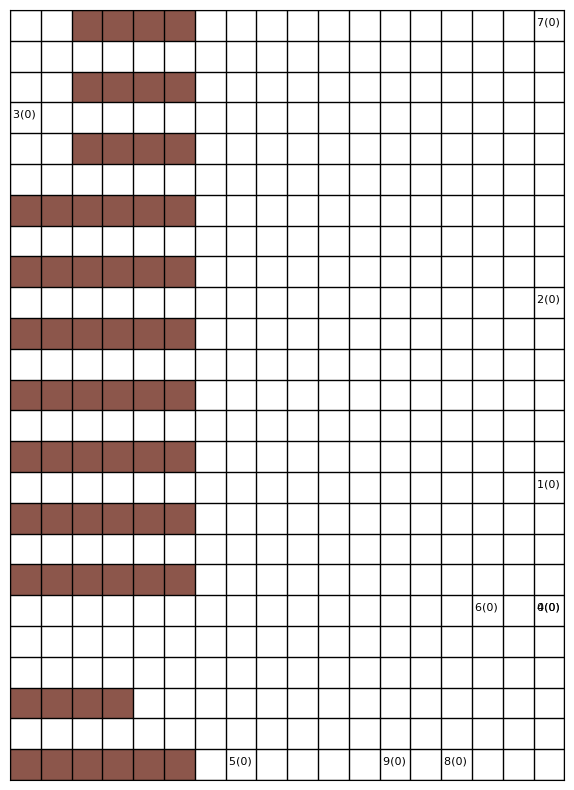

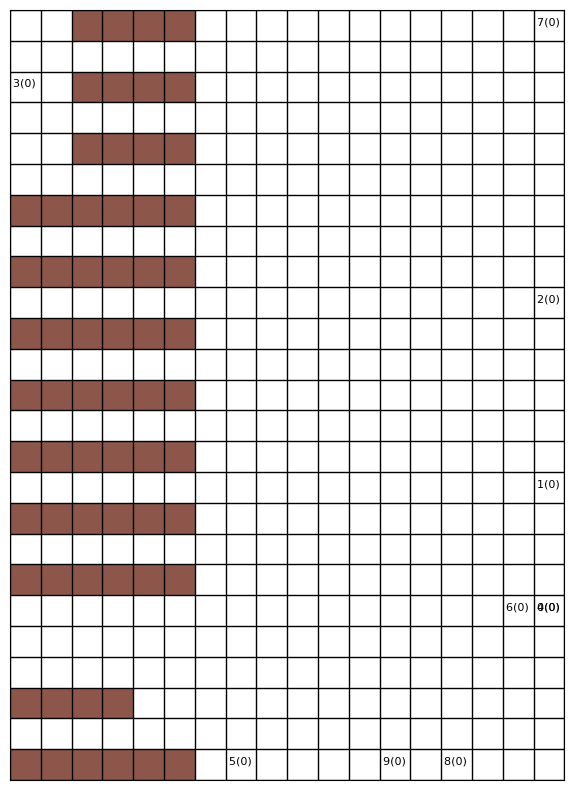

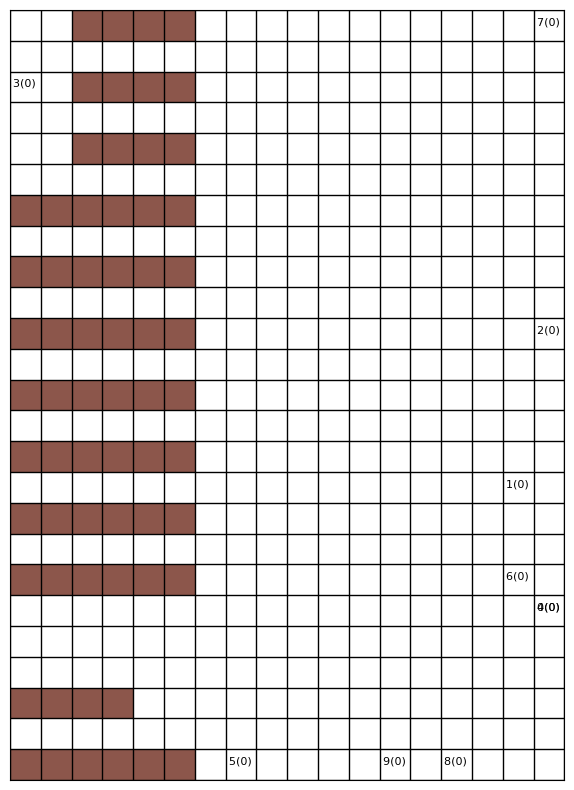

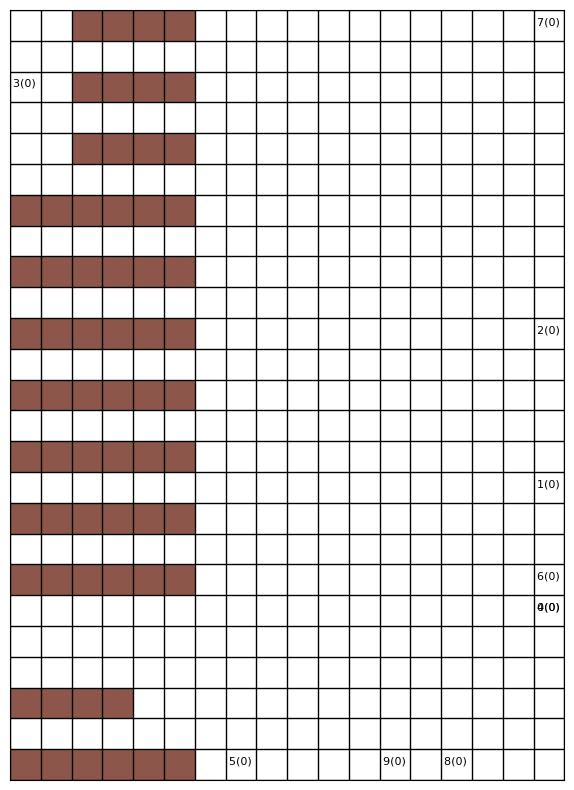

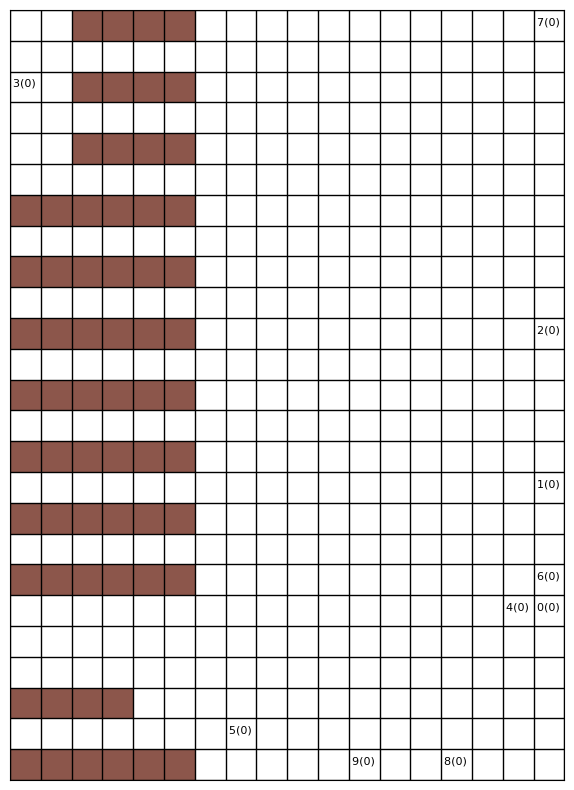

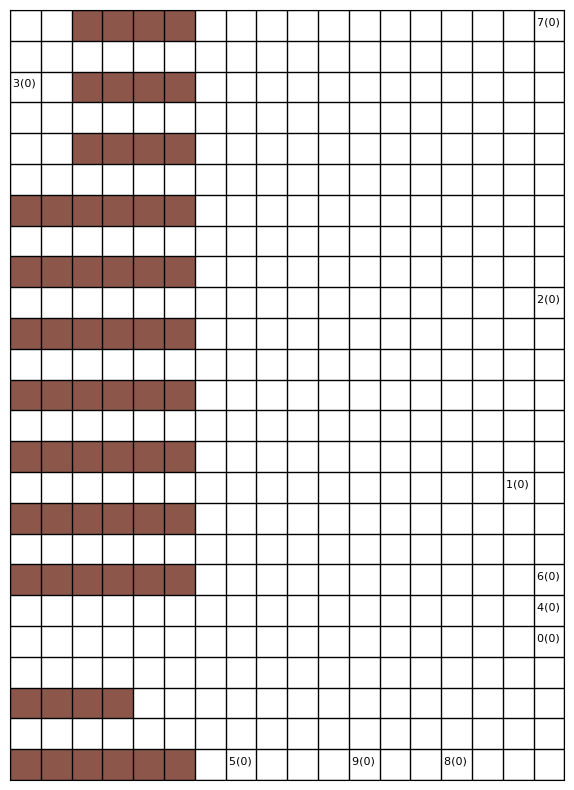

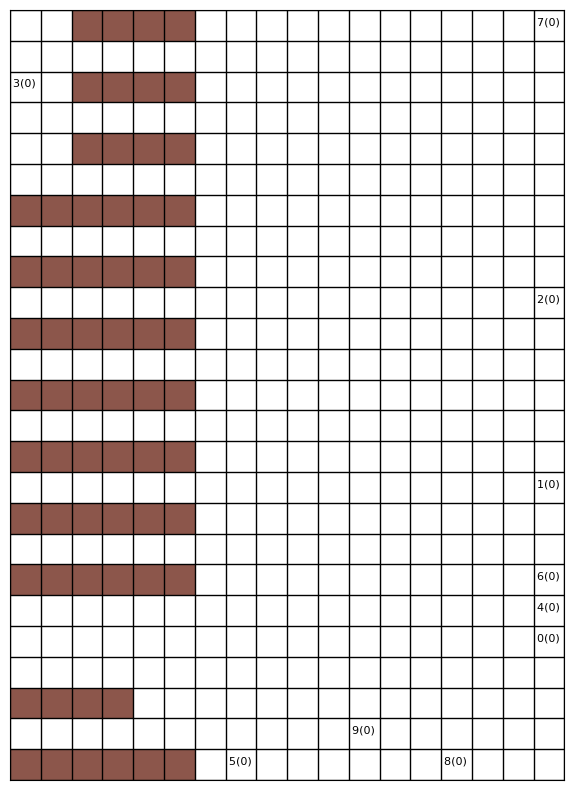

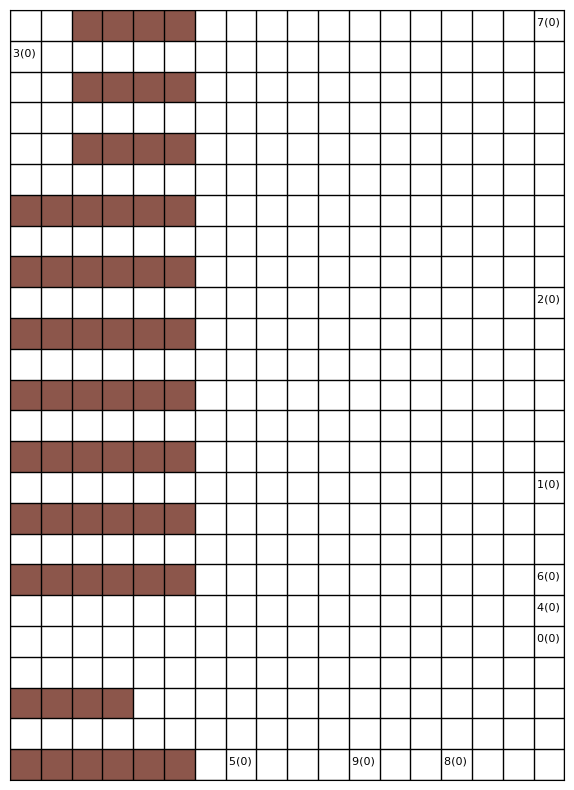

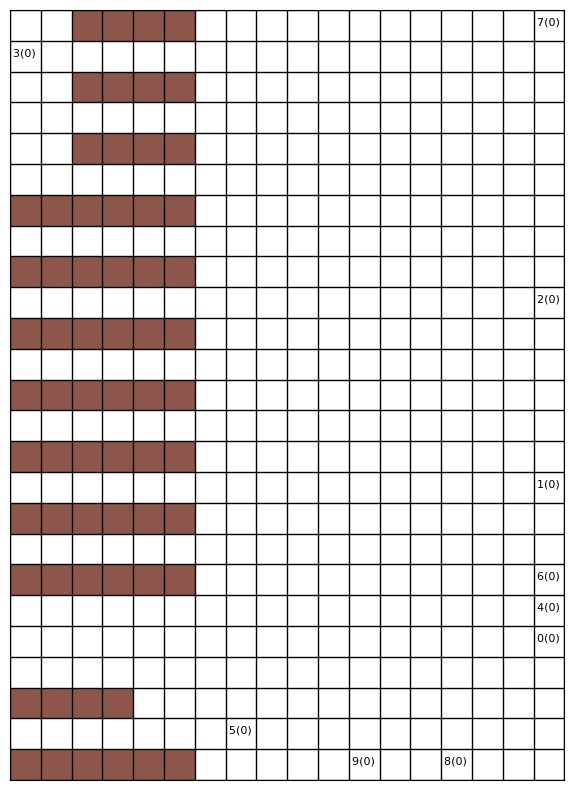

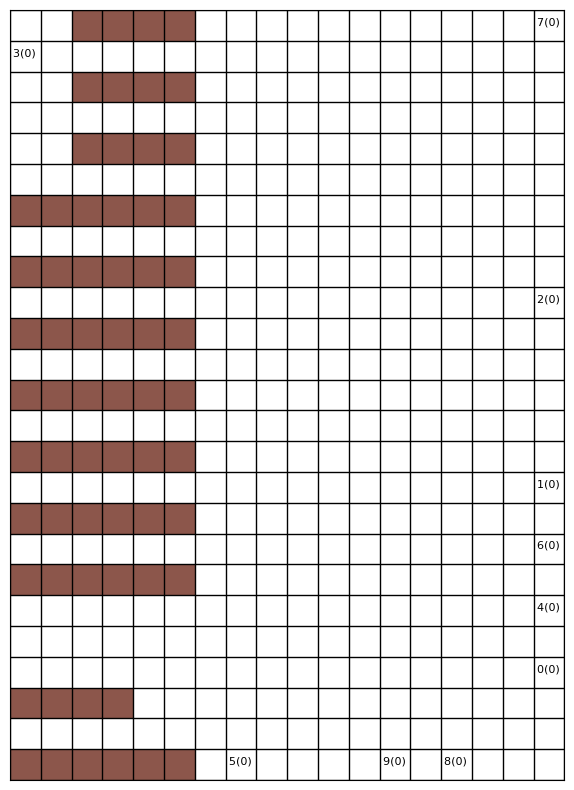

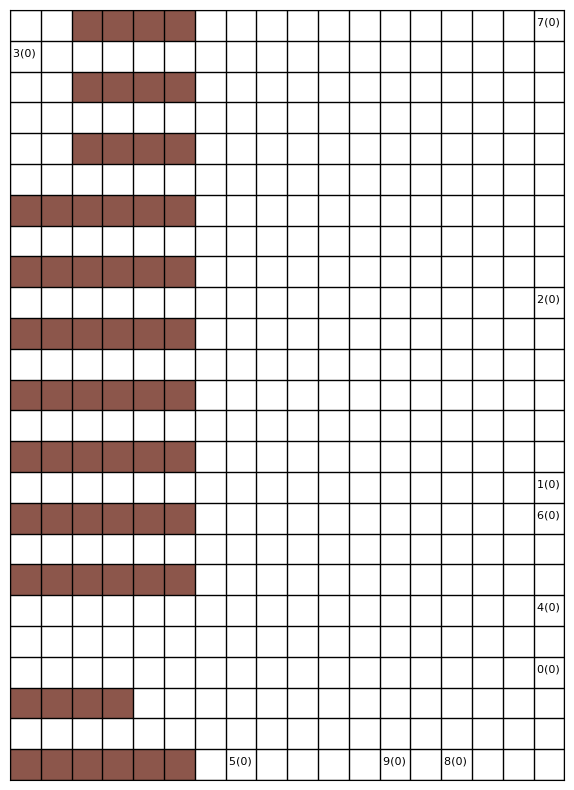

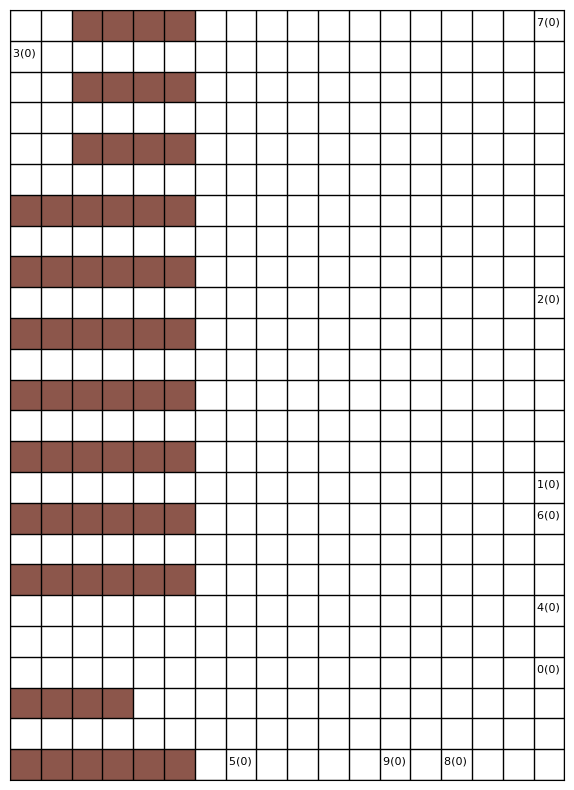

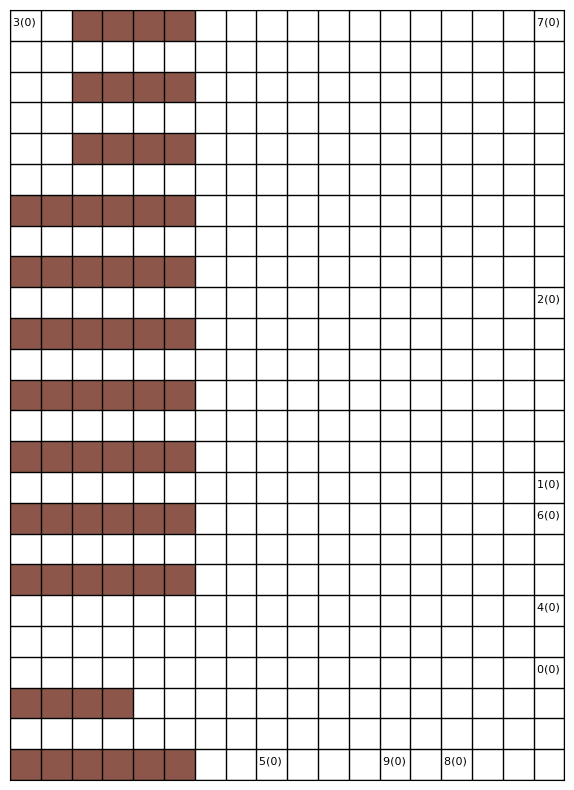

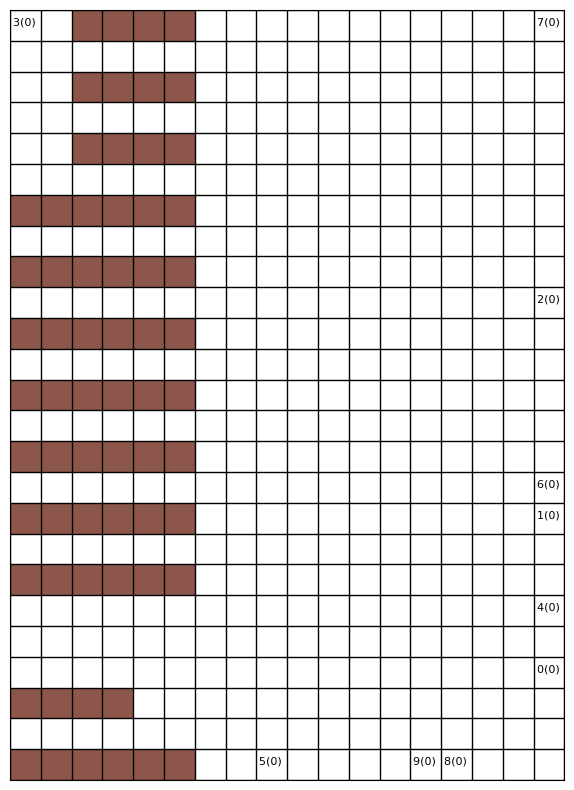

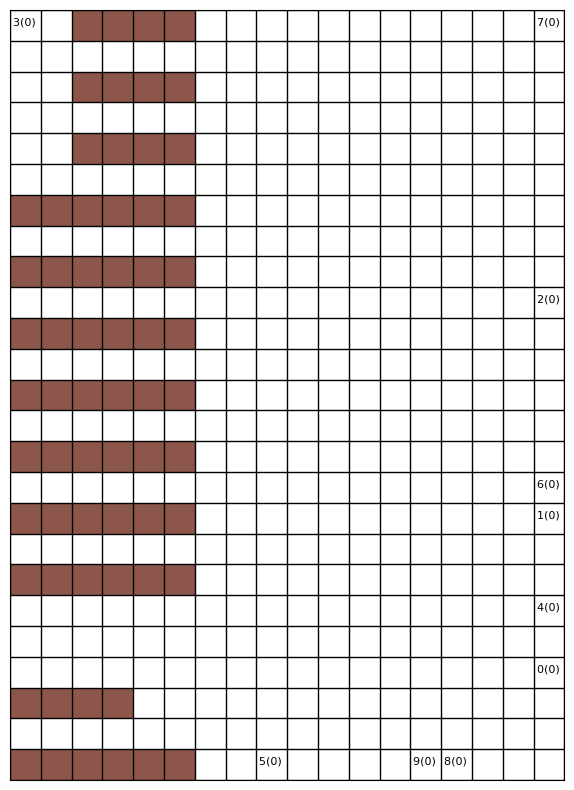

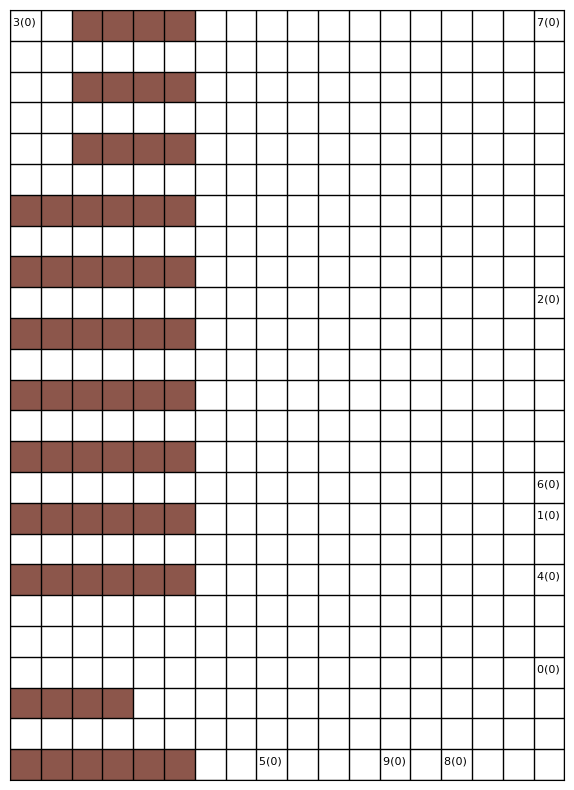

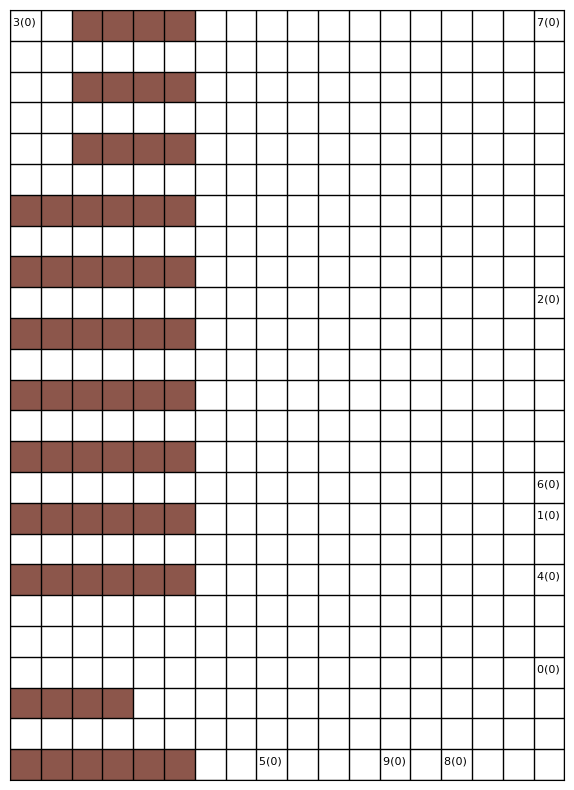

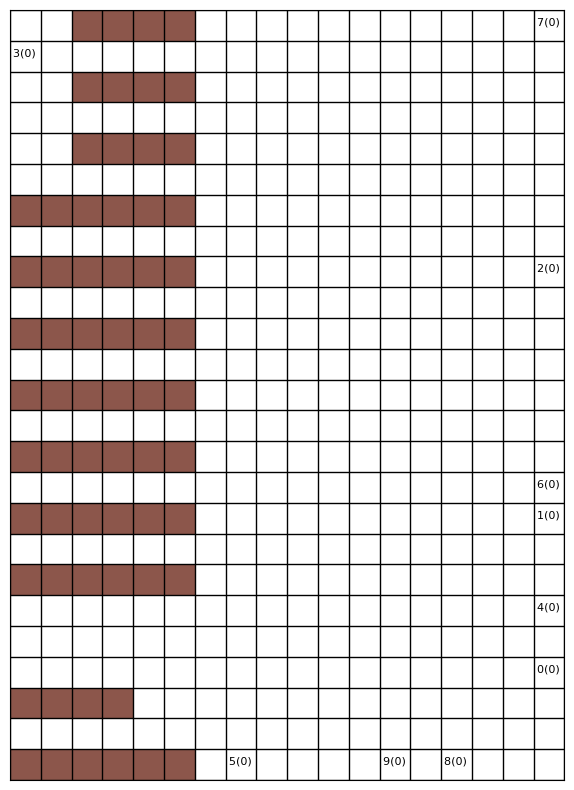

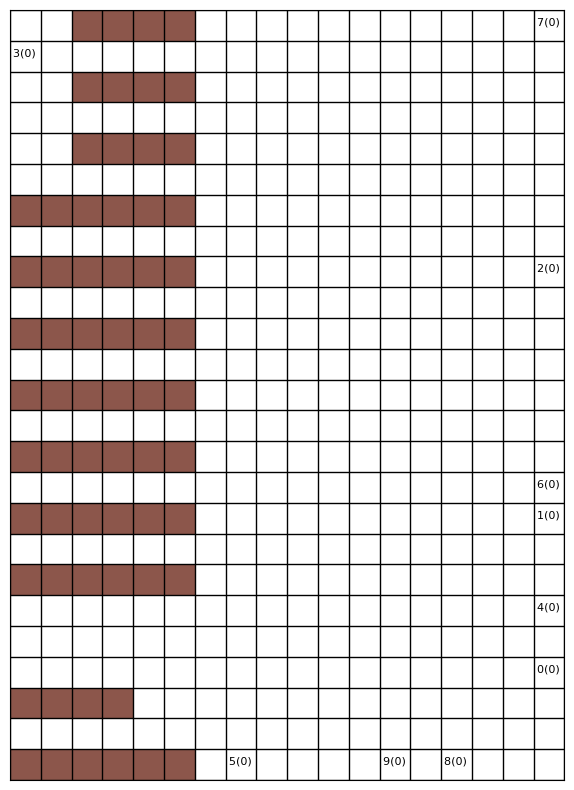

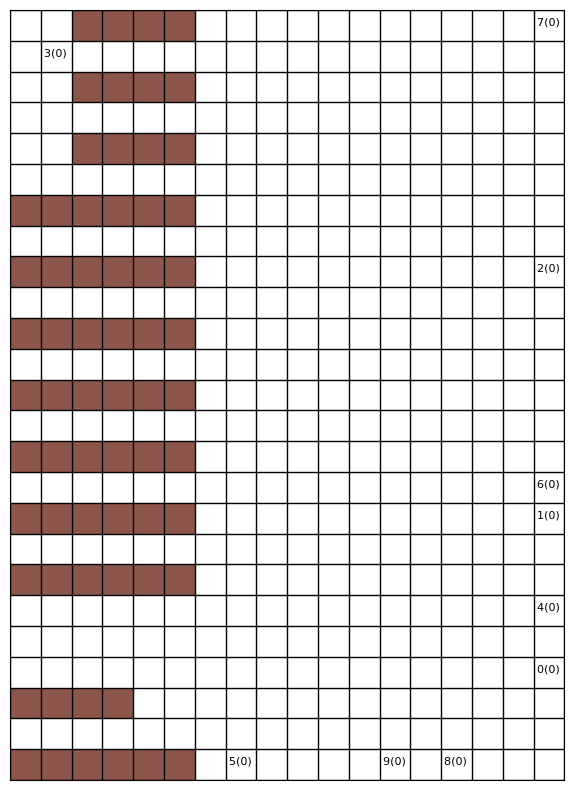

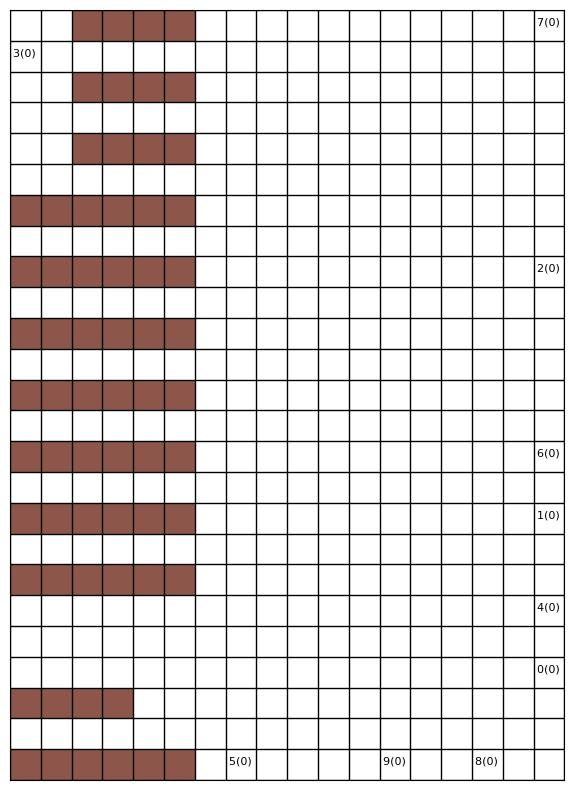

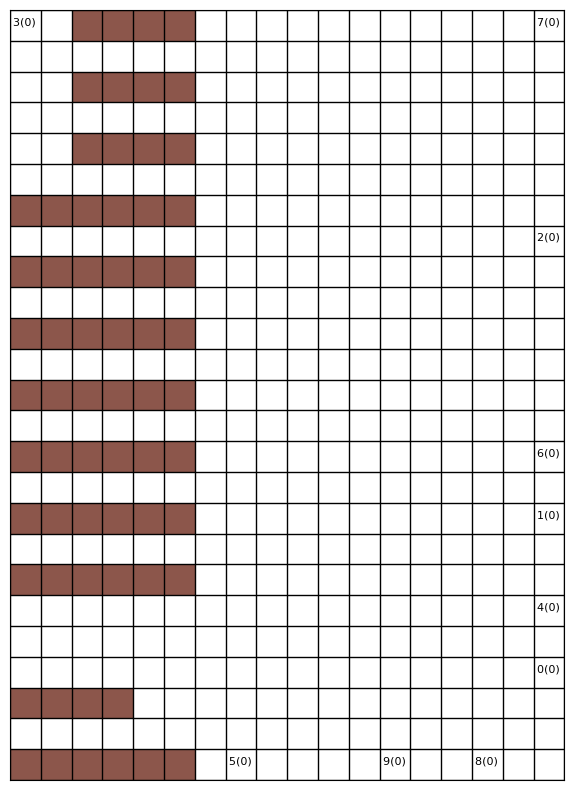

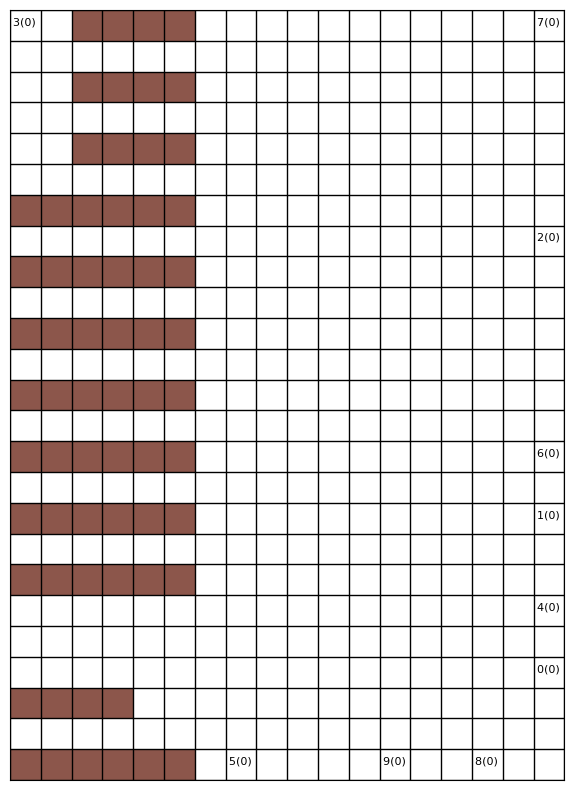

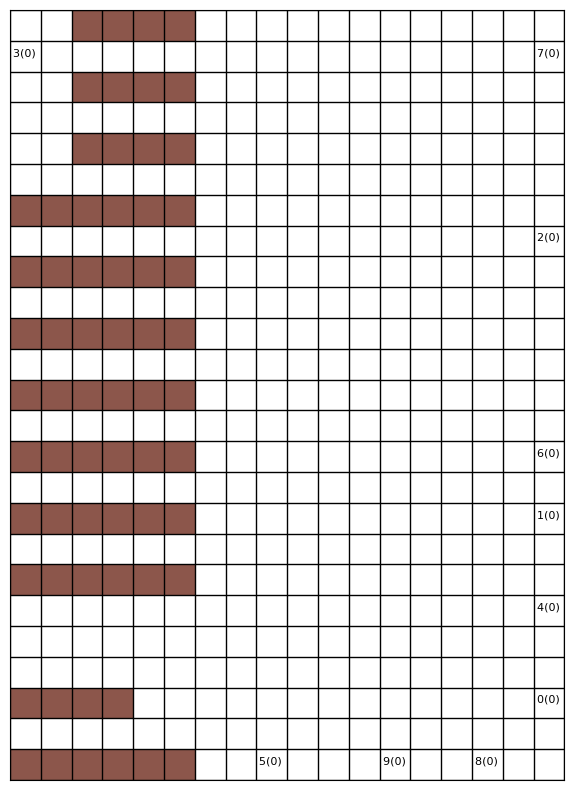

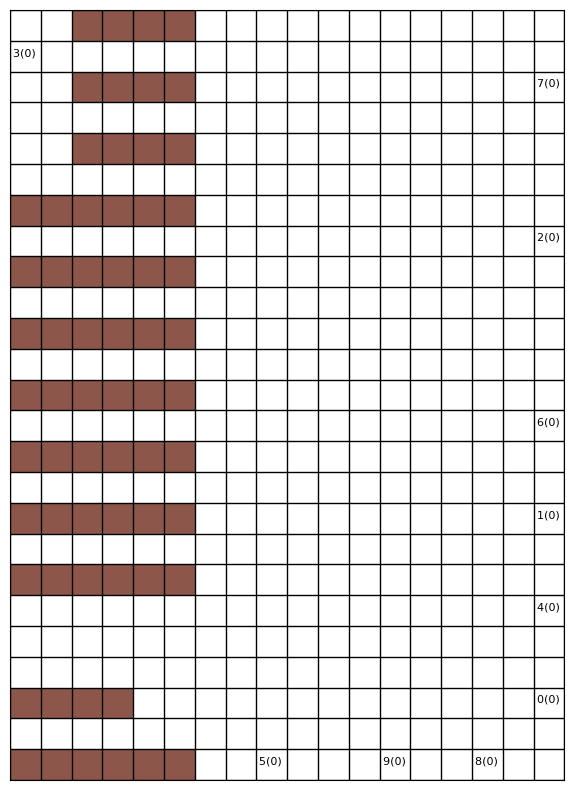

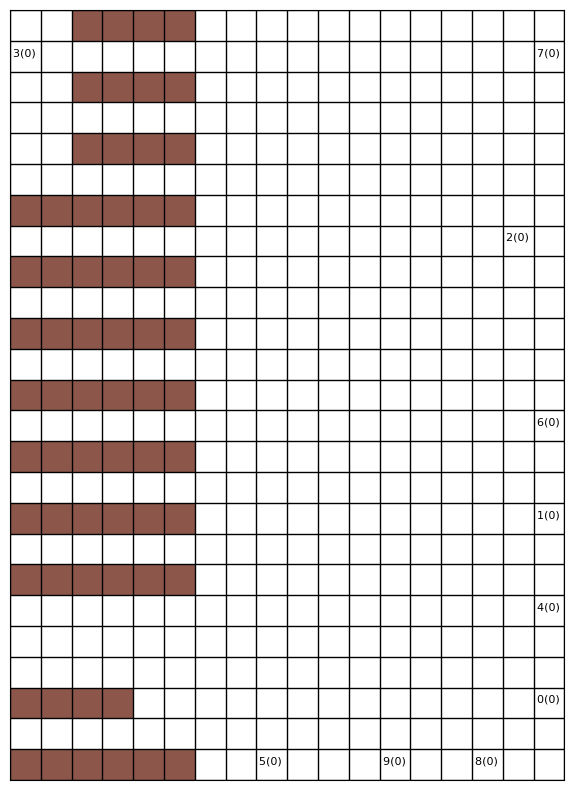

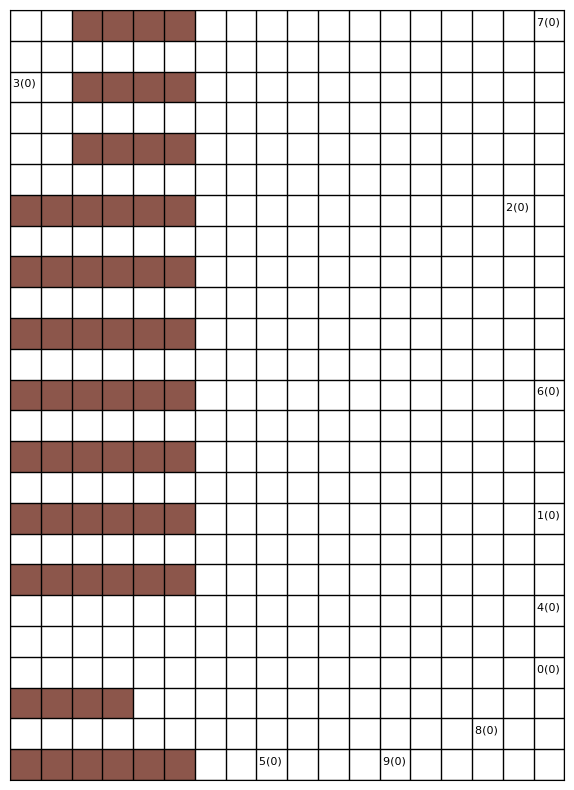

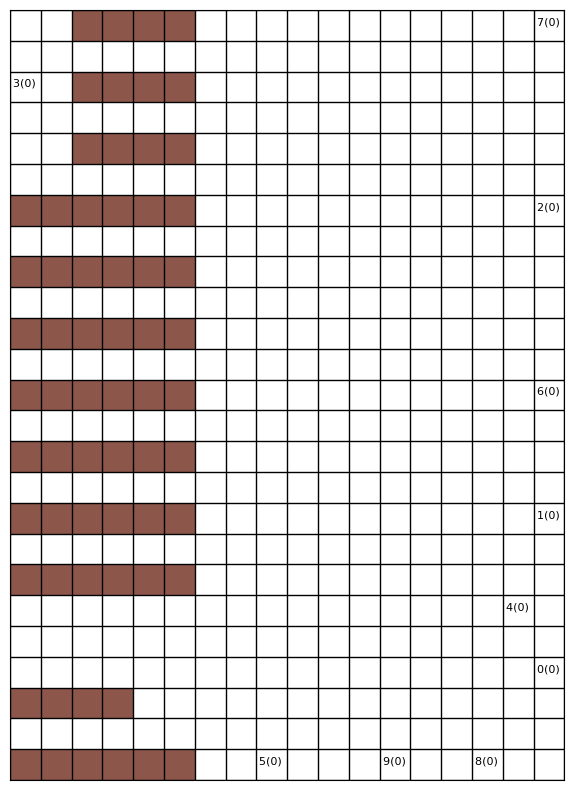

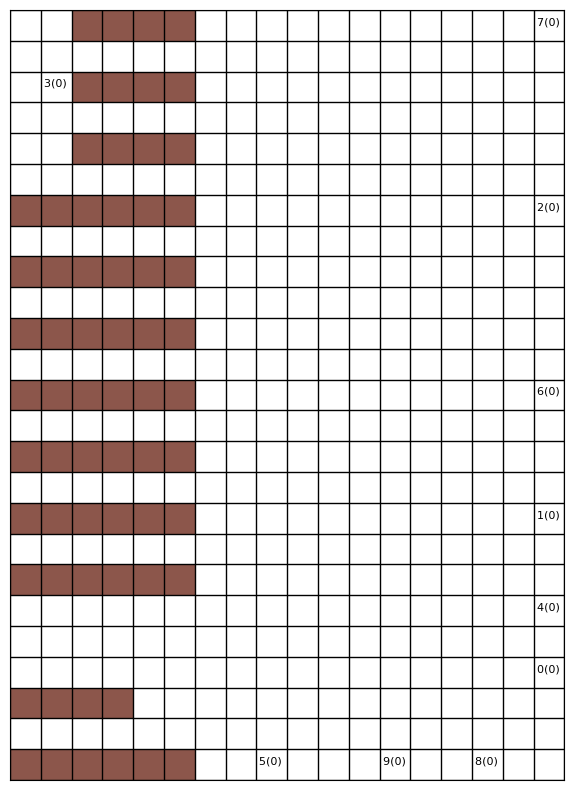

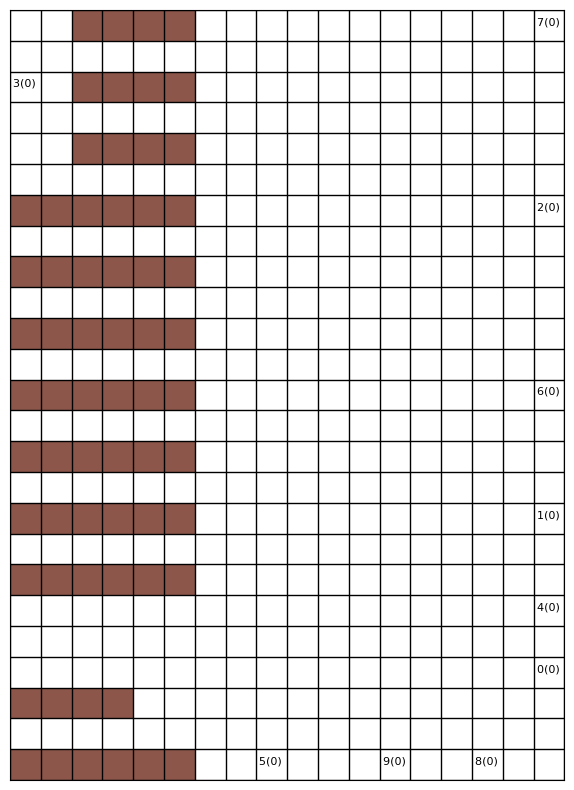

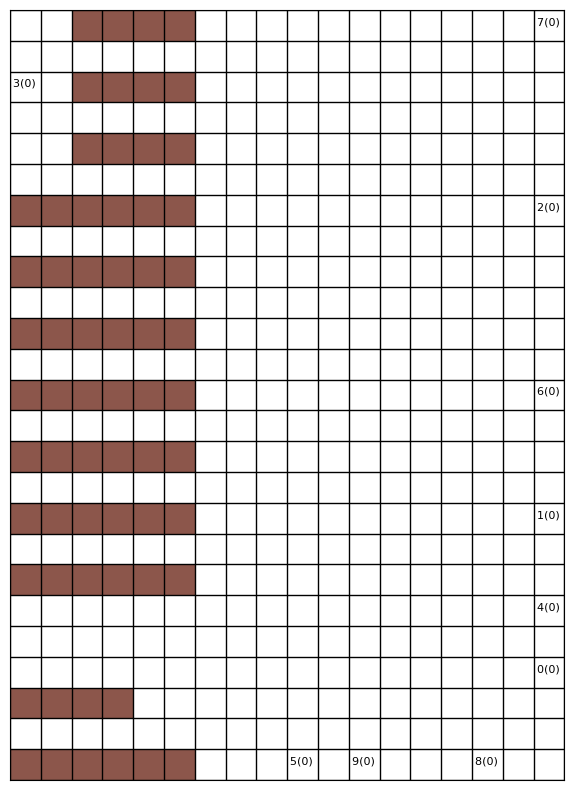

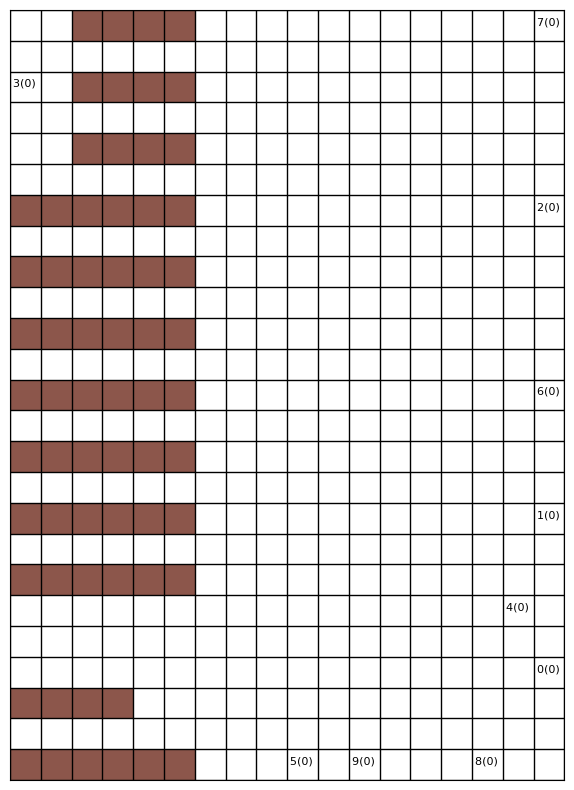

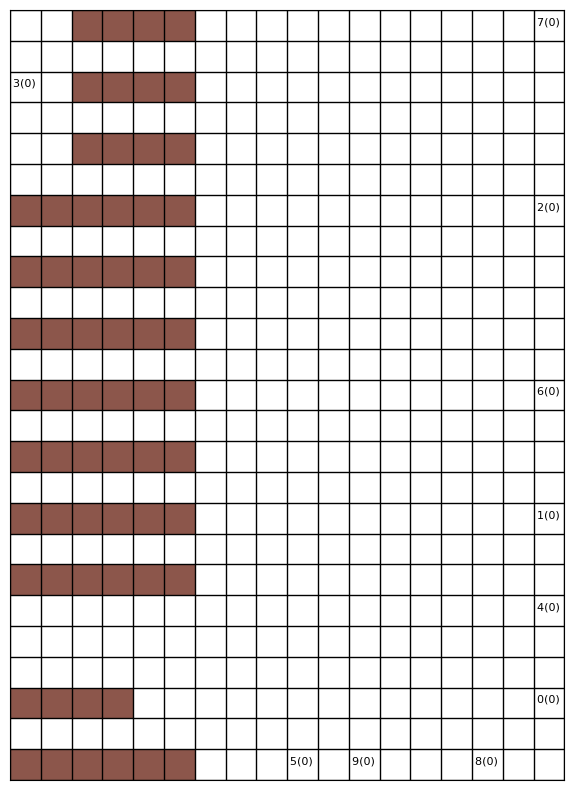

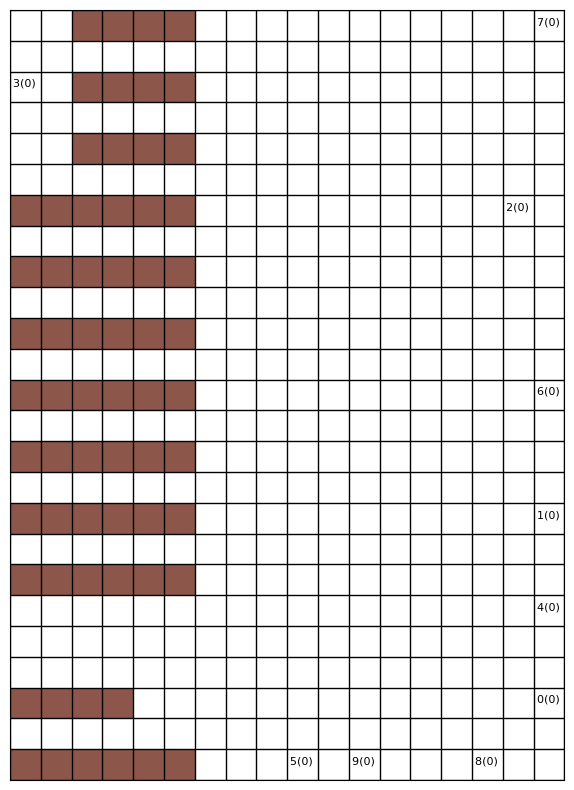

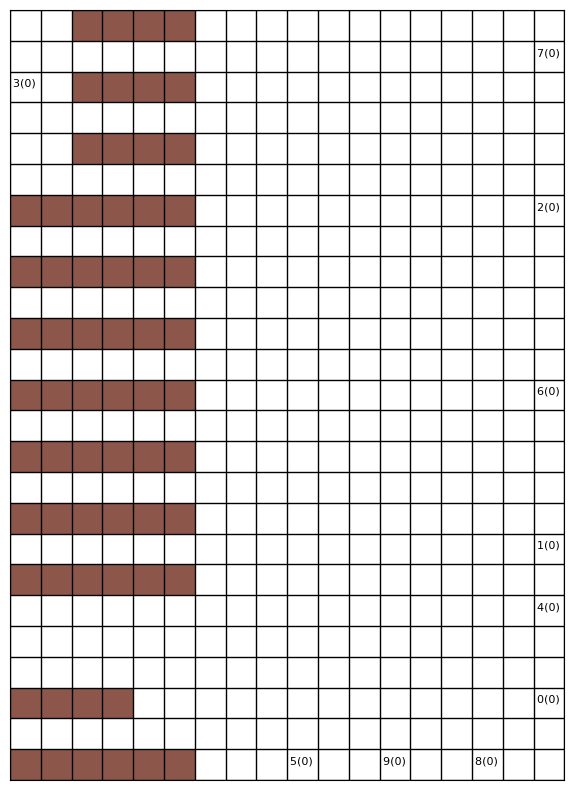

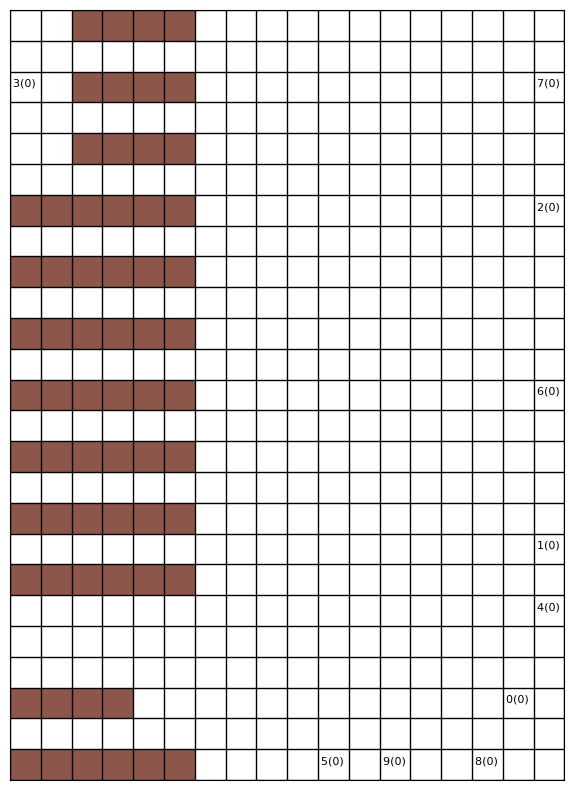

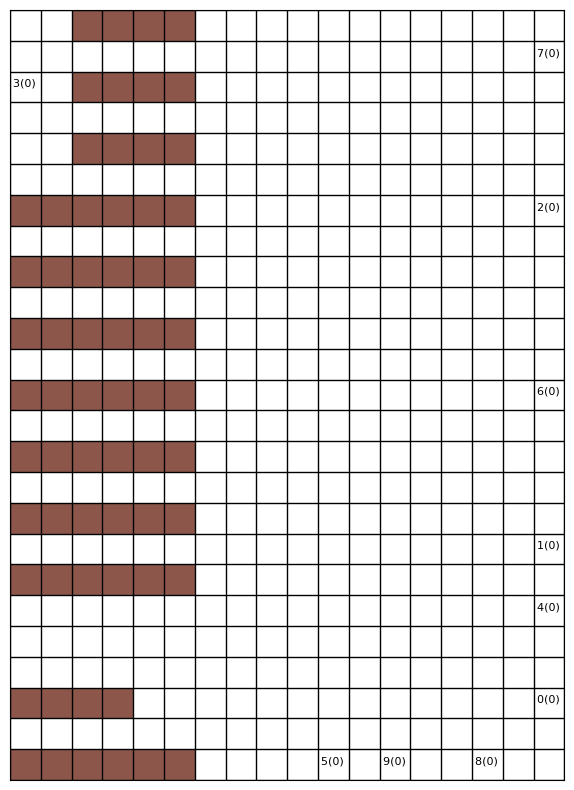

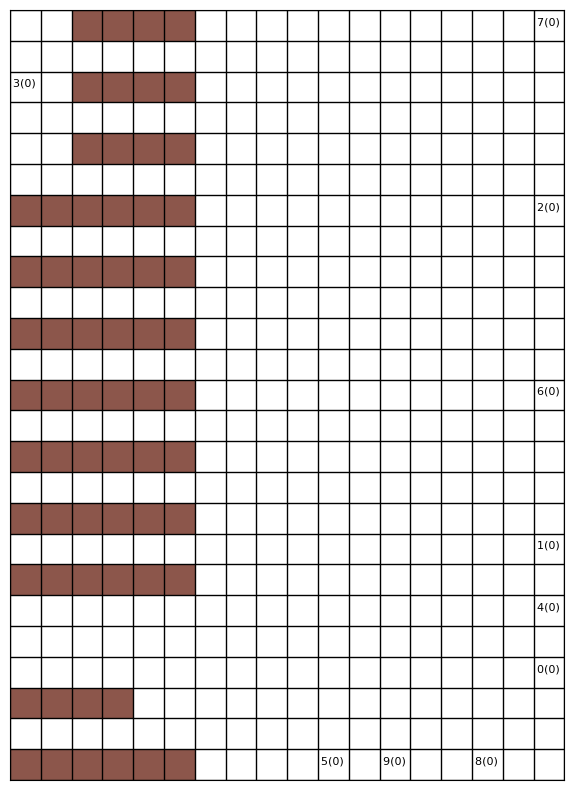

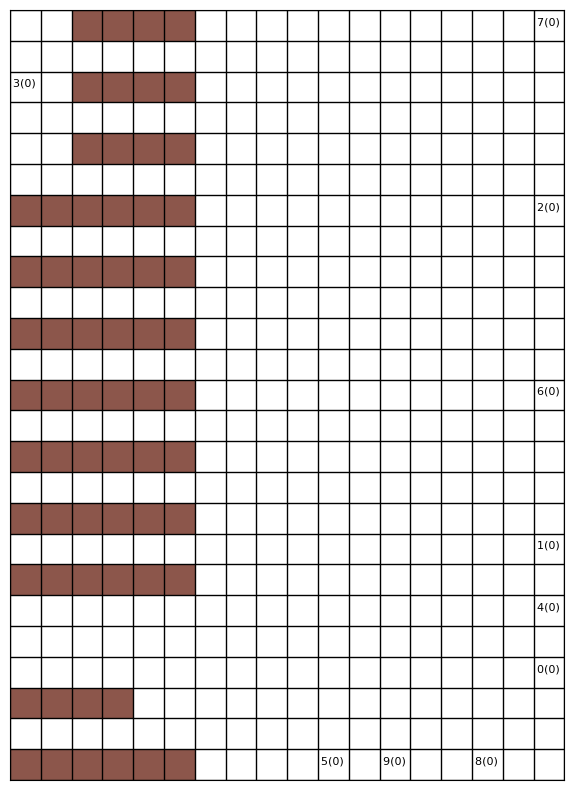

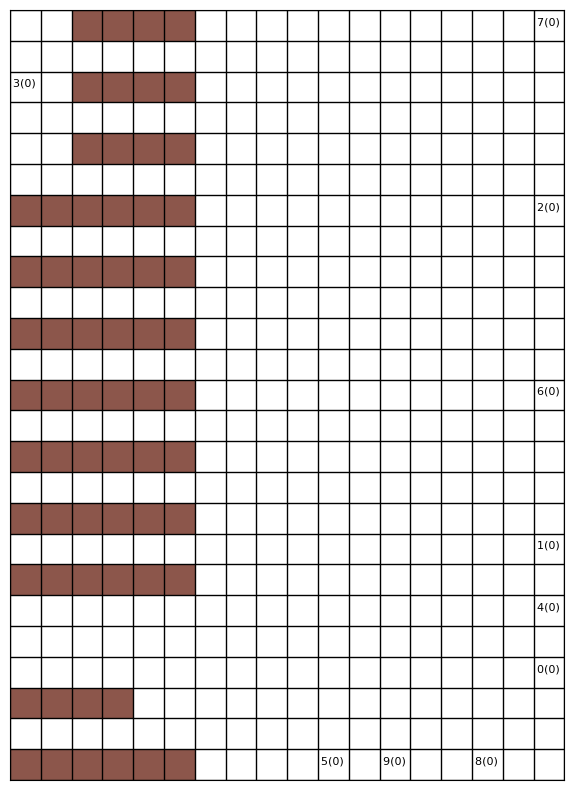

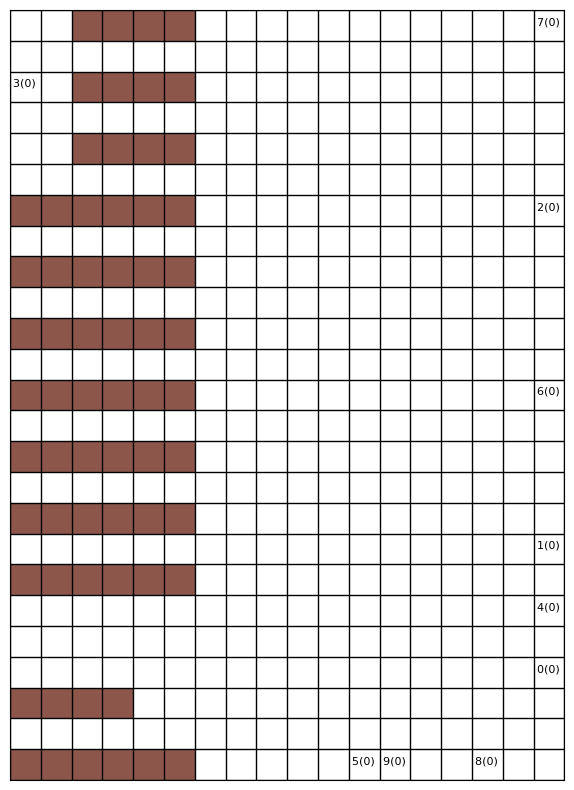

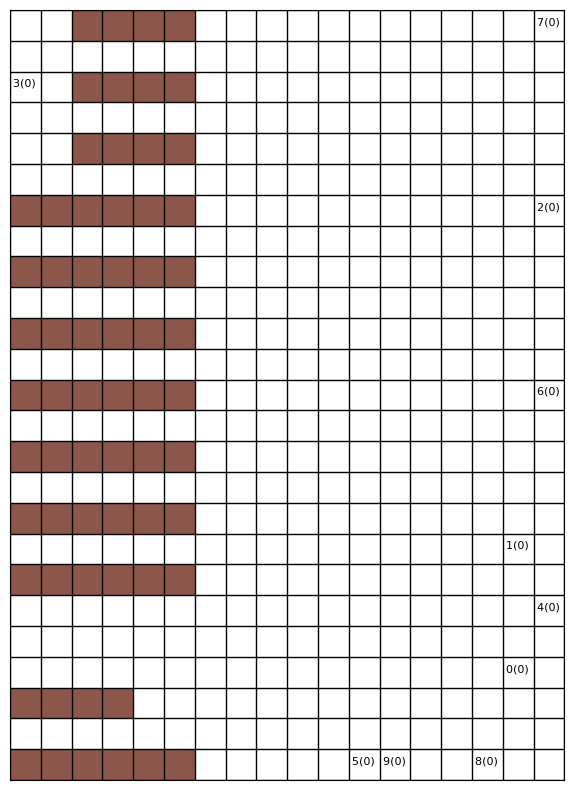

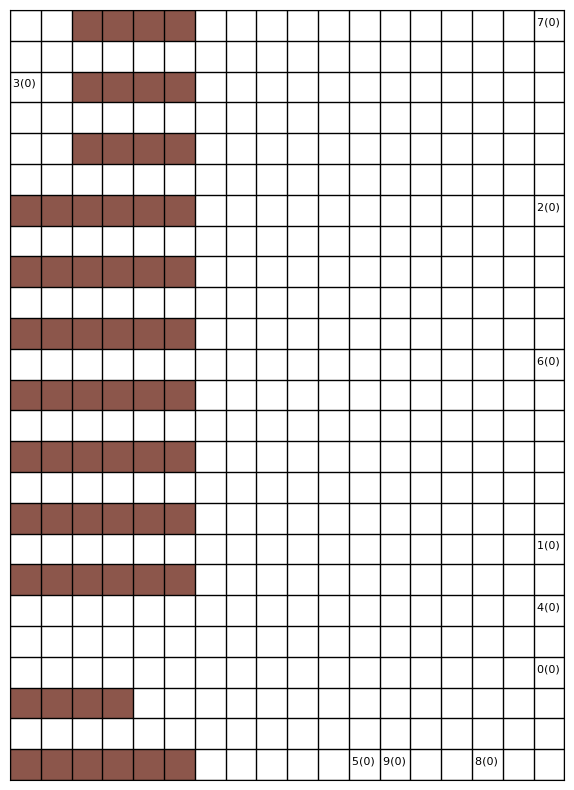

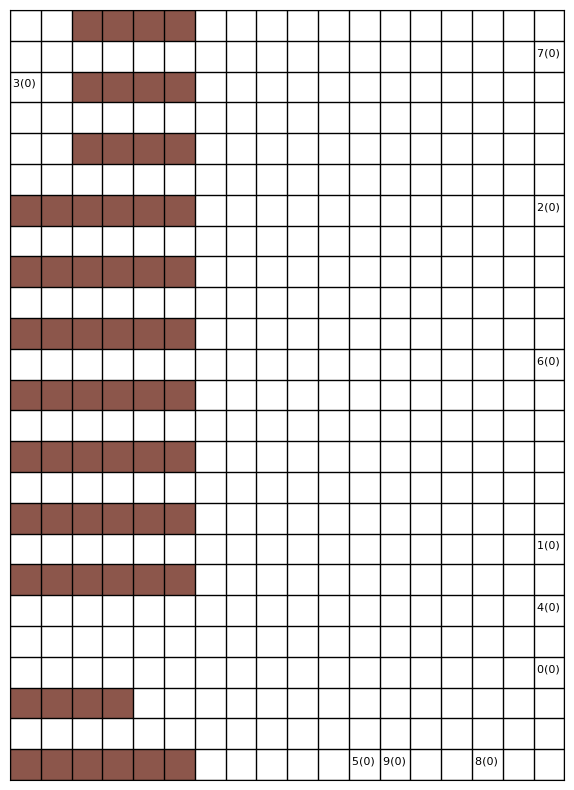

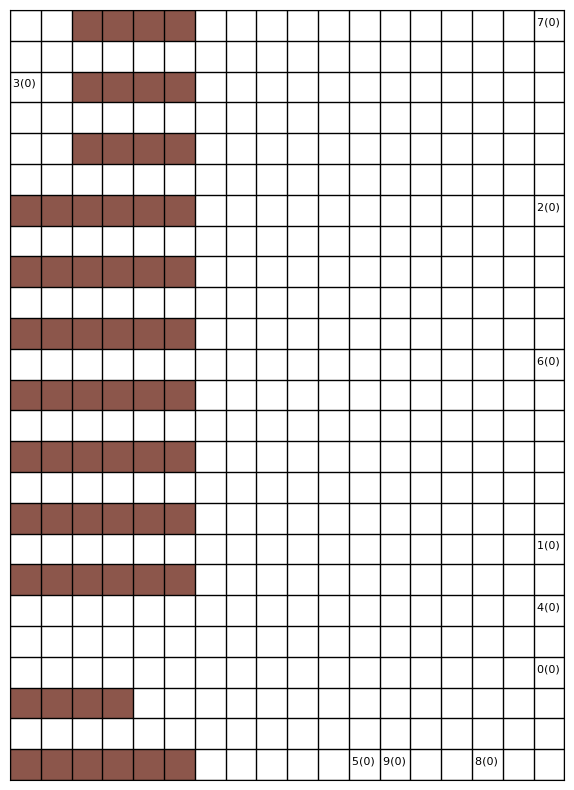

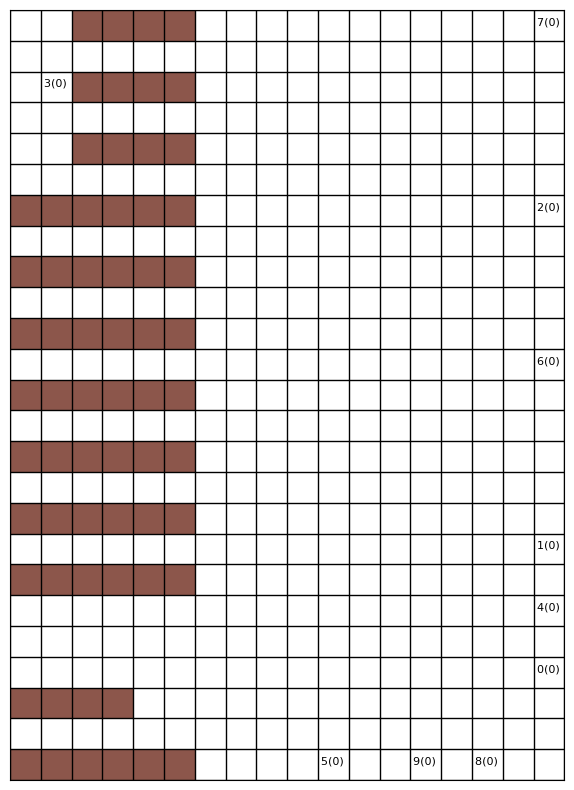

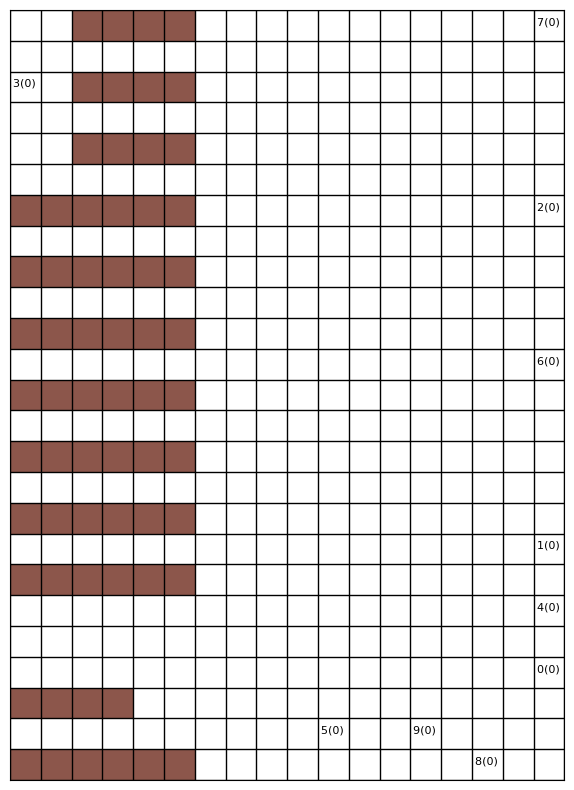

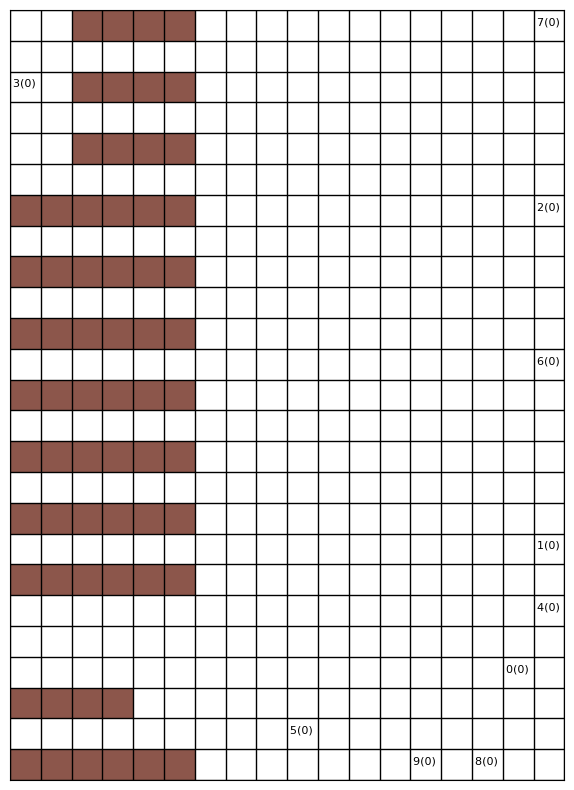

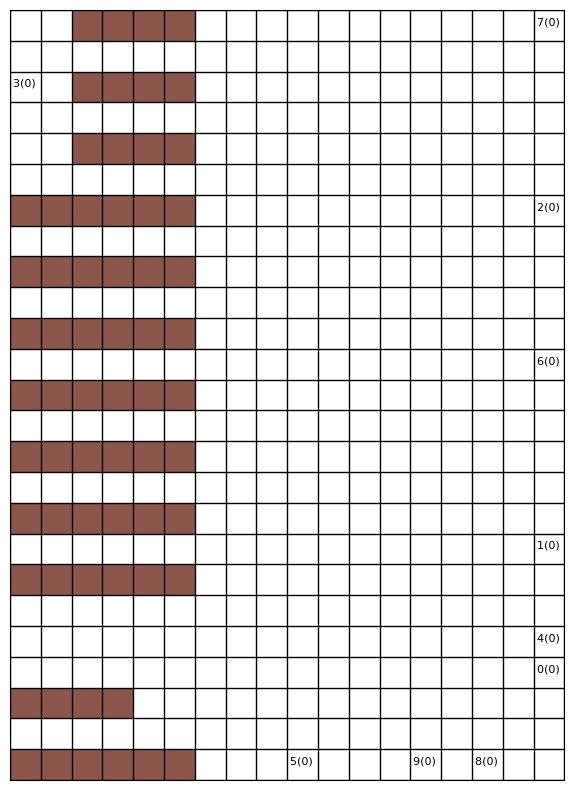

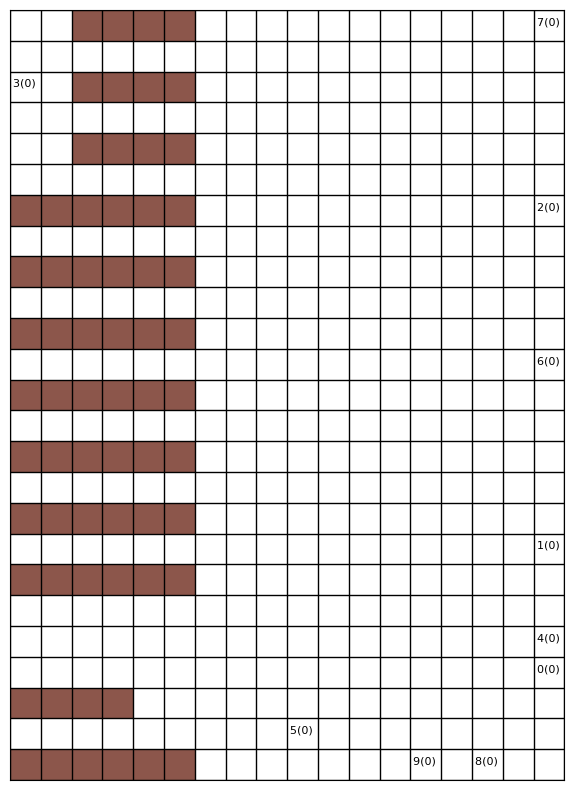

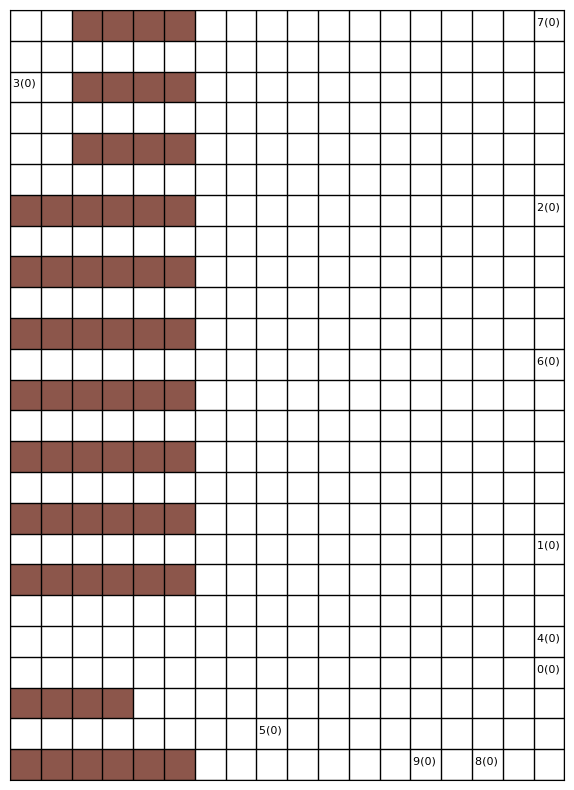

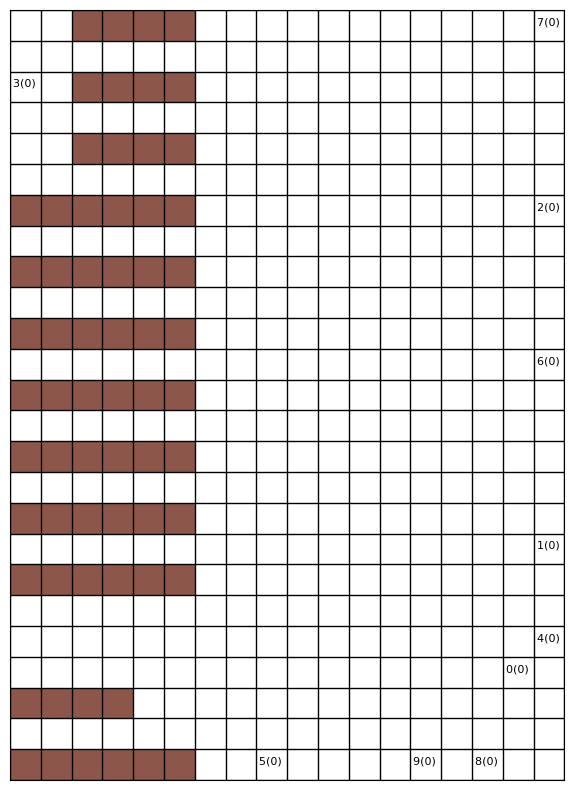

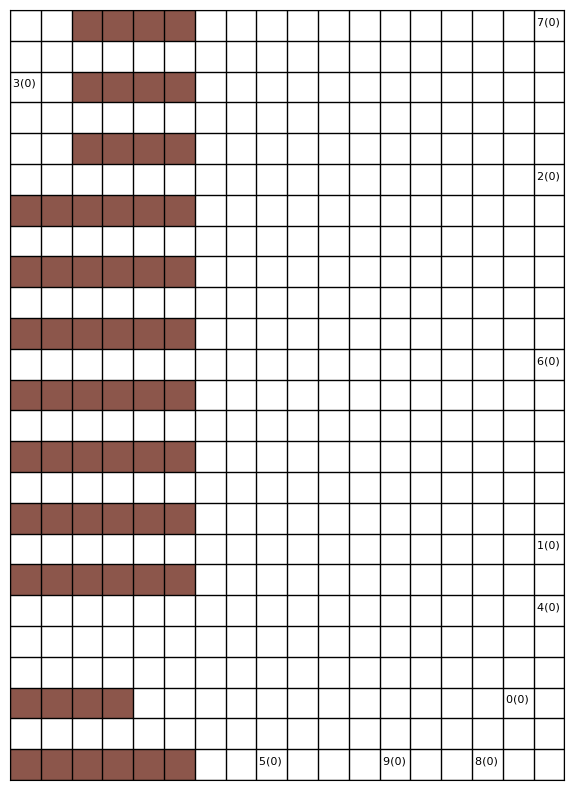

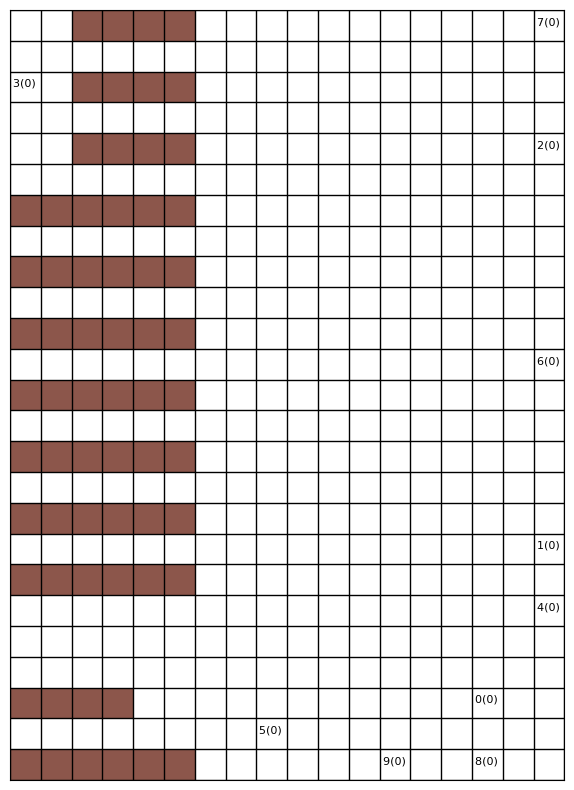

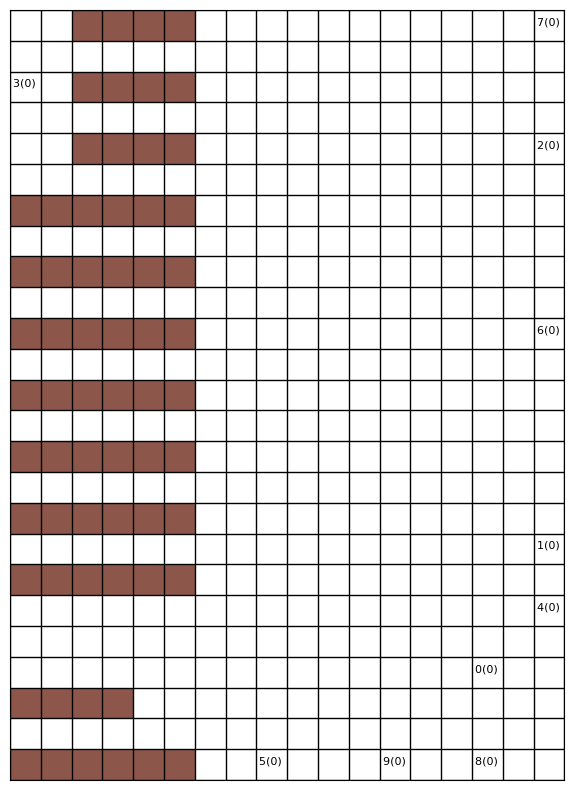

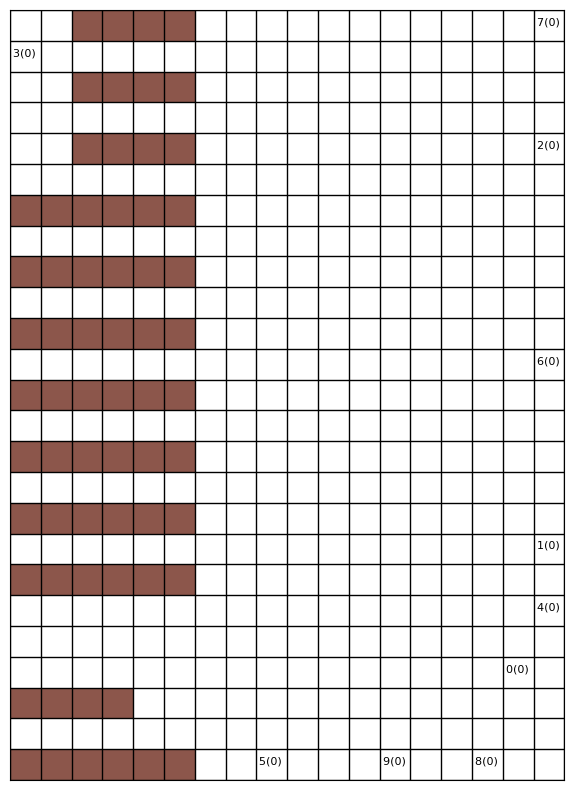

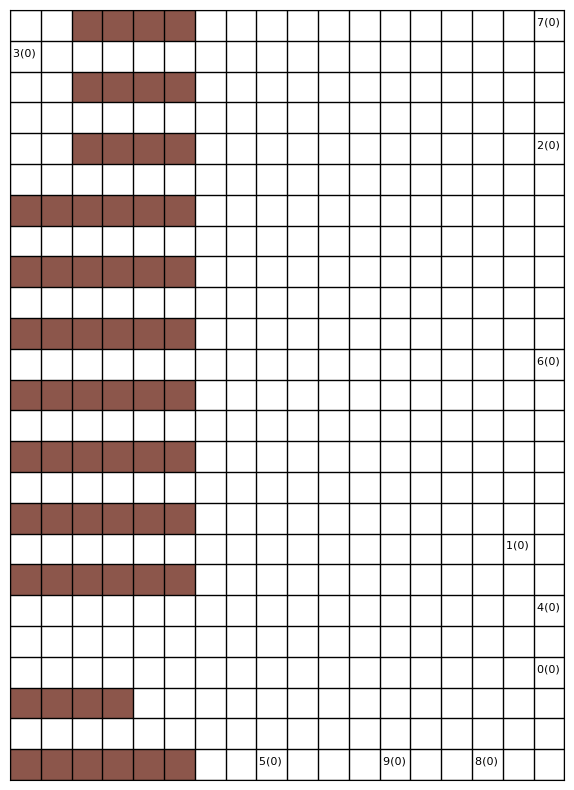

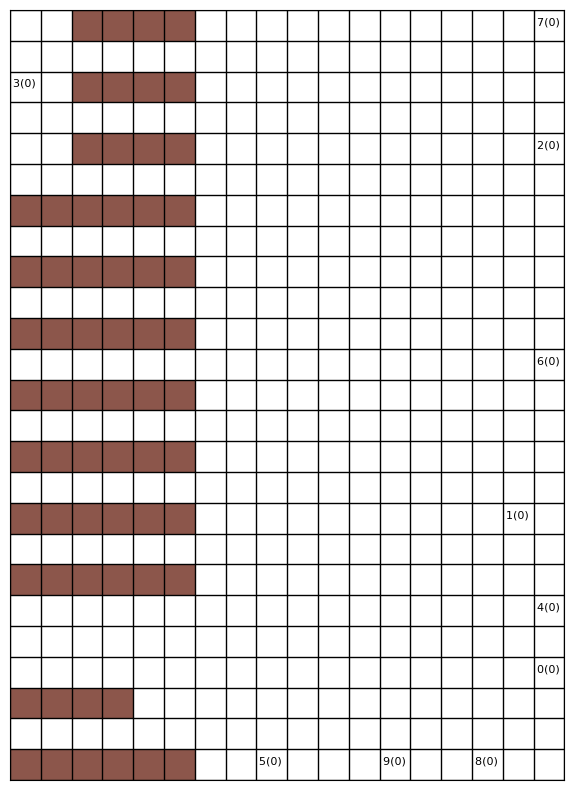

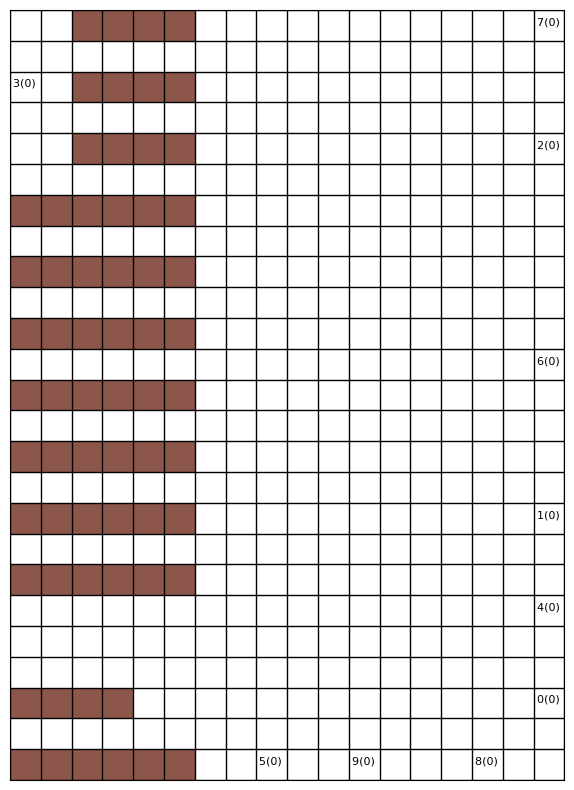

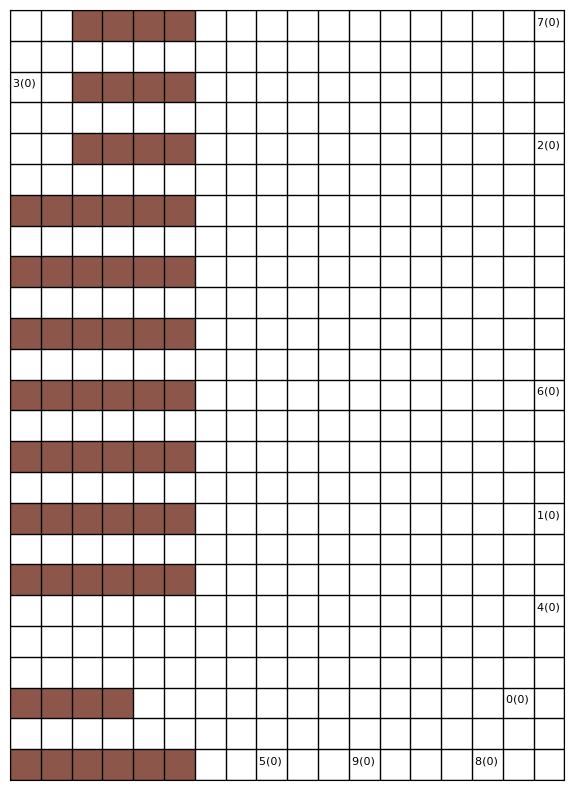

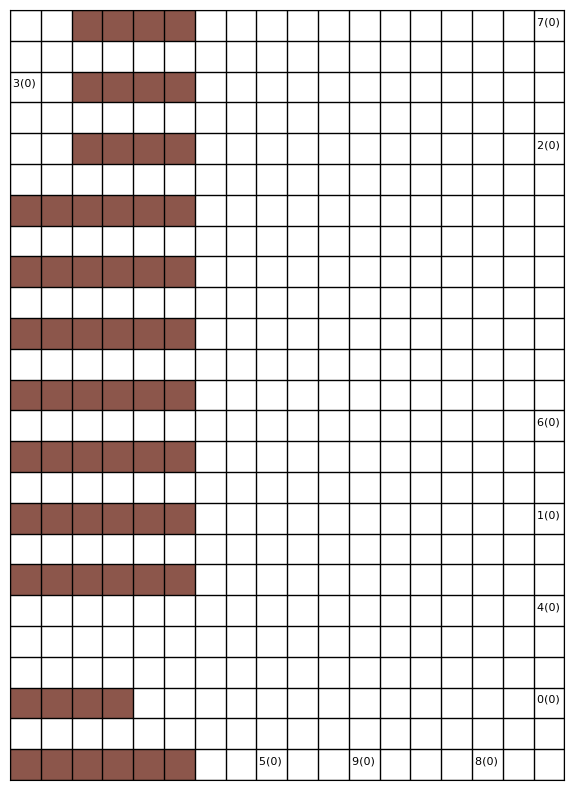

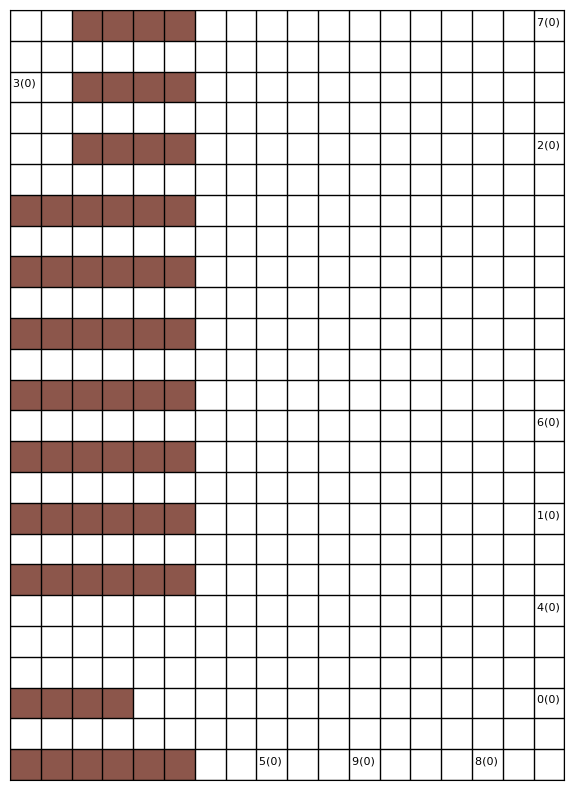

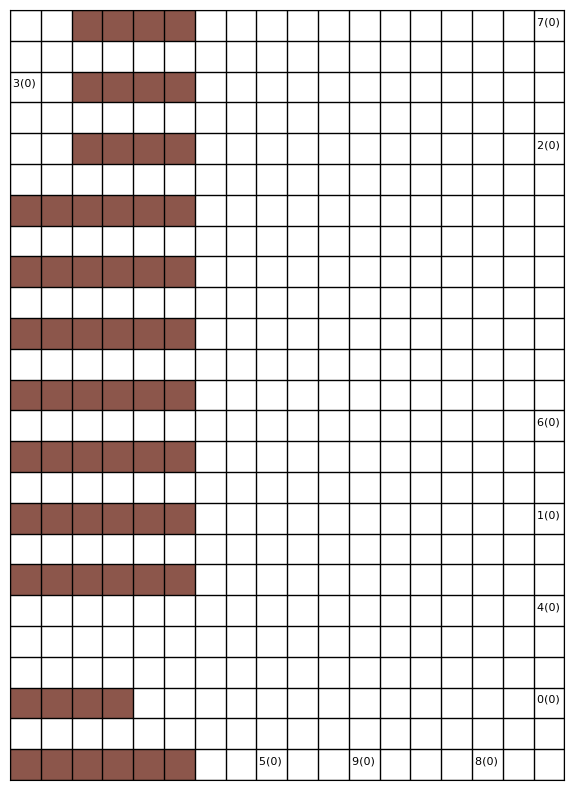

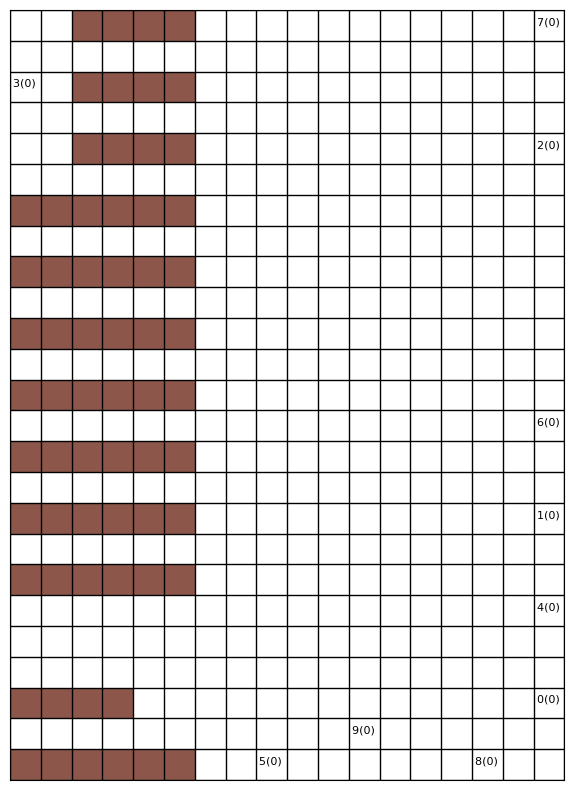

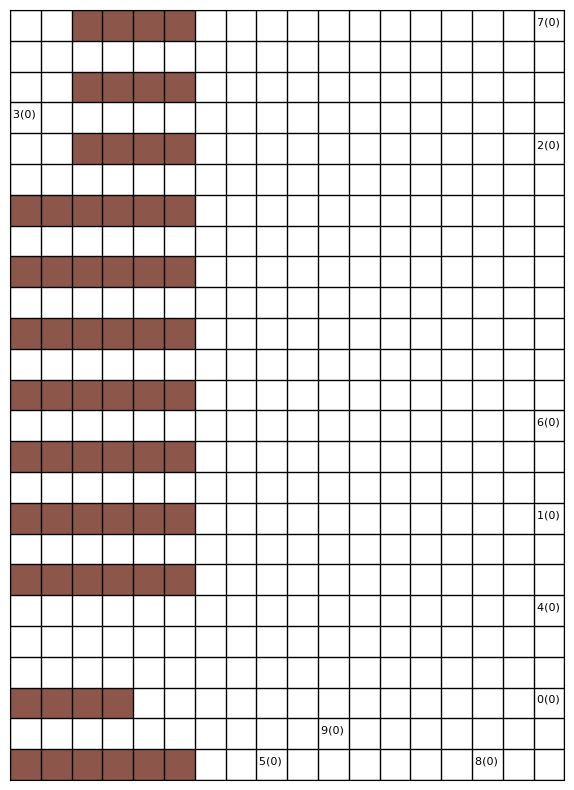

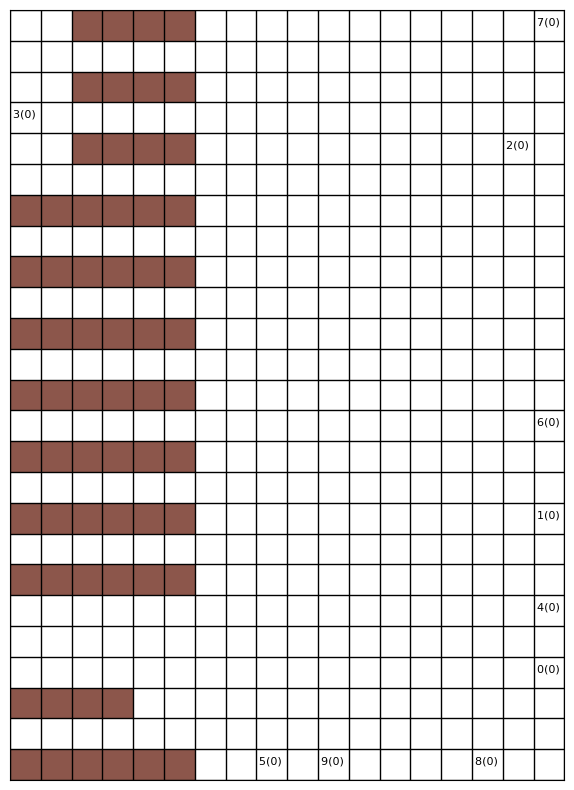

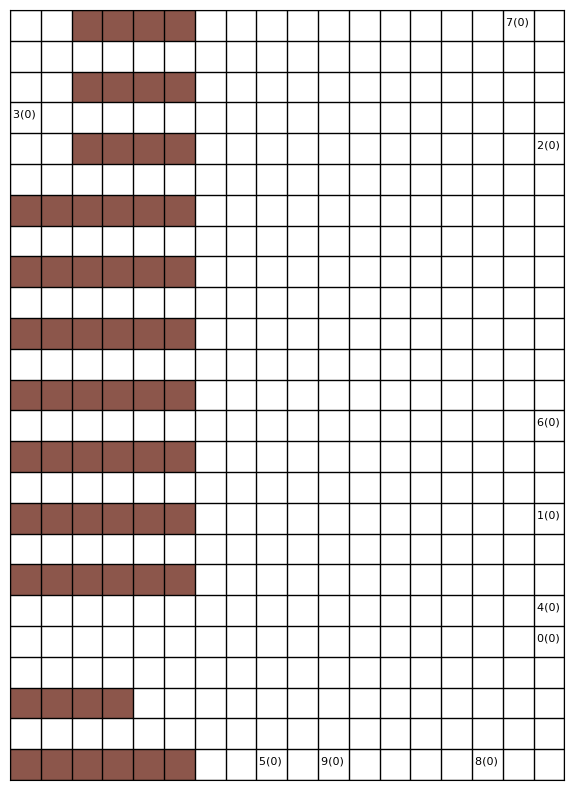

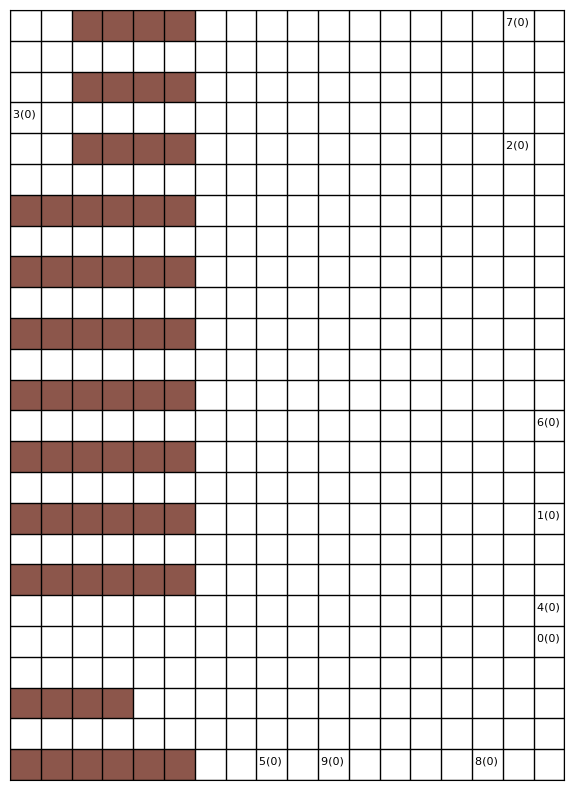

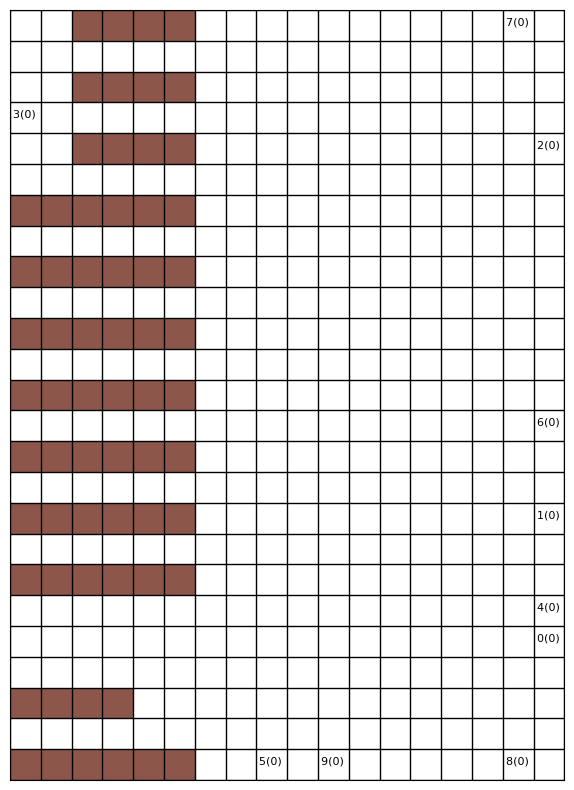

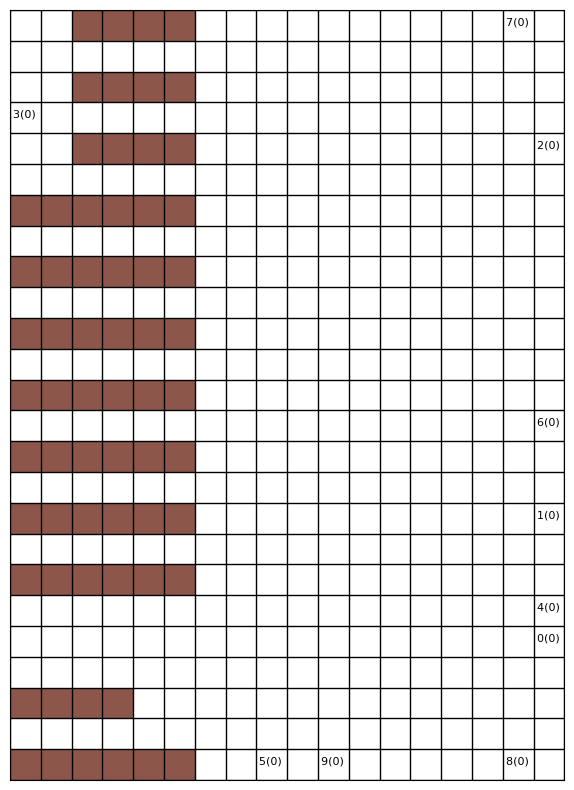

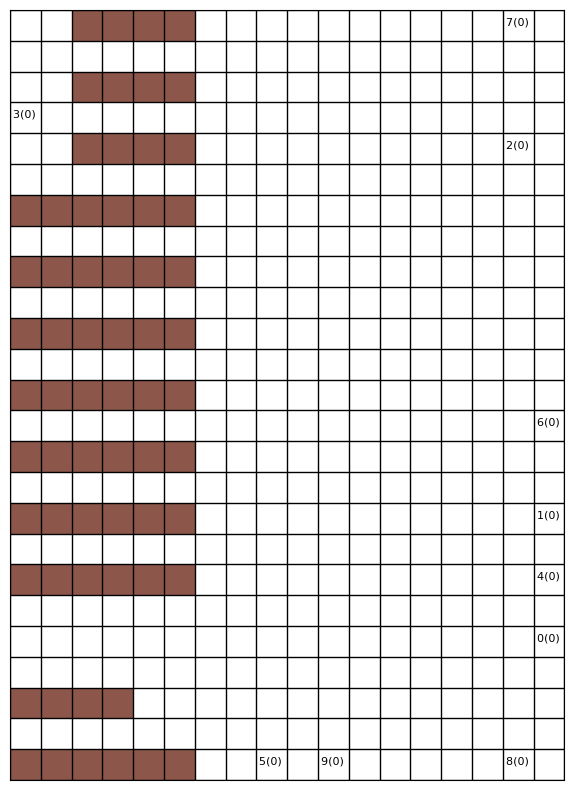

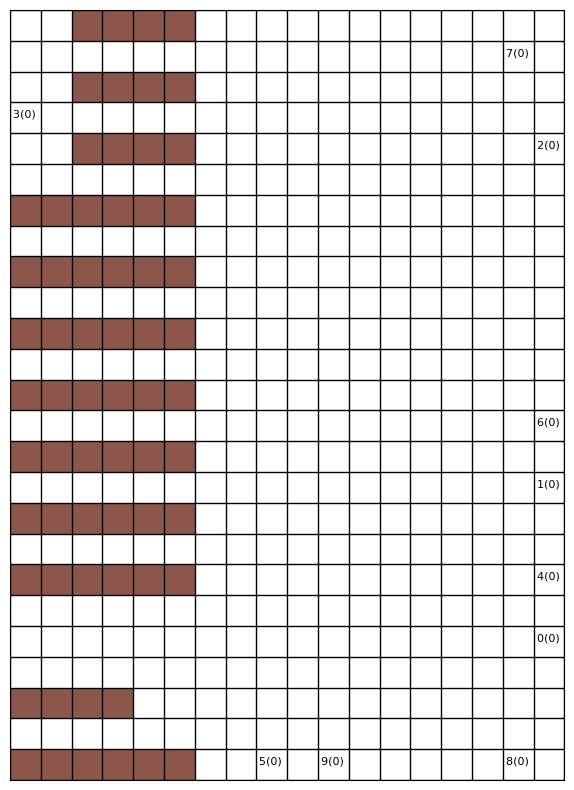

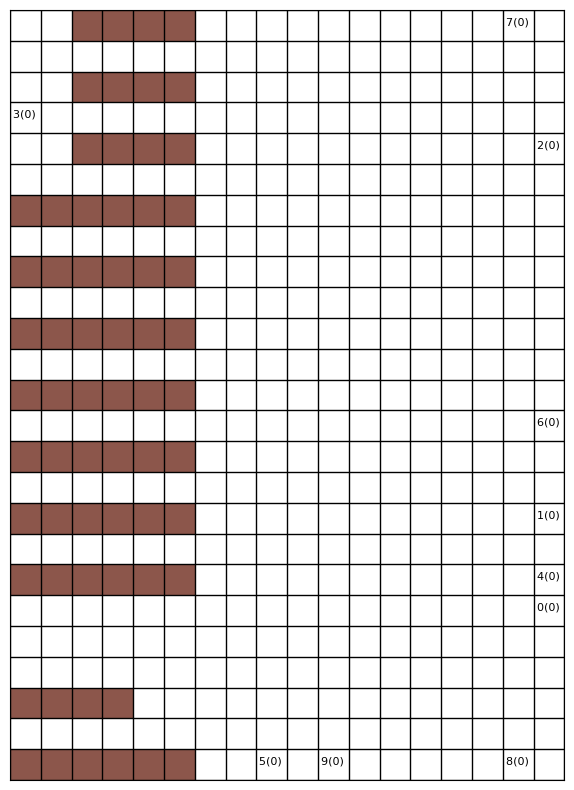

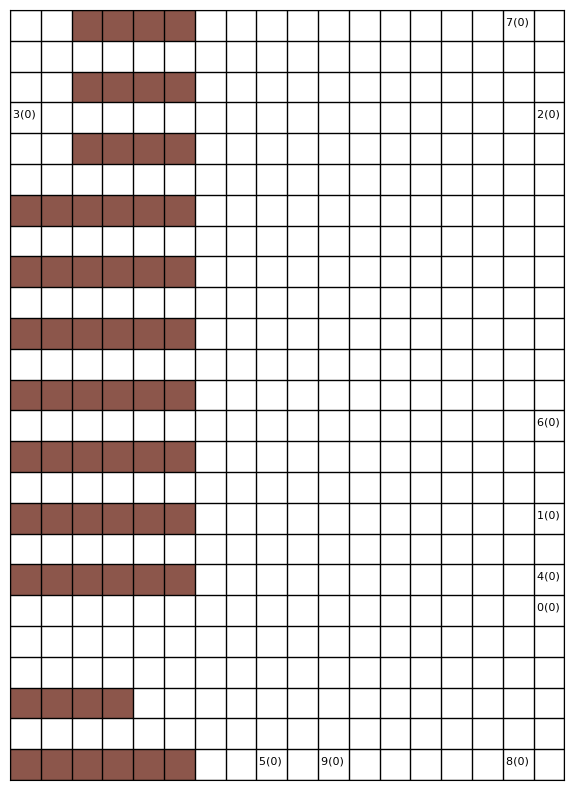

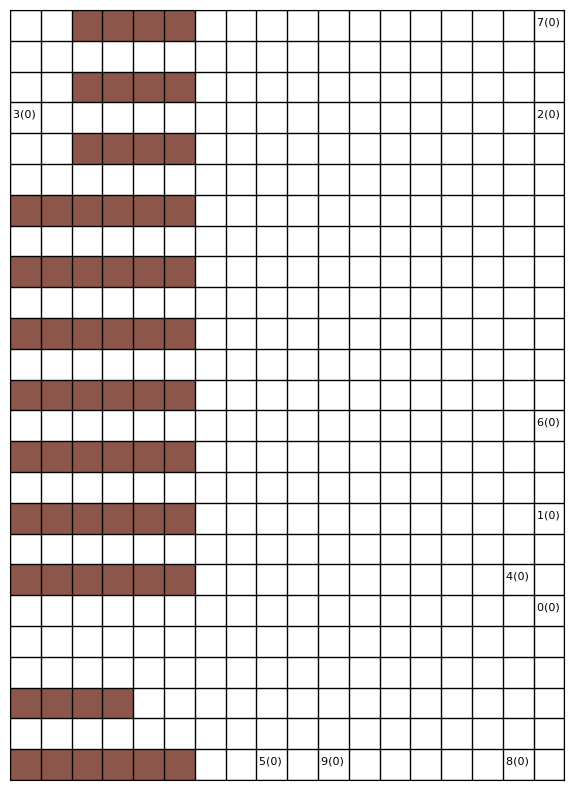

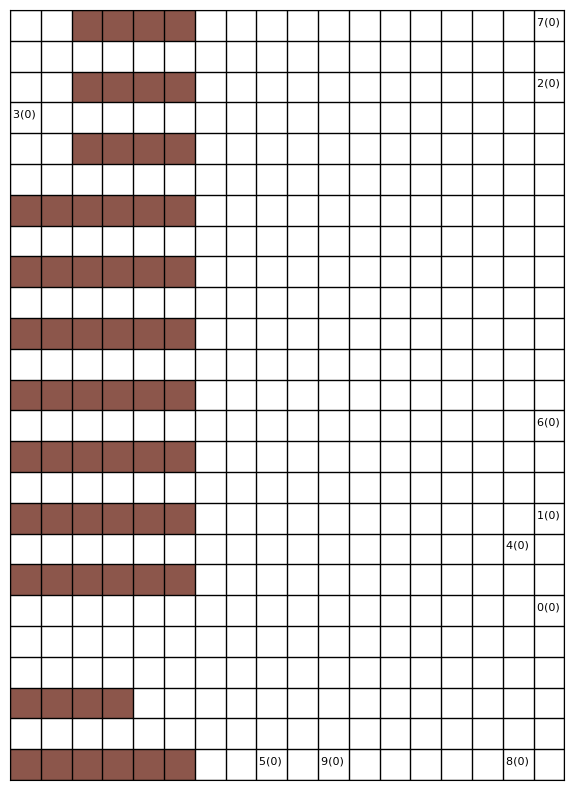

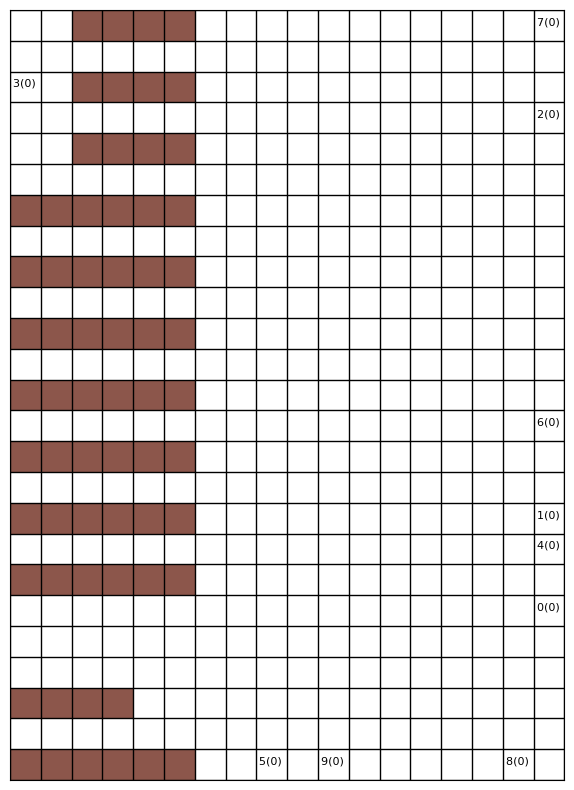

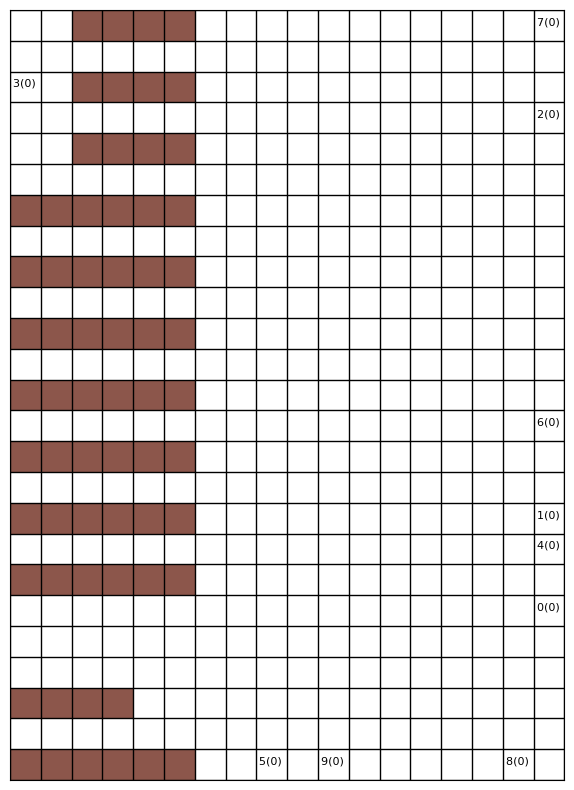

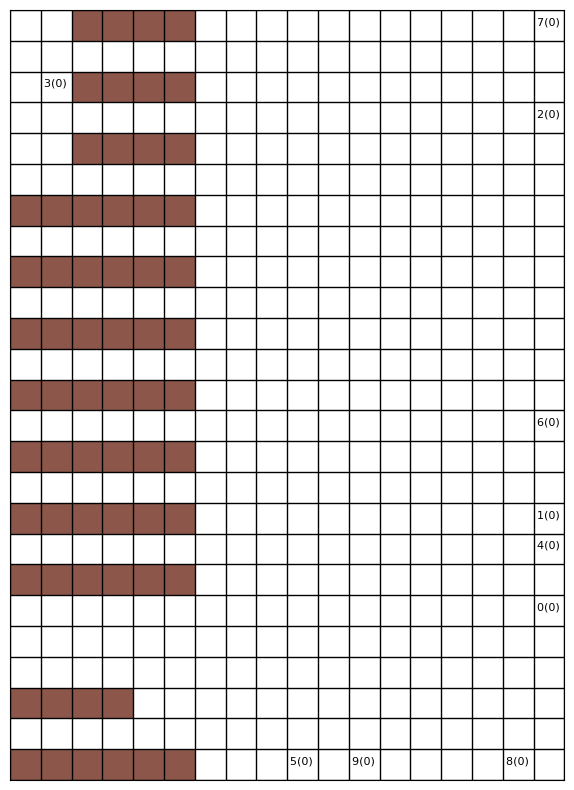

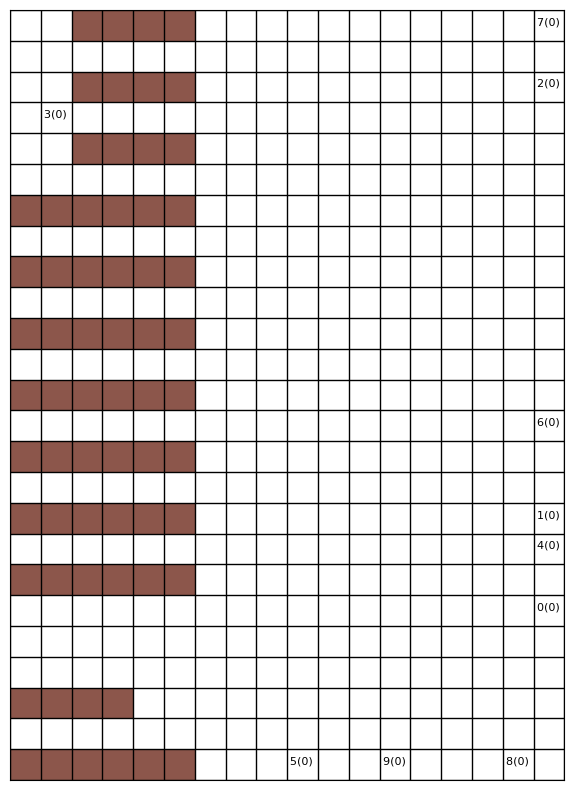

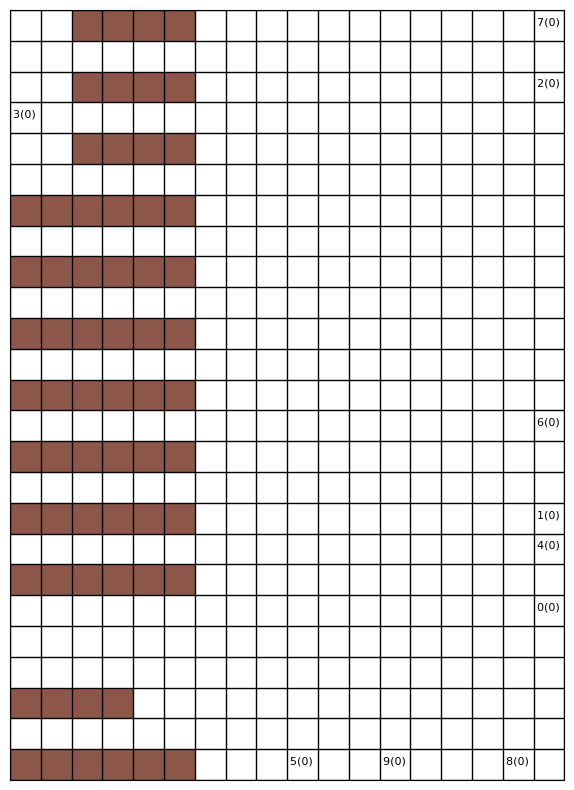

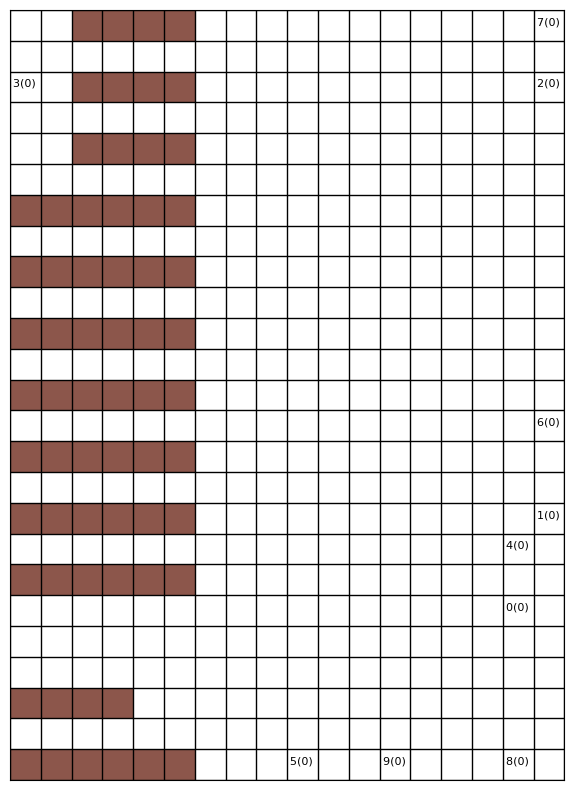

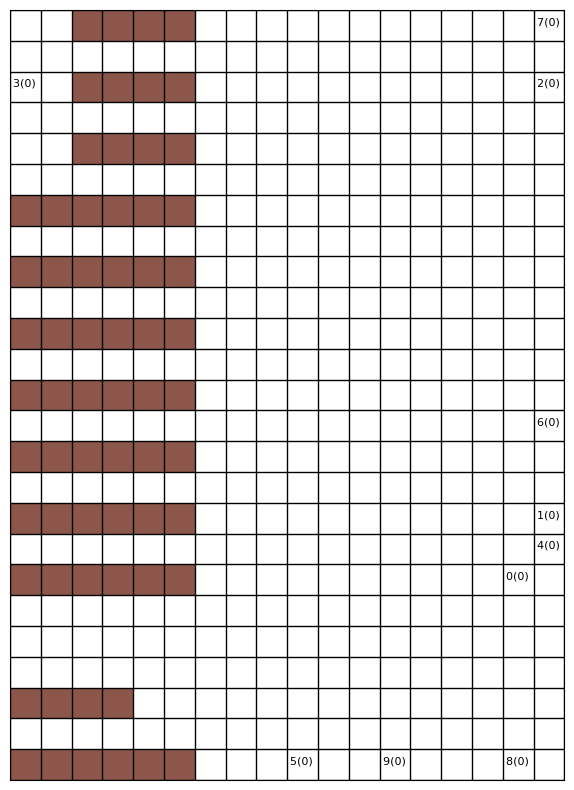

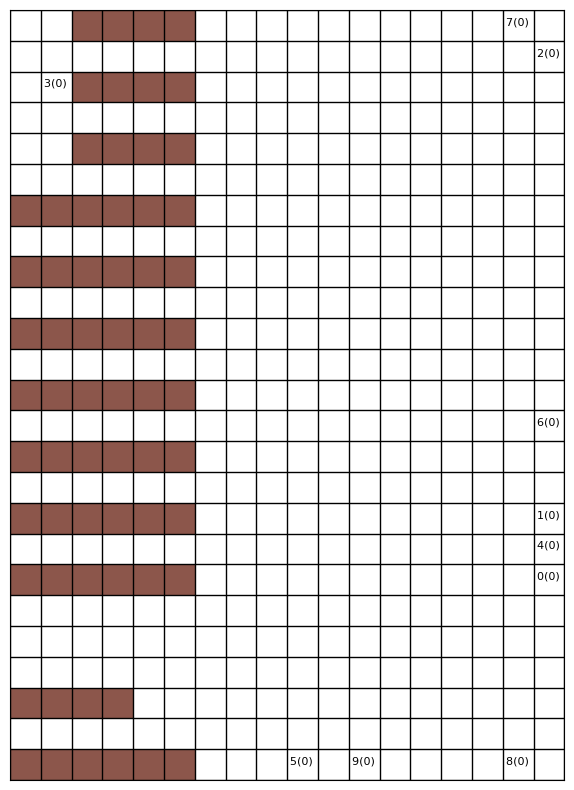

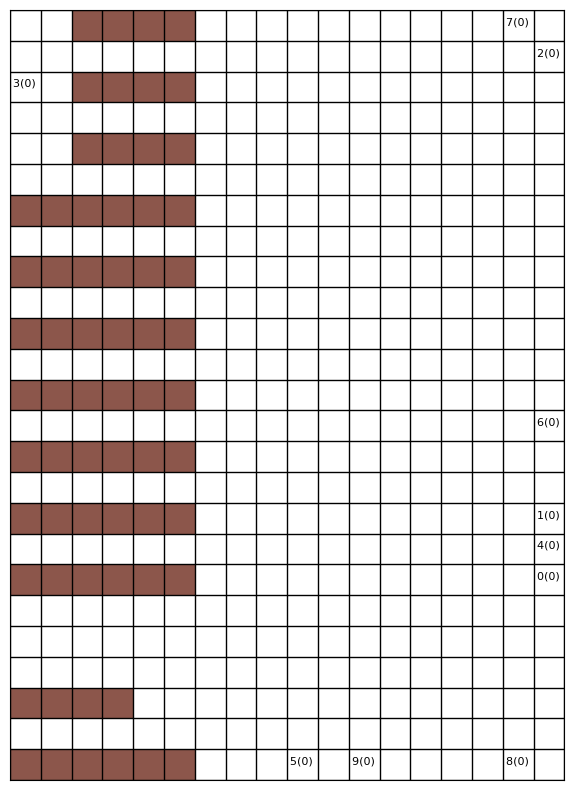

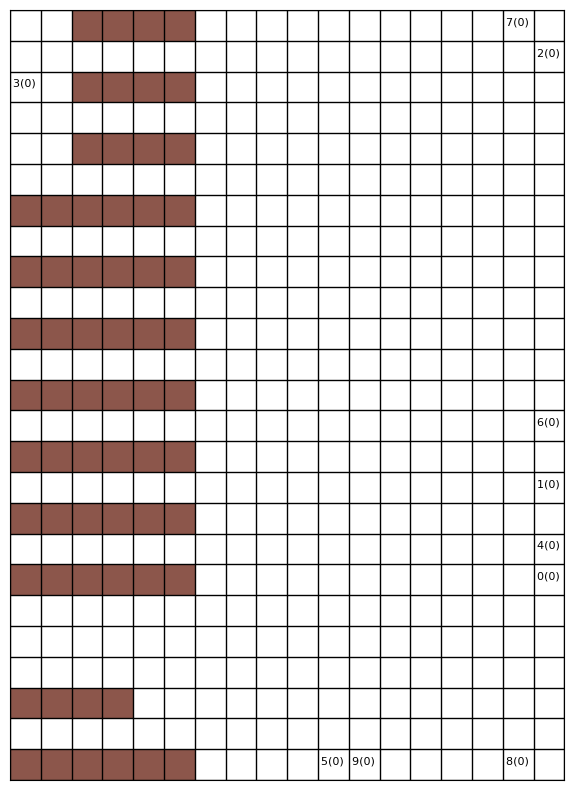

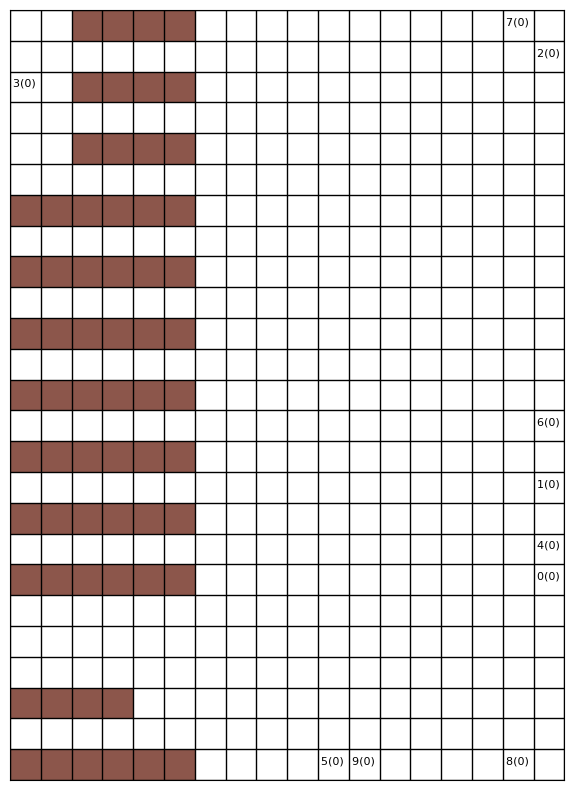

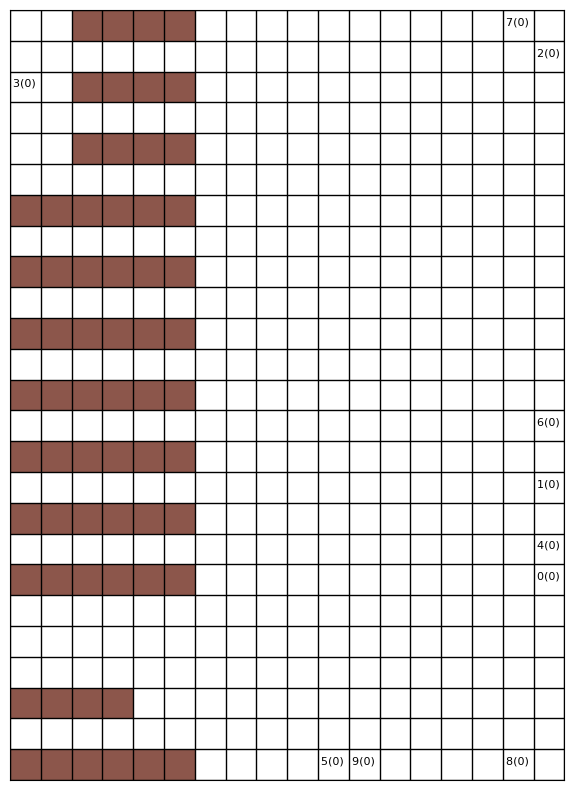

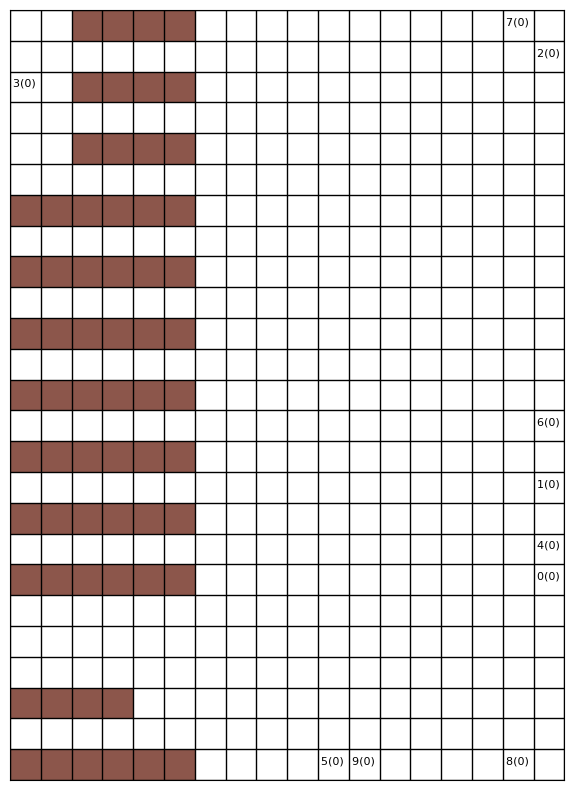

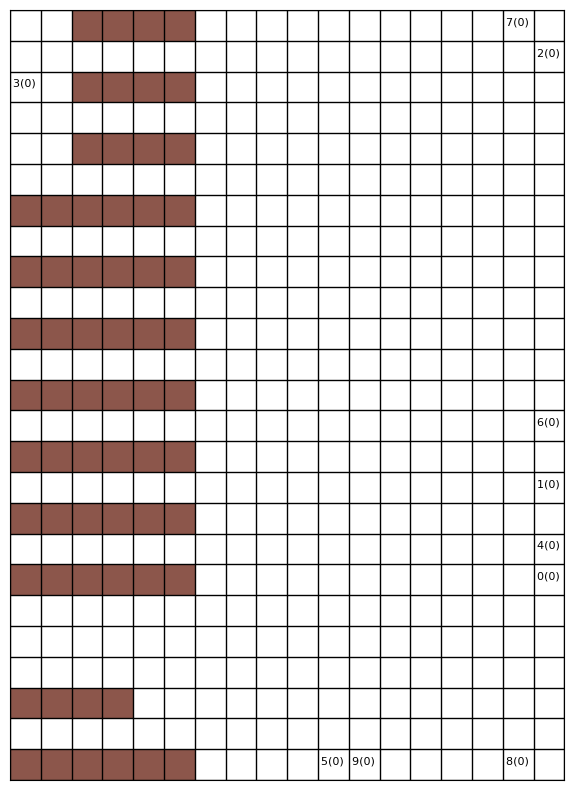

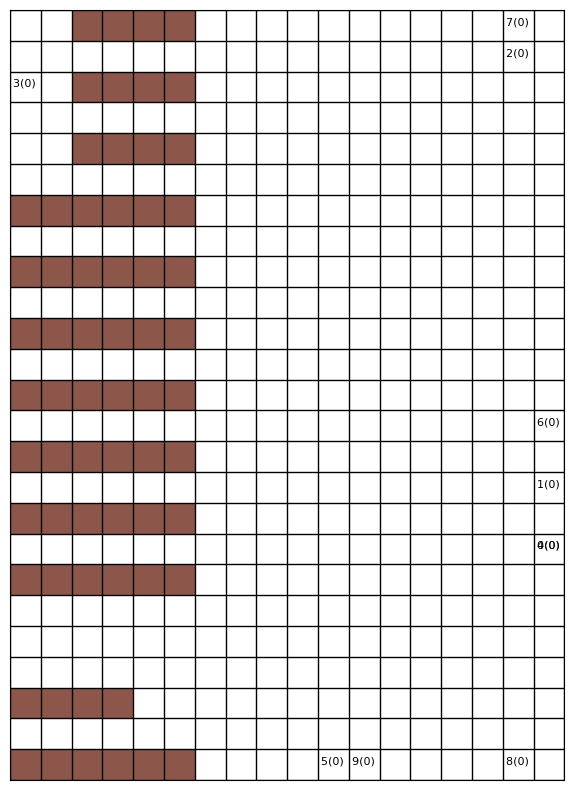

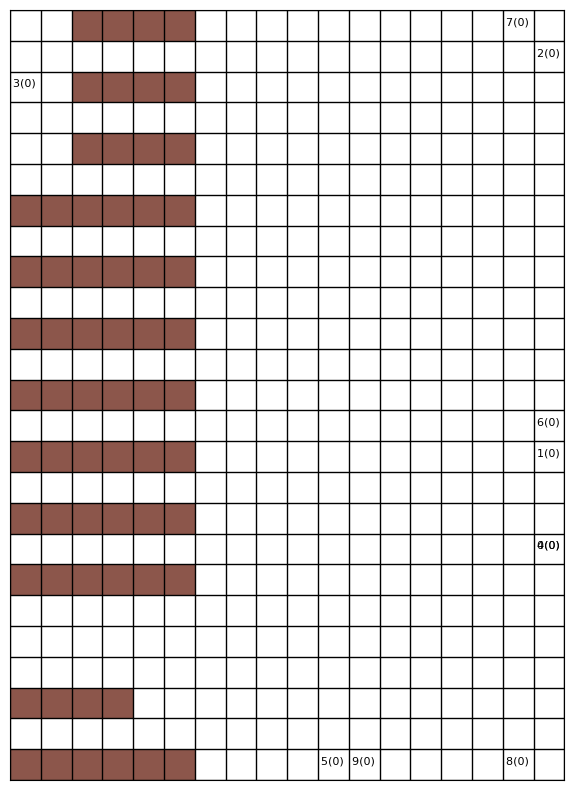

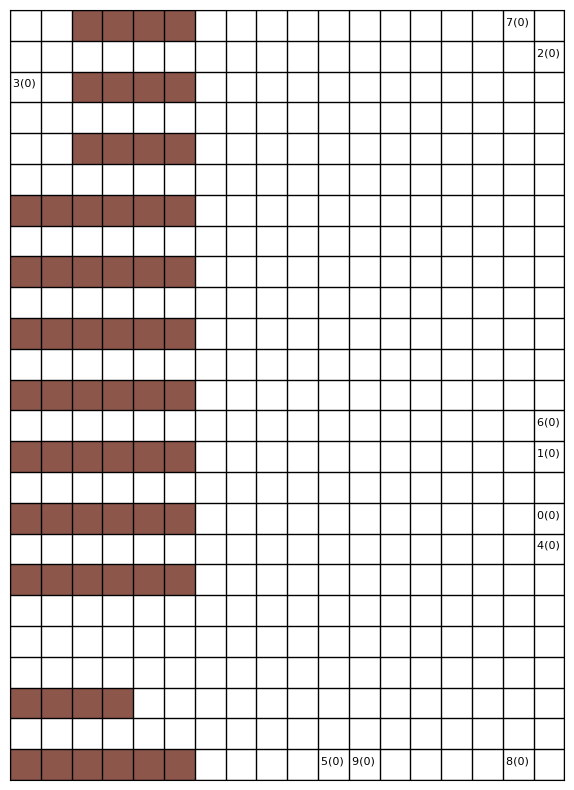

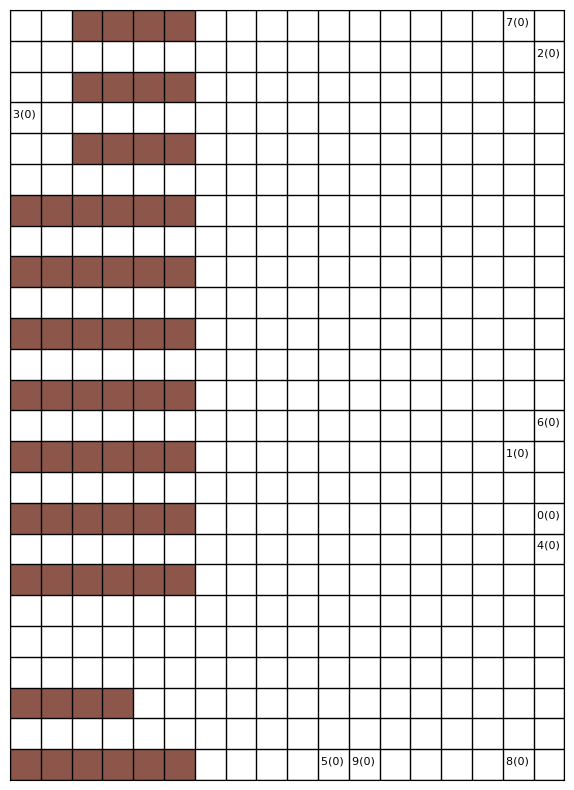

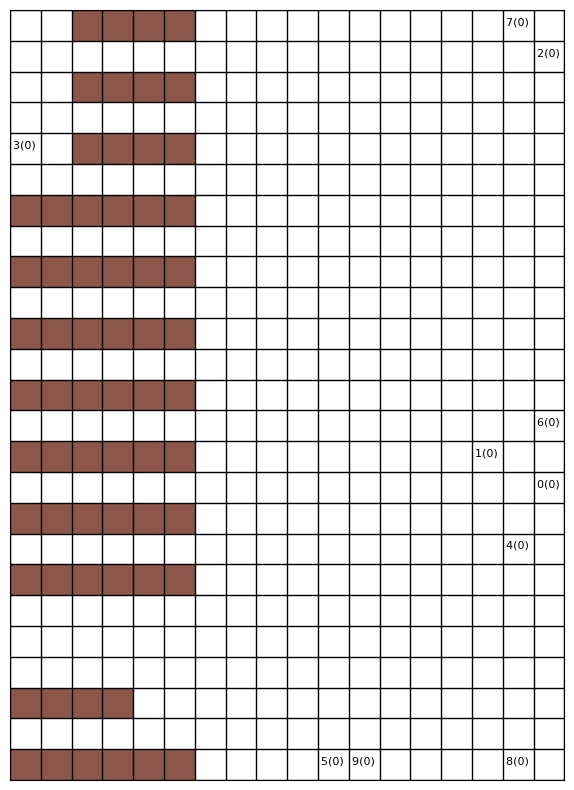

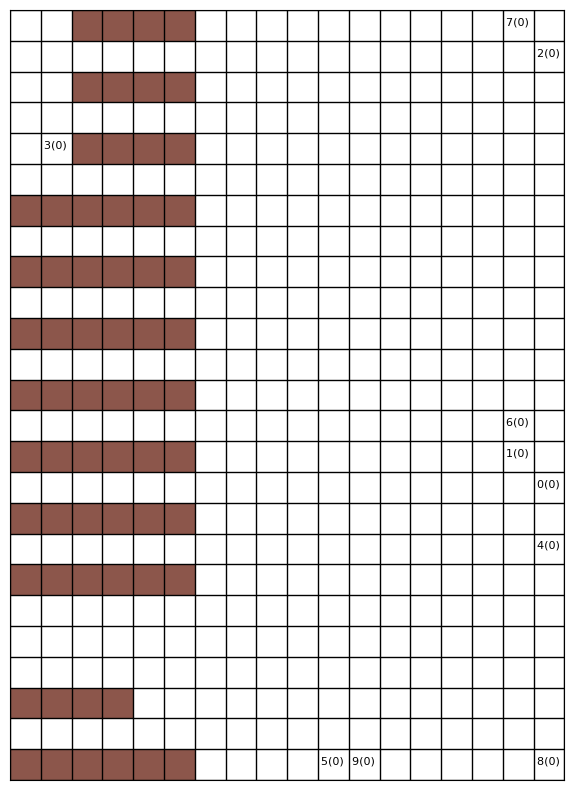

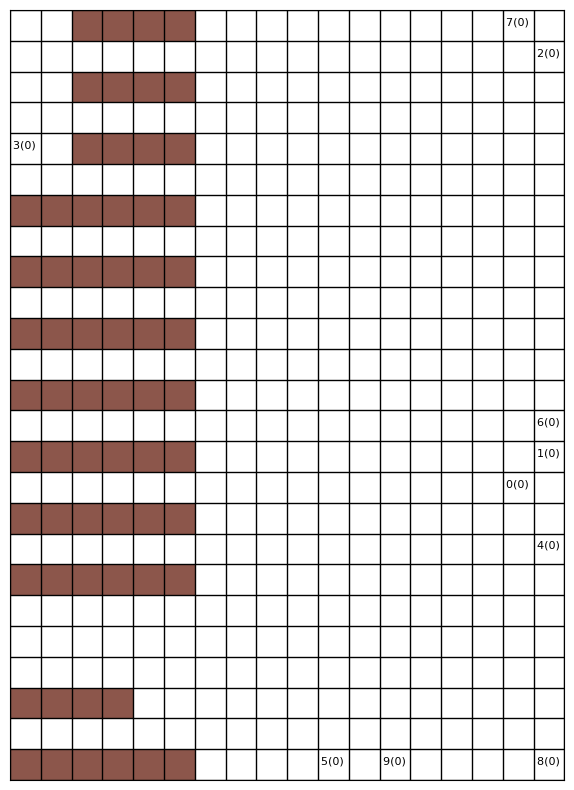

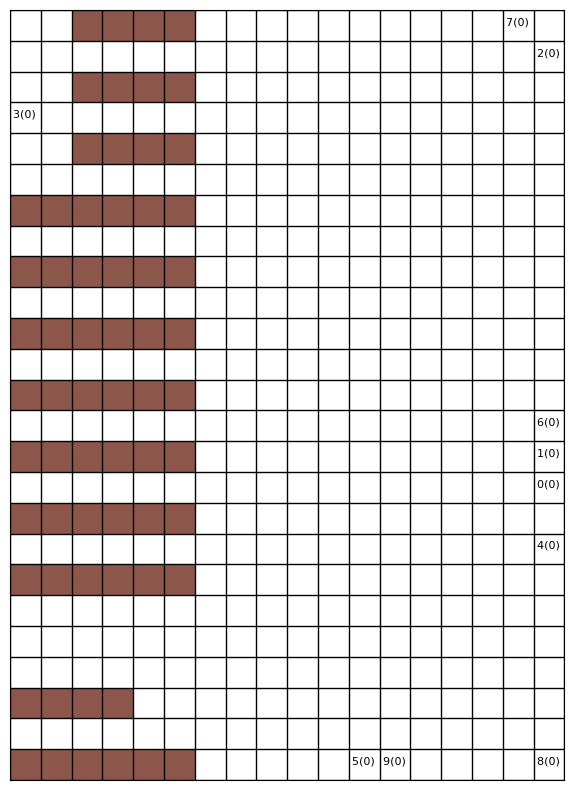

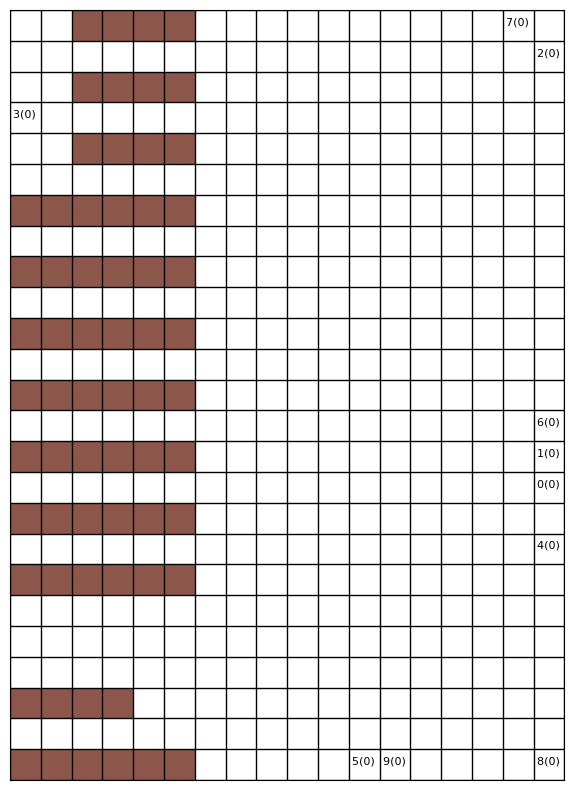

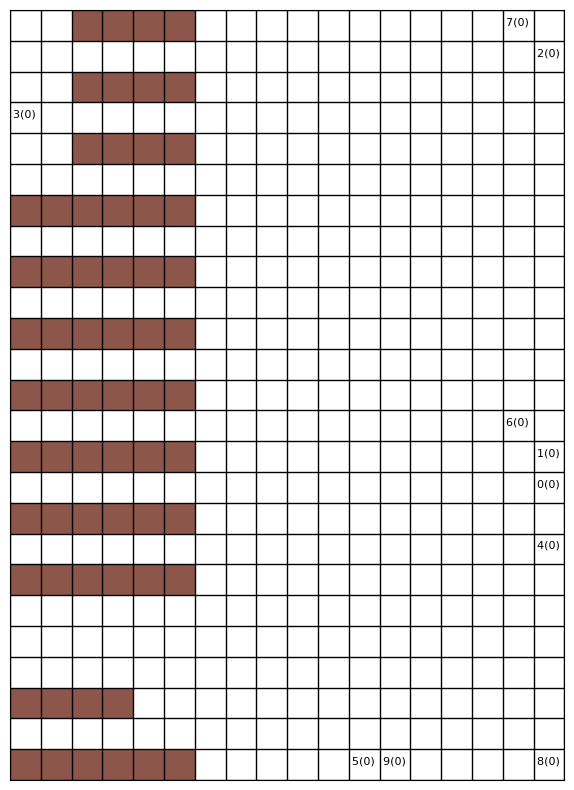

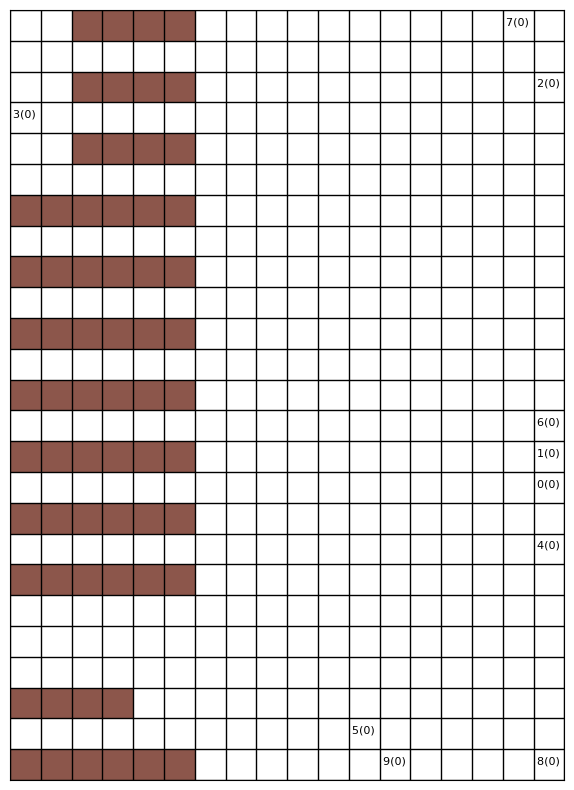

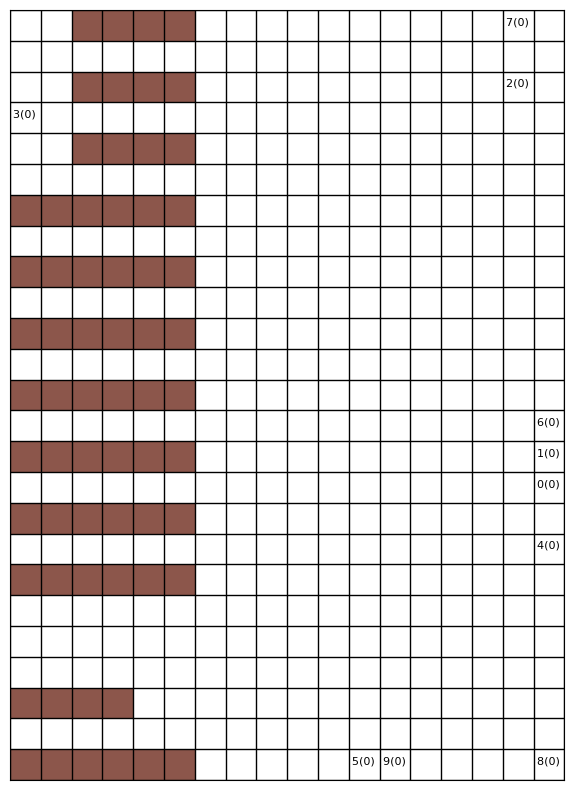

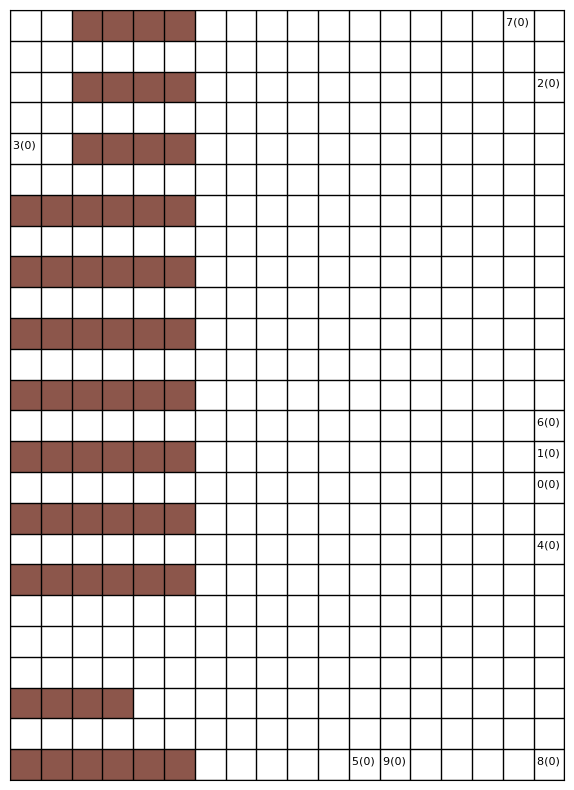

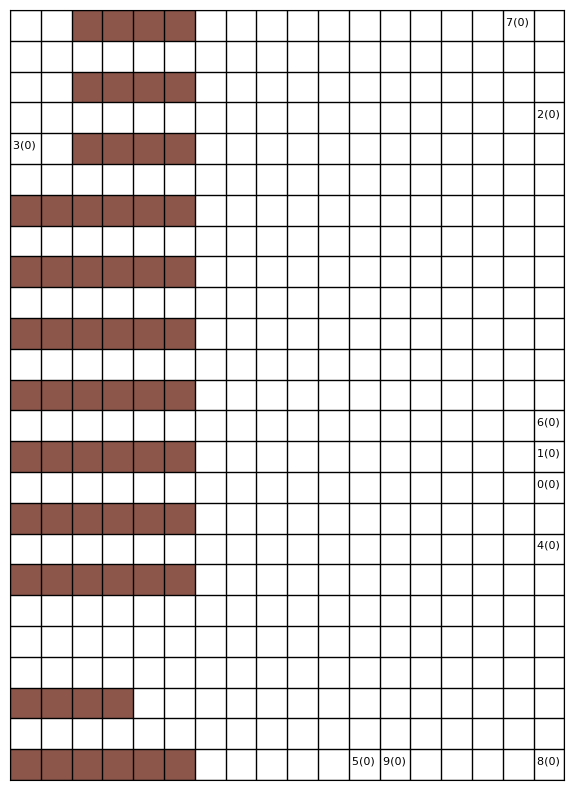

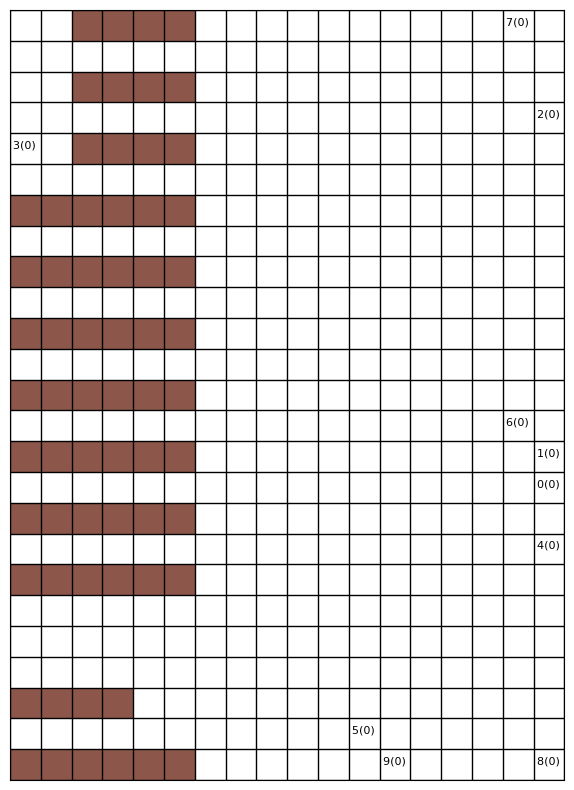

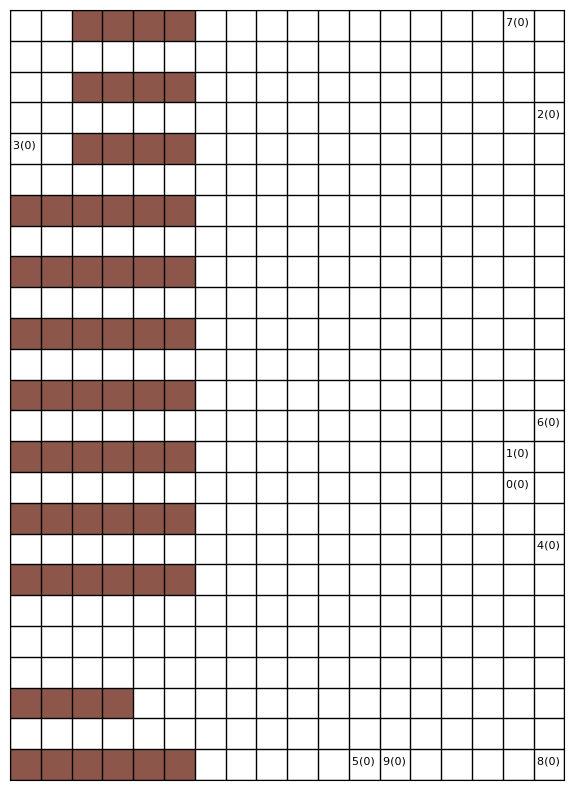

In [ ]:
test(models, env, num_episodes, num_agents_cleanup, eps, eps_decay_factor, batch_size)